In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import yaml
import tables
import ujson as json

FONT_SIZE = 15

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [360]:
import math

In [428]:
fields = ['type', 'i1', 'i2', 'i3', 'i4', 'i0']
df_global = pd.read_csv('../intervals_lr_belady.log', delimiter=' ', names=fields, nrows=1000000, skiprows=40000000)
df_global.head()

,type,i1,i2,i3,i4,i0
0,2,12.39080,12.6721,12.7634,13.6158,14.03020
1,2,13.29590,13.3521,14.3480,15.0787,12.44260
2,2,9.17098,14.0428,14.7852,15.4224,12.64460
3,2,11.40950,11.4416,11.4785,11.6364,9.36563
4,2,12.27910,13.2735,13.7161,14.1572,12.54250


In [431]:
df_global = df_global[df_global.type == 0]

In [457]:
np.logspace(1, 7, 7)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07])

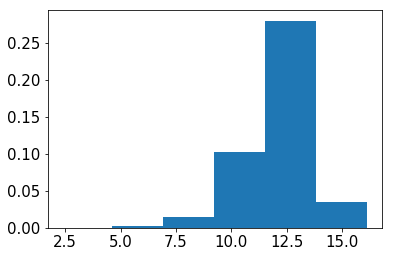

In [459]:
plt.hist(df_global.i0, bins=np.log1p(np.logspace(1, 7, 7)), density=1)
plt.show()

In [453]:
(df_global.i0 <= 16).sum()

30698

In [371]:
df_global = df_global[df_global.type != 2]

In [392]:
bound = 7
df_active = df_global[df_global.i0 < bound]
df_passive = df_global[df_global.i0 >= bound]

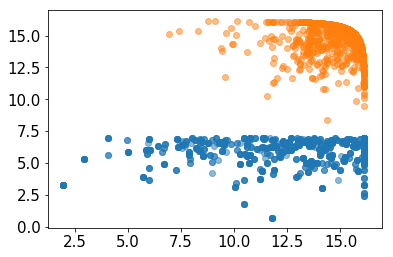

In [393]:
fig, ax = plt.subplots()
df = df_active[['i1', 'i0']].sample(n=1000, replace=True)
ax.scatter(x=df['i1'], y=df['i0'], alpha = 0.5)
df = df_passive[['i1', 'i0']].sample(n=1000, replace=True)
ax.scatter(x=df['i1'], y=df['i0'], alpha = 0.5)

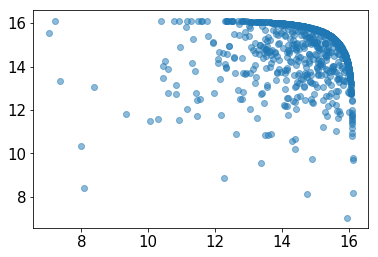

In [395]:
fig, ax = plt.subplots()
df = df_global[['i1', 'i0']].sample(n=1000, replace=False)
ax.scatter(x=df['i1'], y=df['i0'], alpha = 0.5)

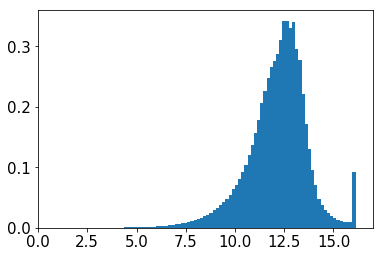

In [216]:
l = 'i0'
df_training = df_global[df_global.type == 0][l]
plt.subplot()
plt.hist(df_training, density=1, bins=100)
plt.xlim([0, 17])
plt.show()

In [369]:
df_global.type

0         1.0
1         1.0
2         1.0
3         1.0
4         0.0
5         1.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        1.0
16        1.0
17        1.0
18        1.0
19        1.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        1.0
         ... 
999970    NaN
999971    0.0
999972    1.0
999973    1.0
999974    1.0
999975    1.0
999976    1.0
999977    1.0
999978    1.0
999979    1.0
999980    1.0
999981    1.0
999982    1.0
999983    1.0
999984    1.0
999985    1.0
999986    1.0
999987    1.0
999988    1.0
999989    1.0
999990    1.0
999991    1.0
999992    1.0
999993    1.0
999994    1.0
999995    1.0
999996    1.0
999997    1.0
999998    1.0
999999    1.0
Name: type, Length: 1000000, dtype: float64

### Compare Belady and LR distribution
* LR 0.614570
* Belady 0.684090
* LRUK ?
* LRBelady 80% 0.617124
* LRBelady 100% 0.617031
* LRBelady 120% 0.616936

### After using Belady as filter
* Belady 0.684090
* LR 0.614570
* LRBelady 80% 0.617124
* LRBelady 100% 0.617031
* LRBelady 120% 0.616936

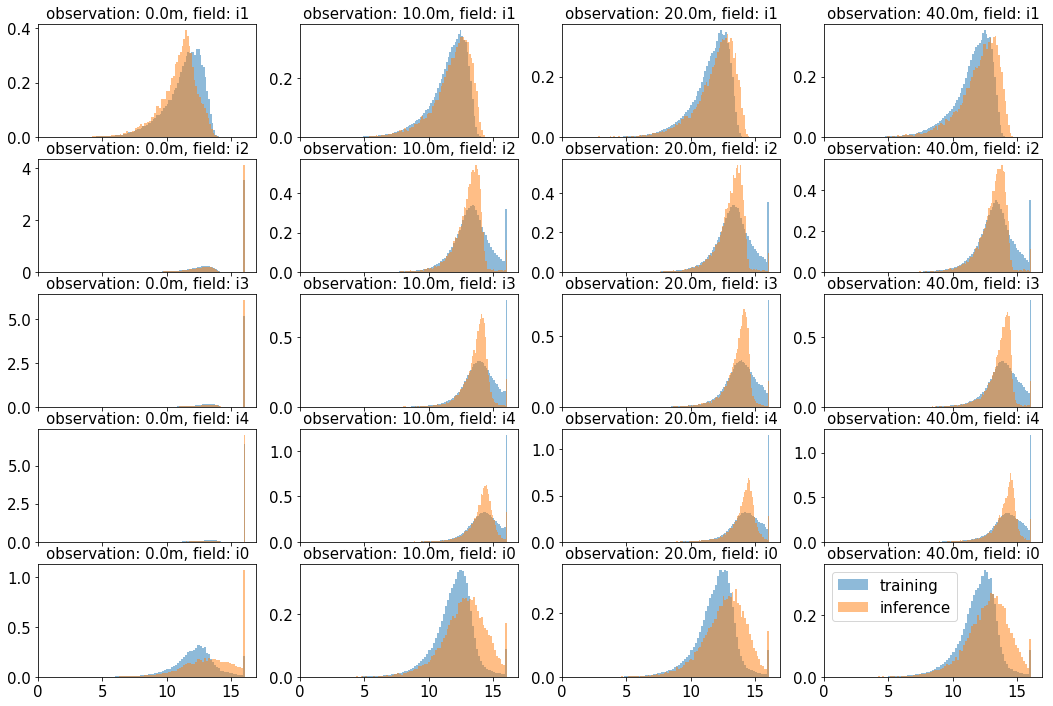

In [239]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals_lr_belady_0.8.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training = df_global[df_global.type == 0][l]
        df_inference = df_global[df_global.type == 1][l]
        axes[j][i].hist(df_training.values, alpha=0.5, label='training', bins=100, density=True)
        axes[j][i].hist(df_inference.values, alpha=0.5, label='inference', bins=100, density=True)
        axes[j][i].set_xlim([0, 17])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.show()

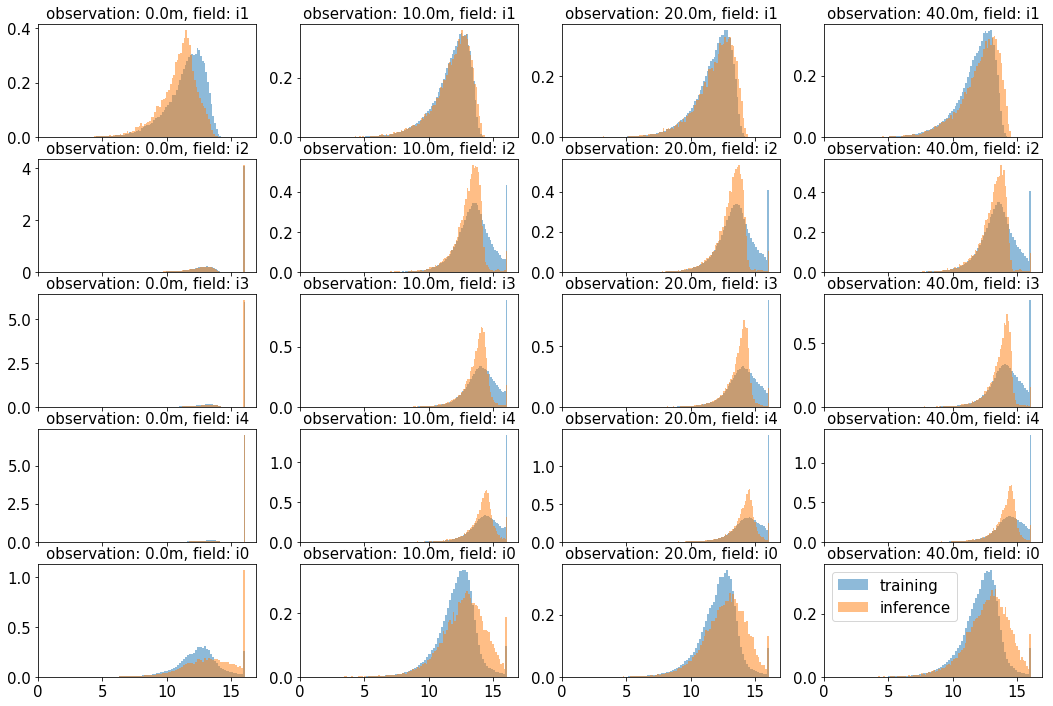

In [241]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals_lr_belady_1.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training = df_global[df_global.type == 0][l]
        df_inference = df_global[df_global.type == 1][l]
        axes[j][i].hist(df_training.values, alpha=0.5, label='training', bins=100, density=True)
        axes[j][i].hist(df_inference.values, alpha=0.5, label='inference', bins=100, density=True)
        axes[j][i].set_xlim([0, 17])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.show()

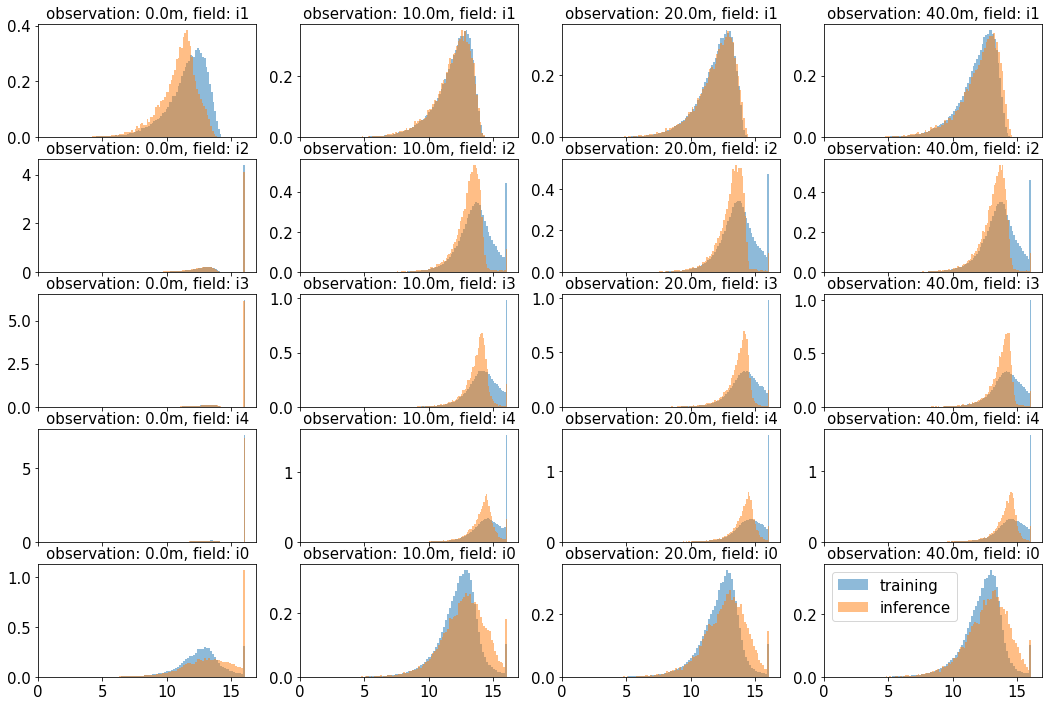

In [242]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals_lr_belady_1.2.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training = df_global[df_global.type == 0][l]
        df_inference = df_global[df_global.type == 1][l]
        axes[j][i].hist(df_training.values, alpha=0.5, label='training', bins=100, density=True)
        axes[j][i].hist(df_inference.values, alpha=0.5, label='inference', bins=100, density=True)
        axes[j][i].set_xlim([0, 17])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.show()

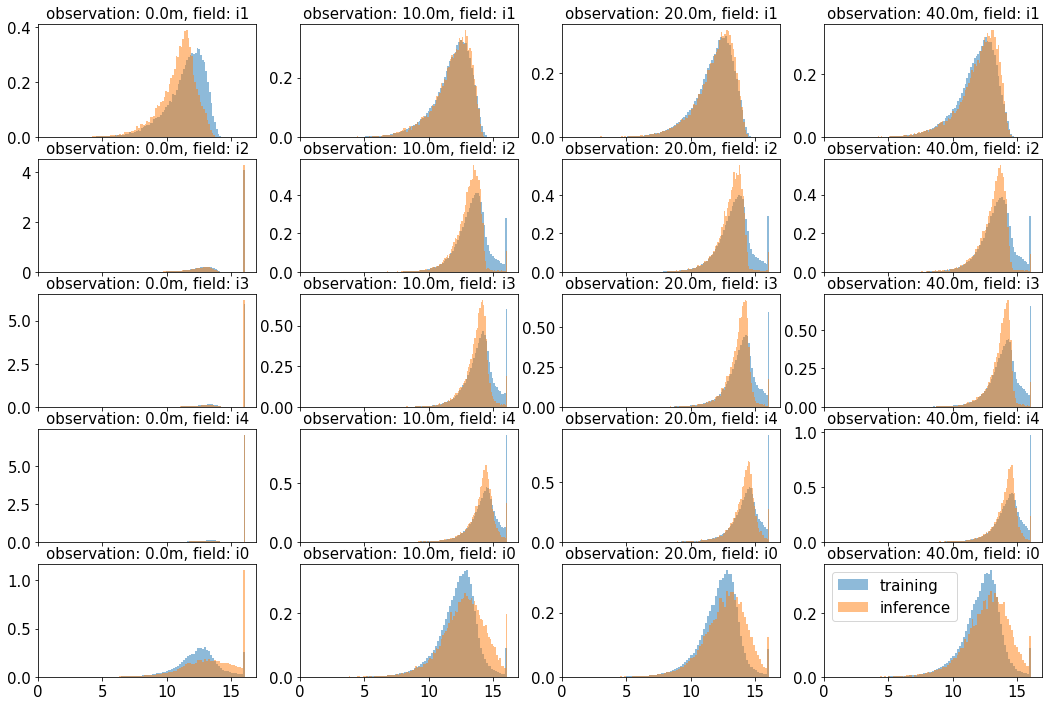

In [238]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals_lr_belady.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training = df_global[df_global.type == 0][l]
        df_inference = df_global[df_global.type == 1][l]
        axes[j][i].hist(df_training.values, alpha=0.5, label='training', bins=100, density=True)
        axes[j][i].hist(df_inference.values, alpha=0.5, label='inference', bins=100, density=True)
        axes[j][i].set_xlim([0, 17])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.show()

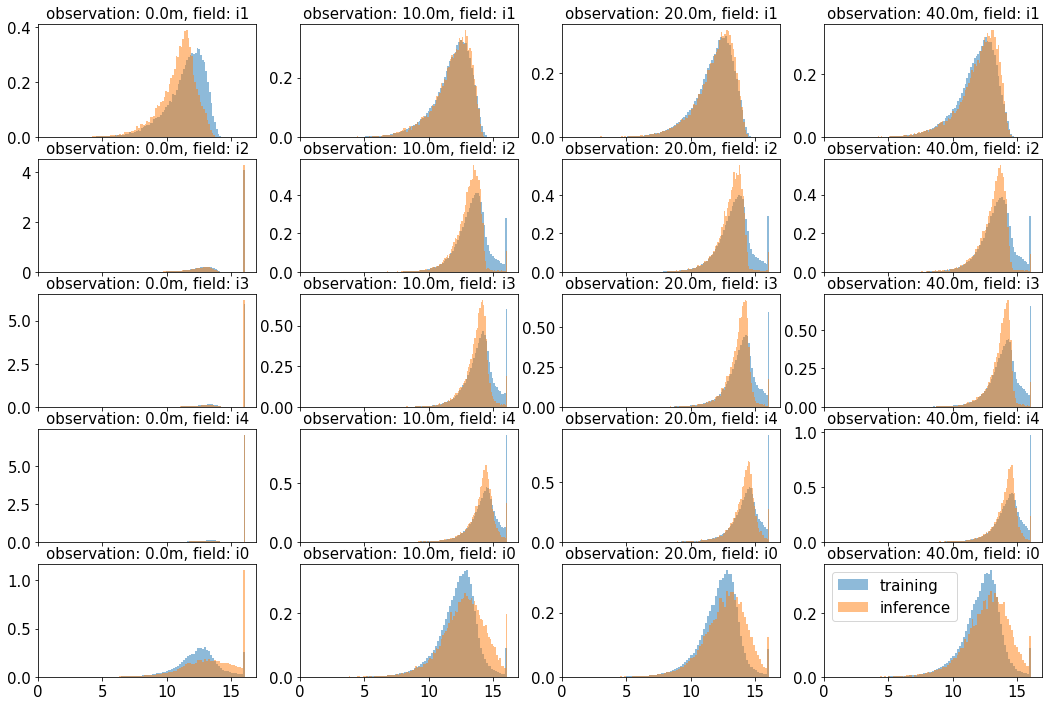

In [238]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals_lr_belady.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training = df_global[df_global.type == 0][l]
        df_inference = df_global[df_global.type == 1][l]
        axes[j][i].hist(df_training.values, alpha=0.5, label='training', bins=100, density=True)
        axes[j][i].hist(df_inference.values, alpha=0.5, label='inference', bins=100, density=True)
        axes[j][i].set_xlim([0, 17])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.show()

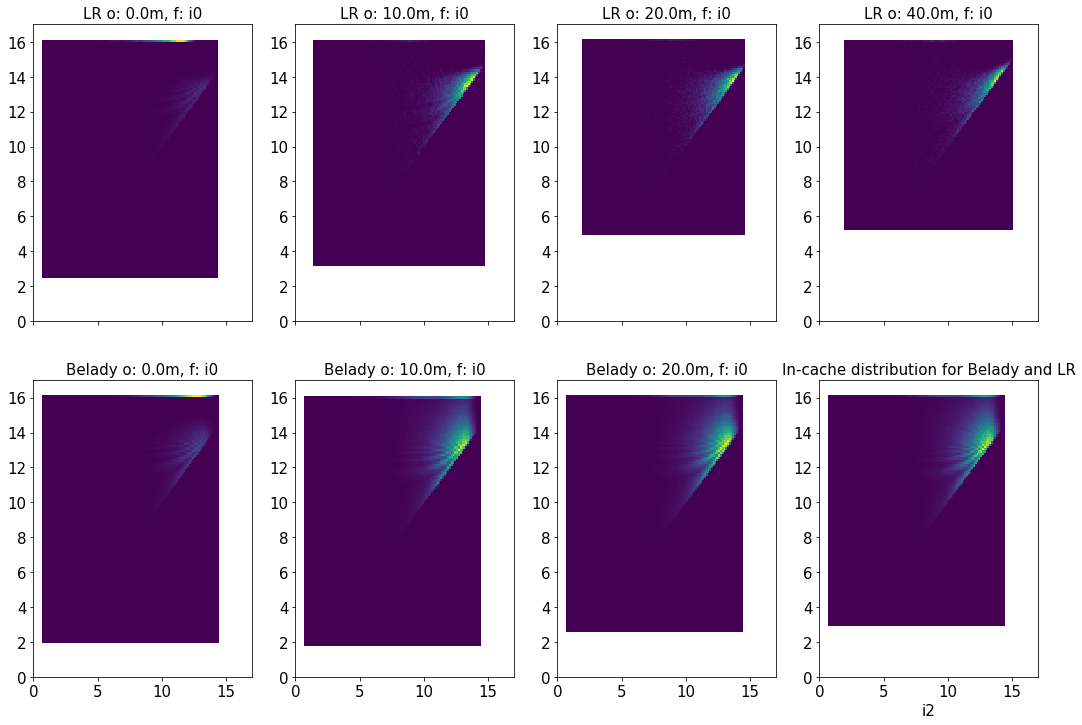

In [259]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [int(10e6)]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=2, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global_lr = pd.read_csv('../intervals_lr.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    df_global_belady = pd.read_csv('../intervals_belady_sample.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
    df_training_lr = df_global_lr[df_global_lr.type == 0]
    df_training_belady = df_global_belady
    axes[0][i].hist2d(df_training_lr['i1'].values, df_training_lr['i2'].values, label='lr', bins=[100, 100])
    axes[0][i].set_xlim([0, 17])
    axes[0][i].set_ylim([0, 17])
    axes[0][i].set_title(f'LR o: {o/1e6}m, f: {l}')
    
    axes[1][i].hist2d(df_training_belady['i1'].values, df_training_belady['i2'].values, label='belady', bins=[100, 100])
    axes[1][i].set_xlim([0, 17])
    axes[1][i].set_ylim([0, 17])
#         axes[j][i].hist(df_training_lr.values, alpha=0.5, label='lr', bins=100, density=True)
#         axes[j][i].hist(df_training_belady.values, alpha=0.5, label='belady', bins=100, density=True)
#     axes[j][i].set_xlim([0, 17])
    axes[1][i].set_title(f'Belady o: {o/1e6}m, f: {l}')
# plt.legend()
plt.title('In-cache distribution for Belady and LR')
plt.xlabel('i1')
plt.xlabel('i2')
plt.show()

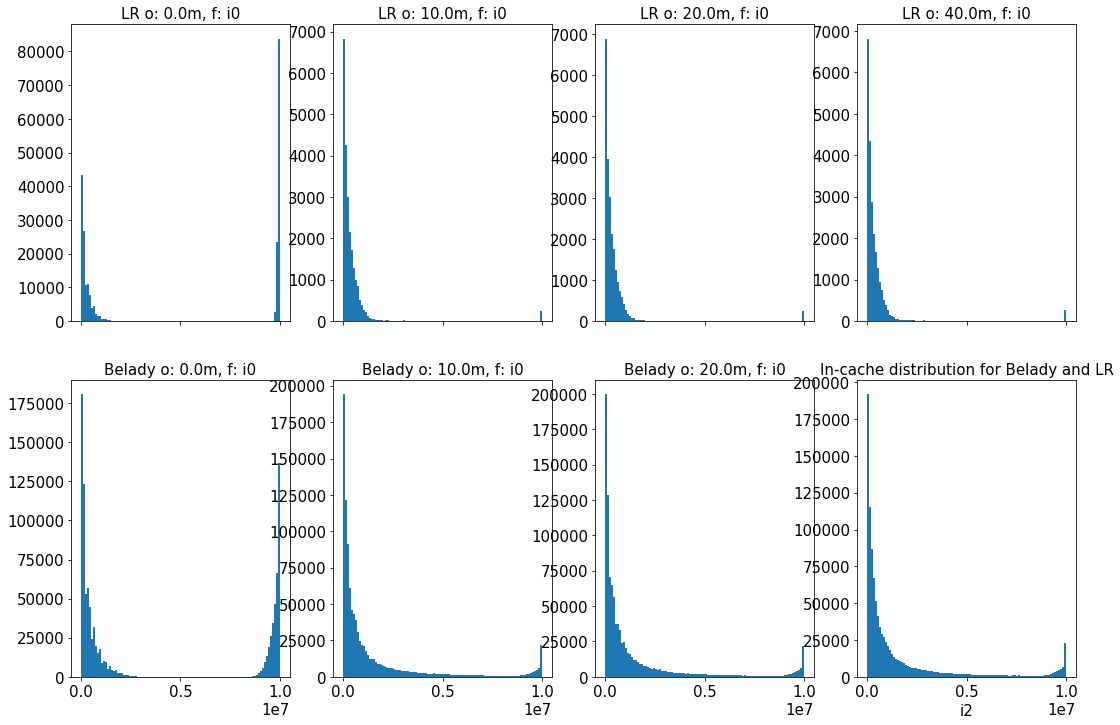

In [265]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [int(10e6)]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=2, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global_lr = pd.read_csv('../intervals_lr.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    df_global_belady = pd.read_csv('../intervals_belady_sample.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
    df_training_lr = df_global_lr[df_global_lr.type == 0]
    df_training_belady = df_global_belady
    axes[0][i].hist(np.exp(df_training_lr['i2'].values) - np.exp(df_training_lr['i1'].values), label='lr', bins=100)
#     axes[0][i].set_xlim([0, 17])
    axes[0][i].set_title(f'LR o: {o/1e6}m, f: {l}')
    
    axes[1][i].hist(np.exp(df_training_belady['i2'].values) - np.exp(df_training_belady['i1'].values), label='belady', bins=100)
#     axes[1][i].set_xlim([0, 17])
#         axes[j][i].hist(df_training_lr.values, alpha=0.5, label='lr', bins=100, density=True)
#         axes[j][i].hist(df_training_belady.values, alpha=0.5, label='belady', bins=100, density=True)
#     axes[j][i].set_xlim([0, 17])
    axes[1][i].set_title(f'Belady o: {o/1e6}m, f: {l}')
# plt.legend()
plt.title('In-cache distribution for Belady and LR')
plt.xlabel('i1')
plt.xlabel('i2')
plt.show()

In [266]:
diff = np.exp(df_training_belady['i2'].values) - np.exp(df_training_belady['i1'].values)

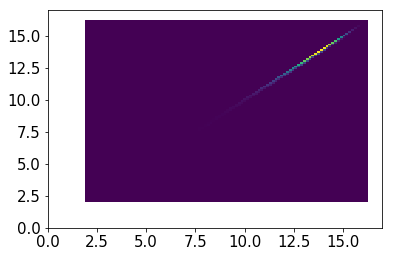

In [302]:
x = np.random.exponential(scale=1e6, size=100000)
y1 = x+1
y = y1

plt.hist2d(np.log1p(x), np.log1p(y), bins=[100, 100])
plt.xlim(0, 17)
plt.ylim(0, 17)
plt.show()

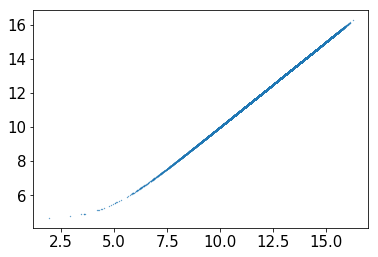

In [309]:
plt.scatter(np.log1p(x), np.log1p(x+100), s=0.1)
plt.show()

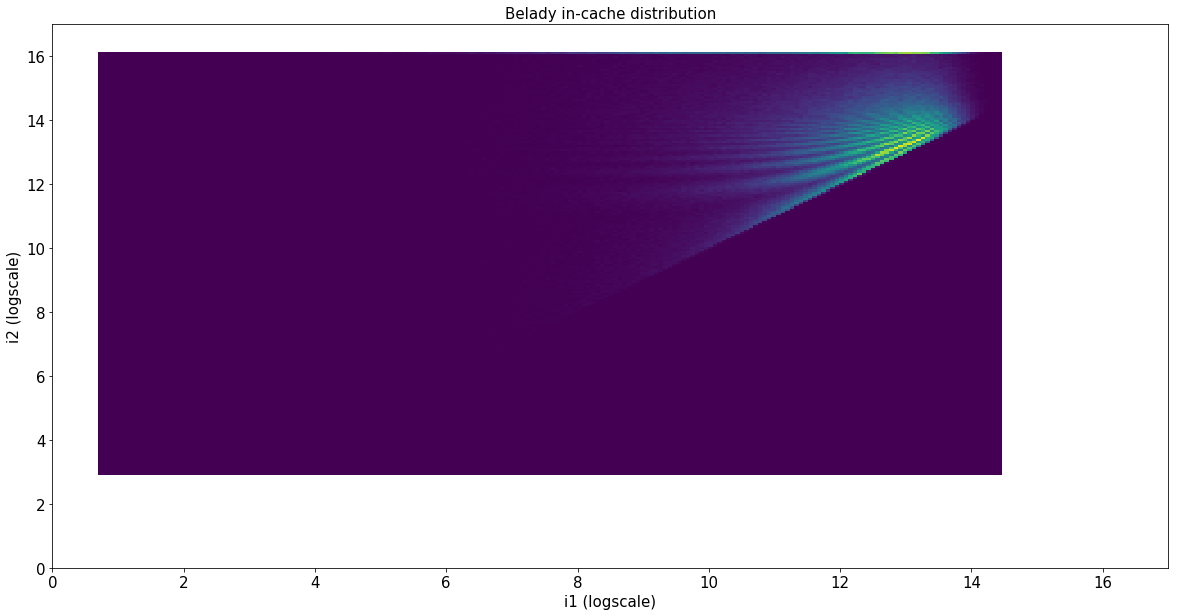

In [405]:
plt.subplots(figsize=(20,10))
plt.hist2d(df_training_belady['i1'].values, df_training_belady['i2'].values, label='belady', bins=[200, 200])
plt.xlim(0, 17)
plt.ylim(0, 17)
plt.xlabel('i1 (logscale)')
plt.ylabel('i2 (logscale)')
plt.title('Belady in-cache distribution')
# plt.scatter(np.log1p(x), np.log1p(x+100000), s=0.1)
# plt.plot([12,12],[0, 15])
plt.show()

In [400]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Return a subplot axes at the given grid position.
    
    Call signature::
    
       subplot(nrows, ncols, index, **kwargs)
    
    In the current figure, create and return an `.Axes`, at position *index*
    of a (virtual) grid of *nrows* by *ncols* axes.  Indexes go from 1 to
    ``nrows * ncols``, incrementing in row-major order.
    
    If *nrows*, *ncols* and *index* are all less than 10, they can also be
    given as a single, concatenated, three-digit number.
    
    For example, ``subplot(2, 3, 3)`` and ``subplot(233)`` both create an
    `.Axes` at the top right corner of the current figure, occupying half of
    the figure height and a third of the figure width.
    
    .. note::
    
       Creating a subplot will delete any pre-existing subplot that overlaps
       with it beyond sharing a boundary::
    
          import matplotlib.pyplot as plt
          # plot a line, implicitly cr

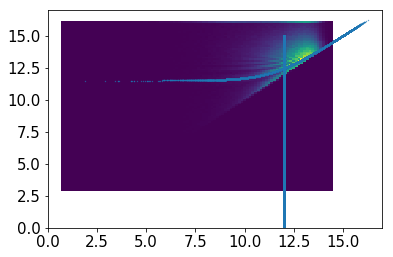

In [352]:
xs = df_training_belady['i1'].values#[df_training_belady['i1'] <= 12].values
ys = df_training_belady['i2'].values#[df_training_belady['i1'] <= 12].values
plt.hist2d(xs, ys, label='belady', bins=[100, 100])
plt.xlim(0, 17)
plt.ylim(0, 17)
plt.scatter(np.log1p(x), np.log1p(x+100000), s=0.1)
plt.plot([12,12],[0, 15])
plt.show()

In [353]:
diff = np.exp(ys) - np.exp(xs)

In [354]:
len(diff)

1000000

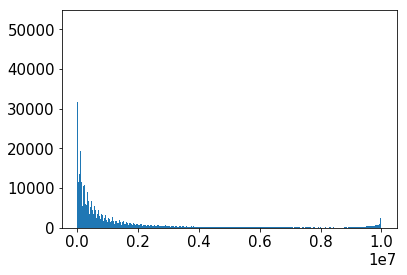

In [355]:
a, b, _ = plt.hist(diff, bins=1000)
plt.show()

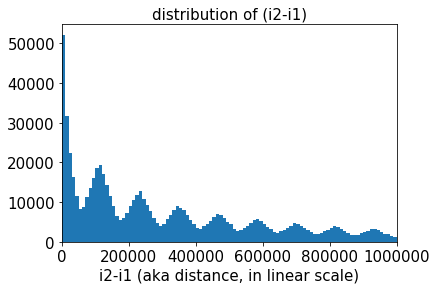

In [358]:
a, b, _ = plt.hist(diff, bins=1000)
plt.xlimdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAskAABm2CAYAAADZmMnNAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4xLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvDW2N/gAAIABJREFUeJzs3X2QpdldH/bv6emZ3R2t9k2rlZBYa4WEEZIJxCwRUIl4K2IsgkmQVBBCbALUFqGgXLiwQUnsIiRgWbxbJKAtxQHbcXBEQYRAMhEGERQhYIUtGdCbBSuEJPS6b7OzuzPTffLHfZ4727/uO/d293N7enY+n6qtnvvc8zzn3Dsj1XfO/M45rfceAADgoo3LPQAAADhuhGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAoNi/3AJLk1ltv7XfcccflHgYAAE9wb3/72z/Re3/qsnbHIiTfcccdueeeey73MAAAeIJrrX1glXbKLQAAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKBYKSS31p7bWnt1a+2drbWt1tqbF7T7nNbar7TWHmitPdRa+73W2udPOmIAAFizzRXbvSDJi5O8LcnJvRq01j4vyW8neV2Srx8uf0GS6w45RgAAOFKt9768UWsbvfft4de/kOTW3vuXljZvS/Invfdv3O8grr/59v65X/G3c/oXf3e/t+7Ln7zyi5Ikn/H3fudg9//wcP/fXe3+D/6DL06S3P4Db93z/b/47tn7T//xvd//2HfN3r/tVTvf/9S3za7f8pqd1x/4r2fju/GfzcZ337fMXt/8T35n7/f/m+H9/332+uGXfWGS5NSDW0mSk7/2+0mSM98wu37isdmfld5m/fUTs19cc/+FJMnmm+5Jkpz9uhfueP+jXzD7+Yy3zJ67cW74Mze8/7HPm/1d7dPe9liS5LEbZ68/+YITs3bDv3c85d/N7j/zjNn1s88YHvPI7Ofpj85+nvn04fV/+KkkyaO/d0uS5Mlf+PEkyYP3PHX2OT/3/iTJ9dfO+v1LT569/ltPf0uS5Lt+d/ZH+Yfu/KUkyT/98Oz7+rTTDyZJHjg3+/vf33z6/5ckec2HX5Qk+aZPm32fL3nSQ0mS1589nST5nTPPTZLcsvlwkuTGE2eTJO979OlJkhuGD/JZ134kSfKLH5/9I8z28IX/1Zs+kCT5f/7is5MkN13z6Gz8m7Px3z+M588euClJ0obfp1MnZt/bxz56Y5Jk49Ts9fZDs7/vttOz37++PfuiT/3ZqdmNw/2jU/cPl2e3pw9/xT7x2PDz3OznxvnZ7+/25uwB139k9vyNx7aTJCcfOp92fvbrjUdnN7Wzw0PGQT/y6M7X58/Pnnlm9t31c7PX7cTwZ+TExo7r/cLs54knP3nH9VE7OQx+c/Zz6/7Zh2ubw3eyMet3+9xsfCeuv37W7syZHe02rr1mx3P7+Qs77hvfn49z/DzD63727I77x/G0U8PvwdbwezV8Hxs3zMaR8fOcmo2jPzp8f1vbOz5/H+5fWRv+xzb7v/uLr6vx/fG2+efbef+8//rcCb1p+7WTPxN4Ymutvb33fueydiuVW4wB+RKdPT/JC5O8arXhAQDA8TXVwr0XDj9vbq29o7V2obX2/tbat070fAAAODIrlVvsuGGPcovW2suT/FCSTyZ5ZZLfT/LSJN+R5Kt772+41DNvaLf0F7av2N/IAbjqKbcA9mvVcotVF+4t7W/4+Zre+yuHX/9ma+2zk7w8ya6Q3Fq7K8ldSXJtTk80DAAAOLypyi3uG37+Zrn+G0mev9cNvfe7e+939t7vPJlr9moCAACXxVQh+V3Dz7IePi3J9MuZAQBgjaYKyW/NbDb5y8v1r0jyjon6AACAI7FSTXJr7XRmh4kkyTOT3NBae+nw+g2997OttR9I8srW2v2ZLdx7SZIXJfmSiccMAABrterCvduS1CXE4+tnJ7m39/4TrbWNJN+V5PuTvCfJS3vvvz3FQAEA4KisFJJ77/dmd73xXu1+LMmPHXJMAABwWU1VkwwAAE8YQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUK4Xk1tpzW2uvbq29s7W21Vp785L2P95a6621H5lklAAAcIQ2V2z3giQvTvK2JCcv1bC19vwk35rkwcMNDQAALo9Vyy1e33u/vff+siR/tKTtq5L8ZJL7DjUyAAC4TFYKyb337VXatdZemuR5SV5xmEEBAMDlNNnCvdbadUl+NMn39d4fnuq5AABw1Kbc3eLlST6S5J9P+EwAADhyqy7cu6TW2rOTfE+SL+u99xXvuSvJXUlybU5PMQwAAJjEVDPJr0jyxiTvaa3d1Fq7aXj2NcPrVm/ovd/de7+z937nyVwz0TAAAODwpgrJn5Xk6zLb0WL87/Yk3zn8+pkT9QMAAGs3SblFkm9Lcn259vNJfivJTyf5+ET9AADA2q0UkltrpzM7TCSZzQrfMGz3liRv6L3fs8c9jyb5YO/9zVMMFAAAjsqqM8m3JXltuTa+fnaSe6caEAAAXG4rheTe+71Jdi2+W3LPHQcYDwAAXHZT7pMMAABPCEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFCuF5Nbac1trr26tvbO1ttVae3N5/9Naaz/cWntHa+1Ma+2DrbWfa609Yy2jBgCANdpcsd0Lkrw4yduSnNzj/c9P8l8keU2S303ytCTfn+StrbW/0ns/c/ihAgDA0Vg1JL++9/66JGmt/UKSW8v7b0nyvN77hfFCa+0PkrwnyUuS/NwEYwUAgCOxUkjuvW8vef/+Pa69t7V2NomSCwAArihrW7jXWvsPkpxO8t519QEAAOuwlpDcWttI8pNJ3pfkl9fRBwAArMuqNcn79Q+TfFGSL+m9n9+rQWvtriR3Jcm1Ob2mYQAAwP5NPpPcWvuOJH83yd/qvf/uona997t773f23u88mWumHgYAABzYpCG5tfaSJK9K8vd67/9yymcDAMBRmSwkt9a+NMn/keRVvfcfmeq5AABw1FaqSW6tnc7sMJEkeWaSG1prLx1evyHJs5L830neneRftta+8HG3f7z3/v6JxgsAAGu36sK925K8tlwbXz87yQuT3Jjkc5O8tbT7uSTffMDxAQDAkVv1MJF7k7RLNPnZ4T8AALjire0wEQAAuFIJyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFCsFJJba89trb26tfbO1tpWa+3Ne7RprbX/rrX2wdbaI621/7e19nmTjxgAANZs1ZnkFyR5cZL3JHnvgjbfl+TvJ/lHSb4myZkkv95ae/phBwkAAEdp1ZD8+t777b33lyX5o/pma+3azELyP+y9/1Tv/deTvCxJT/Kdk40WAACOwEohufe+vaTJFye5Icn/9bh7Hk7y+iR//cCjAwCAy2CqhXvPS7KV5H3l+ruG9wAA4IoxVUi+OcmZ3vtWuX5fktOttVMT9QMAAGu3ebk6bq3dleSuJLk2py/XMAAAYJepZpLvS3J9a+1EuX5zkrO993P1ht773b33O3vvd57MNRMNAwAADm+qkPzuJCeSPLdcf97wHgAAXDGmCslvTfJgZtu+JUlaa6cz2y/5jRP1AQAAR2KlmuQh8L54ePnMJDe01l46vH5D7/1sa+0VSf5+a+2+zGaP/05mIfxVE48ZAADWatWFe7cleW25Nr5+dpJ7k7wis1D88iRPSXJPkq/svX/08MMEAICjs1JI7r3fm6QtadOT/ODwHwAAXLGmqkkGAIAnDCEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAACiEZAAAKIRkAAAohGQAAiklDcmvtG1prf9BaO9Na+1Br7Z+21p4xZR8AALBuk4Xk1trfSPJ/Jnlrkq9N8r1JXpTkV1trZqwBALhibE74rG9M8ge99+8cL7TWHkzyuiSfleRdE/YFAABrM+UM78kkD5Rr9w8/24T9AADAWk0Zkv9Jkv+ktfY3W2s3tNb+cpL/Oclv9N7/eMJ+AABgrSYLyb33X03yzUnuzmxG+T1JTiR5yVR9AADAUZhy4d6XJfmZJD+Z5MuSfEOSW5L8UmvtxB7t72qt3dNau+d8HptqGAAAcGhTLtz70SS/3Hv/3vFCa+3fJnl3Zrtd/OLjG/fe785s1jk3tFv6hOMAAIBDmbIm+XlJ/u3jL/Te35PkkSTPmbAfAABYqylD8geS/NXHX2itfXaS65LcO2E/AACwVlOWW/xMkh9vrX04yRuTPC3JP8gsIL9hwn4AAGCtpgzJ/zjJuST/bZJvz2yP5LckeXnv/eEJ+wEAgLWaLCT33nuSnx7+AwCAK9aUNckAAPCEICQDAEAhJAMAQCEkAwBAISQDAEAhJAMAQCEkAwBAISQDAEAhJAMAQCEkAwBAISQDAEAhJAMAQCEkAwBAISQDAEAhJAMAQCEkAwBAISQDAEAhJAMAQCEkAwBAISQDAEAhJAMAQCEkAwBAISQDAEAhJAMAQCEkAwBAISQDAEAhJAMAQCEkAwBAISQDAEAhJAMAQCEkAwBAsXm5BwCsSRv+Dty3d14+cWK43Pe+b2xf71/wvIXXAeAKZiYZAAAKIRkAAArlFnBctfJ32EXlDEO7sYzi4uU2u21ra8f74+tdlpVV7LfsYpUyDCUcABxTZpIBAKAwkwyHtWgGdbRsNrS2H2ycnP3P8+LMb5kpLjPD83Zjf2Vmefv8haG7VrofZpy3yzjKuOp9u9oXC5+7d+Odr80gA3CZmUkGAIBCSAYAgEK5BYyWLRZbUBKwqKygXq/lCov6Hfcvrgvsxuvjc2r5RO2v7oN88f2d1/fbbld/dSHggjKNxz9vd+lGH38RADgOzCQDAEAhJAMAQKHcgivfgt0hFiq7UOwqG1jyvIVlDaVUoJZfLDwGOjvLFRaVOyy6vmh8i/rdVfaxoNxjYXlIeW495nq+X/OC0om20ZRXAHDsmUkGAIDi6ppJdorXE0P9fVy20G7R/sWDuvBs2czyrlnQulCt7E+8aOZ30Yl4i9ots2sGeH4S37xBffCe13eNfxxfmcnetd9yPfGvfp72uO/N/wYBOObMJAMAQCEkAwBAcXWVWzzR/4l3UXnB5f7cq+4/vN/3ly3Yq+0XlV0sKqfYNYyycG5Z+cay/YLH99ul9yOu41xUPjHfv7gcV31xYd2CY6bbydn7F87v+XnqQrzx9a4FekuOlt51bDYAHGNmkgEAoLi6ZpKf6I7bDN26ZrJXnSlfNrO+ZOFanXnd/fi61dqSk/XqfeXEvjpTXGeEH9dRab+z3cKZ7rG/zZM72reNndcXf58ny8vZ/3304eS/uXHG/PxwcuCCGWoAOM7MJAMAQCEkAwBAMWm5RWttM8n3JPnWJH8pyceTvLb3/t1T9nPFuNwL5y5Xv/tdQLisXGKRqT7fPn+fFpVTLDxpbtmJdssWAJYFc/MykPF5pRpj0ThqOcXC/hfs15xWy0uG558YxzP7XNuPPrZn/wBwJZm6Jvlnk3x5kv8xybuT3J7k+RP3AQAAazVZSG6tfVWSr0/yub33P57quQAAcNSmnEn+liS/cawD8mHLH6Yun7jc5RiHtWj8K+5HfOjfh0O233XM8rJjofdbNrKg341xV4glx1vX58x3o5iXTZRx7SoDGT5P3R1j13HR5b6tUkYxvG6nNneOY2P2/lheYRcLAJ5Iply498Ik722t/VRr7cHW2tnW2i+21p4xYR8AALB2U84kPz3JNyd5R5JvSPLkJK9M8kuttS/sve99jNmVZF37/U7luMxM73fh3qIZ5rpgbSt7X1/xhLz6nLqArrYb9w9eZmy/XfYLnu8/XPstJ+GNM767T8jb+bkWzXTP1Znpsf34c75/8rhP8/j5h5nqYSHeuP/x3Mbef5feOnPm0uMBgCvYlCG5Df99be/9k0nSWvtIkt/KbDHfv97RuLW7ktyVJNfm9ITDAACAw5my3OK+JP9uDMiDtyQ5lz12uOi93917v7P3fufJXDPhMAAA4HCmnEl+V5Jr97jeklyhK9OKo164t+7+Fr0erVoucdD+5s2Gcoe6wGxcsFbLKRZcr2UTuywq46jtl+xzfLHZWL5QFv4te/6i8dd9jGt5xbKFeWP7tjl0s3PB37gQ7+I4h/43h/b1+593M5STnHl4dpsFegBcBaacSf6VJJ/TWrv1cddelORkZnXKAABwRZgyJN+d5JNJXt9a+5rW2jcm+WdJfr33/pYJ+wEAgLWarNyi9/5ga+3Lk/zjJD+fWS3y65JcnUdSXw7LyiEW7We86v217GC/+wUvaH+xbGFN5SVZUEYwb9bqhdkw5vsBX3o8tVxkXs5Q+q/Xd5WXLCpLWbarxfy5w+cY9jWeF3PUfZCrCxd2Pmcoy+iPPJok2X7ooUvfDwBPQJMeS917//dJXjzlMwEA4KhNGpIp9juze1gH3Z942cK9ZSfJLXn+xQV1S/pbZkn7pQvwVnzOfGa575yBrQvxxhnmXTPhuwc2/KIs7Bv3Ix7vn5/sN84IZ+f7o10L+MbuhxngOt46Yz32Oz9J7+SOdtsPPLj3fQBwFZmyJhkAAJ4QhGQAACiUW6zTYRei7XP/5IsLyFYcz6KFe4vKBhaVZxzyc668v3Ep39i9wG7JArXS3+Mu7Ohn0XHQu4+xruUkfWe7k23H/UsX4I3lDeO+xfV46PmAdo6/lkW0k8N+y/Njpk/uuK+Nn/faoczi7COz7i3QA4A5M8kAAFBcXTPJh10oN/VCu2X2OUO7cEuxiZ4/v60uCFuyYG2+YG+ZBeMYT6K7eNLb3gvSFs0A1y3c6ozw7us7Z653zyDvff+83/F6XdC3aKZ82HJtvlBvOAlv15Zym+OCu9n1Pmzd1sbr4wl689+XMr5xXMPPCx/7xHDfE+NATACYkplkAAAohGQAACiOT7lF21j/P/sediHduk6EW9fnXvWEvNp+yfWlJ+SV9rsW5q3Yz8X9iheUYay4UG/Xgr8FJ/BdLM+49HN3vT/e18p+x7W84sSispS+4/15ecVYdjEuwCvt26lTw4D23s+57qe8febhJMnWI4/sPQ4AYM5MMgAAFEIyAAAUx6fc4mpcYb/mY6l37Zu8rLzjgMdFLzz+eNe4zu/5/HkZxq6yjZN7Xz+gXfswL9n3edxNo9X9jet99bllv+Px+Od5WcV8H+XN4THj79fe3/v8et21ou3craKOc/z92PrUfXs+FwBYzEwyAAAUx2cm+QgsPZHuqK154d7CE+wWWXEGedH+wpcYyErP2/X7smtmu+zLvGjB4IonCV78HHufhLfrpLxxJrc+b1yQN+xbPF/IN59hH2aKh5nlfm7c73mBccZ5nCkuC/nm18cFfNdet2N82/fdP/t57tyl+wEAFjKTDAAAhZAMAADFVVVucdwctPxjaXnCotcrPme/49rVfsFCuDZWDdRjnRe8X5+fuoBu0XjGdvMFeJdeyDg//nnZvsvj5xnbjeUX5Xl1n+P5Ar2xn+H1WDYxX5hXj5Gu+x2PX+t4/UmzMov+qVl5xdaZM5cePwCwMjPJAABQCMkAAFBcVeUW+97toTh0GcI+x7Pvcoy6T/KS/YsXljUsMi/fOLHn/bvGsaS/peOp+/7OyzR2lnPs2m1jLGsYb19Q9lG/p7l5ecPGgut97+sLzPdBrrtU1PfHY6ar8XNfd+3s9bj/8Yc+Mrt/0f7UAMCBmUkGAIDi+Mwkt421n7p32H2SDzsTXR10pnnVmcNFM8X77W9+3zCzuuuEvIX7Dy8c2I7nzWeGd72/4CS+Bc9Zavwc53cuqJvPDC+aKR5fj/sh9537NS+asR9niC9eGJ+zc+a69b37n49vmEHe/sSnZj/Pnl3wAQGAqZhJBgCAQkgGAIDi+JRbXAH2W66x34Vqq/a36J/3a/v6eln5xcWyirqwbEEZxoklC/guPmDHz10L5RY89+I+yidntw/HLNd+d417UfnHsnHuKqvoO6+Pr4fjpWv5xLzIpBxLffH52zue38Z9msf9ksdxP+ma2c/zs+OrL/zZn1963ADA5MwkAwBAcVXNJB924d1+718283zQhYRTLyDcrzpzu3TGen4C3t4z1BdnjrcXvJ89r+9qNx/HODV+cmww+znOENeFj3UBYtmibT7zu7Hg75Tb4wLCYaZ871a7T9QbL48L9IYZ6vkCvcceXfQkAGDNzCQDAEAhJAMAQHF8yi3WvEdy8rgFXxfW39cUFpZVrPhdLd0neb7AbeuS/e060a6UNyxqv7vdpRccbp/f2f/GyUs/v54wuGvhXt0XeWt773GPC/G29j6pcNFCw/n7QxnG/MS8oVyjnRoXHJ7f8Xpu2P+43/fArPuHPrFnPwDA0TOTDAAAhZAMAADF8Sm3OMpjqdfay0WH3YViv/sk79dB71967PQ++1tUvnFxl4oF+yFna+d9dZeK+tzxZx3GhQuzn7v2NS67aNTxD+UZGcosdu3jPB9/2/lzuG/rQx/Z+7kAwGVnJhkAAIrjM5N8BA47Y3fQfY0XWfd+x8sW6m0M+/NujzOgu2Zyd45z4UK9JScALnpdr9eFe/XkvfnJgItm0ofPt2uh3fi5F+xTPF+4NxrvPz/MMJd9k9vJYQHeuA5vXMA3Ltyr7YaFfdsPPDj7efbs3uMAAI4NM8kAAFAIyQAAUFxV5Ra13GDt3S3Zl3lZ+cbCcowFn2P3grHSru997POyfpct1Fv2nHZqKF+o4yoL7er+x/Oyibqgs5f9jseyjM1xAV8Zz7wsYyy7KAv7Tm3uvG8snxiPix6fv+enTNqw3/F8Id+Trpv9fGR2rPTWJz45e7wFegBwxTCTDAAAhZAMAADF1VVucQRHX+/obsk/ry/b3WJhOcaCz7E97sawqgXlF6uWgezan3iR+j3UfrfqsdjlOOihPKJvzz5f2yzlGuN944Dn95XjsYdyiF7KKcZjo3NiZ5nHvN040PLcubZzH+btj86Ol95+7NEAAFcmM8kAAFBcXTPJh7TffY2XzcgedN/llcexbIa3LOxb9SS9Xe2WLCScz8AuWLhXF+jNP9+ChX3zGd46k137Kfss1xP3Lo6vfMDx+ngS3+bOhX3z+07N9kHu4wK9++8PAPDEYCYZAAAKIRkAAArlFvuw7/KINe3LvGj/5WX7Mi8qrxiLNxYdP73sWOpdZR11H+RaHlLKKHYNsyzY23V9WT/1ueVY6vmCve2h3GM8Tnos0xg+565jpseyi+H9rY8P+x9fOL/n5wAArlxmkgEAoDg2M8lto+17AduRO+IT+xYPY+cM8NyyhXoLtl6rz71Ex3u237X13Ipb7S1aADhfmDfOHI+f99xwfZzhXTRzPF8QeGp43rnh+s7+2snZwrtxBnnsd2N4fh8ntK+5Zvb6oTOz5mfOrPT5AIArl5lkAAAohGQAACiOTbnFfvcgviz2e2LfIU/4W/SdLDrJb9/f4aLykUX7J5d9jHvZb3jhgsEF38PFsoqd7Xbtf1w/7qKTDOcL9Mrf/cb9ksdxDgv2+vnzQ/NhH+ayUC/DCX0XPvIXe/cHADxhmUkGAIBibSG5tfbM1tqZ1lpvrV2/rn4AAGBq6yy3+OEkZ5I8aY197M9hd6eYeneLJc9btC/zvGyglB1sDPv/bp87t1J/u3bJqPsO77pvfLm9WvtFx0XX5427STz62M77ynHQ890s6vW6v3E9DnvcfeO6YTeL4RjpcdeKi+1n49o+8/Ds59mzAQCuTmuZSW6tvSjJVyX5kXU8HwAA1mnymeTW2okkr0ryA0nun/r5h3LPlJh9AAAgAElEQVTIhXSHvn+i5x144V7pb+H+xmXGeeF+yovGXxb4tTre0s92nUEem50bF9aV/i5c2Pn8chJfHz9X7Xe8Xr6n/tisf/sfAwCjdcwkf3uSa5L8L2t4NgAArN2kM8mttack+Z+SfFPv/XxrS05wAwCAY2jqcosfTPK23vsbljVsrd2V5K4kuTanj+RY6kUL3o7q/t0PPNhCwJXHURfqlfuW7m9c+rt43PO43/BQ7jBfYLi1533zhXmPPFLGNbwcFhz2ccFhG/ctHo+NHvvd+bnaybJQb9Db0P7a2cK8jGUbT55tstLvf2AYz2wB3/Zjjy766ADAVWqykNxae0GSb0nyotbaTcPl08PPG1trW733R8b2vfe7k9ydJDe0W66Ak0QAALhaTDmT/JlJTib5nT3e+/Mk/1uSb5uwv33btVDtmDv0zHVdCLfkORdnhrfrGzvHMy58my/Qu3Rp+zhDvPDz1AWHdUHgOFN9bpgBv2bnFnDz5y0q7xm2jNu+b7aOdPuRR/ZuBwAwmDIkvyXJl5VrX5Xke5O8OMmfTNgXAACszWQhuff+iSRvfvy11todwy9/u/dufy0AAK4I6zxxb1+W7vE7gaUn0i2x37KH/e5bvGp/Uy0c3O9+y33BiXmLOxj3Q54twOsXzl+6fT2pr560Nxr2SZ6fqDd/f/g5lmcM+y87OQ8A2K+1nLg36r3/bO+9mUUGAOBKstaQDAAAV6JjU25xFPskH7qkY5/7Gi/bh3jZ7hWL3l94Xy3fqOMtr2v5yfz45/Fx4+NreUU5Vnq+T/KenyLJiaFdL/srj/sonxx3qxjHf2LH+xm3aR4/74m93x93sehDecVBy2oAAMwkAwBAcWxmkq8ISxba7bf9sgV4i/Z1XnjfAU/wW/k5832RZzPBG8OJdwtn6OczzbOftdX8c4wz2EP7+fXx84/vj9/n2N/m0P+wkG/7jNJ3AGAaZpIBAKAQkgEAoDg25RZHsU/ykVtS/rB04d64IG7F6ollC+jq+7v6XbL/8Xyh3WYpiyhlJbuOr679lQV/43HS/cK5neMo77fN2X7L40K/7UceHe5bsv8yAMA+mUkGAIBCSAYAgOLYlFscxT7JhzX+c/+qx0Jf3Cf5gOUAi8o1FlzftZ/ysv2L63PK/scXH1yOlx76mT9/e+/xXCy7KOUYZT/mebtShtFOndrRbvuxM8PPRxd9IgCASZhJBgCA4tjMJB/Jwr397nNcb9/njPCy9ktnpPc53l0L5Za8XnhC36KFeLs+z4k9289P1NsYr2/seP6uz33u/PD2zn2X2zADvfXQQwEAOEpmkgEAoBCSAQCgODblFkfh0CUd+z32eVn7g76/oAzjYlnEgjKNRWUUSxbiLfreln2f43M3hgV489a1rOPE+HpY0Lc9O2ZamQUAcLmYSQYAgOLYzCQfxRZw+z3Bbt0OvEXcfme0x9uWbGG3aGZ41/dWtmqrM8+7ro8n9c1P0Bvbj9dnr7fOnFn9wwAArJGZZAAAKIRkAAAojk25xZE4YJnCuqx6cl+19CS9VfurJ+steP68DKMsuBvLKWrZyMV9kofnnDu38/5hoV5/7LEkTtADAI4fM8kAAFAIyQAAUFxd5RaHtN8yh2XtD7y7xYr97eq/7q9c900+OfxxKGUZ4zgXlVnsGsfwnH5+tt/xxnWzfZK3h90r+mPHo9wFAGARM8kAAFAcj5nk1oZFXeudYTzogrfRfhfaHfaEv3Zq2Ne4zjQvmMHdtRBv4eutvd9fNt5xf+Sx+/mJeQtmlIfr2w+fnTU/4EJFAICjZiYZAAAKIRkAAIrjUW7R+5H8U/yh+9jvPst1oVx9e8mCvX5u7/fn+w7X6+XzLV0QWMa3PTy3LsibP6fsk3zxxp1lGuP4lFcAAFcqM8kAAFAIyQAAUByPcovW0k6cSL9w6fKEQ3dzarZfb3/kkYPdv899jZf1N3/egrKERbtxtM2Te963q30pD9k1/rK7xcbJnX8c5vstD58jrQ1v9B2vx+Ol5/cpswAArnBmkgEAoDgeM8lHtXBvwYK3le/f58l444lzC98/4GdeNI7t2l9ZYFfv2/V6wT7J4+eYz1QP7aY6KRAA4LgxkwwAAIWQDAAAxfEot7hS7Hef5ENaeKz1gnFcXJi3YAHkwmOph4V9pZzi4m3KLACAq4uZZAAAKMwkX4EWbg234PrcshMAt8pWcRcfPHt94dF9jhQA4MpkJhkAAAohGQAAimNTbtE2Wvq618MdcuHd0nKGfbZfduLefu1a6LfoxL1FJ/yN75fnbD+mzAIAuLqYSQYAgEJIBgCA4tiUWyzcE/hK1i79d5Bln3nf5R3zfZL33sd44f7HtZ19kAGAq5yZZAAAKI7FTHJrLRsnN7N97tx6+9nnzOyhLdmXeNnM78KZ6CUz1PNmJzd3PL++rtb9/QMAXCnMJAMAQCEkAwBAcSzKLXqOaOHeUN5wYCuWOUzW3yG12n/d/1h5BQDAnswkAwBAISQDAEBxLMot0vtkRzOv1bA7xrF1Yuffefr5CzteO14aAGA1k80kt9Ze1lr75dbah1prZ1prb2+t/ZdTPR8AAI7KlDPJfyfJnyb57iSfSPLiJP+itXZr7/1VS+9esqfwFLYfeeRI71/WftnM7qL3F14/e3ZfzwcAYG9ThuSv6b1/4nGvf6O19ozMwvPykAwAAMfEZOUWJSCP/k2SZ0zVBwAAHIV1727xRUneu1LL/e5BfAAb112XjeuuO/j9p09n4/TpldufuP76nLj++gO/v6i/Rfcd9vMBADCztt0tWmtfkeQ/T/It6+oDAADWYS0hubV2R5J/keR1vfefXdDmriR3Jcm1OZ124kT6hTUv3muH28KtbUw72923L/1526lTs1+UBXmLtss77MJEAABmJq9xaK3dkuSNST6Q5L9a1K73fnfv/c7e+50n27VTDwMAAA5s0pDcWjud5FeSnEryn/Xezy65BQAAjp3Jyi1aa5tJXpvkM5N8ce/9Yyvf3Hv6hfNTDWWhuo/wfm2dOTNp+2Xj2br//r3vU1YBALBWU9Yk/6+ZHSDyt5M8pbX2lMe99296749N2BcAAKzNlCH5Px1+/uQe7z07yb0T9gUAAGszWUjuvd9x4JtbS9s8ufaSi3Fv4f2WTczvf/KTZ/c/9NAk7Ze9P+6RfNgyEQAA9mf9J3gAAMAVZm2HiezLES3cO+gM8vz+FWeQV22/7H0zyAAAl4eZZAAAKIRkAAAohGQAACiEZAAAKI5FSG4bLRvXXbf2fk7ceGNO3Hjjkd1/4qabcuKmmxa/f/31823pAAA4Po5FSAYAgONESAYAgOJY7JPct3u2H3lk7f1sPfDAkd6/df/9l37/kPs2AwCwHmaSAQCgEJIBAKA4FiG5bWxk4/TptfezedtTs3nbUw9+/9Nuy+bTblu5/WF30wAA4PI4FiEZAACOk2OycG8722fPrr2fCx/7+OHu/+jH9tX+sAsFAQC4PMwkAwBAISQDAEAhJAMAQCEkAwBAISQDAEAhJAMAQCEkAwBAcSxCcjtxIiduumnt/Wx+5nOy+ZnPOfj9hzyxDwCAK8OxCMkAAHCcCMkAAFAcj2Opt7aydf/9a+/nwvvef7j7D3msNQAAVwYzyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAIyQAAUAjJAABQCMkAAFAci5DcrjmVzec8e+39bD7r9mw+6/a19wMAwJXtWIRkAAA4ToRkAAAoNi/3AJKkP3YuF97/p2vv58IHPrj2PgAAuPKZSQYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAYtKQ3Fp7fmvtX7fWzrbWPtxa+4HW2okp+wAAgHXbnOpBrbWbk/x6kj9O8rVJnpPkRzML4v/DVP0AAMC6TRaSk3x7kuuSfF3v/cEkb2qt3ZDk+1trrxyuAQDAsTdlucVfT/JrJQz/fGbB+UsudWPbPJHNpzxlwqEAAMDBTRmSn5fk3Y+/0Hv/syRnh/cAAOCKMGW5xc1J7t/j+n3Dezu01u5Kctfw8rF/9YlX/+GEY7ma3JrkE5d7EFco393B+e4Oxvd2cHt+d621yzCUK44/dwfnuzu44/zdPWuVRlOG5H3pvd+d5O4kaa3d03u/83KN5Urmuzs4393B+e4Oxvd2cL67g/PdHZzv7uCeCN/dlOUW9yW5cY/rNw/vAQDAFWHKkPzulNrj1trtSU6n1CoDAMBxNmVIfmOSv9Zae/Ljrn19kkeS/NaSe++ecBxXG9/dwfnuDs53dzC+t4Pz3R2c7+7gfHcHd8V/d633Ps2DZoeJ/HGSP0zyj5J8RpIfS/ITvXeHiQAAcMWYLCQns2Opk/xUki/KbKeL1yT5/t771mSdAADAmk0akgEA4IlgyppkAAB4QhCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoBCSAQCgEJIBAKAQkgEAoNi83ANIkltvvbXfcccdl3sYAAA8wb397W//RO/9qcvaHYuQfMcdd+See+653MMAAOAJrrX2gVXaKbcAAIBCSAYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAQkgGAIBCSAYAgEJIBgCAQkgGAIBipZDcWntua+3VrbV3tta2WmtvXtDuc1prv9Jae6C19lBr7fdaa58/6YgBAGDNNlds94IkL07ytiQn92rQWvu8JL+d5HVJvn64/AVJrlv28D/684/mKzdetuJQDu7XPvyO/LVnfO6B73/sTXckSa75ynuXtv3Ur/7lJMktX/3eS7b70Pd9cZ75irfu+d6f//dfnE//wZ3vfeR7vjhJ8mk/svP6xuf/lWy//Q93tHt8mwtfeWeSZPNN9yRJHv0b/1GS5Npf/r1Zgy8cvpe3vWNH281n3Z4LH/jgjj42b3vq7Jkf+3g2Tp9OkrRnfXq23vXebD7r9qHDrVz40IeTJCduuintxicnjzw6v2/zWbfPX+e6a+fj3P74J2d9Xf+k2eszD6edOpX2pFk/OX8+OTn7I3jhQx/O5m1PzfaZh+f3bN/+tGx88KPze+fPPXs2m8/9jGx/+C9m4338M5NsffTjOXHLTfP7Nm6+6eKXO/S5fd/988/aPnlfkqQ//dbk/Fbag2dmrx8+m37uXNpznzV7/e8/MP8s/dz59Od8etr7/3z2nBufnH76urTzF2bvn74m7ZMPzH59w/Wz68N31G+4fja29/3p7Du94/aLn+3G09n4i09l++m3zF6fPJFzN5/K6ffNvst+cnM+3u0zD8/Gdn5rNobzF5IHH7r4e/DIo+nnzs/eu/WWbN37wZx42lPnn63d+OTkwtbO72b8zp76lPmflRM33TS///G/n7Pv4Vw2br7p4vd56lS27r8/bfPk8PrkfAwb1z9px+9jv3A+y7xp+7VL2wDAMquG5Nf33l+XJK21X0hy6x5tfmZo902Pu/avDjk+AAA4ciuVW/Tety/1fmvt+UlemORVUwwKAAAup6kW7r1w+Hlza+0drbULrbX3t9a+daLnAwDAkWm99/3dMJRb9N6/9HHXXp7kh5J8Mskrk/x+kpcm+Y4kX917f8Mez7kryV1Jcm1Of/5/3F58wI8AcJGaZAAupbX29t77ncvarVqTvLS/4edreu+vHH79m621z07y8iS7QnLv/e4kdyfJDe2W/SV1AABYo6nKLe4bfv5muf4bSZ4/UR8AAHAkpgrJ7xp+tnK9Jbnkoj8AADhupgrJb81sNvnLy/WvSPKOifoAAIAjsVJNcmvtdGaHiSTJM5Pc0Fp76fD6Db33s621H0jyytba/Zkt3HtJkhcl+ZKJxwwAAGu16sK925LUJePj62cnubf3/hOttY0k35Xk+5O8J8lLe++/PcVAAQDgqKwUknvv92Z3vfFe7X4syY8dckwAAHBZTVWTDAAATxhCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABQrheTW2nNba69urb2ztbbVWnvzkvY/3lrrrbUfmWSUAABwhDZXbPeCJC9O8rYkJy/VsLX2/CTfmuTBww0NAAAuj1XLLV7fe7+99/6yJH+0pO2rkvxkkvsONTIAALhMVgrJvfftVdq11l6a5HlJXnGYQQEAwOU02cK91tp1SX40yff13h+e6rkAAHDUptzd4uVJPpLkn0/4TAAAOHKrLty7pNbas5N8T5Iv6733Fe+5K8ldSXJtTk8xDAAAmMRUM8mvSPLGJO9prd3UWrtpePY1w+tWb+i93917v7P3fufJXDPRMAAA4PCmCsmfleTrMtvRYvzv9iTfOfz6mRP1AwAAazdJuUWSb0tyfbn280l+K8lPJ/n4RP0AAMDarRSSW2unMztMJJnNCt8wbPeWJG/ovd+zxz2PJvlg7/3NUwwUAACOyqozybcleW25Nr5+dpJ7pxoQAABcbiuF5N77vUl2Lb5bcs8dBxgPAABcdlPukwwAAE8IQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMgAAFEIyAAAUQjIAABRCMvD/s3f3MZJd6X3ff6eqbrG7qt+me3pmOMPZ4VJcaZdytIFFWJL/kKM4iuVFbMWRFStx4AhCQCiBkSAGEttBHChOHL8mhrxyIhN2IBmIY0eGXm0JwcqC7Cz0Bu5K2myWXJLizuxwhjPT89I90109rLeTP849t849deut+1ZNDef7AQh2Vd177rm3m8DhU8/zHAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAZKpFsjHmZWPM3zPGfMkY0zPG/Gr0+fPGmL9pjPldY8yhMea6MeYnjTEX5zJrAAAAYI5qUx73zZI+I+k3JCUFn3+rpD8h6e9L+k1J5yX9iKRfM8b8Pmvt4emnCgAAACzGtIvkX7DW/pwkGWP+qaSz0eefl/RJa23Xv2GM+aKkr0r6Pkk/WcJcAQAAgIWYapFsre1P+Hy/4L23jTEtSaRcAAAA4Kkyt8I9Y8y3SGpIente1wAAAADmYS6LZGNMRdKPSnpH0s/P4xoAAADAvEybkzyrvyrpOyT9IWttp+gAY8xrkl6TpBU15jQNAAAAYHalR5KNMf+ZpP9K0n9srf3NUcdZa1+31r5qrX010XNlTwMAAAA4sVIXycaY75P0WUn/tbX2n5Q5NgAAALAopS2SjTH/hqT/Q9JnrbV/q6xxAQAAgEWbKifZGNOQ20xEki5J2jDG/Mn09S9KuiLpZyW9JemfGGO+PTh9z1r7eyXNFwAAAJi7aQv3zkn6qeg9//rjkr5N0qakT0v6tei4n5T0gyecHwAAALBw024mclWSGXPIT6T/AAAAAE+9uW0mAgAAADytWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABCZapFsjHnZGPP3jDFfMsb0jDG/WnCMMcb8N8aY68aYY2PMvzLG/OulzxgAAACYs2kjyd8s6TOSvirp7RHH/AVJf0nSX5f0xyQdSvplY8yF004SAAAAWKRpF8m/YK29bK39fkn/X/yhMWZFbpH8V621P2at/WVJ3y/JSvqzpc0WAAAAWICpFsnW2v6EQ/6gpA1J/1dwzpGkX5D0R088OwAAAOAJKKtw75OSepLeid5/M/0MAAAAeGqUtUg+I+nQWtuL3n8gqWGMqZd0HQAAAGDuak/qwsaY1yS9JkkrajypaQAAAABDyookP5C0ZoypRu+fkdSy1rbjE6y1r1trX7XWvprouZKmAQAAAJxeWYvktyRVJb0cvf/J9DMAAADgqVHWIvnXJD2Ua/smSTLGNOT6Jf9SSdcAAAAAFmKqnOR0wfuZ9OUlSRvGmD+Zvv5Fa23LGPPXJP0lY8wDuejxn5NbhH+25DkDAAAAczVt4d45ST8Vvedff1zSVUl/TW5R/Bcl7Uh6Q9J3W2tvn36aAAAAwOJMtUi21l6VZCYcYyX9lfQfAAAA4KlVVk4yAAAA8JHBIhkAAACIsEgGAAAAIiySAQAAgAiLZAAAACDCIhkAAACIsEgGAAAAIiySAQAAgAiLZAAAACDCIhkAAACIsEgGAAAAIiySAQAAgAiLZAAAACDCIhkAAACIsEgGAAAAIiySAQAAgAiLZAAAACDCIhkAAACIsEgGAAAAIiySAQAAgAiLZAAAACDCIhkAAACIsEgGAAAAIiySAQAAgAiLZAAAACDCIhkAAACIsEgGAAAAIiyS58TUEpla8qSnsXAfpfuuNBqqNBpP7PplPscn/Xv5qPxNAACeHSySAQAAgAiLZAAAACCyFItkU1nMNBb51bmpJzL1yV8xl/U1dHxvRa/nef/+Pmy3I9vtFH5WdI7/zP886tjq1paqW1tD5xWN4530frN7aXdk253c+6PmGz7feG6heE7T/v7HHRd/5uc1y+88PCec66zjhMJz4r8JAACW3VIskgEAAIBlwiIZAAAAiNSe9AQkyfb7kpn/dfqt1qnOD1MK5n0tf71pv6aOrxemCRS9Pu28pPxzGDdP2+0M3Uv8etJ99vb3x45fNL9pfgfT3EtROkMsvNaosUwtyR1X9Psdl7YSX3vS8wzTffxnlUZD/VZr6B785+E5Rc8vvM6ouRTd67hxAABYRkSSAQAAgMhSRJJlFhBGLsE8Il+zjjkqmj0pMjsuYlmmUeOOu46PboZjTBthLTo2/nzc9SdFwEeJi/PCY4vuZ9x4RRHZwsjwiMhtPG5lran+4VE2h9x57XzEOI4qh6/jbwD8z+MKMbOf6/l7LhoHAIBlRiQZAAAAiLBIBgAAACLLkW7xlJglRWHaY8v66nnoK/foK/9Jpknj8D+PKigb9dkkQ0WHE1JJ4jmPe9azzGdcIdooowrWfE/n/uHR2NSRSqORK6r0vYXjVIlJaSbh66Iix7jYblShYdF549IvfFpFZa2Zu25RCkx4b+G5ZRS5AgBQNiLJAAAAQOSZiiSfNmobFyONc9JI5KTPRh0fR45njc6dJOJ6mqLDac8dV9Q3zc5+J4no+93nTlLsGEdzi9rHheePiqKPisxn0fN6FEmujy6MK/o5vpdxO/oVRY79+9nYUQGgqQ+3u4uj1xTvAQCWGZFkAAAAIMIiGQAAAIgsR7qFtQvZcS/+inpWZRTCFR1XxtfOp02vmCWVoIh/tmUV0XlF6QijCsmG5jTDsx3Xkzg+ZpZrTvqbm9Q/OH6ecT9myT2jol304jHC+6isNd25h0e5oru4/3NunDSFYtR1xvz9eu0AACAASURBVKW/FD2DuEhxnHn19QYAYBQiyQAAAECERTIAAAAQWY50iwVZZD/WMr4WPk0qxmnPlUb3Xi7a9tk/23E9lMswbqyirZsn3Uvcu3eac/08ij6LXxdtTz3qOqPuKTw/TLuIr1U9vytJ6t3ek6kluZSK+Niwp3Fvf3+qPtlFKR+jumRMSoWR8r2gJ/19kGYBAFg0IskAAABA5JmKJJ82oul3USva0azoWtLkCNg0xXChUcVOcT/hSQVgJymwK4rEl9FfeZrfS9G5/rxp7mVUf+J4Z7vwnHHP3h/vd8yLrzPq9xT3D47nOCoSO24HRX9O7/Zebrz+4VFurPB6o3oaj+t17D/3EWpp+L+FUf2Zw7GLou9lftsAAEAZiCQDAAAAERbJAAAAQOSZSrc4rWnSLLxZtrAexbYL0gcK3pMmFyU+ya+ys3SCEc9kmvSLccVi43ocx8eM+8p/XDqN25K57l4ExYtFhXfxFszxXMI5VLe2srSIeIw4bWNUSkKcruC3jy4qjPMpHeH20qNU1pqFqST++fi5SS4VaVwB4Kj3pvmscG4F6SzjCiABAJhVqZFkY8wPGGO+aIw5NMbcMMb8Q2PMxTKvAQAAAMxbaYtkY8wfl/R/Svo1Sd8r6c9L+k5J/9wYQ1oHAAAAnhplplv8h5K+aK39s/4NY8xDST8n6ZskvVnitU5kkSkHo9Ii5mVc94PTmLXrxKitiItSEsb1O552TtN2RRi15XPYSzhMIyh6lqPSMOJtqMPuF6M6Ofhzwx7GRXMs6jrh5xj+jQ3dW72e+z/goXm0i9NQQt07e0O/z/C64fV7+/tDqSPxcxzXYWXWv9/TdloBAGCSMiO8iaSD6D2/qjAlXgcAAACYqzIjyf+7pJ81xvwZST8r6YKk/1HSr1hrv1LidZ4Zp+1hfFKTejxP0wO6KII6rofuJGGhlv85jtbH0dC4h3JcwCYVR4dte7hv76Rd/rLexAV9hSfJIsv14ii8fx1HakdF6l3BXXvstxnjovxjex3X6yP/1sK5mVoydP2w53NYECgV73iYu+6UfccBAChLaZFka+0/l/SDkl6Xiyh/VVJV0veVdQ0AAABgEcos3PsuST8u6UclfZekH5C0LelnjDHVguNfM8a8YYx5o6MPy5oGAAAAcGrGWlvOQMZ8UdKb1to/Hbz3TZLekvR91tqfHnXuhtm232b+cCnzGDvHBW59O+3Xw7POqayvnU8yzqjiN2/sFttjzj1JIV7R8XF/4GnPnzT3UQVoXq4Yr6D/cFgkV1SgVpSSEadXFG2RPWpO1e0t9e4P0kjGbUtdWWuqf3ik6rbrEd29szd0naG0lvQe4xSJUdtYF91bbNTv/ST/zX6u/1MzHQ8AeLYYY75grX110nFlFu59UtLvhG9Ya78q6VjSN5R4HQAAAGCuyizcuybp94dvGGM+JWlV0tWxZ5qno/nFLNHXaaNfs0bJxhXTTYqGSqML/CZ9Pu7as44zbrxZI+9FP4+KUE87h9hQdDQssGvn26LFLduGorjtfNQ5HDs8trq15YrvRkTZw3F8UaR/7SPDYRQ6HCffxq0tSVnkOY4ch/PLdtVL7z/ccc+2O7lji1rUFbUB9J/F7xftpggAwCKVuUj+cUl/2xhzU9IvSTov6b+TWyD/YonXAQAAAOaqzEXy35HUlvSfSvphuR7Jn5f0F621R+NOBAAAAJZJaYtk6yoA/7f0n1lPXsh2I6f96nbRBXZFRV6j0hkm7lI3omftLIpSOkbtEHeSsaeZ20mf5zQ9n0cVt3nh7nyjxvdpBv7YsA9zPJ5/VkXj9vb3VTu3m0vfMPXiVBN/zTANpHd/X9VLF9xxNwafuePyvY5NPd/T2M/H1N2OgNkcoqJEU68P3Z8/xtTr+TEbDZkrL7j7fOdrufGKemjTFxkA8KSVWbgHAAAAfCSwSAYAAAAiZeYkn9xT0t1ils4NZSi6TlnXHvd1dvhZUcpHKNwiuihlIfx53DVzvY7jLgjB1/yT7n+a7hjhseF1w5/D+47TTCprzSzNoNJoyNTrUnqsP8d3jZg0J1NLCtM3pDRlYsv1L/ZdJXIdJYJOF+G1TS1xW1MfPBocG6Q+9PYH49p2280/1W+1ZNJj3fbWwXn39/N9kZsN1TbX3Wc3buXTPfb3h7p69N98O5tfnGLh3/f3RZoFAOBJI5IMAAAARJYjkrygwr1F7rg3rXFzmnaXumnOnVRwN+qzylpzEB0t6EMc7iY3bvxZ7iWOOhcV0Y06f1zkO55DHFX2Udq4IM0L+w6H3yqYdicXUfe72Pn5ZNeYongyN796MjQPf2/Vra0s4hvORxpEusN+zD5abNvtNEI8iHSHkWwfhY7H8sLd/Hq387vzhQWLleC9eI5hj2c/v/DYUNHuhuH70/TCBgDgJIgkAwAAABEWyQAAAEBkOdItFiTuMzurWYrmytiW+jTznbaALS7+ij/r3tkbOnfWNI5RKSVhn99RfZ/HpaMUvZ/r/zuiSC+8ZnhMdm7B7zncZtlvGZ1dJyhYi9MTxqUDZL2PC569f792bleSK5oL0xR6+/uD9IVuJ3cvptlQJSjIs+12llLhUzjC9IxwnuH7/cOj4YLLJCn83fh78c/Cb43tUzPcPAapF4XPPZCbR8HnJ9nSHACAWRBJBgAAACIskgEAAIDIUqRbmEpFsvO/TlH1/CzmsVXuuHSC0/REnrWTR7hF8DRjx8fGKRPh9f3X63HqQfbV/Jj7LOqIEaY3+P7M4TyKvtaP55d1idhO+xDf3x9K/whTAiprzSz1JJdqUUvUb7WCzhjJyDmEY/lju3f2RnZlMPVESpLcOSGf1pHdo9/e+sG++q2WqkH/4/Datj3oSpJtIz1iDrUrl9W7cWtwrw/2c509wo4V4b/988pSQMJuFlP8dxT2fC46h22rAQDzRiQZAAAAiCxFJNnaBYSRdfrCvVlMuztfXOgVOk1f51n7K+eKx4KoclycZbudwqjzND2Ac/OpJ0PRwqL5Dl1nwu51pl4v/MbARz3jaLePDsf9jOP7Dnebq5zZUv9B/ncWRlJzRXS1RNXzrvjOR3jDCHDt0sVcv2EfDfbRan8dP2YYRfe75pn68K59ppYU7vrnj/MRdB/tzSLKQfS5staUjh/nXvtiPv/Mwmfdb7UK+yPHz9f9jtrDf1cj/kbj6xQdAwBA2YgkAwAAABEWyQAAAEBkKdItFrUt9Wn5r8JHpUecxLixZiq8m5CaMWms8PNRKSLjeipPEn+dPvEaJ7gX2+3ktmOW8j2MwzSIuG9yvviunhvHp8T4z3u390b2Pw63rvafdW/czH4OUz5MPVHv9l5uW+awn7GflzTozRy+zlInzu+6Od7P/y1lf69BqogvdIx7Poc9lcPzwz7ZRUV+4TzDe/PPKismPDzKjo3/5osKO3OfR8WZAAAsApFkAAAAILIckeSnRFwcNW+zFO4VFeoVRTunidSGRYdFxY5FhXRFrb6m2Y1v0lyKnkF4L+Nay9luJxdNrZ3bzVqq+ehuvPOc5KKpYaS2f3iUtXqLz/HX8BHYrCgtarE2GDvaRa/bUfXSBTena9dzEdjw7y3+27Pt9qAtXKeT7XDnrxGeUz2/mxUH2m7HRXyDiLVtd7JIsqnXZZqDiLmpJUExYScbzz9Dfy+VM1vZ8X6cfquVPZc4ch/uWhh/q2BqSXYv/cOjws+JLAMA5o1IMgAAABBhkQwAAABEnql0i1PvuDfDrnSnvdasc4h7AJ9GOE54H7Vzu7ld1IrSLuL0C/9z2Bc5/tynAPjr5XooR+kKcXpE0e8iS3WoJbn5h7vq+a/swxSK8OeiPr6jrhsW+fkis7AI0KcyZEV9QSqG7XZkDx4Vzte2O7n7DQsPfXpD+PwGKRT1XAFeWBzoixDDtIjK7o76e/ey1743c3bs2W13/Ztu5z2fqlK7dFHqdLL3fN9mN/e2aud2sznVzu1G9zZISfF9kMO/AV+EmN3bmJ7aAADMA5FkAAAAIMIiGQAAAIgsR7qFWUyT5NNuSz1LCkUZ1ffjUglmPbeM7a39V+DTpJ3En4V9iAu7FQTbGMe9jUeNHX/1Hm9fbLudXFeIcR1A/FbU/mfb7WTpA767Rba1c9RvOfwsvsdqsM2zPz7cltrUkqHeyOEcfGcJs7muinbUvXbdjf9gPzved6/wXTL6e/dU2R0cW7tyWer2JLnUi7DLhz1qScePVTmTpkrUqjLpVtS23XEpFQ9dOkhld0f24FHW/cIeDbpXhKkV7l7c9uB+3DDlw39WffGym+/NW0OpO1laSfo7jVN8Jm2zDgDAaRFJBgAAACLLEUle0I57ZRW2TWNeka5RUdz43uJCvkmRuFFR3pMWBMbnFY0zate6ooK17Ljg24ChaHm0M1vYMzncqc4d286fGxUPVhqNfL/lRmPoWUnD/YzD+5WU61/sr59FkutJVtTnjx3svtfORZn9/83mdgH0xW1HLRdxTqPFlbWm7MEjFwWWpG4vK8arnt+VPWrJrK7knls/Hat66UIWZVa7o/6D/UF/5DRSbY9agzn6+W+sy7Q7Qb/oxI3TCXordwb9mytrTfWuXh8cqyiSHvyOJxWBAgAwD0SSAQAAgAiLZAAAACCyHOkWmNrUhXsz9mkelZqR65kcFK4VHRu+jr8OHyrWi7drnpA+UjTuqJSWovez832v4oLiP18k172zN3TvoVyqQ9rXOXw2cU/gOB0jLAi07cG21AqOC7fTlgbPK9x6OivqazZcn2J/r5vrMhvr6r77niRXVJdtLZ2mSigtzjPNhiv6S7eaHrrX3Z0sjUPHj2U217OCwDAlRcePs4I+f29hKkp4nxX/OrgXE2yNHQt/jz5th8I9AMC8EUkGAAAAIiySAQAAgMgzlW5RtL3wLLKvwNPuBPM2aTvkkN8yetJxoz6f5utrP59cj+CCjgTS6O4a/rg4HWSwTXJ+a+a493F8D77XcG6s+vD8fOcL3/HB9+0Nt7DOOkk0GkNdK3wahZRPn/B/E9Vg62mfRhFz1xtsx+xTHPLpC4NxKmvNXEqCpCylwQTvdW/cdN00nj/nLnTvgWxjNZtv2GXC1BNpdUV2c82N++419176ud3ZlDk4HMy3sSrTOnbjrK5IDx8Ntp9+/pz08DD3mdlcd+emKRr+fky9nqV4eGEqie12BttfX72e66nsn4V7Dq57BmkWAIB5I5IMAAAARJ6tSPIpd9wr6oc77lrS5IjXaaPb3qS5zXKNUccWve+jxXEkOjy2ur2l7p29oYhv0diVtebQ7ny1SxezPr/x2GFku7q9pd79QV/fMArtex37cXyUOY7USu5Zdu/sZXPwUcyi3fsGfYFdxNS++orMl96Jdpcb9GT2hX6SpE4nt5tcWBBYPb+b71G8vZXro6yNddmbt9w1aq7fsrn3wH22uiLz8FD2wln3eetDF+kNmHsH7p7SAjq7c2bwvj/2+LGUVGUPHqX34nofG99HudMdRKCPWjKb6/ljw+vVB5F6//vN+i4fPJJpd9RP7yd8nv5bm0V9ewMAgEckGQAAAIiwSAYAAAAiz1S6xay9g09j2m1zx6VBFH1WVn/Yof7GYbHbmP7Dtpvf+jns+RuOG57fu78vU0tyhY9xD+NwG2dTyxfU9W7vjbzfcJvn3v19mXqS63ccbiEd/v79PH2xY1GB4KBYzPUkDovnspSOIEVCkqpvXVM/6GEcFp1lhYFn0sK3WlU2LA4MC9TSfsbhHGy7M9gyutPJfRZuf93fu6fK7k5WgGcPHmUFf3ZjTfba+67/sYK0jnBbal9glyRuDH/uUcvtHp+mY9i797NiQfPwUHZzLSvY89cyaWFf1p9ZrshUqyuD1IxmQzo8GqSsBNtbAwDwpBBJBgAAACJLEUk21arUn/91Ftk2atqIb1mFe5PGHVdYd5Kx/RhxS66ineyyormouDB3TFRgl4vURkVb4Xn9w6NckV8u4lsQ1c6dG0T7w599dNpHiH202I9RqydZ0Vl/716+lVy9PlS0lkWQ15ouapprt/YoiwgrcVFzKY3oHgxaqvX37uXGVJLkWqpV1ppZ8Z2PCvfPbrrPguiuPrjjjg0K7MKd7sLrVM5sZVFpye3kZxurWXRYH3te+voH7ufNdenrH6gfRIArtapUc/sAmmYji2b3H+xLQZu86uZ61h5P0tC3FQAAPAlEkgEAAIAIi2QAAAAgshTpFrbXc1uIzVm8C9zM589hx71xXysXzXfU8aZel4Jjp0nzCI8LrzPqPsNexv5zf964Z+s/G7UzXnh9v+ucfx2mU0iDnfO8sHBPSovq0iIxU0+yIrlB8V2+ICzeya3omr6wzL9n252s4M7PJ3ueBQVn4fOqKihyTIvVslQNKSu+6167rtq53Sz9oXJmK9crWtKgn/HOGZl7D2T9M9nekpJEleu33Rsb69LDoEiuVpXx53Z7Mhvr6r37niS5HQnTdBCtrshsvCCF/Zf97nuSzK27ki/4PHgkc3Y7691c2d2RksQV9yn/u/bpK1mBZbrjIAAAy4RIMgAAABBhkQwAAABEliLdQmYBuRaavnfxyPMXvC11nEIhDfoST0r5iNMQZhGmDBSNEz4Hn2Yw7tn6VItc2kF6H9k40bbQ8flFwpSI7NhgK2dJWbeI+Bn7rZH9tXxXDSlIeUh7KEv51I3+g/1cR4isO4WCbarTrhSui4N7r3bpYvaeG7Oe64zh+zxLrpewbXcG6SI7m9KD/SzlwhzVs24R5uGhSxHxk9hYl01qkk/jePhokNKxuuL6Gfseymnf5NrLL7nXSU1K0o4UrQ9d/2P/PNsdl1KxueY+v3U3//A7nawThu+C4eeoWnXoPLaaBgAsMyLJAAAAQGQ5IskLMq+exIXX8pHGU0SviyLX00bfRhXdjRL2Gg4jsUWFaLnCuTTq6vsIx8V5ufOCsXKFckFRn4/w+oiqqdfV298v7Hncb7VUO7Mlpffqj8mi+MHOd/6aRT2UJeUi237Ht0ExXr5YsN9qZZFvU0/U29/Pnl/lzJaLXoe9iVO923uqnt/NXpuz29LDR9l8sz7KkiuuS5IsclyRZCVVLrr+zHr4KCtQHIrMdzrqX72e/W60sS4l7j91K6m78Zxqvr9xY9VFqztB1Nn3W05q0t1Wtqted6eh2sMPc72RfXTYJlWZ67dlL5x146TRYj+WufdAPQr0AABPESLJAAAAQIRFMgAAABBZjnQLaxfTJ7lgi+N5KUpTKFLd3soViE08fkTh3ixFhf660qA4LStKa7VyRYdF2zWHbJB2MCmlIxwrTIUw7c7wVs7psdV6fSg1IkwNUaeTS7NwfYfb2WsvTIkIrxH2N862Sd7ekm23s2dk2x2ZZiMrAozH8UV20qBQMOxp7FMk+jdvyR61snH7N2+5Z7CRbj199bqqvuDv+LF7/4Hy44Q9jIPrKy3IkyRzcKjqpQuyjVX3+t4DmSS9z401VY+7WWGh/eCO21I6TQ+xO2fU3XH3V/vyVeljz8vcO5AkJQ8P9fiVi1o5cOf2btxSpfFxdw1J2lhXZ9tds95yvZl7b74tAACeRkSSAQAAgMhyRJIX1QJuxmjrqa41ZcFe7/7oyHZR5Hvae5i0u+BQm7Ug8hkW7oXFjlmENtitL56fjw7H44dR3azwLjgmF5EOW7il4/sIej/dpU5yEeiwbZoruBtEpXMFdrUk17bNzzW3W58/L52Xj7JXt7ZcBPiSiwjbg0fBvNtSkqif/h6r21vpnNI51usuKqygmDPd7c7/H2o/3aWuen53ENG9cFY2qaryMN0RcGNN+uDOoLVcEjzPzTV1N55Tcv1e7jO/O173pYuqvXfTvffwUKZVzeakjz2vflJV37d9e+MrSlpp5LvdVuXewWBnv+PHWvnafXWf33avn9/Wh+tp0WGnr6TTU+233nLXPGW7RQAAnrRSI8nGmJox5i8YY94xxnxojHnfGPO3y7wGAAAAMG9lR5J/QtK/Kem/l/SWpMuSXin5GgAAAMBclbZINsZ8j6Q/JenT1tqvlDVumarnd9W9cfPE50+7i56UT0kYZ9a+zaN350uGevmOm0+Y0iAFaRKtVm5nvJAfs+g5+LSMXtSzuOgavf39fPpF0IfY34cvjvN9ksNxi1IwsrGiOYXC4r1+qyW1Wq7oTWmf56Bwr394NDS+SdNNKmvN7Fjb7rjiwag3cy4FZCMtqOtEvzufdpH+O0zjMKsrMp3OIA2l05WajUGahDToxfz1D1Rtt6X0+dqDR25nvHS8WreXFQfapObSMIJ0jcrdAz1+xaVYNM7vqv1x90ySxqrU6bp+yZLs5rYqdw/UPuPSRlbuHOu5911KR/+dr6m3oB7kAAAsQpnpFj8k6VeWdYEMAAAATKvMRfK3SXrbGPNjxpiHxpiWMeanjTEXS7wGAAAAMHdl5iRfkPSDkn5X0g9IWpf0NyT9jDHm2621tsRrnYjvYXtScYpCGcZ1oSjqZDGyT3JBesW4VI44pSLsshGOXZRSEXe/CI/LpTOE57U7Q32Si5h63W3B3B5sPR2OG57nOl0M7tPUknRL63r2efhZeH51y/VC9h0sTC0ZbGGduE4Y/vn79Ivs89UVKUjN0MZ67v82bbuj7kvu/w2rb12TuZc2O95Yd72R09QHdTqyjVXZa++7e7x4QfbufffZ8WP1HwxSQCrPn5OSNZmHh+7zYNtrU0+yLa4luW2kO4NeyN3nt1X50jvu2JevyG6uZb2PzcGhOpd3tHrVvbY7m6q/737/7Re2VH9/P+ubbGsV1Q8SJY/S380XviwAAD6qylwkm/Sf77XW3pMkY8wHkv6lXDHfv8gdbMxrkl6TpBU1FrKZCAAAADCNMhfJDyS95xfIqc9Last1uMgtkq21r0t6XZI2zPYTjzJPY9Yiu3kYtWNg7dxubue+iQWD0Y6AuaK6IDpcFOkOC/dGXSc8r7LWdJHYgihzPFcf/Q2L7iqNhiq7O25+N27lPuu3WrlxXVGduze3c96gJ3Ol0RiKYPvIvG23B5H7wyNVX7w8iA6vruTzkrq9wY51jVXpgztD91+7nv4umg3Zo7Tg0T+LtC9yZa0pNVZlXr7ixur0XBRYku49kHn5iutTLMnK9Ti2O5tuit+wobW3XITadLpSp5PNv5IkUq2qzuX0ma3WtJI+Px0cym6uqf0JV6hX/9qekq/dUetbLklyxXh2M32eSUWHr5xV8x33N9d/52vqdjsy7w7dLgAAHzll5iS/qeJ4sJHUL/E6AAAAwFyVuUj+Z5L+NWPM2eC975SUyOUpAwAAAE+FMtMtXpf0n0v6BWPM/yRXuPfXJf2ytfbzJV7nxIq2eZ6XaXsqz1oMOLJwL94GOirci+cTXzdMv5g05zBdIk6hyHop18I+yO3CMcNivzg1Y+jYtOdv2EN5cG+Dbaptu5297t3fd4V1/ry15uDYs9uyN29lz7F2bjcrXjT1RP2btwbbSB8/VvfOXnZPlbWmTDMtZkuL7gbbUCfuuunnvdt7brtpue2nzZUXXDqE3FbT9tr7WapLuKW2JJnWh1l6hTo9qdNRd+M5SdLa7z10aRaS1Omoc3lHie+hXKvmCvvq9x9nr7uXd1U9OFb9K9fdnC6fV3t7RZWuy3hqb6+oeuzGXXn7tvp799Rji2kAwDOotEiytfahXIHeA0n/WNLflctD/vfLugYAAACwCKVuS22tfVfSZ8ocEwAAAFi0UhfJJ2YW0/8t7ugwq2m3mpaGOziMnFNJHTOKOlCM26Z6aB5B+sWoLhRF6SpZH980ZcI/o/D6tt1RdWtr6Nyw93GYQmHqSa7Xcb/Vyn3lkXXiSNMpwq4e1e2tXM/nbMxakvVVliTdvS9z5QXV0h7Gtt0ZpEU82FflzJb6D9L0i2ZD1a2t3FbT/rPKGZfOoVrVnbt3L/fa1JPBsWtN6eFh1u2if3sv68GczTPommFax7Lvpp0wdnekJFFy/V72eT/tQmE6PZci4beaPn4su3NGtYcfumOTqg6/9QVJUvPqI5l7D2R3zmTXfO79h1kv5OT6PXWvuVSM7tBTBADg2VFm4R4AAADwkbAUkWRjjGsEO2en3THPRxq7N25OPLZ2Lj32zsl3+YujwVLxLnxSUaFeXYp2vZMGkeu4kC/egW+csHjQn1/d3poYrQ7nEEaATS0Z2iXP/99bfP/VrUHk1RfJeb4Psr+3fquVRVdd0d6gKE5Jov6197M/O1OvZxHfrPgwnZM9auWee2WtOdh9r9ORNtbdv+Uiy/aolUWUKxcvZDvh2Z0zMvceZEV/lY89L907GBT9NRuu73LA94e2jVWZTlc2cf/Jmk5X5pbbfa/z8XNKbj10OwFK0uqKOzYdo7fxnBo30t9Np6f2K5fV3nDj1B92Vb97IPPm25KIHgMA4BFJBgAAACIskgEAAIDIUqRb2H6/eK++sq9zyiK5adIsvFFpEbE4TSJUlB4yKuUjHiMuUhz+PP96VJpFeFxR4WPt5ZfcZ3fvF57vrz1USBhsU+1f+2Nr53YHWyxHW0mH22abeqLqpQtZoVnM1JJBkdzhUX6b6vv7uS2szea6+jduZdfst1oywXXDc009ydI4Oh8/p9qXr2bjVC5ecH/KH3veXefda1lqhul0XWpG2s/Y90E2aZGfe+948NwOHmWFfJJ7xll/5p1NmXSc5Pq9XF9ku7OpXqOu2gfud2LPr6m77lI6jr5pXWd+67aS9PfV298nxQIAgAJEkgEAAIDIUkSSTaWykMK92rndUxXSjdrt7jTGRbfj9maSsgKxWByRjovoJhUShm3fwnOL5hfef+9qcRQ3jP6GkeFsvn43u3S8eBe9ONKdHd9qZZHZ/uHRoOVadl5xmz8fCfbFe6aeSB97XpVbd90cbtxS9cXL7uDjx64lXLpbn1ZXpOPHg+j2WlM2/TlZXVF3fz97vup0pE5HJh3X+vPldtzLWsYpjQxvrg+iYqixywAAIABJREFUwKsr2e+3f3bT/R+s352vUVcliCofvbiuZsed19tcVaXTU+VWGjlOqqoeHOvw0y6aXX/YVf1r7vde/fwtdUtqOwgAwEcZkWQAAAAgwiIZAAAAiCxFuoW1C8i1kAp3YpvFtMV40vQ77vkisWlN2+s53uFu0nlhOsOo+fl/h2kn4S50o3Tv7LleyEGfZNtuZ+NVGo1BT+KCcfzx0mDnvNy8g/mFhX6mnuSeQe3c7mBXOkn9r7ybpW7YbicrPvTj+9SU2pXLrvDv0gV37MGjQV/nm7dUu3I5K8bz95AV3B0eqZcWBJpPf5N06776F7bdfd9yO/RlKRidTpY+Yg4eSfUkS8UwSS3XQ3ntK3eza/bPr6nS6WXjStKHL2yoedX1Z+596U2K8wAAmBGRZAAAACDCIhkAAACILEW6hax9Kvokz7J187TGpVoUpYdMm/IRz3FS3+Tw+LDTRZj+4DtohMeGKRi59I5u/jxp/PPz79UuXVTv9qADh6knue2kc1tLyz2PMI2jstbMbyGd3ottd9y9jOp9HKRxVNaabovotMeyuj3X0eLg0eDCz59zx7aO1T+7KdNZc+O0PnSpJL7n8lpzkE5x9yA9Jv1ddDqD7a0lKUncNtaSbOM56eBwaJtqJa6ncmenIdN1KR33P7Wi5w6e0+ZX0/m9+Z5qrZZ6AgAAJ0UkGQAAAIgsRSR5YX2Sr1weuTvbNOIo5jhhNHbsnE7Zu/mkwuhr0Wuven43292vstYcigL7+8z1H47G8dHd+Pll12x3Bs/rwX4uGhz2No7Zdke228kVEnbv7Kl26eLQsd0bN2U217MiOh9FziLY53bzuwsetQp/liRzdlvyO+MdP1bl7uCz/tlNVY4HvZB7t/dU9fPvdGR3zshee9+9/AOfVP39/awAzyY1tyufJPvuNZk0qiy5nfj6ZzfVWx38J3t02UWZz/72kapvXSv1Gw4AAJ51RJIBAACACItkAAAAILIU6RaLcppUC2m2PsvT9jMO+/bGTD0ZSn8YVfxWuIV1IE778FsuF50THhsW0fkUiDA1I+sXHKRHSFF/5fSzsKAul9oQFvnVE9l2O9d/ud9qZds+9w+PsnF97+UwHaPSGBTchSkeppa41AjfFzlN4/Dj2p0zMg8P3c8ba+q9+fbgswtn1fvSm6q9/JJ7ndRkHj7KrlGRpA1XRFe5eyC7sZalTZh6MthaemNN5t4DKX1mlcc9l2pRc8V4pnWcFeqZel06fqzeWTeHWutY/aSq6rEbt3L9tpqfH/xuKNIDAKBcRJIBAACACItkAAAAILIU6Ra2319In+S4l++sTttnuUiYzhALt1yeOE6UChLfa9y9Iu63XNSVwr+fdcBIfw6P9dfw43u5/sr1RKZej7aTTnJpE168tbRPj8h1uwj6LvcPj7J7r25tuVSNdEvoarOh/oP93P2F8w3nUNtYz9I0TK2adcyQJHPvQLVzu+pdvT6YUz0/h0oy6GAR/imHfZDNw0OXenHhrLvm3UfqX9hWP+193F+pqvbI9VCunN1W9+y6uutJ+tmukt95L5t/XwAAYJ6IJAMAAACRpYgkyywgjFyCaXsfS9NHnYuK87xpd9eTpOqlC7nCxPjcUQWA09xLNobfnS4tPFOrlYu4jovS9/b3B7vfdTu5iHB1eyuLBptakuuN3D88cjvgpdfMrp2qnt/NovG9/X13froznqkn2W533Rs3VTmzpdqVy27cvXv53e4U7EqYnp9Fw9P5+ONNsyF10s+SRPrUS9KBe472qCUTPqtmQ3Zn032WVGVabZkDVyDYfX5btQ/uq9JNy+5qVXUu70iSKtcfqSbJvHE9e2YU5wEAsDhEkgEAAIAIi2QAAAAgshTpFsaYhWxLfdpte8M0g4nHjtjmOTZ1P+XUqHvw2y1n1x+TxjHpuuHcw3SMrHCv6dImtL+fpSj48fw1w8JBX4wXpnhU1pq5c8Nex+512kv4zFZWfCelW2PfHxTjmWZjaAvsrEjv/n72s++f7OfkUz+83tXrql5y20D7VIysIPDSBdmDR7Lf8IK77vXb0uqKOzFJpDffkw3TQJJEJu2brE5H5pbbt9psrEvHj7MCwVqS9lBO0y1sY1W1L1+VJHX396UnsF05AABwiCQDAAAAkaWIJD8tLeBmObeMdnFF0eBREer42LggLz4vvpc4YuyPrV25nBUE+mhx2LYujiAX8S3d4ui1f+0jzZKLHPdu72Vz6N64qerWVi46nGtJdzSYd+3crhszjfL6XQX9eZW1pqqf+kZ37sND9R/sDyLWuztZwZ+fgz/fNlZluj2ZW/fdYMEuifbu/XwBYMEOijZt+aZOT0rWZNL59TcbMq227M004n7j5shnCAAAFotIMgAAABBhkQwAAABEliLdwlQqCyncy/rgntAsfZKnPXZcmkLRuf6r/XHpEoXzGXGeF6Zj5NIiuuO781bP77pxb+/JdjvZfZvNdSm9lm130nEHz9/3NJaU22HPjxPPK+z7XDu3m71n6kn22rY76h8eqRoVAfr7CnfG6z/YzxUFmuPHg1390p7O2S6G9/dd6kVQrGcbz7mf0xSNLM2iVpWOH+eONa0P3c+djmxjVa1PuF7Iq7/+zqmLSQEAwHwQSQYAAAAiLJIBAACAyFKkWyyqu4Wp16fqcVyGafsfm9rofsZFn43aqrrSaORSLuJOHvF549JBJnXm8F0funf2snSF+Jxwi+zsXtr5NIqsi0a7M9jyuZ6od39/kPqQpkn4Hsa9G7cGaRCStLGu/s1b6bn1rKexv2c/bqXRUOXMVtYNI+tg8aLbplqdzqCbxc4ZmYeH2bFmc129G7dyc8z+XJsNdS/vqnY96Pixc0ZKqoN7TdMt2h/fVfXz/6/qb6apJaMeMAAAeOKIJAMAAACRpYgkm2pV6i/gOkEx2dyvVZ9ux71xO+NV1ppDhV3TFu4NRY4nFO6Fc6hubWXHhj2RM74oTYOIuY9cV85sZe/nCvDqSdaTuLe/P7RLXjjvylozm3/t3K77OS0gDJ9J7dJF2bv3c+dW0134JMkEhYKVtaYrnEvfM2e33QcPHw3dk+T6M/uCQMlFz/2czNlt9TfTvs7Hj1U9OJbdWHOfPTyUufdA3ZcuuvPeuuZ2z5NUeXch9akAAKAERJIBAACACItkAAAAILIU6RaL0rtx61TnT9Mf2Zu6cG/GYsJpC/dm3RY73yd5kKYQp0zYbicrjJMGRXx+Xj49oyjVIhy3duliVvTXS/sSS8q2r862pb6zl80tvFdJskctl/pw9Xp2nbBYz9TrWeqFPWrJNAfPqPLwkSprTXXvuPnWXn5J/b177ry224476xGdJNLx42xce/e+jE/zOLst0zpW6xVXWNhPttT8V29Lv/G77t5GPnEAALDMiCQDAAAAERbJAAAAQGQp0i1sfwGtLeRSA/zX6ycRpiRMUnnlZUlS70tvjj1uVPrEqM9GdamI0zviHsvxWHHqSNiNw3ehUKuV67fsr+FTGLQf9DP2n6XjVM/vqnvjZjZ+b38/65qhVkv2qJXNwfVMrqfnpykSHTee72ecbR9drw+ewf19VYJr9lst1c7t5vooV9O59vb3VdtcH8xhdUX28Ei1SxezY7MuG6srUrc36JNcqw62nZZkVldkG6vuvj+4I9Ns6LnP/U72/EixAADg6UckGQAAAIgsRSRZ1i5kx73cTm0nUD3v+uaGEdJR+l95d7oxZ4xuh8VvoXH9lv3n0iAKHu+4F0aWw0hxGLH21yjqnRz3dA6PMfW6akEvZCnthxwU64XX6D8Y9FvuP9h3hX9XXnDjvvl2dp6U7oYX7e4X7gjoI9Kmlqi/d0+V3R03bvqzL+asvnh5EA1Pz82u01iVPrgjPX/OvU6q2e/XdjsL670NAAAWh0gyAAAAEGGRDAAAAESWI93CLCDXQpNTEibxxWPTmPo60XbIoaJtqUf1X66c2cqnTET3GhbjFZ4fpF+E9xkWAFZ2d9S/1soVD/q0CJ+CEqZJ+PNyRXvBvfmiv3DL56wQ8GiQBlK7dFHqdLN55ooEu71c+kX/8Ejm5SvuxZ29LMXGFSTm+y3bg0eqfOLj7ucP7gw+X13J9Z3uvrChlYeHUuvYvY7SOwAAwEcPkWQAAAAgshyR5AUV7k27C94ijYtKFhXpxQV42bFHcUu3/E5+owr+ioyKSPsd6UK+QM9HnP3r6vZW1OItyT3/cGe83v397L6y+0vnW93acrvlZffRUfWS292ue+26TL0+2EUvjSibewfZdbPd9zbXpePHud0CTbMhm1Sz+WSFmc9vq9pYVeXa+5Kk2ufeUHfqpwcAAD4KiCQDAAAAERbJAAAAQGRu6RbGmEuSviqpKWndWns45uB5TSOnqBBubteK+hCPUrtyeWTKhbnygvTm21NdL06nGCpSmyHVxBfZ9fb3c2kb4+7F93sepEt0cp/17u/nUkTCYj1psNtdmIbhxzGb69mOd6aeDHobb23JttuqndvN3+vOphvzqOXOVdoX+eIFmYcu3cI0G7I7mzK37rrXn/4m2d9z6RWVTk+9KZ87AAD4aJpnJPlvShq9MAYAAACW1FwWycaY75T0PZL+1jzGBwAAAOap9HQLY0xV0mcl/WVJU+U2mEpF6pc9k2GzdHg4rSx9YEK6xbjuFkVf+Y/qdxx3swhTGdzn+a4Y8bzC9IgwJSUeJ34vTq/IOloE4/nPcr2Yo1QLvzV3pdHIdbuQJHP8WDp+nI2VdcJoNtQ/PMp6IZt62s3i6x+kx7bzTVMePpI2XPqFjh+7zhY7Z9ycvvDlwXFfYJtpAACedfOIJP+wpOck/d05jA0AAADMXamRZGPMjqT/QdJ/ZK3tmCkL8mx/AWFkTY7qTjJL8VtRBLZIuKPdVMc3093lZixAjCPbppaPLI/qvxwWO4a70MX8/fpxiz4Lz62c2Rrsqnd4NOhxnPY99vOoXbroTugM5ul/D/aoldu5z9Tr0sa6izz7e+r2suupVlX3rIsk1+5G0WMAAIBA2ekWf0XSb1hrf3HSgcaY1yS9JkkraixkMxEAAABgGqUtko0x3yzphyR9pzFmK307DXtq0xjTs9Ye++Otta9Lel2SNio7tqx5AAAAAKdVZiT5E5ISSb9e8Nn7kv6BpP+kxOvNbFy6wDRmSYuYNjVjXO/movn6bZ9j5uz22BQMX9w2jbBPcjg3XxwYpmb4QsJsa+g0rcO229nzqqw1ZdvtwTbU+/tSp5MVUoZFer7vcZai8WB/UKyYziErEjw8UnV7K98TupPf+tpcecGdd++BujduSmmhJNtMAwCAccpcJH9e0ndF732PpD8v6TOS3ivxWgAAAMDclLZIttbelfSr4XvGmBfTH/+fcTvuGWOkBSRczFJ4V2TaXfSk0YVww3Ma3ZauaL6jxutdHd1KTlI+ijvltaTiaHa/oNVcdWsrF3n2z8qN3ZZtd3LnuVZu9WxOPnrtx8vaxqWRdl/A54v9isax7bbs3r3cPM07X3OfzfAtAAAAwDx33AMAAACeSnNdJFtrf8Jaa8ZFkQEAAIBlU/qOeydh+/2nogVc5UyaEnDKfsuheKe8UPXFy+q+m0/lHpXyYer5fsvxuLniNg2ng1S33b117+wN7YaX9VZOz6m9/JI79t33VD2/6+bzIN31Lu2THF7f1Osu3SNxn3Vv3HTXTlNNapcuZu/VLl2UPWpl8+kfHrlUi1p16PmYeiJ97HmZeweD10mSzSW8PwAAgFmQbgEAAABEWCQDAAAAkaVItzCVykK6W1S3t9S9U9xneBrh1/hlidMgQkUdK7KewRNSPuKuGfE22XG6RvhccqkYqyvBmOl20HfvD05M+xLH3THC6/UPj1y6RXSMPyfs/ZylbdSDtI1OJ7tOOK77rJedU2YaDAAAeLYRSQYAAAAiSxFJXpTT9kmeh3E74RVFvkf1VY4L9eJ7jV/HBYC1c64Ar3tnL3ds99ogmu2ju7modBpp9v2Mi3bcK4qW+93yiuZm6om0sS5J6r37niqNhnq//xslSdUvHqly8YL77Op12TffLnocAAAAp0IkGQAAAIiwSAYAAAAiy5FuUalIvflfxjQb0ohtmac6f8qiOUmq7O5IkvrXxh8b9zcOxcV24+ZQdGxuPtG21HHP53xB3KBwz9SC+aV9jsOeyj4dI0vfSMeprDWzOWbXDlJLqud3s97HNuzLfGZL9qgle/OWm0stUeXMlipfu+Ou2WqpH/WOBgAAKBuRZAAAACDCIhkAAACILEW6he12F7It9Tz6HI+81t696Y6bsbdvb0S6SJy24btNeHFXDL8N9OD8QRpH2G0iHMceDadmVLe2cvPyqRW5Od93XS/CNI7ujZuqXbnsxmu1su2s7VFLtt3OjRPPFQAAYN6IJAMAAACRpYgkL8pp+yRPKo4LTVvklyuMm2bcWrAbXji36Dqj+imPGicXdQ7GDt/39x/em3+vdumiujduypzddsemhXeSiy7bdjt3nqklWdFfdWtLZtP1RbaNVVXuPTjVzogAAACnRSQZAAAAiLBIBgAAACLPVrrFDGkNRcLCs4nXmpDu4FXP744sTJu1qG+cOP0j7ps8Ko0jTAfx22QX3ZsvirR377vxz2zlejCbepIv+Nveyra07u/dk00LHcu8ZwAAgJMikgwAAABElmKRbGqLCWjXzu2e6vzKWrOwxdlp+LZqRWqXLg69Z+pJFtHOzS3d8c6LI7K9/f1cEZ45u50V2RWNFY8njS98zCLVXmdwrN+hLzf31RXZg0eyB4/Ub7WyfwAAAJbBUiySAQAAgGXCIhkAAACILEXh3qJ23FMynKYwr/On7ZM8rvdyUSqGT/eYlJrg+xZnr9NUE99/OOxjPC3TbEj7+6rs7rgxrrVUPZ+Om17LF/XlivuSRJUzW4P7abWyHskAAADLiEgyAAAAEGGRDAAAAESWIt3CVCqSfdKzmGxcJ4qT8r2Hi5jNdSnoSDFOZa2ZS8Ho3R6/rXPcqcJ3oOje2cuNE/ZN9r2Q+2lPY2nwTHx6R+XiBUlS58KGzOd/J5vLaXtUAwAALBKRZAAAACCyFJFk2+8vpHBvUnR1kqL+xKc1rnCvd2O4uG7c8ePE0eo4sht+Hu6+V7tyOSuyM/W61GrlotB+PjaNePeupse+OziGKDIAAHjaEEkGAAAAIiySAQAAgMhyLJLNIpokS9VLF043QJJM3St51PbRMV/oVmSWNIW4EC++drzVdHVrS9Wtrex17dLFbBvs6vZWVsinbm8w5ua6JKn/7d+s/rd/szv20gX3TzqW7XZIrwAAAE+95VgkAwAAAEuERTIAAAAQWYruFrJ2Md0tCrpFzCLc5rksvhtEkdq53ZE9lGO5baA1nH4Rv467ZIT31rsf9GZeXRn8nKaaVL/4thtDYntpAADwkUQkGQAAAIgsRyR5QUw9OVVRWdg/eJJpI8CziiPCXrzj3qz3Wju3K8nNOzzP3r0/OOjhI0nKXQcAAOCjiEgyAAAAEGGRDAAAAESeqUXyItME4r7EI49ba478bJaUjVFpGOF1wmvFfZxtu5ONEfZMNs3BPcwrhQQAAGDZPFOLZAAAAGAay7FIXtSOe8EOcyc6P91dbhqmXpep1yceF7duC/lobn7c4p384pZucYTaNBu5qHA8v3Dc7o2bWUu4ebS9AwAAWHbLsUgGAAAAlgiLZAAAACCyFH2STaXitm+bszglYVaz7Ng3Lo0if9xsfZtHFR9W1prq7e8XfiZJ6ky4TjKcwgEAAPCsIpIMAAAARFgkAwAAAJHlWCRbu5DLFHWFmEXca7gMY8crSJGondvNtpAOhZ0rioR9kKXhLhlhRwsAAIBn3XIskgEAAIAlshSFe3ZBkeTT7rg3bTHeLMZGt2cppqtV869XV8Zeh93zAAAARiOSDAAAAERYJAMAAACRpUi3WFSfZFNLZLuz9SUOVXZ3JEn9a6dL28iJ0iJC9mj4OqP6KtuDR/nXjdXca9IrAAAApkckGQAAAIiUtkg2xny/MebnjTE3jDGHxpgvGGP+g7LGBwAAABalzHSLPyfpa5L+S0l3JX1G0j8yxpy11n523Im215NMiTMZdZ1TpFpIUvfa9amPnbaTxrgxi7aZHrX1dPx+7823p7o+AAAAhpW5SP5j1tq7wetfMcZclFs8j10kAwAAAMuktHSLaIHs/baki5PONZXFpEZXGuN3pZukurWl6tbWVMfWLl1U7dLEWy/cPS+73rd8avj4K5dVu3J56P3T3hsAAAAG5r06/Q5JfO8PAACAp8rcWsAZY/6wpH9X0g/N6xoAAADAPMwlkmyMeVHSP5L0c9banxhxzGvGmDeMMW+09eE8pjHE9zk+KdNsyDSnTGvodNw/k2ysj/7s6x8Mv5ckhdtVn3bLbQAAAAyUvkg2xmxL+iVJ1yT96VHHWWtft9a+aq19tW5Gb6gBAAAALFqp6RbGmIakfyapLunfsdZOFd5cVAu4WVq4FZ5/4+b0x065w1333fdGflbU7m3c8QAAAChHaYtkY0xN0k9J+oSkP2itvVPW2AAAAMAilRlJ/l/lNhD5LyTtGGPCBODfttYuJvEYAAAAOKUyc5L/7fTfPyrp16N/nh97pllAroWkyrf+vlOdP6pHceGxL7+k2ssvTXXcuOsBAABg8UqLJFtrXyxrLAAAAOBJWsxWdwAAAMBTZG6biczE2oV0t+h/4cunOn+W7hjTdqEYd9xpu3EAAADgZIgkAwAAABEWyQAAAECERTIAAAAQYZEMAAAARJZikWyeqy/kOrVLF091fve7X1X3u1+d7lpT9kmufuobTzUnAAAAlG8pFskAAADAMlmKFnD2w/ZCWsB1b9w81fm1z70x/bWmbAHXe/Ptk04HAAAAc0IkGQAAAIiwSAYAAAAiS7FINo2VhVzn+E982+kG+PZPu3+mMG3hHgAAAJbPUiySAQAAgGXCIhkAAACILEd3i9bjhXS3WP2Z3zzdAL/xu1MfOm13CwAAACwfIskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAESWYpFs6slCrnPwZ77jVOfXLl1U7dLFkmYDAACAZbUUi2QAAABgmSzHjnvtzkJ23Nv8h79+qvO7N26WNBMAAAAsMyLJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBhkQwAAABEWCQDAAAAERbJAAAAQIRFMgAAABBZikVyf7u5kOs8/uN/YCHXAQAAwNNtKRbJAAAAwDJZikVy5f7RQq6z8vO/tZDrAAAA4Om2FItkAAAAYJmwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAipS6SjTGvGGP+hTGmZYy5aYz5y8aYapnXAAAAAOatVtZAxpgzkn5Z0lckfa+kb5D0P8stxP/bsq4DAAAAzFtpi2RJPyxpVdK/Z619KOlzxpgNST9ijPkb6XsAAADA0isz3eKPSvq/o8XwP5ZbOP+hEq8DAAAAzFWZi+RPSnorfMNa+3VJrfSz0ZqrJU4DAAAAOJ0yF8lnJO0XvP8g/QwAAAB4KpSZkzwTY8xrkl5LX374y/qnX35Sc3nKnZV090lP4inFszu5pX12xpgnPYVxlva5PQV4difHszs5nt3JLfOzuzLNQWUukh9I2ix4/0z6WY619nVJr0uSMeYNa+2rJc7lmcGzOzme3cnx7E6G53ZyPLuT49mdHM/u5D4Kz67MdIu3FOUeG2MuS2ooylUGAAAAllmZi+RfkvRHjDHrwXt/StKxpH9Z4nUAAACAuSpzkfzjkj6U9NPGmH8rzTn+EUn/yxQ9kl8vcR7PGp7dyfHsTo5ndzI8t5Pj2Z0cz+7keHYn99Q/O2OtLW8wY16R9GOSvkOu08Xfl/Qj1tpeaRcBAAAA5qzURTIAAADwUVBmugUAAADwkcAiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAitSc9AUk6e/aRh5xBAAAgAElEQVSsffHFF5/0NAAAAPAR94UvfOGutXZ30nFLsUh+8cUX9cYbbzzpaQAAAOAjzhhzbZrjSLcAAAAAIiySAQAAgAiLZAAAACDCIhkAAACIsEgG8P+zd/8xkqT3fd8/T3dX7V53c6dndmf2uLMU705HHX9YP30KZQWRLRlCZAaxkYiyBSdIBEs5OIYSJIEcSwEcKE5sy5JiW6ENW4wcSEaCyKZhR5FNIZAiUxFBizFFSMdQ5JLH29Vp57g7czvTu5zuO3b39JM/qp6nn3q6uqd6p6evd+/9Aoib7q566qmaOeK5b3+/3wcAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAEQqLZKNMc8aY37WGPOiMebEGPOxGcd9vTHmnxtj7htjvmKM+X+NMX94qTMGAAAAzlmj4nHvk/QBSb8lKSk7wBjzTZJ+U9IvSfoz+dvfKumJM84RAAAAWCljrT39IGNq1tpx/vM/kXTFWvvHomN+S9LL1to/u+gkmlffYf/Ng29b9LSF/V+v/q4k6d++9o0Pdf4X/udv1df9J/+60rG//4+/Qe/80y+eetzLP/VH9Mxf/Feln939L75dV//2Jwrv7f3ot0uSdn+i+P4rP/7t+pofn7z35R/Jjnv7T2fvjb77eUlS41c/5Y8x7/8G2U++qMMfyo7d+rnJ+Y3nntXoxktqXN3Jzr+7r9q3vE+SVOv2NHr5ln89/vRn/c/m1qs6OTySef83ZMd+8Q9kti9nY9x4SfV2W2bnytS92u59mWZT4/2D7Lydbf+zJJk0lelsZNfbP5BJ0+y8wcD/LEmm1ZTt9bMXaSLTbGp0ey+7p/xeJElJIqWJNBhO5tDPzjPNpmz3fva5pJPDI9W3NrPPOhtSry87zM4z25c1vvmKH6O22ZmM1+vLtJrF60my+69NzzO/N0nZ+Dtb2c83b0tPX8+udfQVaTiUOpeycQ7uyR73sutev5bN2Qnuy40/7rSyY7s9Kcn/+3g4kgZDf67pbGTXkHTy1JOqffblydzSROPbr2Zj7GxnxyX5fzMPJ9cbH3VV2+xM/R7ccbbXnzyL457Gg0E2ZvB7lOTfX4ZfHX9kaWMBAB5txpjfttY+f9pxldIt3AJ5zsXeK+n9kj5UbXoAAADA+lpW4d77839uGmN+1xgzMsZ8yRjzg0saHwAAAFiZSukWhRNK0i2MMT8m6a9JuifpJyX9a0kflPQXJP071tqPzhvzktmy7zd/fLGZA0BFpFsAAJyq6RZVC/dOvV7+z5+z1v5k/vO/NMa8R9KPSZpaJBtjXpD0giRdVHNJ0wAAAADOblnpFkf5P/9l9P6vS3pv2QnW2g9ba5+31j6f6MKSpgEAAACc3bIWyZ/L/2mi942kuUV/AAAAwLpZ1iL5E8qiyd8Vvf/HJf3ukq4BAAAArESlnGRjTFPZZiKStCvpkjHmg/nrj1pr+8aYvyLpJ40xXWWFe98r6Tsk/dElzxkAAAA4V1UL93YkxeXh7vXTkm5Za/+2MaYm6T+T9OOSbkj6oLX2N5cxUQAAAGBVKi2SrbW3NJ1vXHbc35T0N884JwAAAOBNtaycZAAAAOCxwSIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIAIi2QAAAAgwiIZAAAAiLBIBgAAACIskgEAAIBIpUWyMeZZY8zPGmNeNMacGGM+dsrxf8sYY40xP72UWQIAAAAr1Kh43PskfUDSb0lK5h1ojHmvpB+U9OBsUwMAAADeHFXTLX7ZWvsOa+33SfrsKcd+SNLPSDo608wAAACAN0mlRbK1dlzlOGPMByW9W9JPnGVSAAAAwJtpaYV7xpgnJP2Pkn7UWttb1rgAAADAqi2zu8WPSfqypP91iWMCAAAAK1e1cG8uY8zTkn5E0ndaa23Fc16Q9IIkXVRzGdMAAAAAlmJZkeSfkPQrkm4YYzrGmE4+9oX8tYlPsNZ+2Fr7vLX2+UQXljQNAAAA4OyWtUh+TtK/r6yjhfvfOyT9cP7z7pKuAwAAAJy7paRbSPohSe3ovV+U9BuS/p6kgyVdBwAAADh3lRbJxpimss1EpCwqfClv9yZJH7XWfqrknDck/YG19mPLmCgAAACwKlUjyTuSPhK9514/LenWsiYEAAAAvNkqLZKttbckTRXfnXLOUw8xHwAAAOBNt8w+yQAAAMBjgUUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAAARFskAAABAhEUyAAAAEGGRDAAAAERYJAMAAACRSotkY8yzxpifNca8aIw5McZ8LPr87caYnzLG/K4x5tgY8wfGmF8wxlw7l1kDAAAA56hR8bj3SfqApN+SlJR8/ocl/XuSfk7SJyVdlfTjkj5hjPlD1trjs08VAAAAWI2qi+Rfttb+kiQZY/6JpCvR5x+X9G5r7ci9YYz5tKQbkr5X0i8sYa4AAADASlRaJFtrx6d83i157wvGmL4kUi4AAADwSDm3wj1jzDdIakr6wnldAwAAADgP57JINsbUJP2MpC9K+j/P4xoAAADAeamak7yovy7pj0j6o9baYdkBxpgXJL0gSRfVPKdpAAAAAItbeiTZGPMXJP1FSf+xtfaTs46z1n7YWvu8tfb5RBeWPQ0AAADgoS11kWyM+V5JH5L0X1tr/9EyxwYAAABWZWmLZGPMH5P0v0n6kLX2p5c1LgAAALBqlXKSjTFNZZuJSNKupEvGmA/mrz8q6Z2S/g9Jn5f0j4wx3xacfmCt/dKS5gsAAACcu6qFezuSPhK9514/Len9kjYkfaOkT0TH/YKkH3jI+QEAAAArV3UzkVuSzJxDfj7/HwAAAPDIO7fNRAAAAIBHFYtkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAilRbJxphnjTE/a4x50RhzYoz5WMkxxhjz3xhj/sAY87ox5v8xxnzT0mcMAAAAnLOqkeT3SfqApBuSvjDjmB+V9Jcl/Q1J/66kY0m/Zox58qyTBAAAAFap6iL5l62177DWfp+kz8YfGmMuKlsk/3Vr7d+x1v6apO+TZCX98NJmCwAAAKxApUWytXZ8yiHfLumSpH8cnNOT9MuS/sRDzw4AAAB4EyyrcO/dkk4kfTF6/3P5ZwAAAMAjY1mL5E1Jx9bak+j9I0lNY0y6pOsAAAAA567xZl3YGPOCpBck6aKab9Y0AAAAgCnLiiQfSWobY+rR+5uS+tbaQXyCtfbD1trnrbXPJ7qwpGkAAAAAZ7esRfLnJdUlPRu9/+78MwAAAOCRsaxF8ickPVDW9k2SZIxpKuuX/CtLugYAAACwEpVykvMF7wfyl7uSLhljPpi//qi1tm+M+QlJf9kYc6QsevxfKVuEf2jJcwYAAADOVdXCvR1JH4nec6+flnRL0k8oWxT/mKTLkj4l6buttXfPPk0AAABgdSotkq21tySZU46xkv5q/j8AAADgkbWsnGQAAADgscEiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIiGQAAAIiwSAYAAAAiLJIBAACACItkAAAAIMIieQG1NH2zp/DIKXtm9XZb9XZ7Zdd73NTSdGn3eZ7P62Hm6c55K/weAQDrjUUyAAAAEGGRDAAAAETeUovks36NOx4MljibzLy0g7K5zrqHVX497a5V5Xme9syqjLHIvY0Hg6kxy65R5dmWnfewaSLzrjfv/uL5LDJ+lc/Lfj9VnkMV48Gg0u+/7Jzz+HcNAIBFvKUWyQAAAEAVLJIBAACASOPNnsAqnfUr3FqaLv1rYDtnvLJrzbp+1a+1lzF/N8bDjnVyfDw1VpXrVb2H+PPw/Hlzn3VeKJy7E8/LpWTMus9FfhfhMYvMfd514r/j+HWV5zfrtSSZ/J+2wt/JIvMGAGCViCQDAAAAkbdUJPmsziOyNW/MZUauVxWVq7fbpdFW57R7mhdFrBKNXfSZzbvew0au591/lfHiOcyL3sbqW5vZHA6PZkaHq0TMpemI+Gnz8K+jyP9p9zTvOgAAvFmIJAMAAAARFskAAABAhHSLNbbI186npTmsSjyH04rCYlVTMaoWMM4r1jstdaHK8y/r8zsvFSQ8ZlaKx7wxTns+J4dH/mfTbklS4b14nHq7LRs9T3fcyfFxoUdy/HsM/+bC+3E/z0qPMWnqUzLcdQAAWDdEkgEAAIAIi2QAAAAgshbpFsaYlVznrP1XF+mcsIz0h/rWpv+q/DTz+i3PHP8h57jIc1hmp4JZY8VpBLPSMspSAmaNIRU7RcxLf4g/c32CNWcu8XmzUjHKnnXZXCVl6RWHk9SS2nHxvgt9nPOfy9JjnPrWpuxxz6dt1IJDTbs19VxmbaEd3/sif3P0TAYAvFmIJAMAAACRtYgkW2ul1QSTz2SRaNYyipGqRpEfevyHnOOqonrL2GEvfF21V7CLvIbPv8o9uyK4qjvthRHneT2Nqxb82eNeYde7cB5hZPe04krHHvey9w9LivryZzMv4l3mtMLEGBFkAMCbhUgyAAAAEGGRDAAAAETWIt1iVR61r27nFW0t0j/3zVRWZHaeX7WX9UWeNYeqz7asMDDuMyzJ9xt2BX8+XWHG/dgKc4nTJir3dY6OM2k683oPm96xSP/r+LgqW4yXfUYhHwBgVYgkAwAAAJG1iCSvqgXc42CZEbRFWrm540+bQ5UI47woYtWo7yynXW/We/Pa4YXR1fg4tytdOKY97k2dF0eEZ40/FQUPjivb3S9W9juK5xyPUzafsp/L2uaFvyNXiBjv4Fc2r3q7PfPYWXMpew0AwHkhkgwAAABEWCQDAAAAkbVIt3hULJqecFZVv0537y86t/M4vmqvXHdsla/TTZpOFaItW9We0S69ompKwqy0ifjeXarCvP9qrfL3UJb+EN9b1eK8suu7NImT4+OpXfbcdcrSOWYVLQIAsK6IJAMAAAARFskAAABAhHSLBSzaCeKsqRllHRdmjXnatcKvyeeNX+W8eVsLn3bfYV/h04QdEE5T1hXjYY6Z5bRewu7nKs9ikc4aZapcbzwY+BSVst/TvHSRsvuUgm20S65XS9NKHSzK0lHO8nsBAOC8EEkGAAAAIusRSTZGsm/2JN4c9a1NnRwelX62SHRxatwoAlwWja0SoS07ZtFoXxhhXOSeFjn2tN7NZcdU3U2urD+xj6qe0ud31vzCa5Q948bVHUnS6O7+VKS1bLe/siLI+Prub0Iq/2Ygnqcr/vPHBlHfsmfn55X/TZf9/squs8g3EYs6rSc0AACzEEkGAAAAIiySAQAAgMhapFvY8Vhawc7UVbZVXrVZqRbSYgVdZdslh6pu13xW8fbSp6UBzDNry+qq45X1Iy6ba3ise39WCoJT9nsp61k8a85TPZKjexzd3Z+aV/h5PAf3+5/XozhM65jV73gqDSJI05i3hXTh/cFw6vNw/Lh4c1bqRZlF/wbW6d91AMCjhUgyAAAAEFmLSPKjYpGioqVEsNKkdA5l45/XDmZhgdq8Vl2zisvKlLVPc9cKd2076zNc5PwqO/85s9qkPWxhoA2L6tJEJ4dHhWtUicrHv/+yKHkx2luMXJfdnzu+bCe9xtUdje7ul7YInFfsWQsLAR8CkWEAwKoQSQYAAAAiLJIBAACAyFsq3eKsX9WGBVarYI97K7vWzDnMKapapOCq0nlzxovTAmalfsxL05hXBDdvjLJd4qpcr+r74e548bzC4+f1/J2X6uGK5crSJkyaThXkzdsdz/981JU0+fsIezCflvpzWioNO/ABANYBkWQAAAAgwiIZAAAAiLyl0i3qW5uS5vcmnmeRDhKL9DheRG2zI0ka5310ndNSQc6jR/Qq+07PSvWopempPY3LOjC4c6psW7xI6kV8Xlknj7K+z3Hf4nDMed00wm2iQyZNC/8FPKtvdq1kTPfviT3uVU5fqQddK+pbm9JhtWdWhhQLAMA6IJIMAAAARN5SkeSyncDOy8PulBcqiw6Poghy1etV7Vu8yHlVIn5lkchlRqCrRIPLei/Hu+qF8yp77fpFV9lpz72ub236by3Kxp5VkBfuSHfa78RHcoNrSdl//bpvHUZ396fupRb8rKhwL5xz/HxnRYQLfZLzCPSsc2b9vs7697COO2oCAB5dS40kG2O+3xjzaWPMsTFmzxjzD40x15Z5DQAAAOC8LW2RbIz5k5L+d0mfkPSnJP0lSd8h6V8YY0jrAAAAwCNjmekWf1bSp621P+zeMMY8kPRLkp6T9LlZJxpjljiN2c5r6+YyVbdVnjenRQr/zrKN8zK+nl7kq+6Hvd68/rlh4VuVuVTpb1xIxZgxl3C756ntnw9nb1k9lbYwZ9vmuPDQjel6HEvlxahhak645Xc9vPeoh3IoTsVYZFvyOJ3kYXtqL4I0CwDAMi0zwptIuh+9183/uZpVMAAAALAEy1wk/y+S/i1jzH9kjLlkjPk6Sf+DpF+31v7eEq8DAAAAnKulpVtYa/+FMeYHJP0DSb+Qv/0JSX+ywrmPRKx5kW2pqx477yviRXotn/ZVc9nX/nH3grN8XV21g8WsNIcq/XjnpkfM+Gq/bKxwXi6VwUZpBWEqgwlSCdx15nWdmJWK4cdJE50cHpVe23WeCLtpxP2dnbL3C1tRB/2Ow7QeW9JhonF1J/us15fSpDBuOJc41SN8DqbdkiTVB+nM7czLOoq48ePxzpJCBADAWS2zcO87Jf19ST8j6Tslfb+kLUn/zBhTLzn+BWPMp4wxnxrqq8uaBgAAAHBmxlq7nIGM+bSkz1lr/4PgveckfV7S91pr/+msczdql+2/oe9ayjzmOWvEdJHIVtVjH6Vo2awCskWi0WW70rn3w+jnIrsizuo57HayK+uTHM+n6k59cXQ/7GkcFseVjTVVkDfjXsvuwSnbNdD9bNLUR4HtcW86YptHeiVNeoaniexxr3TOLlpsSqLX9XY7u1bQezzu7RxGncv+ZmJl32wsq/fxr44/cqbzAQCPD2PMb1trnz/tuGXmJL9b0u+Eb1hrb0h6XdLXLvE6AAAAwLla5iL59yV9S/iGMeY9kp6QdGuJ1wEAAADO1TL7JP99SX/LGPOqpF+RdFXSf6tsgfzReSeuqnDPf228RukNy0q1mNqWuMLX1PMKA8u++o6PLet9e1r6yKyv0N3Pi6RZlM0jTnmY13O4vrVZSDWI52WjdIWy8QrFZhX6CYefl6U5xM89TLWIx47ZoIAxvK67T/ds61ub/t5qrabsrHnm74f/Je2vn6dalKWyTBVaVuyR7Ipd3b+nNVX7u3qUUpYAAI+OZS6S/ydJA0n/qaQ/r6xH8scl/Zi1tjzpEQAAAFhDy2wBZyX9vfx/j6VFolXnFdmaFSE+LQI7ryBuXmQ3Lv4K3ys7z0UDw/Zm88asMhdf1FfSMi0+b96Oe2GrOEmlkXdpEmEPv3kIW8aVXT8+V8raqo3drndBWzUX7S5Ei/PPw9Zw7l59wd1gKNNu+Qh02GYwHrNxdSdr55afJ6nQEq622cmeyVF35rM07ZZ0WLy+n1deGBjONYw4hwWNIRclL2v75uZf9u3Gad9OAACwbMvMSQYAAAAeCyySAQAAgMgyc5IfmjGr2W6v6u51s6y6T3JcjCc9/FfLZUVicV/bqvMqm0v4Vb6kSr2JwzFcmkKV+ytLxahSRBi+josWC9eNCvdm7TrnzguLAcPd7MZH3WDMYj/herst09nIXnfvF34/cZqC+xuoxbs4pslUmohL2xgfdafSJMJxfCpGeG7Jtevttj+/mPoxmEqpmJWGU9htMHq27LAHAFhXRJIBAACACItkAAAAILIW6Rar6pN8Vib+unsJ5n69HHxF78zq3BB/VR1/vV12HXc/p20V7D6blaogladzzBqz7L2yfsbxV/JVuh6EzyHsNxy/tsG9xGO7McIUi1m9fmv51s2Spvouu8/D6zl2MJC696fuJ+6TXHav4WeFzhetZiHFI+yCEf/t+q202y3VjjXpvhHctzt/POP+4s4b9fxne9ybSksJU1fi+4vvdVlbUQMAcBZEkgEAAIDIWkSSV+WsEaqyvq+zVI06zytWWqRf7FTf5DgyW9In2R1z6i5oUqH3sTsvfB2PMauncVkx3az5u8/iY+JIdvg6fO5lEcpZz6ksAh1+5sfY7BQL8gJxFHlWRFiSajvbskEk2cyIOLv7k+R3uXPHuF7FUvb7Hd3d98eaVrNQnGcHA/83EH5DcXJ4lPVUHg79PML7NmmqeskOgf7eSr7tMGla2C0vLvCLn0khYq/Zf48U9gEAVolIMgAAABBhkQwAAABE1iLdYlV9klf5Va1pNaUKfZkXLQaclZ5QloIgTb7CPm3b6lnCMeMUjrLrufSKsq/XTys2jL+GL/Rhbrf9c4qL7AopClHv4DDlIR4v7pMcP7PwPPfZ6O7+VN/k+H7C7aZ9asrWZlYgp+x3bvv9QtpK+HP4X66m3Sr0Oa6lqd9S2vb6k2MHw2xerWb22XBY3Apbk7+BxtWdYoFf1DO5cXVn5meuUM/diy8ATFM/fn1rU0byaRruc0k+ZcTNc3x33/+sPMVm1t8EPZUBAKtEJBkAAACIsEgGAAAAImuRbrGqPsllPXEXsUhqxOjufqXj5s1lka+U56VCuLGk6l9Zz7tuaZ/kqKdx2K0h3jI6/D3EfZgLKQ5BR45wu+eyebrPytJKyrosxOOVpWK4edaDjg9u62fX6aGWpj4F4eTwqHCN8BlNbTsd3J9pNlUL5mXarUnqwqDYT9ikqU+VMOHzSBPVdq7I7r82GSfqmFErSX9o7GxLw2FhTP9zuyWliUwzT4fo3p/87FJA/HNpTbpw5B04wpQU33Wjs6Hx7Vcnz3pr06d0lPWZnvX3SqoFAOC8EUkGAAAAImsRSV6VRfocl1kkAn1ehUUPO+a8ne+q9o+Od48r243PmfWsCjvURRHpOFIcRmvLds8LP3PCSG7Y89fNu6x4MJ6XGye8l/Dex1HBopunj5a6MVWMqJtgR7rwn2GvYZOmMkmx+NA/781OsZAuTWT8TnlDjW+/6q9n0lSms5Gdv39QmJeSZHKv3fuFSG9hFz0VI+Anx8dquCI7SWb3SenGS/44X1A4HMpE0XZ/vSDSLUnj4Nonh0dZdP1w8W83AABYNiLJAAAAQIRFMgAAABBZi3SLVfVJPqvzSKEoK4JzFrnWw8ytyjll21nPK2AsS3+I+xH7z9LUpxWY/Cv5uMgvFBaChekIcUGeT8WYe2fZvYX3FY5Z6AFdUlDmhCka8bwkTfoWDwZ+jKntqtOk0AO6nibl99pqFupb7XFP5rlnshc3bxe2ujadDSnfarp2/Zov6JMk271fSP2oBakZ6t6fpH/k8zBJ4p+P275aaaLxzVeKv79oG2z/DMLCx6DHtHtd6Bc94/cxK90GAIDzQiQZAAAAiKxFJHlVfARrjaJQi7ajq1pkF0eAF21/5yPCQVGZM28MF2WuBZFQt4Ob263OKUSOS+7H3YOLwM6KSNc0vzDRXT/cZa4W7BDnXsf34Od53CsUCobRcRPscqejbqFgbrx/UGitFj+3sEAubFNXeAbtdlCA91qxnVq7JXvjZT++7d73u+zZzbf5z2rSVEu2xjNPTeaRJJMI9O6TGt98JftZysbL76/Wavq/h2aHclgAACAASURBVPH+QaGdnwkK+vxr916v71vcuch4GE1uXN+VJI1u7xWebRg9jv/u5+3OCADAMhBJBgAAACIskgEAAIDIWqRbrGrHvYfdae/NUlZYNytlZOrr5jhNwvXTrWgcFMKddkwo3nlPmt59MPzKPPwaPbzfMB2ibKe9uI/xrM/sYFC4ftgPOE6b8KkKrpgtKm6T8hSJ4NnawaBYpBakHcTFZi59xI3p0khMsFud68NcSP/Ii+XcLoE2SFEJexO7cSXJ7N318x/d3Vfj6o5/Do1nnpqkVyRJdq679707kwcZ9GCWpPFOR7X9PH3kuWfU2D+cjNlqFuYQF2+6eZq8uK/wd5L/DhpXd2R7/UIKh0tXKevpXfZ3AQDAshBJBgAAACIskgEAAIDIWqRbrMqiHR5i8/oDP6xF+xvPSn+Ix4mPK+vzOy5JjZh1zGnHOfEzinvbVv2aPL5unJpRltbhrhf23Y0/K4wpTaU5uOPGg4FqwZ+J7z6hVpaqEXQPKXTsGA6lPKVgamvp6J7C9AvHpKnqQerHyeGRanmfYpc+UehYkn9mj7qqbXZkdrazgYZD37c4TmMIeyar2ZSGw0IHjdr1a9lnSUOjGy+pnqdbmH4/O16Sbt6WTRPfmcLm21u7eTU2O5POHq2mn4vvepHPIdy6W61sLi69w/b6czvS0NECAHCeiCQDAAAAkbWIJK9qx715RWjLPr+22dE4KlgrMy86XfaZ7617OL9w77TX0vwodrwbnXvPiT9z3DOa1c853oGvyi5qPrJbcmzZjoVhBDl+hnGU+SSIHsdzdlFMV+Tnxwz6G8c9fzUY+jEbV3d8NLUWRFZrO9sa397zO9ll15jsZKfB0H/WeO5Zqfsgu25eZOf6PtteX+P9g8KcbL/v5+Gjw/1+4Rk1ru5InUvZi+6DLHKbTP6vIIw0N67vFsa0yiPCwdhu3r64sbMhu/m2SZHesFhEOnr5lr8HpYm/V1dMeBJF9MNnTfQYALAqRJIBAACACItkAAAAILIW6RaPikUK91yh0qnHLfj18aw0h7K0g9C87azLPnOFfmGBmntv3lfe7hnFX5OH51XdWtuJCwzr7bZ/buE2zVL2PGcV7oXvxeeFKRP1sBdxft26S73IewDP65vsC+R6/UkaRJByYPtZEV3YV7iQshH2tO69Pjl3MJRpNX1v4jDVwzSbsv2+T4NQr58VwSlLf2h0NiYFcf2+zHA0uffOhuzBveznnSuF4+zm2yZ9mnevyib17LhuXgjanVzD31/3vtS9P+kZHWxnbbv3Vd/a9Pdkms1Jz+a8L3L4O5oqtlzwbwcAgIdFJBkAAACIsEgGAAAAImuRbrGqbanP+hXtIv2Vqx47b05lY8z6unmqw0OQJnHatct60fptqYP+yi51oHZc3rVCmu5uUTbX8Hrhz7O6F0ylkqSJn2vYF9kd6/7Lz4bj59d1KQC1aJ5hGoMbx+xcyX6O5lOLulk4Nt8mOky18dtEB9tcazDM55alVdR2tn3KgX/e7tioM8T4qOt7E4/3D/zzNsNhlraRlGw/7ubj+i1vX/YdM5Qkkw4Vkk62L6nezTtYSNL+4SQtJKn7baldH2b3jOz+azK7T2afdR9kKRa9oCtGfg2zc0Xq9Sdjdu8Xt/UOekRL072hSbMAAKwKkWQAAAAgshaR5FX1SV6lqj1dG9d3Nbq9V3ncWX2S477GcQS5LFrsIrRVo95x4V4Y1Q572xauF13TRkV9VXri2ijKXBYdL+ycF8zPRtcuRp1bfm7jo+70DnlBv2AXgTY7V7I+wuGOeOF5vUlP4sb1XSnoMeyizmbnitS9Pylm0ySS66LdLhptBwPV8l30xscHMu2WjzrXrl+b9DROkqz/ctg3efdq9rOLBrtiOU0KCU2rKdO6LLt3J3sme/eKhYOdS1L+WW2/K7WeyN7vZn2Yw6I7X/yXZL2e/T183TtV25tEjk0S9EaOIvGm3SpEw+d9EwIAwHkikgwAAABEWCQDAAAAkbVIt1hV4d4qe6xW7am8SKqFNOfr58Gw/H13XklKxbwtpF16w9yeyEHqx9QY+Vf29rjntyAe3d2f2et2nPcXLpun74+cFyOGxYRSccvn+Lm7cd39hj+fHB4VChx93+Q0yV4H21J7w6zorpanX9TbbX+vrldxeKwz+qZn1fidl7Lx8hQJV/SmwVDqTLZmDgv/ak9/zSSNod2SaTYnxwbpIGo9IQ1H/nditi9LvTeyzzqXZIYjjV6+lc15MCymVAxHhT7HruDO7mxlxXquIG84kk2z/8uwu9uq7Xd9asQ4f+3mMm5dkNl8W3YP+13Zna1sXvuHxZSUqzuF50t6BQBgXRBJBgAAACJrEUl+VAr3qhbjSSpG6uaYt1Ne2WdVW8BVUbY7XvxZeD1XjFfP266VthvLhUV+46i1mhddN4z0hrutmbwAzxd7qVgYGO5mF543HgymChrD1nG1NC185tup5fN0xXp2MPCRVtuf7KLnn1U+r9HtvawFXdh2bvuyJKnxOy9Nxs936QvbvtU2O/n8soK4SYHcg+Iz6vdl0mwuZvdJKd85z6aN7MsY943CcKTx7Vezz7753arv3fNRc9NsyuZRXvXe0LgzuZ9C1HcwkhlMduZTry+1LmbHuR33Opey172vTuY8HKnWHflxzXAo3bydfdZqyuxcUcM92+B3R3s3AMA6IZIMAAAARFgkAwAAAJG1SLdYVeHerB7D53KtOakIIbvgV8yzvpKeSitYQJjiMG9ecS/ksMAsnlfcS9m9F44bztkVwLk0jUKqSbCrnBsnLKozwfXC8+pbmzMLGt3fQl2TVAOfNnF3Pzs3TwnQUbfYf3gwlJrNybPKn4MrUCzovZ6d12pOiuOG+fku1SBN/bV8IdzNV7Ln59IwgjkWCv/yaxu3i93T17M53byt2vVr2Um37mRpDq0s9WPcuiBzK0vF0PZl1fa7Gu9k1znZvZz1Spak1hM6fm5LrY9/0V9/tJGlWySDkZQ0NNzO/naSg8nfTv+5bT3xyZdUC/4+wvQju/+a/zsgxQIAsK6IJAMAAAARFskAAABAZC3SLVYl7q+7qEW+GnZ9e5c5plSeGiGdfm9l57mfy1Iryvo8V+kzHXcAMe1WYW5hn2R73CtuJx3eU9RZo95uT1IxgjSNWppKaVLooezSHlwahBuntrNd7GM8GE46TqSp3yK5vrU59Twn23oPsy2YXWeKoOvH+KibXSPsFZ2nVIR9mE2rqfH+gd9uOkybsL2+lCbF7h35XMxzz8ju3fVdN9TrSy6tJ01ken3JdaPYueK7S9QknWxfUr2bP4/9ruRSP6LuGSdPNFR3j+ftl9T+5K3JsYOhasNxdlynqfqtO2rkPZy1fdmnljzxyXsav+sdGl7K7uHil17L5qYslQUAgEcBkWQAAAAgshaR5MexT3LVHfeWJZ5XuJOcpEn0saSf8iRKGux8lh8XfhYW440Hg8KYYYGeOya8fvy+ExZw1dLUXy+MePsIbDBmrSTSWpivJlFeV6Q33j8o9Di2g4EvjBsfdQs/h+OadmtSUHfUndx3Cdvv+4K5cEe8sD+0jzjn0WjTavp+wXYwkHn6uky+W55tXVQt70Wso69kBX+uCK7X18luVoxX7/alVnOyO19nY7IDnqT6rTuT/sd6YjLfnS2NNi6q3s+un9zr+37H6SuHsjtbfi5qPeGj0eq9rsF7rit95XDqGYze+07V+0Nd+O0vZa/ZRQ8A8AgikgwAAABEWCQDAAAAkaWmWxhjGpJ+RNIPSvoaSQeSPmKt/S/nnbeqPsn+6/SHLB6q7WxrfHtvmVOaa16v4li8hXWc5lBWSOjSJsrGdOOVzcGlXYR9kuM0Cfe6Fn0WpoXEqRdZgV7LX9/fSz6m70N8fOx/l7bXz9IVXOFbcD9hgaCbU7hdtiQpeC5uDJOmMp2NwrbRCrbIDpl2a9LreWsz2/I5P09p4vs028HAp3rUdp/U+OYrk7SM7n2ZvO+yaTYnxXfSJNUh5MYcDmWGJ9nPe3eyXsyuf/NgOOnD3Mp6MvstprsPJve6+6SSWweFFA6XlqG0oa8+2dbFL03mcNLJx+80ldzr62Q7SwXJ0j2yNI3G7/3+Q/fsBgBgXSw7J/nnJX2XpP9O0uclvUPSe5d8DQAAAOBcLW2RbIz5Hkl/RtI3Wmt/b8FzlzWNucLI58Nwu65VMSviG1ukGHCR68WFe4teI2yNJknK27CF1wqjzDYq6nPGg8HcVnI+YpwX7oXFcoU2b5E4Mh4WAIZt5UyrWdi5z7eDy+fp5tq4uuOL53wUNo+umjTxhXt2OJTt9SfPR1LjuWez87oPsmiqazMX7Pbnd+qTZA/uybRbGt/Odr2rbXY0fCprB5e82pVNGzLDSTTZ77CXR7fNzpXs9TCR6X01O+bp61LvjUkxYLMpuYK/4SiPJmdj2p0tjZtPZs8rqSkZjvw1xu97Rl/duiBJunD4VdWGYx8tPnli8n8XZjTW8Mm20ntZ27fRjZemfkcAADzKlpmT/Ock/fqiC2QAAABg3Sxzkfx+SV8wxvwdY8wDY0zfGPNPjTHXlngNAAAA4NwtMyf5SUk/IOl3JX2/pLdJ+klJ/8wY823WWjvrxFUV7vnipIe0SMrCstIoYrN23JsSfNV/6phRakYoTKlw/YHrmi7Cc3xRX/7P+tamn8tJ3k85TOFw91Fvt2U6GxrlhZG14Pay3fAGPl0mHNMOBtluc+5e0rT4bI66hWcW9npuXN2ZFPyFKRR5gZ1LsRjd3Z/s4hfvbJgmftc6OxzKdB/IbGe9i9V9MCmCu3l7kpLS2cjm7IrsWk/4newkySZ1mTBVI0+vsPuvSU9fnxT2uXQKBQV+u1clSeOkrlo3n2vSkM2L8CQpeTBQrZ/fa1LX4Gu2lLQuZs+v21fz1p1sjN1tJf3i79ilXDTuvyHz8c9rLAAAHk/LXCSb/H9/ylp7T5KMMV+W9BvKivn+78LBxrwg6QVJuqjZmzMAAAAAq7bMdIsjSZ9xC+TcxyUNVNLhwlr7YWvt89ba5xNdWOI0AAAAgLNZZiT5c5IulrxvpPnfyq5sW+oFUhDK1Lc2l97/dd721aWfVU0ZiY4LO0rEyu7JtFvS4aBw/CjvL+3GmpemEY5d2JI56IVci7aQVvd+YZ7+8zTR+PhY9aDvsU+JyO8zTJXw10sTafeq7I2XJ/MN0jTCbiduC2s3vtJUZjfrAFE76vrOF2E3DClLsXDPpXF1R2o1Nb75SnbezrZ083Y2r2Ar6/FOR+bWqz7dwqYN1fMUh+G7rqlx/w3Zzbdl5+0f+v7DprORbU3dmmwrPW5l/4F50mwr+eKrsp382e4d6OSpbP71W3eknS1duJOloYybqUYbeXpFvh21Ter+n6O3X5ckDS41lD4YafRE9lnzxoHsy7ey6wkAgMfbMiPJ/1zS1xtjrgTvfYekRFmeMgAAAPBIWGYk+cOS/nNJv2yM+WvKCvf+hqRfs9Z+fN6Jqyrc89G8ij2MY4tEkV0k9jRlO9p5ZVHjGdHwuFBwqsCsRFjEFr6WVNhFzr12P/uxS+bi5uF3lzsu3kd9a7O4A17Qj/nk+LjQNzmM7Nbb7WIv5MFkF7/G1R35qtDBsNDD2N542c8lvvfGZsdHiMNeyKazkfXE3rtTen8mTaX82JO7+2o889Tk2vuvTQoTh8FcWs3J39+tV/3nkosWZ58lr3alpDEpBtzZ0vBy9ln6ZWW9jntZb+I33vN2XXwxi1qfvOuaxrvbfge+8e62j04ffvfXqvG6VfvmV/x9JAd5r+u0ocGlht64nP8NJFJ6PxujdfOBdPO2avm/L5POzQAAPP6WFkm21j5QVqB3JOkXJf1dZcV6f3pZ1wAAAABWYanbUltrX5L0gWWOCQAAAKzaUhfJD2tl21IPz1a417i+6/v4nqZqasa8tIyylIlZKSPxOD7FYE7KR73dntnv2KdvBCkV8TbRZakitZ1tjW/v+fNqmx1f2CZJGgwn14uK89x83NwKfYuj1I6wF3L4e53q6xylrIS9nm2vX7iempPiOpOmWaGcJPX7k57Gg6HfHtqf5+bm0ifc76jVLH5Vk/c1tjdfyVIy3Pi9fvY/d8xw5IvuzPBE6eey4j+X4nH8LbuSpPYnb/k0Dddn2RXk1YZj/9nbbr2u5NbBpBhweKLDb822wd74Yk+1oVX6IHtuyb2+LzasurU6AACPo2UW7gEAAACPBRbJAAAAQGQt0i1Wti31GY33D5Y+5rL6LsepGfG44VbQ/r1WU8q3ipaK3S1mpWDM+sx3osjTEFzagx0MfE/h0d192SDFIuxucXJ4pMZzz6oedJQIu1KEaRRhf+XaZke211dtszM5Nk9dGB91p1I1xq6zRrtV6NhhksSnS9jhsJiq0ZdsPxvTp2CEaRxBukeYimGSZJIKMhj6lAqTptLT12X37mZzetc7fFeK2t6B1Lnkt42W5FMvav2BRhsXdSFPobE7Wz69QpIa/YEaeWeKcTOVzbeafv3qRdWGl/013rja1MYXs+cwvJSqNrKqfezT2bUEAAAkIskAAADAlLWIJJt6/ZQ9+ZajSu/gVQuL1aoId4kL1TY7GgcFcq7fsB97zk59ZVFmN69CIVx+XE3l0eSy64wHA+moW7yeixAHRXy1NNXoxkuF67vfV9m1fM/mXl9Kk8mud9d3/TG1ne2sV7F7Y/eqavuH2XnDoerttu+N7MZx87KSlEeEw0i0Vd+PJUnm6Cs+cqw00fipJ1V34yQNyUWgW01feGf7fZnByL+uHzyYXKNzSeq9LqNsVz2bNlTfy3Z6H+901Lj/hkzvDT+ver5TXq331eytt2fFgekrhxrnu+81+icaJzWdXMp+f8lXhqp9NtuFsEFxHgAApYgkAwAAABEWyQAAAEBkLdIt7MnJaralLkkrWOj8iltNS9PbRM8yb1vqKuc7hV7Emu5xW1Yg6IrKytI9wu2iJRWe2XjOZ3GKRJxOYtLUpxaERXy1zY5Mr194HmEqRti32HbvT9IT0kQaDCfFfMFW0Ce397Jz8/QOs3+ocZ76UdvsZEV8eWqE720sSZ0NjV6+pcZzz2bXO7gns305+3nvjkyrKZv3ErbBueOjbpY6UZYSk/dIlvLtsvfuyOxcycZoXZRJsn8VbdqQGSYaty5k8+z2pFaWelHbO5Dd2fJpFLW9A5008xSOpK56t6/+k9lzSL/ckM1TMZKvZM/qwm9/KXsuh0cU6AEAcAoiyQAAAEBkLSLJj4p1KPybteNefWtzbjs5V+gWHhPvoFcauS4p+HNR8jDqOy8iHgqjyi5CLGVR2Npmx1/v5PBoulVcXgSnNPEFd6O7+6q325PodtCOze/a5yPXQ9WuX8vOe/lWVriXR4jHbhc8SRrmkenuAz+XRn4909nIWr49fX1y73krN9NuyXbvT3bnGw59gZ+OvlJsMbdzZRIR7k7+rsadpuq9N3y7Ntu66CPCNV2S9u6qls9ZSaJ6f+jHcC3fJOmNr+no4ue+nI2R7xJJ9BgAgOqIJAMAAAARFskAAABA5C2VbrFIP+IyixTuZQVqpx87b8yy4r+4QM+JU0HiPsllqSKuqG5ecV54XpxSUXae69fsUiXC4rzxYODn5ecW9mGe0QPaDgYaDwaqHU+u4Z5DfWszS2/I79MkiU7yMRvBLnz+vm6/mn2W7wKo4Sg7L9zd77iXvc6L7RqtZnEXvV5fJvw15KkY6lySPbjnU0bG+weq5WPY7n2fKuNSPHyaRa/viyhNp5UV8uX9nIfvuqbG/awvsk2zf11POnmh4HZbtWHWYHz/u65pdFG69qvZxEY3XtKo9GkCAIAqiCQDAAAAERbJAAAAQOQtlW4xt4tDFcH2xKepmtqxaMeMWfewSCqIP6fVnOqSEV5nnKc5FK6hLOVgfHe/0PnCfebSBsLzfIpF3hGjrIdyfWtT9rhX7I0cbF9dSAU56vrtp0e391QPrmF7/UnP5M4lmSTRKO/u0Li6M0mFOOqqtrMtu/+apOz35TqAuJ7Mrlex+cKdSY/mfr59dbjFtOuhfHBvMl9J9pvfLd26k83zm55V8upke+6TTlMnT2T/+iX3Lmq0kXWmSA6Os7SKPDUjOTj26RUnTzQ0fvJrdfGVbJzxdlu969lnO7+5T4oFAABLRCQZAAAAiLylIsln3XFvkcK/qjvuzR1jZ1vjPArq38uL0cZRAV8cka5SZGfzQrmyHseu8DCMXPtr5O+FPZdd32I3povK2uNe4bmFz+Tk+HhS4JePXejnfDiJKtfSdHLvR12N9w/88Wb7ciGK669x8xXVNjuTKPNw6K9T2+zI9vvF3QDz/sZW/axQrxMU8/XLiwrH73qHap99OX8uSTaXvMCufuuOjzg37r8huV31Du5l0e9bWR9mtZpK8kK98e62JGl0LbvX5NaBlEeSk3t93X9fRxfuZOOYj/+O3D6BRJABAFguIskAAABAhEUyAAAAEHlLpVuso3n9lF1v3sJ7M3oJn6pke2mXZlGaipH/PG+r6jAVw/Utbjz3rHTjJV+8ZtLU/5eY65McXncq1SM/L+6nXEtTn7oQ9lsuSzPx21k/94zUe0PKn5npbPgUkfHdfdW3NgvX8c+oO9nq2V3P5NtQm/3DLG3D9U3eP5D9Q+/Krp3UVT94IJsX/NndbT+G63ssTVJT/Jy7933xnxmeaNxMfZHf8Kltf1z96Ctq/+Ln2V4aAIAVIJIMAAAARFgkAwAAAJG1SLcwxqzmQiUpB4uob20WOjrMU3Vb6rkdM84w37gLhuvcoGD+fuvpknnG20uPB4NJL+QZW1xL0vjmK5Im99W4ulMY3w4Gk/SONJnaCrtecg3X8cJpXN/13SaMJA2Gk37LYe/lvbuywWcKeyE3m9JwKJuPaZpN2dZFfw0TbkXdbkl7d7MP8vPMzpXsdfe+dCvb6rrW2ci2lM5f+2eubHvp5IvZ+0oSqfe63/a68Ne/d1cn3/C0tJ19Vu8PNf70ZyXRwQIAgFUikgwAAABE1iKSLGPkQ3rnaYEd8858fsUocOP6rt8R7izXiwvsxkfdwuuya7hezvN6KIcRaVdwdlLWVznfkU79vnQ4yHa3U9abOBw/LNartZp+rHq7LQ0GPlLfuLozdQ9yu/nlu+VJ0vj4QCZNJxHiJPG7CJrty1L3gX/tdvXL5jLMdhwMx86jxWb3SY1vvlLYYdBFfTUcSd2h36nPdDZ8VNvuvyazc0Ujdw/Npuzm27Kf77+h4buuZc/viYYu3DmW6b2Rvd6+pHtfn0XiL3+mqeRTX/DR71X8awEAAKYRSQYAAAAiLJIBAACAyFqkW9jxOKpeOidnLNxbRNwLd6bhYikgi2yNHXKFdVXP91/3B32Z/ZbTeXGcS0fQ4cCnc/jtqF1v4lazmDKQJqrlaQ7h2KazoXp43UKaxjBL0XCvNUkfqaVpcXtraZLqsXdHprPhP9NgOJnzYCgliUyQRmFv5wV3SaLazvZkK+okydI2JNmdreyedrbya9z1BXrjpzrZ9Z971o852siKAZMvvqrkKPubqO90ZJO6xq447+CBtn7uRT9/+iADAPDmI5IMAAAARNYikmwajZWEz8paly10foWWbs5U0dkZj3PClmyhsPVZmblzL4mwu3Z34XlufB+1DZ5nGK0Nr1do+ZZ/bl1BYppM7mf/YGqc8NomTQuFdq5VnCTVB+nkHgZD/0xNmkrDoS8+lLIItZuXza8pSbXr12S/+d3Zi717WZs3FyHeP8h273Nc9NlxOxDud7Pos9sZcHdbycHkd/LGe94uSbpw51jau6txXuBHazcAANYPkWQAAAAgwiIZAAAAiKxFuoUdjVZSuBfvQneeTLslHZ6enjFvZ76yFIk4zWLesVPXkQrXcrvqlXH9isPivHlzduObVtP3JfbnB/2ebbRznzvvJOhl7MU79bl0izQppHqYNJ30V76+qxNXRJimUpL4Ir/G9V3JFRS69I08dcIe3FPdzdOlZOQ77tV2tqX9w+yzJJFaT/ieyvapa9IwyxUyg6FG732n31nvpDlJYzHpltLfyIrzyvpMAwCA9UIkGQAAAIiwSAYAAAAia5FuYcwqmiTLdx14VMxLh4jF6R1xWkZZOobr9OBSFQrXzresDtMa4l7LYQqHHz/qlBGmVHh5WkPYsaKep1C465l2q9DT2A4Gk84Uxz1/f/WtTWkwnKRpBH2nTaup8f6Bn7c02T57vH+QpW3cfCW7382O30Jae3dlOhs+A8h27/v7Mq5n8u7V7Lxuz6dwKEkK20/X+0PV9rIOGqMVpPgAAIDlIZIMAAAARNYikmytXc2OeytUuSfznF0Ay3ooz9w5b1DcuS/up1xWgOfOKRvTFeeF0WL3eeP6rka398qj09F9jweDQgGeabcm0eI0Ley6Nx4M/LzD6LZ7z+1iWNhVL9qx0A6Hk17L7psD94yDY2ubHdle3z+X8VFXJv/cNJtZ9Nq93n1SGmbdjMedlmq9r2p4OYuAp4OR331vtHFRya0Dmc98Pjs2/x8AAHj0EEkGAAAAIiySAQAAgMhapFuYWi37Dv2cjYNtiB/GvJ7GU8dW7JO86PVmbT0dpz6UplfMOKdszHBbaccXwOVpCONo22gpL5YLitTq7XaWriBpdOOlLGUiKOQrHV95j+N4Pq5P8lF3kmYxGMrsPqlxXoBngu2qbb+fbTe9/1r2WpOUDbWaOrm779M2zPVrvgDP9vuT45T1ULZPZcV4tb0DqdXUOMn++3LcuiBzK+uLbD5zxBbTAAA8JogkAwAAABEWyQAAAEBkLdItZFeQa6F8e2FJ43yb4oXN6UQRq9zdIupKURjjDNsXT12/5DquD7PrMRx2lHDpIuEzcz2Ny7puOO6zMP3C7t2ZHJAkhfsK+x0XeiqniZ+zzbtsuG2ix4OB6pqkVWg48mkWJklk8u3HlSSy3fsyO1ey173+5/JwJAAAIABJREFUpONF0sju26VwJA3/melcysZ0c7z9qu937I69+KUshWP08q2ZzwIAADy6iCQDAAAAkfWIJK+Ii0Q+tDlR39giRX4zxygp/ov7H889V/LnlxXn+ahvyU6ELqps+5M+xmFP43gurjjv5MZL2YdB1D2MHNvufT/3WppOehoPhlm02H3W2dD4+KAwRi2PCNeCKLkdDKT91/z91dttP4Z57hmZ4XBSuBfMo7bZyXoh55+5KHnmiez41kU/zkkzm6f95IsSu+cBAPDYI5IMAAAARFgkAwAAAJG1SLdY2bbUCxTelZnVo/gs5hbnlaR3zOp/HKd3xIV7ZWka7ueyQrzG1R2N7u4XxvGpEHnBX7hltT24JylLdzg5Pg6K7obF44Ktp8P0CtNqFreoLulp7dJlCltbt1tZukj+uzGtpv89m/1DSZPfW+O5Z/087XBY/HvIi/ykPP2k9YRM7w1JFOcBAPBWRCQZAAAAiJxbJNkYsyvphqSWpLdZa5cfhl2xWpqeWjDnnKV9m2NaTR8hdcI2bfOuF0Zvy15Lk/spjU7nxXy1vJ3a+O6+bwfnBZFYX/zXzOZsOhvZvKJiyUIUeOeK5Irq8siu/0IhTfyY46OuTJrKbF/Ojs2jwe55NK7uqHF9d3KRfDc+OxzKbF9WLY+U2707k3ltvi2LNLt5p4kv3rP9vk4etk0gAAB4LJxnJPmnJD3yC2MAAAC89ZzLItkY8x2SvkfST5/H+AAAAMB5Wnq6hTGmLulDkv6KpNlbs70JZqUqVLVI7+PazvbD7+w3R9nueGVzW6TIsGx3wHmFc2WpJKO8d7AvEAzO96keJeOF/Y1Pjo9Vb7ezDwdD2aBw0Q4GMt0HU/Otb20Wiu6UJv7ZNK7uZNdvh7vzZWOa/UMN3nNd6StZcd/49quVU2kAAMDj7zwiyX9e0gVJf/ccxgYAAADO3VIjycaYy5L+e0n/obV2aMwq+roBAAAAy7XsdIu/Kum3rLUfPe1AY8wLkl6QpIu1tmSXPJMSs1IVKlugz3JZukKZ2vVrGi/Qh7csNUKa7oThuj2MXMpHydznpY+4z+ww6NXsxsjPCZ+je7ams6Hxy7d8ioNpNosdLgZD/5k97k22pVaWquHSL8JOIvV2O7u/zqVszKCfsnGpFsH9+TGTROq9Puk3/fR1jZN6dt7wRI1P/H8akWIBAABKLG2RbIx5n6Q/J+k7jDGd/O1m/s8NY8yJtfZ1d7y19sOSPixJG41tu4pFMgAAAFDFMiPJ75KUSPpXJZ/dlvQPJP1Q6Zn20Vghz4riljHt1tSueKVj5n2CSz8LIqaO61UcFwXGu+aNos/nzb12/Vo2RllEO9z1L//Z7bjniuxOjo8nfZLzObvr2eNeoXDO7Fzxxygq6DNpqkZ+f7bfV115NDpJZHt938fY/VOSf98VDta3NieR6n5f43e9Q3UXZT76Cv2PAQBAJctcJH9c0ndG732PpL8k6QOSXl7itQAAAIBzs7RFsrX2NUkfC98zxjyV//ibj8OOewAAAHhrOLdtqRfyiKRbLNInuZCmMM+cYsCyfsRVCwJjZdtS+zFvvzp9fF4IGPZbrrLVdpz2UXatsB+x62Xseh27+wu3r1aaZn2SXSrHcDhJ70iTYlpK8NzN7pOqffZljRboGQ0AACCd77bUstb+vLXWEEUGAADAo2QtIsnWWmkVLZWrRndnWGQXO9PZKLRkm2VuQV3Jrn2zIsLxsS5C6wraSlvA5dHieVHmcJxaUFQXj+kiyK6or7bZ8Z/5OSgrEjSuWDGIAptWs1iQd9ybzCtNVAtbwHUfSO7Y7n0Nn/86JS/ezF7vXpX27mbXvfHS1P0AAABUca6RZAAAAOBRxCIZAAAAiKxFusWjsn11uAvcaeI+xbNU7ad8qmExlcTGr0vSOvwxJakYLn0iLMQLi+riMX0qRr67njvPtFvF1I9e36et1L/+3Tr5zOez8wcDmXZr8lm77QsFTZpkxXpu3r2+bJDekb50VyO3+9/D7qYIAAAQIJIMAAAARFgkAwAAAJG1SLdYVXeLKn1+5ynrNjFLvd2u1A3jZE56gO8iUUHYQUKaTq8o7WCRd/soS8UoSwPxW2LnaReug8X47r5PL2lc35WOjwvpF+NgfDsc+u2s7Y2Xs+PzMU8Oj1TL52l2rkh56obpbMjuv6aTTtbRorY3uZ/4vgEAAJaBSDIAAAAQWYtIsrmQSkuoXTv1Os89k/2QF4stapHIblWN556d2c/XNJtThWi+l3AUpW5c3SlEVV1xXZWiwDAi7OVR5jAC7e7f9UIOiwNdcZ4r3HP/PDk+9pFjDQbZTnn5bnlm54ps3jO5ttmR6fX9/dn917Je0/nPJ8fH0idfzMY89Y4AAADOhkgyAAAAEGGRDAAAAETWIt1Cw9FqrnPz9plOn1dkF6taJGj37sz+cDi9jbbbxjkW9jNedD5l5/rjwx7KeQqG60kcFvy5VA9flJefX9/aLDy30d39SfpFr++Ps3mfZMe0mv7+F9kOHAAAYBmIJAMAAAARFskAAABAZC0WyXY8Xsl1To6Pz/TVvevgUIXvCnEGs1IryrgOFd5g6NMj3HziOblOEqbdKqQ6SJOeyIVx0kRKE9/LuLbZmb5u5OTwSI2rO/7Z+VQLZf2P3bxqO9syzabscCg7HGp0d9//DwAAYNXWYpEMAAAArJP1KNxbERfNfNjo5GnFcaGz7u4nqVg0t+C4ccR83nllO+65PsdlhXtO+DxcdNkdP3aFe+329PN2x+wfFHbxGy/jmQEAACwBkWQAAAAgwiIZAAAAiKxFuoWp16UV1O4tUghXxqSpVDElYJFjlyG+N1cg59Iuwu2lvXx76Nr1a5Kk8cu3/Eems5FtfR2mWORpErVWU+O7+4Ux/dbWeQqGL9BLE9W3NrO5uH7Ju1eza+zd1ej23sPcLgAAwLkikgwAAABE1iKSLGtXc52SQrhFLFSMV/FaptXMIrZln3U2pGiXv8rFbdH1zc6V7IfgWr44b1Cys18/i0yHBYCm2Zz5mVPb7GRR5s7G5M1g50DTamr0mc9XuwcAAIA3CZFkAAAAIMIiGQAAAIi8pdItTHK2dAvTbkmHFQv3zngtSbL7r029N1UE5449JQ3Dp1aUKUsNyVMwGs88JUkavXxL4/2DwiGuN/J4MPCFgy6tw6VkxHNlBz0AAPAoIJIMAAAARFgkAwAAAJG1SLew1kpmBdcZTndxWEhJF4iZ16rYk3nenMpSKCqncURzjdMzJPk0i7K0Dnft8e1XJ9fO0yvcZ6bdyj4IUlDc8aXXAwAAeEQQSQYAAAAiaxFJNmYFYWRJ9rh3pvP9LnRVrlWxn/G8OZXu2tdqlh8bFRX6PsX5fOMd+Arm9HQOd9VzY5rhUOO7+37nPB0e+THGFZ8PAADAOiOSDAAAAERYJAMAAACRtUi3UK0mjc//MmWFZosIe/+eeq2yVIkSlbeZzo1evlXpuLl9kR1X3DevILEkFcMVJZ4E20tTqAcAAB4nRJIBAACACItkAAAAILIe6RYrctbuFoukFFTtblFL04VSLhpXdyRNb+8c31vcxaJ0PnkqhdtKOuzc4dJFwr7MLt2ktEMGAADAY4RIMgAAABBZj0jyeAVVezp74V693a4cRa0aHY77G4fKrjU+6la6XtwXOex37K+dnL7jXrhzIMV5AADgrYJIMgAAABBhkQwAAABE1mOR3FiPrI9lcukOpzHN8m2mJam+tVn9eqccaweDqeI9O8z7I6fJVD/k2vVrkrJ0DQr1AADAW816LJIBAACANbIeIdyTk5Vc5swt4BaIqFZtATd3Z7ySnfCqFh+aVh6hrlC4V6bqzn4AAACPIyLJAAAAQIRFMgAAABD5/9m7+yC5svO+77/T3TPT3VgA8wKCmJldEFhA+0IsKb7AWZOhRckUrYglW7ZERoqTcmRbteWklKTiSmxKFacYV2JLjiVFoWNLW0oiuWyZNlVUKNKkXXwxFS9XpILlkstd7S4JLCAsgQGXmBcAi+mel+6TP+69p889c2/37ZnbMwPg+6lC7Uz3vfece2eAevb08zznngqSK1OTqkxNbvv8YQrpCu+iN56f8mAmD299bWwsM01iSyrJgWb0J5nPmQfVPfNg+py4cK+ztEwPZAAAAM89FSQDAAAARRAkAwAAAIH90d3CGMnuwjh9ujkUMUx3jGG2sM4db3V1y2ub330t89jK1KS6/ntj6R9t9dK16HzvNVIsAAAAsrGSDAAAAAT2x0qy3Y1lZEkbW/sOD8OMj6f6DPfVpyCv8HgZK99J8eCWVeAD+Tv3Sfkr0AAAANiKlWQAAAAgUFqQbIz5kDHm940xV4wxrxtjnjHG/CdlXR8AAADYLWWmW/xNSRcl/beSrkv6gKTfMcYcsdZ+tN+JttuVTIkzybHTlINhCvGKFsX1Oy5rvnnHh9tIb758vtD4AAAA2KrMIPnPW2uve99/0Rgzpyh47hskAwAAAPtJaekWQYCceFbSXFljAAAAALth1IV775L0rUEHmcru1A9W3nFGlXec2fb5w2xLXRkfL3bN++7Lfa/24InM1zJff/h00akBAABggJG1gDPGvE/SX5T010Y1BgAAADAKI1nCNcackPQ7kj5prf2tnGOeMMacM8acW9faKKaxReW1FVVeW9n2+cPsuFeZmix24Mn788c7UN/64vpG9CdAoR4AAEB5Sg+SjTHTkj4r6U8k/ad5x1lrn7TWnrXWnh2vNMqeBgAAALBtpQbJxpimpE9LGpf0Y9ba1TKvDwAAAOyG0nKSjTE1SR+X9H2S3m2tLdyU2G5u7k6f5O9c2dH53aJbUqt4T+bON18a6r2d3gMAAAAGK7Nw7x8r2kDkv5E0Y4yZ8d571lq7O4nHAAAAwA6VmW7x5+L//pqkPwz+zPY70ZhdWEaWVH3LI6q+5ZFtnz9M+7iix9bun89/L6PVGwAAAEavtJVka+2Jsq4FAAAA7KXd2cUDAAAAuIOMbDORYVhrd6Vwr1+RXBHdr71Q+rH9CvE2X7lUeDwAAACUh5VkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQ2BdBsqntTv1g7f75vn2JB7HveVvpx+5kPgAAABiNfREkAwAAAPsJQTIAAAAQ2B99kjc3d6VPcr+exEWYp75e+rE7nRMAAADKx0oyAAAAENgXQbKZGN+VcTbff1ab7z+77fO7P/iOwsdW3nFm2+MAAABgb+2LIBkAAADYTwiSAQAAgMD+KNxbW9+Vwr3a587t6PzKl75W+Nju117Y0VgAAADYO6wkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAEBgfwTJ9zV2ZZiln323ln723ds+3zz+1hJnAwAAgP1qfwTJAAAAwD5CkAwAAAAE9sW21Hq9tSvbUk//5tM7Ot9+9bmSZgIAAID9jJVkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgsC+C5M6RA7syzub7z2rz/Wd3ZSwAAADcufZFkAwAAADsJwTJAAAAQKC21xOQpOr125IZ/Ti1z50b/SAAAAC447GSDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAoNQg2RjzZmPMF4wxq8aYq8aYv2uMqZY5BgAAADBqtbIuZIyZkvR5SX8s6cclnZL0y4oC8f+hrHEAAACAUSstSJb0NyQ1JP2EtfampM8ZYw5J+ogx5h/ErwEAAAD7XpnpFj8q6d8GwfDHFAXO7y1xHAAAAGCkygySH5H0kv+CtfaypNX4vVymVuaCNgAAALAzZQbJU5JWMl5fjt8DAAAA7gh7toRrjHlC0hPxt2uf1+8+v1dzucMdkXR9rydxh+LZbd8d9eyMMXs9hcQd9dz2GZ7d9vHsto9nt337+dm9qchBZQbJy5IOZ7w+Fb+XYq19UtKTkmSMOWetPVviXO4ZPLvt49ltH89ue3hu28ez2z6e3fbx7Lbvbnh2ZaZbvKQg99gY84CkpoJcZQAAAGA/KzNI/qykHzHGHPRe+ylJLUl/UOI4AAAAwEiVGST/uqQ1SZ8wxvxwnHP8EUm/UqBH8pMlzuNew7PbPp7d9vHstofntn08u+3j2W0fz2777vhnZ6y15V3MmDdL+keS3qWo08VvSvqItbZT2iAAAADAiJUaJAMAAAB3gzLTLQAAAIC7AkEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAARqez0BSTpy5Ig9ceLEXk8DAAAAd7lnnnnmurX2DYOO2xdB8okTJ3Tu3Lm9ngYAAADucsaYPylyHOkWAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAoWCZGPMaWPMbxhjnjPGdIwxX8o57i3GmE8bY24YY24ZY/7IGPPOUmcMAAAAjFit4HFnJH1A0lckjWUdYIx5m6R/L+mTkn4qfvlPSWrscI4AAADArjLW2sEHGVOx1nbjr39X0hFr7Q8Gx3xF0ivW2r887CQmHzlq/9S33jvsaUP7+He+Ikn60P1/elvn/9ur35Ak/cjc9xc6/p1ft3rmbabvMTc+8306/IFvZ7733U8+qjf++ItbXv/2/31W3/dXz215/fJH3q3jH3nafX/lF96t+b/3dOp9STr+kae1+hOPS5Kan/iqe3/tx/4DTXz6j7acW33sYXWef1mbP3w2+r69KfPU19054yvrkiTz1Nfddf1rVx97ODVP097ofdNqqzM7I0mqtNdllm9JkjqzM6ouLEbHtNekqcPu+ER3aVmV+Vl1ryxIkuyZ07LnvilJqs3PyU4d7I2XnNeou+Mr01PRtSWpPtH7WlJ3dVXdVstdK9F+dE71F69G400dlL1wuXdfp45H/1243rtmcC8bJ4+6Z1d97OHes1i+oc3F6Jja6QdT99l+dE4T16LnYpZvufvanGyothLNsVsfV3XltrZotWWnDrrnqvaauqur0TmtliqNRu9ZNOpuLomNRx9wX49dfE1qr+n2u05Jkg48+x21H42eTf3Zi735vv2k6peWoq9PTKv2+XNb77fVltpr6pyMzq+u3O7dc/jz9ucVP1Mp+vknc+8uLUf3IGnzylV3THJ/7pz4Z1ppNNzXWT7X/XjuewCAO5sx5hlr7dlBxxVKt0gC5D6DvVnS45I+Wmx6AAAAwP5VVuFesnw4ZYz5hjFm0xhzwRjz10u6PgAAALBrygqSj8X//aeS/rmk90v6N5J+0xjzgZLGAAAAAHZFoZzk1AkZOcnGmF+Q9L9I+iVr7Ye9178oacxa+2cyrvOEpCckqa7mO99DLA1gnyAnGQDuXqXmJBewHP/33wWvf1HSm7NOsNY+aa09a609O6aJrEMAAACAPVFWkJy0YAhbORhJfYv+AAAAgP2mrCD5aUWryX82eP19kr5R0hgAAADArii0mYgxpqloMxFJmpd0yBjzwfj7z1hrV40xf1fSPzDGrEj6/yT9pKQfkDT6BsgAAABAiYruuHdUUljJknx/UtIla+3/ZoypSPqvJH1E0suSPmit/fdlTBQAAADYLYWCZGvtJW3NN8467lck/coO5wQAAADsqbJykgEAAIC7BkEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECgUJBsjDltjPkNY8xzxpiOMeZLA47/VWOMNcb8w1JmCQAAAOyiWsHjzkj6gKSvSBrrd6Ax5s2S/rqkmzubGgAAALA3iqZbfMpa+4C19kOSXhhw7Ecl/Zqk5R3NDAAAANgjhYJka223yHHGmA9KekTSL+5kUgAAAMBeKq1wzxjTkPTLkj5srb1d1nUBAACA3VZmd4ufl7Qg6Z+VeE0AAABg1xUt3OvLGHNS0n8n6YestbbgOU9IekKS6mqWMQ0AAACgFGWtJP+ipM9KetkYM2mMmYyvPRF/b8ITrLVPWmvPWmvPjmmipGkAAAAAO1dWkPywpJ9Q1NEi+fOApJ+Lv54vaRwAAABg5EpJt5D0s5LuC177mKQ/kPRPJH2vpHEAAACAkSsUJBtjmoo2E5GiVeFDcbs3SfqMtfZcxjltSa9aa79UxkQBAACA3VJ0JfmopI8HryXfn5R0qawJAQAAAHutUJBsrb0kaUvx3YBzTmxjPgAAAMCeK7NPMgAAAHBXIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgUCpKNMaeNMb9hjHnOGNMxxnwpeH/WGPO/GmO+YYx53RjzqjHmt40xcyOZNQAAADBCtYLHnZH0AUlfkTSW8f47Jf0lSb8p6auS3ijpI5KeNsY8Zq19fedTBQAAAHZH0SD5U9baT0qSMeZ3JR0J3n9K0iPW2s3kBWPM1yS9LOknJf12CXMFAAAAdkWhINla2x3w/krGa98yxqxKIuUCAAAAd5SRFe4ZY94qqSnpW6MaAwAAABiFkQTJxpiKpF+T9G1Jvz+KMQAAAIBRKZqTPKy/L+ldkt5rrd3IOsAY84SkJySpruaIpgEAAAAMr/SVZGPMfynpv5f0n1trv5p3nLX2SWvtWWvt2TFNlD0NAAAAYNtKDZKNMT8p6aOS/pa19l+WeW0AAABgt5QWJBtjflDSP5f0UWvtPyzrugAAAMBuK5STbIxpKtpMRJLmJR0yxnww/v4zkt4k6f+R9JKkf2mM+dPe6d+z1l4oab4AAADAyBUt3Dsq6ePBa8n3JyU9LumwpO+X9HRw3G9L+pltzg8AAADYdUU3E7kkyfQ55LfiPwAAAMAdb2SbiQAAAAB3KoJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJxWqeVAAAgAElEQVRkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIBAoSDZGHPaGPMbxpjnjDEdY8yXMo4xxphfMMa8aoxpGWP+X2PM20qfMQAAADBiRVeSz0j6gKSXJX0r55gPS/o7kn5J0p+X9Lqkzxtjju10kgAAAMBuKhokf8pa+4C19kOSXgjfNMbUFQXJf99a+4+stZ+X9CFJVtLPlTZbAAAAYBcUCpKttd0Bh7xb0iFJ/8o757akT0n60W3PDgAAANgDZRXuPSKpI+nbwesvxu8BAAAAd4yyguQpSa9bazvB68uSmsaY8ZLGAQAAAEautlcDG2OekPSEJNXV3KtpAAAAAFuUtZK8LOk+Y0w1eH1K0qq1dj08wVr7pLX2rLX27HilXtI0+qvNzKg2M7MrY92NKo2GKo1G6efu5Lo7tZdjD2MU8xz2euHx/X6eZcka8074eQEA7nxlBckvSapKOh28/kj8HgAAAHDHKCtIflrSTUVt3yRJxpimon7Jny1pDAAAAGBXFMpJjgPeD8Tfzks6ZIz5YPz9Z6y1q8aYX5T0d4wxy4pWj/+moiD8oyXPeds2Fxd3dbxKo6Fuq7XjY0Y5/jCSa/nXDcdIPgoPx+03jyLn93t9J/c4imffb06D3kvmFB5X5Bn1G89PURj2WkV/pkXSIPKuVZuZUXd1te91u63WyP6uAAAQKlq4d1TSx4PXku9PSrok6RcVBcU/L2lG0jlJ77fWfnfn0wQAAAB2j7HW7vUcdMhM28fN+0Y+zjArcPvBKFeZ93LsUa2wlz3n3f592c54w57T71OAPEmxa/hJzHaudaf4XDdcEwAA3C2MMc9Ya88OOq6snGQAAADgrkGQDAAAAAT2bDORvXCnfRy80/n2K6ob9DH9oEKuMovlsuayncK3YVIOhjm+jPOLnDNs8Vyl0VCl2XSvFyluLPKz98eT5ArqsuY7zO9UeB+1mZnMYtoyUjeGnRcAACFWkgEAAIAAQTIAAAAQuKfSLXZb3sfJvu301C36cXS/vrZlpUvk9d8N9fvIe5i5lPGRedFrDLrPYdICdtrNY7vPLat3cZH5D+rlnHVMkf7Pvry/G2WkzZT1uw4AuHexkgwAAAAEWEkewrAFQHkFT0WVUaA26lW0slZSs+yk4Cpc8Sx6re3sGJh3naI764XX384KdZEizUS/vsf95pV1vSLPszI9FR17pf895s057x5ZIQYAjBIryQAAAECAIBkAAAAIkG4xhKE/cm82d/Uj4WE+jh5Vr99hPorfqWGKAQcVqyWv76SIMJUu0OdnP+hntJ3nNkyRZpJmEf6sRpHK0G21UmkW/s/B/2+R8YsWBt5tW2QDAPYGK8kAAABAgJXkESpSuLedne1yXx9i5bqM1cqyrz/sNZJd24YZc6fFkFKx3e/yiuIq01PavHI185p5cyjSSrDfXIvscNhPWOi33YJEn78DYNZ1kmfZ777LKrIEACALK8kAAABAgCAZAAAACOyLdAtTMZLd61mUr0j6w3Z2Pct7fbsfyReZy07P2UnP437y7nlUBYR59zuo6M+9tzTg/Yxx/HtMpXWsrmYWq+X1GB40z7w+xcn4tZmZVApRGTvj+akcRebo225vaQAAimAlGQAAAAgQJAMAAACBfZFuYbtWMns9i8HytvPNU+S43UgFKGo7210X7Sywk3lt575G9dH7ML2ns9IMsraODt9LUiqK9ArOGyP5XR3URSI1H687h38tN0acapF3rbyv/ePdvOJUEb9nc17qSJGtt0m1AACUjZVkAAAAILAvVpLvFEX6Hpdp2BXUUa2mDbOT3zDX7HetvNXq7fYMdn2Km82+xWfhSqd/btbxWauZg3bv88/xx/PH6FeUVuS6yfWSYrvUM5yfi45bWs7t+exL3qvNz6m7tOzO37xyNfXpyqBPWvyfXb+V7iJfU6gHABg1VpIBAACAAEEyAAAAELin0i2GLbwLjaqHcO75Q2wzPfS1h0h32O71d3Ltnd533hhhz+HwdyLVE3hAuseg+8hL0/C/zvpdzEp3CF/r97o/Rmbx39LylvcqjUZmGkrqHttr0ZjtpnvPn39WOpK/bbgvTLsI+ySn5pWR9hLKK+oLrwcAQFGsJAMAAAABgmQAAAAgcE+lW+x02+Zh7fRj3n5bLo/6I+Si3Sz6bdNc5NpZ1+t3TNGfYaq/b0a3iLzXs7aC9s/JSwvIGntQb+K8r5OuF35KQt59F/09yOvakdUneXNxMdXBIux77Keb+F1Dsrav9uftp16EvZf79UD25+f3au6XUkGKBQBgp1hJBgAAAAL31EryoBXAvVDmbnJFC8lGuUNZVnHkMEV8wxZfbWeVtd/rWX2LpfRudHkrnkWeb3hcHv+e/NVr/7wiq9VZ1ys0l/Za7pz8VWafWymuT6jb51OQLP36NIfjh8fsp7/PAIC7ByvJAAAAQIAgGQAAAAjcU+kWO7XTPsujlrVlcpEtjMscM+9j/bw5FUk/6HdMXlpHpdFwKRLhcXkpIWFhmP+eX6yWd2/h2Hk9kP3UjbAoLusea/NzLv0h1Zc4r5+wd9+SVJme6p0T90hOjsvq+Zx3v+65xWkW/r1sLi727mtpObNQ0JektmT1Vu7X/znr3sP5AwBQBlaSAQAAgMC+WEk2FSPZ0Y8zqpZsOzHK1a9+bbGGGbeMVbq8VdJwJTVvjnlt0/z3Bp2bnJP3cxymvdx23++2Wm7Ftd8ucX5Bol8gl7fjn190GBb6qb2WWfSW186u22q54jx/5Tnz2sF74X10Wy3VTj8YvX/+lczjw3nlFUdWpqdSq9jDtCkcdAwAACFWkgEAAIAAQTIAAAAQ2BfpFrZrJbPXsyjfqIqJavNzW3rUFp2PVKxYLvwoP++9oobtWdzvOln34c8teW/QToCVRsMVtXWXlgvd16BCSDcvr3gunPOgtI5Ko7G1T7O3Q52/y517v2AqQt49hv2m/Wu517KKMnN2zPNTL8I0i9S4OT2X/ffde0veuH3Sdth9DwBQBlaSAQAAgABBMgAAABDYF+kWd4phq+SLHLed1IXcj6b7bNE8rLztjrPeG0X3gKL30u+j9SJbFyfdG7J6FvvpJnnXyuq5nDX3vK2k3VbOyu/20G/MsHexFPdFjlMTkl7Ig7aDLrJVd5mSZxR2z5CC+/beH9Q1BACAMrGSDAAAAARYSR7CsKtVOykEK3p+6loZu5fljbWdPsllFd+Fsoq38laRs56JX8g2aMe/fooUu1UajXRxYPzMU32NM1aE81Zss/oXJ/cR9oN21/KK5TL7H1+5mtrxLu8et1w7LmLcvHI1c+U53CXP36Ewa56JzN336hOZPa+TcbKKM8MdEel/DAAYJVaSAQAAgABBMgAAABAg3WKP9StQq8zPqpvRYzYvDaPSbBbqiVtEvxSBrGPD44YZe1DP50FzKVJgl2VQ/+e8lIMs4RbP/baMDseU0qkilemp3N+L1HGNRnYqg9JpFmHhXao3tN/POS6SS6VNhCks9QnJT7GIz++uruZ+nZWSkYxVfexhSVLn+Zd79+Kl9lQajfR1k7lf2Zr+M8zPHgCAQVhJBgAAAAL7YiXZVIxk93oWg42iUKhfm7PulYXs1/MK6AYUadVOPxiN2WcHtIS/Kt1vVbjfjnduXG9VtIzd+vr9HHKL3TLuJVwxzSt8LNJ6bMtzCFb1swrs/PNTxwYr6+F1su4/9bzn51Kt0/xzKs1mqu2dP1//Wkkxpdpr6V33vKI+f8XYv8dBretS93bh8pZz/NXj8LrJs8n6ncprW8iqMgBgO1hJBgAAAAIEyQAAAEBgX6Rb2K6VzOjH2Wm6xE7TBMoab7s76/npG1mFZP5H0/7rYUpBv37Lyfd5fYP7XcuXW7g2IPXDXT9Id8iab1ZBXaoHcsGCRTee1784TN3I6gUdXsO/Vt80nOQZe2kV4S51frrCln7GcfFbpTHrfif81IlKs+nmGfZRrrTThYOqT0RvBsV8/rPIKujbXFxUbX7O/V96d3VVmjocnVOfSKWE+MWJeb2Y834vyipkBQDce1hJBgAAAAIEyQAAAEDAWFteWwljzE9L+luSHpJ0Q9IXJH3YWtu3Ee4hM20fN+8rbR6jMmy6xn77eHeYFIesjhBF+iHnjZHXJzicX5GOGsMKuy30m0teb+RR9OCtNBqZW0GnuktkvJfXQSRry2YpTq9or0XfeKkM/jVSHSWmDqdSc5I5btFek509Ikky7Q2p1Y5eb9R7cz//irsXf1x3bW9MLd+IzvG6cYR26+/T57of35VxAAC7zxjzjLX27KDjSltJNsb8BUn/QtLTkn5c0t+W9AOS/rUxhhVrAAAA3DHKLNz7y5K+Zq39ueQFY8xNSZ+U9LCkF0sca1uKrGb2s9uFe8Oupg46fuAOdF7xVVZx3qDCqH5jpIra8o4JVkAT/jnD9FzOW/n2f/7+Kme/Yr28HrzDvh/O2S/k84/xV4/9VWJ/9VlLGrgbXW1mpreKrHRRX1I8J0lqr/VWohcX3U549sJltzLsivy8wsHO8y+7ayd9uLtXFrziwHRvY3cfcXGf+37qsPu51ObnUnPO+vu6097bAAAMUuYK75iiFAvfSvzfXehdAQAAAJSjzCD5/5L0Z4wxf8UYc8gY85Ck/1nSF621f1ziOAAAAMBIlZZuYa3918aYn5H0f0r67fjlpyX9hbLG2Kntplls16g+Bi563WHHH+VH1nnbN/ebQ1a6RFZRV17aQ5H0kLBvcdZ1/WK/ZA79xgjn3W9+fv9kP/XDT03YXFxMpwot9c5Pbd+ccS+ZRXBxb+Pa/FzqnGR8O3tanXPfdHNPtjFP5uRvb+6nWLjCPcmlS/RLx6nM9/o0q9XuPbc49cUdN+B3JjmGbakBAGUqs3DvhyT9uqRfk/RDkn5a0rSk3zPGVDOOf8IYc84Yc25Da+HbAAAAwJ4ps3DvlyX9vrX2bycvGGO+LuklRd0uPuEfbK19UtKTUtQCrsR5AAAAADtSZpD8iKIWcI619mVjTEvSqRLHuWcM02kh6/Xw+0G9dsNji6Z0+OPlpRZkjd1vLoO6YCSKbl+d11s4ST3ISlVIpTJ4nRTytkYO55i39bd/TKp3cJyiEG5L7W9z7W9F7XeB8J+jf37yfMJtq7fcq9+FQpK8raD9baElufSLSqPhehv7qRPdVivV3cLvs5yao5euoeUb6Z7NyXHzs6l0j1RnkuTcVjvq2pGzbfpOt6MHANybyizc+xNJ7/BfMMY8Kqkh6VKJ4wAAAAAjVeZK8q9L+lVjzFVJn5X0Rkn/o6IA+TP9TjRjY9JmiTPZJ0ZRXLeTa42iiK9In+RwXkV27Muzpc+wt0o67BjhCms4tr96XOS6/oqr34/Z382uu7qaWqH2ew67ceMeyf45/nuuiLBRl506GJ0/dThdOJdcP55LMk71sYej3seKVnPNqeOSJLNwvbfi6/dM9u833rkvNa94Jd7Wx9xx1ccelhau9+YQr1z7952c5+/s5xcuVuZn3fvu+dcn0j8L71x/xThccWYFGQCwHWUGyf+7pHVJ/4Wkv6GoR/JTkn7eWnu7xHEAAACAkSqzBZyV9E/iPwAAAMAdq8yV5O3r3Bm5FsMWAO00lWLY3q+79bGy/3F2XuHcIH4B1zD30u/YnaRu+AVxCb+HcVbP5LB/sZ8WIaXTL1x6weJi9r016i59oDYzI00ddt+bU8dl2hvRcVcWUqkKWSkZ/tiqT7i+y5Kkhevq+OPHqRem2extBT112BUr+IVzWkrfv1+sV2mvycQpEmpvpLafTuYrRdtPuzl6KSa+yvSUS98ICz2T9JAkZcS/VvLzy/t9HLSNeHgMAODeVmbhHgAAAHBX2B8ryZWK1NmFYfZhK6iyCu2k7JXUvDZoWdcetELsF7wliqwiZ7Wi84u48lbv/JXYou3kUuPEY+TNMVXoF+/ylvodiXe2C3em85+RWzH1V6WT1+MV1IrUa+8W3Kubw/KN3jOpT7jWalK0apqs0vrz6rZarsCtUp9IrQQn56cK/RS3dMtYIZe3wqtWW3b2iBs7tXLutZ3z55jSaqfavqlRlyR1Jg/IvHA+mu/8rOzUwVQRYTKHzuQB2XjHv9Tv4ZLUjX8O4e+Qm5PSz7jSbGYXIe7xpzEAgP2PlWQAAAAgQJAMAAAABPZFuoXd7Ehm9OPs9KPUYc/faZ/knX4kPOx8h02jKCrrPgYVV/mpDP16Mfsfp4cG7cTn7waXpB5k9lpeShca5s0l5BcC+qkYfv9kv8DOpQy016KCuySt4/SDveI5T21mplc4Nz/r0hq0fKOX6pGkjwS9lqWgcC7etS6R/N9z98xpaWHRHe/3MNbyjVQ/Y3syul5VUcqEJFUXFntzrB93RYOVVltm+YaUFOIp6tUsSebKgozXGzl8hlL6557sMOinhfj3nVfYCQBAP6wkAwAAAAGCZAAAACCwL9ItMJyiHxsP2g4667XtfBw9qGvIdrbDzjvH74ebdazfySFrW+kt811Kj53XacNPs0iuW33sYclL6UhtqxykgfidQWqnH4yO87ZVTlIspLgjxekHU/eS6iudpKH4qQTLN9K9ib1uD/5xtZkZl2LSmZ1Rpb0uKd6WOrlHrztGdeW2e97m1HFVvOtKcsd1Wy3VLkZpHHb2iLuun55hlf75JONKiu497m5R8VIsUt056hO9LiP1idT/4dfm59wW3ZWgG0pWGgYAAIOwkgwAAAAE9sVKsqmYaJlpxHbaJ3kUO+7l7Tg3zDh5x4fXHjT/yvSUule2FjklxWZud7cCq8/97j1vxbbI/Sb9jN0YQdGev3qcN4Zblc1ZYXbfe7vZ+eO4/s1eD+FkZzs3Rp8CP1fINj3lVnz9wjNJ0vKNXuGh915qVfj0g6okvYq9Qr/K9JQr4usG1+2urrpd78wL52WSVeWTc66HsZk94upou1cWZM+cjq67sJg6rtJsun7KCook145Fq7r15V6/ZHvhcrSznyQ7dVBm2StuXF11K9zdpWX3de30g71+zO21XrFhey29Ui/JtKN79v8pqZ1+sPe8C+y4BwBAgpVkAAAAIECQDAAAAAT2RbqF7dq7sk9yoWvm9PiVhi+kC48P+wSHfWbD17L6+vrXyZpruJXzdgqjtltQGI6X6oHspTKEc/e3q3ZpDEmKhFc8l9VPubu0nHquqa2oveP9IrFKs5lK3XDjX7nq0gdqMzPpnsCrq700ianD6SK/5JgrCwO393bpCUlRX9LjOH5Gyc+8KknJe+2N1Jba3Ti9QvOzMi+c72053V5Ttz7u5t+J+yQnRXuSorSPOF0ilV4y2dBYe0Mm7pMsSRuT8fOanZGNr2EvXHbHmPZG6rrG2zpb9YnUM3KFkl5/aYr2AADDYCUZAAAACBAkAwAAAIF9kW5xp3S3GFahbg39tjUesuvFlu4WfdI1srZsLro99qDOFVn8XrVSunNE1nUrjUY6RSHjZ+dvXZ28544Lu2D4aSVJ6kGjsSXFIfm/Rv+csJ+yP9+se3SpEkG/X3ddf/yMsZNtqF0qRavdS3GQVGmnO2ck95ukUmyef8Vd25w6LrN8y13L1sdcb+Ku11HCZ+tjMq129M3UYbfdtBYWVZmeUmc2us/qwqKqK7ej97x7Ne0N1Z+96MZIumNU4z7KklRbaWnj2CHVVqJnbJZvaSzpmewx01PS8q3om0Y91RnExGkcZnpKGyePamzL2VL3SmvL715it/89AADcWVhJBgAAAAL7YiV5twr3dmoUK0/9VmWT/sTbvVbWynLW60Xl9UMudG5OP+Pw+v718u7d3Uews1pRqRXmuHAtfNZhj2lXoDc/1+slPT/b23EuXNH2iuKS8xLJznBm4XpmcWF3cTE6PnnP3+Vu6nDve683s692+kHZerSu6vcmlqIV2+Q+k53/tjyf+nhUyCdJrbY0eaD3ZntN1YX4OXlFeapPuJViO3tEiovqWicOq36t5ea+cexQNPZKS2MXX0sPHPdv7kwe6O3YVx/vrVZLvUK/9kaqx/KYt2NhsuOhFD13t0tfeJ+sIAMA+mAlGQAAAAgQJAMAAACBfZFucS/r95Fvv3SDvL7BReUVM2WOF6ce5J2zk4+tw2I9/5p52wjnFRGmeiY3txa3JcdkvRcWFPp9jv25bF652ivQ8/vyNpvplJL2Wmr76KRfb6XRUCVOl/B7Jvs9hO2Z09LCYq8YrlF36RNm+ZZLS3DHKiqKc8csXJdJtp6en033U27UVX3s4ehenn85nXIRp05Ul29o49EHJElj126m0yh0MJqDorQIkzwD717cPCUdWLiemm+iWx9XNbiv5OuNyQnVn40LHWePpO/LS6nwn2/3ykKv6NLfljujvzQAAEWwkgwAAAAE7qmV5P1YqDNscd5O+LvsZe2eF67KJl8n83MFX33mPOxqc7hjnz+XrGP842rzc1GRVsYKsr9K67eQ820uLrpV1drU4ahIzSuS81d5/eIvV2Dnzz1oZaf6RGrF2e2+5xX7+avPleAaatTd6nNtZsatoKYs33AFdt3VVVWSHemSe1FUJOjvJNi9suDavtVmZtxxqeLA+oTGrt3ccrxpb0Srut6xWTvmjV272StO9OoK2yemVW1vRvfbXlf7xLTWDyV3MKlDz30vGv7Sktu9T1KvUDB+LlL07N0qeNIizy90TFbr9+HfeQDAnYGVZAAAACBAkAwAAAAE7ql0i2GK1bKM4qPb7cxl232Og16+/a7bb4c9f85hukShQsCcwkO/p20qFSGngC851vUgbq+l7zE5v9nsFeZ5u+xVGg23+9zm4mJqB79Ko+EKzjbPv+I+2k8V63lFgMn5yddm6rjsha09jG19rNcSvD6R+X+p5oXz6qpPb2WPvwOdK3Brb/SOb29I9Yne91MHe2kRF19zu+dJcr2J144d1PiXX4jGPXNaivsUdyYPqFuvqqYj7vi1Y9F1x1bW3O55arXVjXsrV+JxJen1+8d0+HyUbrE52VCnXlHrDVG6xfQLq+rE53TrVa1PjkuSqu2uKu3kGgfd/VcajV6qSKMutdq7lrYEALg3sJIMAAAABAiSAQAAgMA9lW6xU6PYlnqUwi15s7pH9EurCM/LS1fxu2bkPSP/db/nsuR1i/A6VaS2iO6zdXel0cjcdjhM3UiNf6XXwSOVOuJ1xNhcXFQl6ULRaLi0hvAe/U4RfqqGWbgu689zfjb6Iu4f7Hh9f9f/wzOSpPEvv9DrlRxzaRZ+6sTCmhu/MzvT28rZ74ss6eZ7T+vQH5zvjTkZ9UC+/fb7deCl6LpJqoYUd5eI+y9X2utuK+mxi6+pGqc2SFEKyNhK1EUi6aUsSe23n3SvS3HKh6TD573ftXZH4yvrOnopesZm+Za7L2lcjS98MzrOS7vpvPNhjS3HqTKS2o/Oued1p/ydBADcOVhJBgAAAAL7YiXZ1KpSZ/TjZPUGHqV+K6CJ7fRJLnJdKVqdzH1vQOFeVs/krHn6K8J518163e+57K/e5p3r+gz7BX1xQZ57z+tn7O+M549fm59zPXTDYjtJqdVgvx9yUrhnJw+oEq/wVtrNVM9gfwe4zuSB1E513QuXtx43M5PajS4plqs0m7Lt9XTxndcDuFuP5lxVr6CvurDovq7Mz7rV3o2TR6NVZG+csRdfjcafPeKK5aoLi64HcWfygKpxsZ6tj7meyZ3ZGVUvXtXyjzzkrtV4LVolrswe0cpbpyVJk88taTMuDmwfO6z6td7PvnU0Wgk+9Nz3dPutb9CBdvQXvzJ10J2zPjmuuqKV7JvHmzpwOf6ZtHv/SHRXV1X7/LnoawEAUD5WkgEAAIAAQTIAAAAQ2BfpFneKYYuDCqVE9EkByUvFKDqP8Dg/tWCYwr1Ks9l3zC1bMmeMnzV2eG7t9IOprZjznk1Wb2IpnV6SVRgoRWkYLj3Dm0dS6OfPM+lTXGk3XfFa9ZmXpbhYLjX+1GH3l6l7ZUHmSi8NwEiuwM5Pz7CzR2S8Qj6/2M566RnG21baTh10qRDd1VVVkvPba24L6I2TR1VbGYvn3pGmDuv2I1Fv4+alGzJJ/+fJhjr1aNYbk3OauHYr/rq3BXZ15bY7V5LqmtPUH31XUpSWcf2dcbHdqRkdeSY6f/VEL7VDivoeS9LSmabGb0XljBvHDqm6bnX7eHTP4zcn3BbVBy6vuq2oDyi9LXVWkSYAAKPASjIAAAAQIEgGAAAAAvsi3cJudtTbq3f/Sj5+L/Mj335pDHndHop2t9gy1oBtqfPmlZyXdf9+ykEqdSNI0fCv4ac8+DbPv9JLA1ldTXXXcKkI9YnUdtTdpeXUcVn3W5mfVTdJ4zj9oBT3P+6urro0hmROqXuNUyO6q6tRmkVy3TitIzVeq93b7nrqcLSVdbKt9MJ1956mDkvxGGvHDqoep0u4dAxJatRVmTrs5tk5OedSLJKew5JkTh2X4u/t1EGXujF28TXX6aJbr6q6fEMHXurNM9mKurbSUifeVrp+aUntE1F3iolrt9x20xuTE2rGvYy79XHdfOg+NV6L7qVTr6jxvajjRNKBQpI640YHv7UiKUq9+N7bo59dY9Fq/GYnPrem+rWW2seiZ9g6Oqb1g8k/Ak0diu+3evEq200DAPYEK8kAAABAYF+sJJuKUWp7sn2qX9/hUfAL2VLzKLiKHK44D9pxb1CP46wVdH/11T82LNrzd9Xbcg1vx76suXRbLW/Huhvu9awVaX8l2hX4ec/Q343O330vKZJMzrdTB2UW1nrjx6+bU8fdimBonNAAACAASURBVO3mlau9Fe5GvTe3Rj01Lzt7xBXiVZpNt2o8ce2WW61OFfG12tH48epzdeW22/HPnDruVpPN8i3X29gs967lVq0lmae+LnlFjBsnj7pivWq76or11GqrU6+4a9XjMa6/542S4l7M7U2N3+z0dtmrV921JLkd/8Zv9saXpNl/F60E+wV9nXpFnWMN3ThZ23Jc5/mXtSkAAPYWK8kAAABAgCAZAAAACOyLdIvdkvWx/jC2e14//balzkq1GMZO5hv2LM7rrRyOkdUnubu66lIMslI2/K2gU3PwehYn6QbdVssVxHWXllWZnlJFcdFbo+7m7F8r9fX0lEv5SG2pXZ9IbxO9cF12NuoPXFldlT0TbZOsF85HfYslVR97WJvPRwV9qb9IrbbMqeNuK+pKe03GK8xLiurshcvqxte1576Z2l678/zLsu95W3TtFS/dpL3htpzuzM64gr6kGC8ab7031nveptuT42p84ZvRcSemXT/ig9du6dZDk5Kk8ZsHdeCl65Kk22+/X53xqIjuyFPfdX2Sx1Y6Gl/pXVuSS9Go1qu6+VBU+Fdtd5WkaLw+X5MUPdPOuFHjtShVo3V0QuM3O5r7xCVJ0e/FLuxMDwBAYawkAwAAAIF7aiV5t1tJFWnV1m/HvWFbvW23NVzW+cnKrdR7bsl7/ipzuHLsVuuD+8psmxbwC+QqjUbq5+W3eUuu5RfeJfNy9zI/61ZcjVc4J3k7200dVmfygKRoJbc2M5NaPTcL0cqqmZ6SLsYr4M2mm1dlddWNaetj6iSryqcflGlv9FaP/aK++kTqut0XzkuSqt7cO5MHVFlallmJ7s1euKzFn4pWlQ+fb2nsxeha1YVFV6xXbbVdEd/GsUMau/iaJGmsvaH1ySPunm+cGtf0C3ERZX3cjekK+CQd+MML6pyc630frzC3T0yrdXRMjdeior76sxc15u0EeKjdWwtOdtJrz0jJPzOHL6y7Qr9DX31Vm1euUqAHANi3WEkGAAAAAgTJAAAAQOCeSrfYqazCtb7HB7vOZen3ft57eWkVlempVPpBeJw//53Myy8orHjpB1J2+oifRhHujldpNnPPSfh9lsPxzNm3qJqkQizfcNfdPP+KK8yzF3q9mf0d+mqSqkkaRFyc6BcLujkvLsqcfYukKMUhVVAYPwv7nrep6qeSLN9I9St297i62ivCiwv8ouN76Q6V+pg6rZZq8Wum2dSRp77r3t949AFJSvUorj970aVejMVpJlKUIlG/1nJFiNMvrKoWp3F06+NupzzT3kj1Yr750H2SpMnn1rU5Gd1XUvCXpGa0335S1XaUMLE+2UvdkKTWG6Jj64tSdS1qgl77/Dn3PmkWAID9jpVkAAAAIECQDAAAAASMtXu/H/QhM20fN+/b62nsiX59kvPkpVuE21iH1/ZTHpJew37fYv94f4zwOrX5uS3nSekUBT8tItWnOEiXSM2/wLNIbXHtpXEk185Ky/DP8bkuF/J6NScdKdprqWv5x/nPJemr3L2ysCVFJCU+bvP8K6o+9rCk9LbSnckDruexrY/JLN9y/ZS79XHX+zhMi0hSISRp7MVXo2t5nSm69arWJ8fVvHTDnZ/0Pe6MG43fjDpS1C8tuXPaJ6ZdGkXr6IQOPfe96I1WW9/9sRMavxX9m7F+0LhOGZ16zZ3z+vGG64Ax/uUXRtJffNQ+1/34Xk8BADAixphnrLVnBx3HSjIAAAAQoHBvCEMX7hXoW9xv5TTv/Lxrhjv0haunqR0H4yKv3LH9IsCpw5I3T38VudJopAvUksK8+Vl3Tlicl1dQGD6LrJ7K/kpupdFIXdsfo+v1MNbyDXfvW8aIi+gqklSfcD2Yk3kn10q+rjSb7ms7eyRaDZbUeefDqj7zcu+8qcOy9bEt85fkzrFTB12vYn+XvOS9ZJV47NpNbRw7FH+94Va7NyYbGrt2M/o6fj96fUL1F6OfUffk0dSYy+99kyafi1aN/T7J7RPTbjW5fmlJN9/6BknS+M2O6yWtyQOafmFVS2ei+++MR6vGUrSqfPTL0RiHn3m512878wkAALD/lbqSbIypGWM+bIz5tjFmzRjzHWPMr5Y5BgAAADBqZa8k/5akPyvpf5L0kqQHJL255DEAAACAkSotSDbG/EeSfkrS91tr/3iocytG2oX6Qb/AbDcUScvY6VbSvrDwLbzuoH7Gqfe9tINkS+Xk+fkpD1u2hk6esZf6EaZBhP2jU+kTGYVzW3omJ8dPT6X7Hnv3X5ufc9tS+2kU/vOuNJuuCK7SbKq7tNwb33sGlekptR+NiuEmrt1yW1xXFq67VJPaSkub74wK8my7k0qfMMu33LX8gj6zcF2VuH+xJDffzWOHooK5r0aFeGrUXU/kzolpd/jEtVvuZ1OZPOAK9iau9Yr+xl58VevvOqWbj0e9lQ//3tfVPXNaknTzoftcgV2nXlE7vnb90pI69ehDpla94r6uX2vp2uNNHb4YFfu13lDVfZdbbpzd3vYdAIBRKjPd4q9J+uKwATIAAACw35TWAs4Y8yeSfl+SkfRXFK1S/xtJP2etvdrv3DulBdywK9FFVon7tT3L3Vmv4OrzTlapU6uy8ddZ7d1qMzNuNXXzytVUsV2/sVPt6LJayE1PuQLBvB33wvurzc+5gsRUoaBf3JczXsg/zrfx6AMau/ha9I1X/Ghnj/RWmOPxXOu4+oRb2TXtDVdkV33m5dQx7lpxQZ/f9i1ZMe6urur1H32rJOnA5VV161V3XutodI3WG6p64+9GRYS333VKzUs3dOuhyWjMdav6tWTHvapboa5fWuoV6ElqH4ueS+tIVZ0JE527ZrX4w23d/7GoIHHi03+U+ezuBrSAA4C71160gDsm6WckvU3ST0v6q5LeKen3jDEmY4JPGGPOGWPObah/pwUAAABgN5VZuGfiPz9urV2UJGPMgqQ/UFTM9wX/YGvtk5KelKKV5BLnAQAAAOxImUHysqRXkgA59pSkdUUdLr6QeZZ2r3Bv2D7Hod0uTAoL3HZ8PT/FIe4hnLdDX9a9Zs2lyDPxC/I2r1zdurNfkkoR9z2WlEplSBUZ1idSaR+p3fD8YkPf1GF1M3b/C3fMqzSbsnEhXeXC5a278Km3q10yr2R8096QSY5r1GVPzknxDnpaviGzEN1P5+ScS4s4eOq4bp+Ixj/w0nV33dUTh3XgpesuLaO2Im0++oAbv7oe/WWpLiyq4u3Klzj65UW1334yuu4fXpDqExq/GR03ce2W67/8+vGG65l8861v6F233dWNk9E/DTfObOr0P4vSPsau3dTkb6V7cQMAcLcqM93iRUUrySEj9hQAAADAHaTMIPnTkt5ijPF6WukHJI1J+kaJ4wAAAAAjVWa6xZOS/mtJnzLG/D1JByX9kqTPW2uf6nei7drsNeh9ZujuFgXSJbL6FQ96r4w0jHAL63A8v3NE8nrW/fspEv16NCfpE0mqRda1wk4fWZ0yKu2tPZb9LhRhT2VJUqvt0kuSvsiStmyn3W21VItf87N/khSR8LxKfUJq1CVJtx85oualG725t9dTfZqT+68uLGp8sjeuf05y/PjKumx9zG053T4xrWp7M/r67Sf1+nzy1/Z+ja/EqRAXX1Mj7nRhlm+pGqdU3H7XKY2vrOv1+6OOFJ36YXf+rTdJUtQbef1g7y9g43sdHb4YjTf3ie+4LiObAgDg3lHaSrK19qaiAr1lSR+T9H8oykP+j8saAwAAANgNpW5Lba09L+kDw563W4V7O9Vv1TfLTgv98laLi84jb2c7SZmFe0VXp1O71sW73vljJq8nK5DJKq0Ure6m+h77q8Wrq9mrx41Garc//33/WuH1fMl91ubnejvp1Sd6uwnOz6XvcX5Wth6tvtYWrqcK/DpeEV2yQtz4woJ06rikaCU3erHuzvF3Epy4Fr3v90LuTB5QNy7Uk6Ld+JIxx1bWVL0YPcsxSeuHoh3z6tdarp/x6+99k16fjVaDpyfvV2c8+vrA5VXdPt5UNd4AcHxlXY3xZNW4qvGb0e551bZxhXuNL3zTPXtWjwEA96oyc5IBAACAuwJBMgAAABAoNd1i2yoVqbPXkxhs2GK5fltOJ/oV4VUfe1id518eakxf36JAv4Bt0HWSj96zeicHvYlT21XnzMnvbSwps/AvLMZL5lB97GEpfibJNtQuleP0g+6+KvOzva+9sezUQVXiFAl/G+1uvEW1P06SNtFdXZXiZ2lOHXfbUqfSPKanpCTNIh4nOd+eOe1+vSvtddfTuLqwqM7sjHu9Etf5devj2nj0AdVWorncfOg+Ta1EqRdqtXXgcjRu+1jDFf6NTzZUbUcFgUkxX8Lfvrq20tK1vxjdc+116cgz8f1evOqeP/0aAQBgJRkAAADYgiAZAAAACOyLdAu72dmVPsk77S087LbWRbpb9EuJyEu1qExPqXtl6xz8dAFp6zwHzT/VtcJLA6mdflCb51/J7G3sb3HdzTnGHzt5r8iz9LtbJF+b5Vu9c8NtqJdv9FI5lm+4jhL+ccZLiUhtUT0/F20nPXkgOu7iVXVORh0v7JWr7h479XFVk/Onp1wHC7XartNFcl41fq+6sKibj0cdMQ5+a911qpDU+9rrpVyZPaLqyobrrjF+s6NOPK/2I0dcOsWBZ7+jjZNHtzy32krLpXRc+On7dOpjr2t9Mvp+6UxTb/ha1MXi4O887ZrK0MUCAIA0VpIBAACAwL5YSd6tPsnDrgRvOT9ZmcxYxd2ufnMJV4bdOeEKakHJKmu31Up97d73Vqj9Fe6kx7C/816qQG+5t2tc8ro/91QRXnwNf5U44fc8Dlei3Qq1V2xXaTajXsJxgV53dTU1puuHPD+rbtIPulHvvZ6cr14v40q8ettdXXWrvJuSu8dKfUx26qCbl2lvbLm36sptbRw75Poe11bGdOirr0qKCvrcSvNC+h434v7LklRpj7vxq8cOun7KrSP3qXkpusf2o3MaW+nt5NepR9e99dCk6388/6WObj50nyafW5IkTXx6+4WgAADcS1hJBgAAAAIEyQAAAEBgX6Rb7Faf5KwUg2G4j9mvFDu+SJ/kpChuGHmFe1uOC9I1UnOpTxQfL75OZupH0Pc4c/vooJ9wpTHr7rnSbPZSMLxr+dtdd1stmXjLZ/voA+o+9fXeuVcWeuPXJ1LPxW0F3Wr35uJtEd1dWnb/l1hpNqPv4+I5491TpdGQnT0SvR5sUZ0cZ2ePqBIX6tn6mMau3dRGnG5hlm+53x3T3pDiorr2o3OqvxilVHRmZ1xxXWfc6NBXX3VpGWMray6tY+bcktaO9dI9Niajn+Pt4w+4baWTVAtJal66oYnnX74T2pADALCvsJIMAAAABPbHSnJ3d/b4KtKSrZ9hd78rNJ5X9BbKW/HevHI18/VB5+e1Z3PHewWBfgu4sMguvG7WqnHYis5v2+Z/n4wVzqvrfV1pNFzrtuqFy25HuM3FxVRRoJ06qMpS77pOe61X7OfvxOetVlemp1SReivGXkGemT0SrSBL0tRh15rNnDrudtkzC9fVfvvJaI7tTUkNtzPfxsmj7ms16q4Ir/7s1dSKfrUd3dmBl5a0/N436b7L0TN8/XhDh3/vfHSPZ07H15dbeZakg99a0cIPRc9i7hOX3O8IK8gAAGwPK8kAAABAgCAZAAAACOyPdItdKtwblG4wyE77LJelNj9XKOWiX+Fe1vm5RX7B+0UKEsM+yanivUY6JSJ5L7Xjn3dMt9VyBXnVxx6WvLQXfx61+kSv3ba3g13n5JzrOewX7qlR730dz6MSp1kkKRlSlIqRpGHYC5dThYJJQd7asTlNXOulXki9vsdjL746sFCyW6+qfinqZfzKf3ZMR57raOzaTUnS5Err/2fv3oPkOs/7zv/enh5gZgDODSTAGfCCG4t3RhSxVCi5RMmKspYSrexIWju2dld2UpTj8lZqs5tVtFl7tXIulhIr0UqbtVjOlrwVOXKoZK3QFpOiYokxRcpaUpQIkSBF4sIbIJAczGAAzAVzefePc97Tbz9zTs/pnu6eBvD9VLE40+fyvufMiH78zvM8r5bvujF5xpl5rQ4k7+bc7qq2v7aczWtn+l7YPQ8AgI1jJRkAAAAwCJIBAAAAozfSLbok/pN/NxRtKx1rlLZQeH2aRrDm/KgjhbQ2LSROF8lLPYnTOPLGzq4v8R7r5mG3i463vJ6ayk1jKRrbnXxzTaeKrAvH6elaL+zo676Z89mYbv91UpoOEZ+jga3J12lP5crQUNanWCensm4XPj1XkjQ4UOt4cvXBbK4reyfVN3NeKwPJ/7xW7txbt3302TuukiQNLyzVdTdZGd0mSZp89ILOXdOv6bt3SUr6Hl8Y7pMkbZc0vzMZf9fXns9+ft3pDwMAwOWDlWQAAADA6ImVZL+8IrnOj7PZBXd5+m67sbD/ctF8i1Zy7aq0LbBbb8fBuE9yLKwqV3ZPJOfFRW3Rjnl1Y0c7CcZ9keOV48DfeiC55tiJuj7L2Ypxwa582apvdF543uqBfdkq7croNvVNpzvjSdmOeZX03+Fey1NTSWGgJHcyWq1Pd9KT6leiVyZ2yB28XZI08NSx7L5902e1enpaA+n8/NgVdX2Wr/jxTG3+0RwWrk6eo29hVTueOK25Pcmx+Sv7tP3VZCXbPfoDhb0AKdADAKBzWEkGAAAADIJkAAAAwOiJdAtX7etKn+Ru9zkuM44/8nLhsaJ+xLZAr+h8mwaRt3103X3Hx7J+xPH9w+chfSJOl4i3hq4rvItSMuwc4/Gruye1+kyy5bKGhrK+xRVF/YujNBB/64Ha+XNzdVtLx3OLx+87OVXrxXzyzboivsWrkz7HW77zjKoH9mkh/X7g5JvqO5m+y4XFWhGfpEraM7mycKGuJ3Loa+zHrlBlcCArxOs7OZWlVSxdPZwV9A1Mn9X5m5J7DR0/Uyv0G6ho8eorNHQ8SRfZ+sfNbYcOAAA2jpVkAAAAwCBIBgAAAIyeSLfoVneL9bo7rKcTaRpxioNV1EO5bHcLe++QylA0Xtx/Oe6TXNT1QkrTJ6Itl/O2lbY9l+u6XUTbY4e+x9bq/Lyqu9N0h2Mn6nsCLyxmP1c/caUqafpDXReNhcXavMbHsq4Wq0de1sBC0rFjeX5elfkFDRw+kd0r7kgRUi9WJnbUfR6evTozn3XTWLxzrwYOn1Bf2t3i/J3XaNvjR5LxR7cl21RLdSkcIe1DkrY9fkTLU1PdyEACAAAFWEkGAAAAjJ5YSXYVlzaw7axGu9uVkbdLXcPzox3sChXsnicV77hXtKJtz18zdjRW7j3GRqScZ7Orw3VjRIV7kuq+zlaiox3+VufmCgsSNb9QW+2PVsvjnsvV3ZNSvJI+NpKtPldOvlnrk7x7MlsBj+fox67Ids+TagV+4fjKRPLvvmMnaivk02dqPZBP1uadFOGNS5L6ZxbVl54zv7Nf/TM7tDqQ7JK37fEjWrhzr6Skn/L5e/ZLkrbMXNC2p15NbrawmM2d/scAAGw+VpIBAAAAgyAZAAAAMHoi3cKv+u4U7m2wT3Kz6Rrrplqso7AfcpR+ELPn2rSG+Ou81JG8e9r52LGquydr2zZPTeVvUb1jR93ny1NTtUK8KM1AqqVZxFtMKyrmWz09XZ/+MX2m7rmz+5r5ZmkYpsgwnL96elqam5NLUzRWJVWicxVtMb08ujP7eOCpY8lj3LlXfTPnJUlj//HHyWdpWkUlKtBbuHNv1v/YRekhAACgt7CSDAAAABg9sZLcrR33NqoThXuN7lV4LG01lje/snMraiOXp6iAUFKyElziGcMqfiXdVS8U1VV2T6iSziVuNVfXwk21d79087Vyj/4gOX9+vu56t/86raY7GFbGx2qFcH/poLZ855lsvvFzLdycrPIOPLWYFOelK8ZaWNTS3mTF2D36g1rh35FpVW49UHu4UNC3sFy7dmCrViZ2aPA/HZIkvfZrd2rykbPJ9U8cuhh+1QEAuOyxkgwAAAAYBMkAAACA0RPpFt3aca8TO+Y1FAraGmiYylAkLiiL2BQK+30zhYvxbn2Nzs/b5U8yO+kNDmZFdKFncW33v5NrrpWkykKt6C7Wf+x1KSrO0/xCrYhw+qxc6LN8elrVA/uSz586JkX3DnOrHtinrT9J0iBC2oQfS3a+80emVVlIEiP6ot7Pbv91Wn3iUHb9yug2SdKZA4MaW0jOW7h6UEPHz2Rzmfidx7rRBhwAALQRK8kAAACAQZAMAAAAGD2RbtGtbam7LU4lKFLUC1lqsC111AWi4b2jlAmpPm1ivZSLsmOs6aiRs8326vx8fY/luTlV0vQGKelwIa19X1lKRjSXVdMpY2XvpBRSOwYHal0zhoaybhOrc3N1/99gSMNYfe2kVu66UZLU/5Nkq+qwZbUbGtJSuq209k4m21RLctNns+tXRrdl21SPDPRlfZIHn3lRK91O7QEAAG3FSjIAAABg9MRKcrd23Gu2z/EaBQVzG9FMv+LsmhZXKePCvbwivnjlOl7hDqvF8W544VgoxAtfZ+dE94p3wQvC7n6VwcHs63hVurpjR7YqvDo/n63e6rWTtVXpga3qmzmv1dBP2faPTle1654xWmE+9747NH9Vslq86yezWn7xqNzB2yVJfdNnssK91YE+rd58bTKvmXm56aTYb2nPuFYHkl7K/cde3/AOiwAAoHewkgwAAAAYBMkAAACA0RPpFhdL4V6zf063hXPNKrq+aPvpNeebIrpab+L8ORWlcdix4hSReOtoSfUFeiElw/RMtuNUoz7E4et4jOruSfmB/uwZskK+uTm5/dfV91eOU2LSPtXVga3ZHNz+67J0ie0PPa3htGgw3D9+5rl7D2TnheLChT3j0tVJL+WBwyey+y4LAABcSlhJBgAAAAyCZAAAAMDoiXSLbmmlk0Ss2e4YZdIzGvVJLrq+cPycHsWxsOWyXss/Hqdx1KU7HNin5ReP1jpfRCkWeT2QpSStQem9bIpFdceOrFPI6unpuo4WWQeRubksxUHzC1n/Yj92hVaj9+JHB+V+9Hw2TpZ6MTiQdbHI7i1J02ez91QZGtLS1cPJ8Zm0g0ba61gH9mnw9eS8lbtu1Ep6ny3feaaWRpL/GgEAwCWAlWQAAADA6ImV5G71Sd6oZleii3bMK3vPogK9VrmTb9bmFna5S3sUrzeXMJ/s3GhVua6QL11VXk5Xd7NrQ6/kdIU37oGcrUxHBXaVwcHaSvDCYvZ59cC+uuK+yrHXsz7Jld0T2a59laEh+Ykrk+eePltbrd49ma1W+7Er1H/4FUnSyt5J9U2f1dLetO/xT2ZVnUmecSV6ltWGbwgAAFwqWEkGAAAADIJkAAAAwOhYuoVzbrek5yVtk3SF9/5c4bnVPmWVUR3U6nbOQV6KQiNu/3WSSTtYc89GvZTHRrLit1h192RLWyCH9ANNTa3dwln1RYTx1yGFIWO2567rvzw2kswxSp2wVk9PZ9dUBidqW1Qr6nc8NFRXiFiJt55Ox69I0sJircBPkr816W2smfNZsZ9US/d4873Xa/DN5Jdt21OvauHOvZKkrT85q5WJHeo/9rqk5ntiAwCAS0snV5L/iaTCwBgAAADoVR1ZSXbOvVPSz0j6R0qC5Yb88kpXCvfCamTLK8pRS7Eyws5ujWS7x+XJWe1tZL0iv7r5mNVgyRTuRcezFeVwPDpvdX5eOh3dI111jt9x3arwwmKyipx+Hz9//PXy1NSa3fykZDU8FCAuT01l7emkpLDQhfFVW/mP28GN/+EPslVsP3aF+haSRm7+yMvy8/O0dQMAAJI6ECQ75/okfUHSpyXNtPv+AAAAQKd1It3iVyVtlfR/duDeAAAAQMe1dSXZObdD0m9J+qj3fsm54hwK59x9ku6TpAG3rZ3TKLTRwr1OaLTjXqHBgdyP1+2rHO/It87ufPHxkNIQeiDX7cYX7573Wm33vcr4WF3xW10v5WiYurSM8bEsdSO+vu+2G7MUi/N7RjR45OVs7KWrh9U/nfRN9hNXqpKmlCy/dkKVNMVi9m3XavtDT2fjrEwk5/ednMp266P/MQAAiLV7JfkfSvqu9/4b653ovb/fe3/Qe39wi1ubHwsAAABslratJDvnbpX0K5Le6ZwbTT8eSv894pxb8d733lIuAAAAYLQz3eIGSf2SHs859qqkfynpb+Zd2K1tqTfa3aJhJ4ocZXrtNtoKuujYmr7FYTyTamGvb3Zb7ey+pi90XQ/luTmtRuOGMVbtXOK0it0TWbeJeOvu1dPT2dd+4oCqIeVj+myW0rHt8SNS2Pp6akr9h2vP7fZOqi+MMTiYpYxc8eMZ+Wgu/olDyfXNvQYAAHAZaWeQ/Kikd5vPfkbSJyS9X1K5HTgAAACATda2INl7/6akb8efOef2pF/+WaMd97ql24V76xbSqfGcKrsncnf3K/sczRYFxufmrTqHZ6nu2FE/zjor9Ktzc6oe2Jd8M31Gml+oW2XP64fsnnkxK6ZzE1dmPZ5n7z1QV4SnsRFV0rlWZs5nq/0rd92oyk9mk6/X2fUQAADA6uSOewAAAMBFqaNBsvf+y9571wuryAAAAEBZHdmWuldttHAvbHOclwKRp0yhnDt4e1ZItkbBttTV3ZO5RYHrpXe4/dclX/zoea3snUy+js6Pr49TNcIcQ8qELRzM+ifPz2dbPq++Zgr1wrOkBXjV3en4gwN1xyoLQ9l1YY5eUl9ahDf89BtZGkbok1wZTfpsz143pOEw5uFX1k11AQAAKEK6BQAAAGBcXivJ0YpnSwpWdgvHGx+rW1HNU7iK3EBhK7qB+k1Z7Eq2W1iqff3Mi8n4Dc6Pz/WS/EC/pPrnuvCOWzVwONpZL51bvCq9MrpNfem782NXJPNIv4/bvlV37MjmUBkaUt/Jta3l6nbrm5tTdWY+K8wbeoK2bgAAoD1YSQYAAAAMhBZ0iAAAIABJREFUgmQAAADA6Ikg2VW6sN3eZgg7xjWQFbB1Y7z5hdpOd0NDWfpJEAoTJclPXFn7PC3G80delj/yclJsl9rynWdyh4qL5vpOTml5KvnHnXxTyy8eTXbqm5tTZWhI1d2TyXsY2KrK+Jgq42N118fpJUs3X5vNfXV+nh7IAACgI3oiSAYAAAB6CUEyAAAAYFxW3S00NpL8u8X+uWX6Hq8Zb71tqYs6VUhrulU0a+WuG+Ue/UHuWLnPEnXvcCffrH2epnHUeiDX+iRXhobqt5hOUzYq02fqUibitJLqjh1ZOsfqkZdVSZ9z9fR0lgJSPbAvSw2pG/vRH9DBAgAAdBwryQAAAIDRGyvJfdXuNLhtss/xRtmd6Zq+vmCVuajPs91hLl5FttbrGZ270pyuKMfXLE9N1e9kGK3+xteFufXddqP8kWlV0pVqNzRUVwiYmV+oG2+9ftMAAADtxEoyAAAAYBAkAwAAAEZvpFusdKcUy6YjdFpl94RWXzza+vVpL+A1nw8O5n5e3T1ZX0RnzlsvxcJPXJlbaNjovVV3T2plYkfyzROHshSJumvGRlQNxXlHXk6K/dLj1d2TWVpKZfeEljfwvgAAANqFlWQAAADAIEgGAAAAjJ4Ikv2q78o42fbHLcrbyrmRjXa3KEpzcPuvy78gr0uEuV+4Z9gWOuaPvJx9HfoSS8q6V/iJK+u2qw76Tk6p72T9fcM1kumrPD6WbD89OFjXFWN1fp5UCwAA0DN6IkgGAAAAeklPBMmu4royzurp6cY73K13fc7qayPNrDrnKVr1rtsNr4nx49XbyvhY3WqxVL9CHRcAZsenz8pNn1V1x4768xYWs4I9t/86uf3XrX32cM7CojQ4UFs9zhkHAABgs/VEkAwAAAD0EoJkAAAAwOiNILmvN9o1r6fZwr0N92VepxDPsoWCdvyQ4lDELSxlX8eFdyEtY/m1E0l6RNrzWFKSejE2kvyjWkpG+D5cHxcNUqAHAAB6XW8EyQAAAEAP6Y0g2a92ZZhmV4LXGNhat4q67njRamzhOaZ4rs78QvE88u5lnq16YF/991ELvGxVuGC8unmlRXmh8K+u+DFaMS66V3x+t3c9BAAAaEVvBMkAAABADyFIBgAAAIyLo2KuTZrpcZwrTTsoqzI+ptXXigvlpPx+xEFhT+ey85g+U3hdvNtd3vF4XuG9hXPjNJLlF4/mppXUXd+gWBAAAKAXsZIMAAAAGATJAAAAgHFZBcmV3ROq7J5o/QZRP+BSSqRFNOqAEW8TXYqdm/0+6s4Rto9eczwVb4kd3lnobhF3vnAHb6/rGpLbNQMAAOAic1kFyQAAAEAZvVG457oUq9tCtg4rUyjYqKjNH3m5qfFWRrfVfb9mZ7toZTvv3nGhYF1vY3OfeKXYP3FIy03NEgAAoPexkgwAAAAYBMkAAACA0RtB8kqX/mDf5LbS1vKLR9emMDRQpkgwLpCzilIxitI43DMv1t97x476E6LnzytijMfL2y57w9t6AwAAXCR6I0gGAAAAeghBMgAAAGBcVkHy6unp4q2eSwh9gkuP99rJUnNqNF7uNQVpGGtSIWyf5IXFWoeL+YXkn0j1wL7s65WJWqpGSAlZnprS8tRU4XwBAAAuFZdVkAwAAACU0RN9kv2ql1znxwkrrY16EzfS7HWVoaF1r2l0vOhYdceO3BXdNQV9pi/0yt60SHBqKn8FOzrfP3Eo+5od9AAAwOWGlWQAAADAIEgGAAAAjJ4Ikl2lC7kW0ob7JFd37Fjbe7iBMkVucbFc3ni5Sj6DTb/oO3ZCfceS1IncnscbeDcAAACXkp4IkgEAAIBecnkFyXELtBY02wKtzKrzyui2wmNFO+tpcCD3Y7syvGbXvLGRrC2cn7hSfuLKusMU6AEAACQuryAZAAAAKIEgGQAAADB6ok/yxSLsgFe2X3JhukSk7+SUlovGK+izvHT1sNyLJcazqSVRH+SVHz2/7twAAAAuV6wkAwAAAAZBMgAAAGAQJDcht7dwo/Ntd4k8LXTb6D/8SqnxbPpFs905AAAALlcEyQAAAIDRtiDZOfcR59y/d8695pw755x70jn318tc61d9u6bR0EZXUpu9vkzf4Ub3KzpW+LkZr2yBIQAAAOq1s7vF35F0TNL/IOlNSe+X9AfOuSu9919o4zgAAABAR7UzSP6A9/7N6Ps/dc5NKgmeCZIBAABw0WhbuoUJkIOnJE22a4yNqh7Yp+qBfa1fv3tS1d3lH6fMttSh93Iz1/fddmPT9wIAAEB5nS7cu0fSjzs8BgAAANBWHdtxzzn3Hkk/K+lXOjUGAAAA0AkdWUl2zu2R9AeSvu69/3LBOfc5555wzj2x1Fe0MXN7LV09rKWrh1u+fvX0tFZPT5e/YGDruqdUdk8UHpu990Du5276bO7ndLMAAABoj7YHyc65cUkPSXpJ0i8Vnee9v997f9B7f3BLhVxaAAAA9A7nfft6FDvnhiR9U9IuSfd4718vc92wG/dvc+9p2zwAYCMeXn1gs6cAAOgQ59yT3vuD653Xtpxk51xV0gOSbpD09rIBMgAAANBr2lm49y+UbCDytyXtcM7F/cue8t4vtnEsAAAAoGPaGST/5fTfn885tlfS8aILXbVPWmnjTAqEHsdltovO43/qLZIk9+gPSp3fd9uNWvnR843ntGNH4TbTjY4BAACgc9oWJHvv97TrXgAAAMBm6lif5Gb45RXJdX6cVleQg7IryMF6q8iSGq4Us4oMAACwOTq94x4AAABw0SFIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADA6Ikg2W3d0p1xDt4ud/D2lq/vu+1G9d12Y+nzF//q3eueUz2wr+X5AAAAoDN6IkgGAAAAeklv9ElevNCVPsn+iUMbur5M3+PY1j/+3rrnLL94tNXpAAAAoENYSQYAAAAMgmQAAADA6Ikg2fX3d2Wcs794j87+4j0tX7/4V+8uVYwXUJQHAABwceqJIBkAAADoJb1RuLe01JXCvSv+4PENXV+mEC9GUR4AAMDFiZVkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwOiNIHlosCvDTH387Zr6+Ntbvr56YB+76AEAAFwGeiNIBgAAAHoIQTIAAABg9MS21Jqb78q21Du+9NiGrmebaQAAgMsDK8kAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgNETQbIb3NqdcQ7eLnfw9q6MBQAAgItXTwTJAAAAQC8hSAYAAACM6mZPQJL8/KLkujDOE4c6PwgAAAAueqwkAwAAAAZBMgAAAGAQJAMAAAAGQTIAAABgECQDAAAABkEyAAAAYBAkAwAAAAZBMgAAAGAQJAMAAAAGQTIAAABgECQDAAAABkEyAAAAYBAkAwAAAAZBMgAAAGC0NUh2zt3inPtPzrk559wJ59ynnXN97RwDAAAA6LRqu27knBuT9E1Jz0r6oKT9kn5HSSD+v7ZrHAAAAKDT2hYkS/pVSYOS/pr3flbSw865YUmfcs59Nv0MAAAA6HntTLd4n6T/aILhryoJnO9tdKGruDZOAwAAANiYdgbJN0l6Lv7Ae/+ypLn0GAAAAHBRaGeQPCZpJufz6fQYAAAAcFFoZ05yU5xz90m6L/128Zv62o82ay4XuSslvbnZk7hI8e5ad0m/O+c6lgJ2Sb+3DuPdtY531zreXet6+d1dX+akdgbJ05JGcj4fS4/V8d7fL+l+SXLOPeG9P9jGuVw2eHet4921jnfXGt5b63h3rePdtY5317pL4d21M93iOZncY+fctZKGZHKVAQAAgF7WziD5IUn/pXPuiuizn5c0L+mRNo4DAAAAdFQ7g+TflbQo6d855/5SmnP8KUmfK9Ej+f42zuNyw7trHe+udby71vDeWse7ax3vrnW8u9Zd9O/Oee/bdzPnbpH0RUn3KOl08XuSPuW9X2nbIAAAAECHtTVIBgAAAC4F7Uy3AAAAAC4JBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAYBMkAAACAQZAMAAAAGATJAAAAgEGQDAAAABgEyQAAAIBBkAwAAAAY1c2egCRdeeWVfs+ePZs9DQAAAFzinnzyyTe991etd15PBMl79uzRE088sdnTAAAAwCXOOfdSmfNItwAAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAACMUkGyc+6Ac+5LzrmnnXMrzrlvF5x3u3Puj51zZ5xzZ51z33PO3dXWGQMAAAAdVi153q2S3i/pu5L6805wzr1F0p9J+rqkn08//i8kDa5388PHTult/83nNPyVx0tOpzXHPnOPJGnvJ1ob59hn7mnq2jPfuEGSNPL+FwrPmfr427XjS4+VHm/q42+XpLprXv7a7ZKk6z58KPts8QN3S5K2Pvi9wmvjc8K7qZ53kqRrP52c88KX79INH3tSkvTKbybX959L7nf15x5T5c5bJEkzt4xIkpa2u2y87SeWJUknfqpPknT9NxazY9M3DdSds+2Z1yVJp947ueb6+NjsPi9JGjyVjDO/y2v4aPL1Vd+bkSQtDyf3Xhqu6txk8is+tyu5554vHk7Gf99NGn/8pCTp2EeTMUeOJPcef/ykTt8zodjYQ88l93nHDRp8NXkBb9w9WjfPoe+8IDeavIdwfbhOkvz1yWcn3p1ct/PJBUlS/6Fj2XV+5kwy99v3SpK2vHJaqyNDkmrvePzxk9lnQXhmSXrt3uTr8HO65o9OJOccPa7qvj2SpAvXjkuSqrPJHOav2Z6952y+6Vxe+9jN6j+ffLbr4eRe52/dmYwxu6wtr5yu+yzc58K149n9w/zCuS98fCL7uY09l5xz7pqtkqSpO6TJR1ey+0vJz3JxOPk9Cr9j4b33zy5rabhad374/cq7f7C03an/XPIzn9uVzuWF5Prwe5McS/4dfj+WtrvsPdj3+NIHRrPrrn8w+X2snJmTlPxOjD57pu59hHmG+8X3rDzyfUlS3/jYmt+PldPT2fnhZ5p3rMjDqw+sew4AXO7KBskPeu+/LknOua9JujLnnN9Nz/to9Nl/2OD8AAAAgK4rlW7hvV9tdNw5d4ukt0n6QjsmBQAAAGymdhXuvS3995hz7ofOuWXn3BHn3N9o0/0BAACArnHe++YuSNMtvPfvij77pKR/JGlK0mcl/X+SPizp1yT9Fe/9Nxrdc9iN+7e59zQ3cwBAS8hJBnA5c8496b0/uN55ZXOS1x0v/ffvee8/m379LefczZI+KWlNkOycu0/SfZI0oCF7GAAAANg07Uq3COXU3zKf/6mkW/Iu8N7f770/6L0/2K+teacAAAAAm6JdQfLh9N/OfO4kNSz6AwAAAHpNu4Lkx5SsJv+0+fw9kn7YpjEAAACAriiVk+ycG1KymYgk7ZY07Jz7cPr9N7z3c865T0v6rHNuRknh3ockvVPSvW2eMwAAANBRZQv3dkqy5dDh+72Sjnvv/7lzriLpv5f0KUnPS/qw9/7P2jFRAAAAoFtKBcne++Nam2+cd97nJH1ug3MCAAAANlW7cpIBAACASwZBMgAAAGAQJAMAAAAGQTIAAABgECQDAAAABkEyAAAAYBAkAwAAAAZBMgAAAGAQJAMAAAAGQTIAAABgECQDAAAABkEyAAAAYBAkAwAAAAZBMgAAAGAQJAMAAAAGQTIAAABgECQDAAAABkEyAAAAYBAkAwAAAAZBMgAAAGAQJAMAAAAGQTIAAABgECQDAAAABkEyAAAAYBAkAwAAAAZBMgAAAGAQJAMAAAAGQTIAAABgECQDAAAABkEyAAAAYBAkAwAAAAZBMgAAAGAQJAMAAAAGQTIAAABgECQDAAAABkEyAAAAYBAkAwAAAAZBMgAAAGAQJAMAAAAGQTIAAABgECQDAAAABkEyAAAAYBAkAwAAAAZBMgAAAGAQJAMAAAAGQTIAAABgECQDAAAABkEyAAAAYBAkAwAAAAZBMgAAAGAQJAMAAAAGQTIAAABglAqSnXMHnHNfcs497Zxbcc59e53z/5lzzjvn/mlbZgkAAAB0UbXkebdKer+k70rqb3Sic+4WSX9D0uzGpgYAAABsjrLpFg9676/13n9E0jPrnPsFSZ+XNL2hmQEAAACbpFSQ7L1fLXOec+7Dkm6S9NsbmRQAAACwmdpWuOecG5T0O5L+nvf+fLvuCwAAAHRbO7tbfFLSSUn/qo33BAAAALqubOFeQ865vZL+J0nv9t77ktfcJ+k+SRrQUDumAQAAALRFu1aSf1vSQ5Ked86NOudG03tvTb939gLv/f3e+4Pe+4P92tqmaQAAAAAb164g+UZJf01JR4vwz7WSfj39enebxgEAAAA6ri3pFpL+pqTt5rOvSnpE0v8l6Y02jQMAAAB0XKkg2Tk3pGQzESlZFR5O271J0je890/kXLMg6RXv/bfbMVEAAACgW8quJO+U9ID5LHy/V9Lxdk0IAAAA2GylgmTv/XFJa4rv1rlmTwvzAQAAADZdO/skAwAAAJcEgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCgVJDvnDjjnvuSce9o5t+Kc+7Y5PuGc+yfOuR865845515xzv2+c26yI7MGAAAAOqha8rxbJb1f0ncl9eccv0vSz0n6PUl/LmmXpE9Jesw5d5v3/tzGpwoAAAB0R9kg+UHv/dclyTn3NUlXmuOPSrrJe78cPnDOfV/S85I+JOn32zBXAAAAoCtKBcne+9V1js/kfPZj59ycJFIuAAAAcFHpWOGec+4OSUOSftypMQAAAIBO6EiQ7JyrSPq8pBck/ftOjAEAAAB0Stmc5Gb9Y0n3SLrXe7+Ud4Jz7j5J90nSgIY6NA0AAACgeW1fSXbO/Zqkvyvpv/Pe/3nRed77+733B733B/u1td3TAAAAAFrW1iDZOfchSV+Q9D977/+wnfcGAAAAuqVtQbJz7l2SviLpC977f9qu+wIAAADdVion2Tk3pGQzEUnaLWnYOffh9PtvSLpe0h9Jek7SHzrn/mJ0+Rve+yNtmi8AAADQcWUL93ZKesB8Fr7fK+ltkkYk/QVJj5nzfl/Sx1qcHwAAANB1ZTcTOS7JNTjly+k/AAAAwEWvY5uJAAAAABcrgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwCBIBgAAAAyCZAAAAMAgSAYAAAAMgmQAAADAIEgGAAAADIJkAAAAwOiJINn19alvfGyzp9F2feNjl+RzdVq73tul9u7j91L0jtZ75nb/TrZ6r6K52883Ot9L7XcAANA9PREkAwAAAL2EIBkAAAAwqps9AUnyKytaOT292dNou4vpmcKfpbs15+q+PZKk5aPH1xxrNAf75/OV09Ndn3urNjrP+Lqie6x371bG7hsfa3m8omeOf2559+rln2ne++jl+QIAWsNKMgAAAGD0xEoyNl+3V8DyVpClxquWsbxVVbuat94qc5nVP3tO2fk1a6PzbMc4RfJWePOO5Y1VdLxy5y1aeerZdccsO99WniueXzOr2o2ONSoULDu3bv3OAQAaYyUZAAAAMAiSAQAAAMN57zd7Dhp24/5t7j2bPY2eU/bPrN0uGroYi5QaFQo2OpanG88f/9l+o+Ns5s/Ljh2/61ZTTBqlIzSTqlDdtyf7meeNV/R70Y70h2bSVjrh4dUHujoeAPQS59yT3vuD653HSjIAAABgECQDAAAABt0teljZP0N3uiNCK+I/ZfcCP3Om8Fiz82zUI7fd773oZ9vun2urnR4anZ93z7x33eh3uuzve9GxRvOUaikVGZMWEl/nRkfWPENROok9b715AgB6T6mVZOfcAefcl5xzTzvnVpxz3845xznn/hfn3CvOuXnn3H92zr2l7TMGAAAAOqxU4Z5z7oOSvijpu5Juk3TKe/8uc84nJf2mpL8r6TlJf0fS3ZJu897/pNH9u1W412yBVjfQA7V98lb1NutnvVkr+Y2eeTN6PLdyn/he63223rjVfXvW/BUhvk/e6nB8bdExO+dwHz9zpqlCwaJ5xd93AoV7AC5n7S7ce9B7f633/iOSnskZbEDS35P0j733X/Tef1PSRyR5Sb/exLwBAACATVcqSPber65zytslDUv6N9E15yU9KOl9Lc8OAAAA2ATtKty7SdKKpBfM54cl/XybxtiwXkqzaNVmF+Q1M4dW51p03XrpAvZYXi/eTry/ZovLyt4jfN7MvdYrFuvE8xfdq1ExYHxdo7SGvHsXFU7mHcsrsovPb/S+VkeG6s5vNJe+BvMN/MyZNe8hTtOw76GdvbIBAM1rVwu4MUnnvPcr5vNpSUPOuS1tGgcAAADouE1rAeecu0/SfZI0oKHNmkZHlVm1a3aFqBdWlDbSmq5IfH3Rda08e1FLsI3sZmg/K3ufVtqadfrnvXrvWyVJlUe+X3hOXPxWZmU4PlbmfwNh5TRvNz5771jZXfmKzqvu26Nqg8I999LJDY0dVomD3PZ3DY43emcU/AJA57VrJXla0nbnXJ/5fEzSnPf+gr3Ae3+/9/6g9/5gv7a2aRoAAADAxrUrSH5OyaLIAfP5TekxAAAA4KLRrnSLxyTNKmn79g8kyTk3JOkDku5v0xgXnYvxz6GtFnZt9FnX29WtVUX3KnvvMoVjzd6nUQ/gPI1SG5qRd584zaIoxSGv92/8fbbLXE76Sd6Y9lher+IyBYyNfmeyVIcG6RDxmHkFnmUKBCt33pJ8kKZm1M3L/Jzj3fhs+kp13541c230+3Ex/rcFAC42pYLkNOB9f/rtbknDzrkPp99/w3s/55z7bUm/4ZybVm0zkYqkL7R5zgAAAEBHlV1J3inJbtEUvt8r6bik31YSFH9S0g5JT0h6r/f+1ManCQAAAHRPqSDZe39cklvnHC/pH6b/9KRe6DG8UZ16hjL3bdc561230WeLuyS0OtdWj21Uma4O66Uz2P7D8Z/2G6U/FF2f12s48NdPKOw0lDdemf7U4fz10gua6SUdb0Vd9HMKfZClWnpG5fqJ5Pszc9nXlTNzdee7l07W5vLUs2vmEvc+rhs/egabDhLPxc4772dGdwsA6Lx2Fe4BAAAAlwyXLABvrmE37t/m3rPZ01hXL6ze9MJqeDcK6xqdW3R+s/cqs8rZC+/byvs9bLTqW/Z95BXQNTuvsuPlXRevwDb6WTRif6ZudCR3B7vAPnP8DKEoL6wkh3Mqd96i1XQF2a6e590znn+rv0eNdiVsxcOrNnsOAC4fzrknvfcH1zuPlWQAAADAIEgGAAAAjE3blvpitJGxks68AAAgAElEQVRitEbnNHPfXkizKHtu0VzjY+3ox9xMQVfefVp9p2WK7DZyvr0mfmf2z+95f4bPK8Ar+rP9yunpNX19y8yvum9Pdq9GfYWXbt8rqXFfZjvvos8bpWfEvYil+me2lo8ez57ZntOnWlGeS8fL5hsV7jVK5bDzXB0ZKuyF7EZHspSNvHSNOJ1jI5r53zAAXO5YSQYAAAAMgmQAAADAIN2ig8r8ubodqRh5fx7vRE/jZu7V6NxW0xuKUi3KpFTE59tjZfoBr3eP9eaSN6+yP7e88/M6J4Rj9h7xn+pb/bN96PRguzrkpXnkpRD0HzqWfJZetzoyJGf6D6+YexfdP4ifJS/NIu88qX5L6fA8jdImfNovOVh96lmt3vtWSdKWV5LUiAvXjqffn147TtRv2RX87tT97oV/l9y23Gr2fxMAgHysJAMAAAAGfZKb0GyRXScK93qxb287xM/Vzp6wra76Niqya/QzKDP3Zn+GzRZblSmYtHMo2zfazqlRH2J//YTcSydz75U3nt2pLv4sr+gwryAxGzu9x9Lte7NiQTvO8tHj2Qp5mGc8bljhzttxz841b+5WXnFe3s6A9jnL/jeimf/d0CcZwOWMPskAAABAiwiSAQAAAIPCvSa0o6dvM+fEPWhbnUMjZVMDWi3+a7V4sJlUhfXSBJpJIcjTbOFkmbmXEW93nLcFdfgzfd7z2XHiP+3bY3GaQp+Ue6xs2suadxVt7Wzv7a+fyHoGZ2kG6TzDfGN942Nr5hGnI9jUiHDP/kOSbBpI+u76xsey4kHljBlSMLKEtJBuEaWY2G2p42Ph2TNRmsb5W3dKkrY9Ez2jea6ybM9mAEB7sJIMAAAAGKwkd9BGi+w6vTJUph3YenNvtdVbK6vMeavazbava7Ti2s5WeHnX2Dk0Ev9s7PnLR48Xzj2vbVhfznmZ6DpbTJZXkGdb/NkV4vj8ldPT2cquLQ9eferZ/B3plKwG2wI3qbZqW1uFfT37vn92Obk2bekWVnFXonF81IotCOOEY8vDA9mxilkRzp5l5owWP3B38tmr55K5h5Xl0ZE158cry0vp/QfT60LruP5Dx7I5hHca3nFSfFhcJJq5xIp5AWCzsZIMAAAAGATJAAAAgHFZpVt0u8dwJ8ZpdXe9PJvZazmvb27e5/aaVp+12d6zzdy/UTpIXmpFXj9cWwAWa9RTt5l+zn3jY9k4IbUh7Dg3944bNPSdF+rGC3++99dPZOfZnfcazSEuMJx7xw2SamkG1bi/crgwnZOfOaOl2/cm40U9jsOcwzxDCse2Z2ppC1kKQprqUIlSEkKqQ3/UEznMdfZ9N0mSxh56Ljn39r25aRaS9NrHbtbkt2bqjoWd9C5cO67q7IKkKC0kDHZmTkvXbJckbXllrm4uee8423nv0LGs+DDu8Rzk7b54qfVRB4DNwEoyAAAAYBAkAwAAAAbbUl8C2plG0om+x70or2NDmfPLPlejHsN56QlFWzMX/RxsykbRVs527nZecS/f8Of+vDSNvA4UVl6qSLjH6r1vTeabpiK4l05mKRVbXjldd33c0SIez4596r2TkqRdD59YM25Iv1garmYpHjO3JPcdfTYZ58S7R7XzyWQ+r92bpGJc/2CSRjGfpkVItRSR0DfZjY5k95++Kblu7LmF7FnCsfBc8bOEdzz18bdLkq763kx276KtruPfofh3p2gr7DK/o2xLDeByxrbUAAAAQIt6onDP9fWpb7TzxSbdXuXs1nit3r/RDnWNxmn0XO0oKOyGvHnmrdxZjYqi4mONegwHYby413DedY36KuetIlbSfrt548S7zUnKdpxbHRlaU9SX3eelk2t2mMubZ+jzG1Zcl27fm+x4J2kqXXHdfiL5T87QS7VV5TBetqPdmblslXjnA4eTY6MjWQ/jLemcw+rthWvHs1Xb0/ckc9j+6qKkWi/l5LOBuvntfHIgm8Pef1W/6qtrtq9ZgR6P3tXScPIcYSX4jbtHkzmpVriX14N5S/r+wtzDvYefejb7PQjnh7/xVfftyYoAQ9Hiyunpuh7XAID2YyUZAAAAMAiSAQAAAKMn0i38ykpP/kl+o7rVJ7lVrRbnld2WuRPP36ggzs6h0fhxD98gvqcdJy89o8w8g/UK6xrNNS5kC/cqSnvoGx+rpVCk58dFenkFd1JStBd6CleitILAPnOcmhHSIOKexlJSuBZSBtYU142OSGnag+2h7GfOaPuJnXXPfv7WnVnqRPZzSgvkKo98X+fTbaJDUV6Y06n3TmopbVQ89kKydXU1TWcIaRFSrdAvGPrOC1lhYbhncOLdoxo6lTxZf+i9fM6vuWdWWJd+vzRcVX/6e1BN3+3440max+qdt2Q/N0UFgvF8pFoqBltQA0DnsZIMAAAAGATJAAAAgNET6Rbd0ospHc1uIbuRZ2iUhlAmjaHRuY22R242RaJRB4Vm0yzsZ3EaRNHWzuuNU2ZL6LytgsP5eR0p7DOHP6vHnS9C+oObOVM4v5XT06qmf6bPe+9FPXj7xsfW3DP0Nq5E87NzWR4eUP+hY8mHpkvIhWvHs/SCIKQ19B86lp0X0ijibhAh9SLMqf/a8br0D0lZh4mh6OcQUkXCf9h2PXw663gR7hmfG+557pqtkqStsyvJeNH9q7PJ+aHDxNgLy1n6w4ufSLaz3v/VZO5v3D2ada7Itr8OY0xWtS195um0q8XW2aQfc//scta1I/zsV9Keyqv3vjV7j6EzR15aU/Yz6sH/zgHAxYiVZAAAAMBgx70mNLvq2617lllBLXtdo/k1sxvfev2Eg2aLB5sZR1q7I13Z64p2wHOjI4U7nFX37amt9qYrfvF4to9woxX9IG+1vtF1qyND2f2DeNU47LAXVlzj95L3bqVkZTPrUWx2kVs+enzNO47fmX3m8P3qU8+uuc5H/Z3DeHXPmBbFhWNhpVfKKWyL7hNWuu3Pcun2vdk9wipz2Gmvf3a57v7xOW/cPartJ5IiwNfvTM7pTxepd3/5sKbfd1PddeOPJ89+4drxbMU69HEOYywO960pEIx3+ItX7qWkWHExLVbc+uD36q7L+922P1t23ANwOWPHPQAAAKBFBMkAAACA0RPpFiPVq/w9oz/Xk4V1F4Nubf+8WePEf5Yvk/ph75N3Xtk0ErtV8+pTzxamJcQpC3lbXBelfuTNIb5PXgFj0Ggr7VB4F6dI2HSQuBevLYwLKRnLR49n98qOpT2RQ/qGlLwbO65NwQjiVIxwXZzeET4L93cvnczeTbh/SF0YffZMliYRhPSL0INZSlIapKg4b3Y5OxbuFcztcpr8VrLl9JFfSOZ+/TeSFInX7xrQ/K60L/J5l4x3Krlu+4nlLC0jvL9QrHjumq1ZSkWYbyhaPPXeyayXdPg5hHGHj7osvSPMeWm4uqbgMSiTdkW6BYDLGekWAAAAQIsuqxZwl6qyK7tld6KTaiuT1X17ctuZhfsU3XMjBYn2uryV1Lw2bM2sMkvRKqhpq5V3XVjZlGqroqE9W7zinRWhhZ3VotVju+JXZnfCRoVxefrGx2rH0xXk+P05UyS3FBXk2d344pXlUDSXFQWGle7omuV0hTdrCZczz7CqukW1nejsan382YV0fufed1O2CltJ57L9VWVzWrwlKZYbe+g5SfW7+IXnGjTFb1JtBXlpe7IiPLsvmdXko8vZau/gKVd37vwur+XtyX6G1fPJb0HY1e/cZFULf2spOe+bk8n7OJ8c2/nAYb3+kZuTz9Id+hbT9nT957yOfTQ5P6xK7/9qspJdOTOXtbELq8dbVL+TYngPFn+dA4DWsZIMAAAAGATJAAAAgNEThXuXc59k1Gulv3Kjne8apYMEecVvje5ZdM565xdpVERYlz6RigsYbSpGoznkPXN8nT0//Bl/eXhgTX/kYHVkaE3P5bw+yfacuKAuLkYL34eUjZCesP3Ecl2Rm1RLWZCkM/uTlIiRI/X/Pds6u7Kmh3LcC9mmW4QCucXhvqzAL/RCXtiXFO5d929r+yCGYsBTb0/SL677D35N7+ShUz6bS7aTYJryMX1T2vN5Wy0t46rvzdSdU51d0Bt3j0pSVtx34drxNf2fy+yWGVC4B+ByRuEeAAAA0CKCZAAAAMCgu0UTOpFq0altqcOfyuOuDGWu26iNbnXtRkekgmvjbhqx8Gf02pa903XXxOPk3avRn6kbpVnkpSwERds/583JjY6oWvAn85XT02u6aMT39zlbUIcOEv2H1l4Xvp5Nt04ef7x27WKaApGlJ6SfV2cXss4TtgPG8vCA+tM5LN2+NztfktzMmazjwoX02JYw1nBf3XbNVtjaeecDh7N7h3fYfy75eYd0iKHvvKDt6f3j3slSkloxZ57r3N1JCsfSDdWs3/Hw0XTcG9JUifPS1tk108rOWUrbMvs7zkqSxh++QpI0+OqM3vkbxyVJf/qtv5CMsz30Uq5q+obR9LPk+p1P1ba3DukWL30gOWd5WzK3G750WttPJBeEn8O5a7ZqLP35NpNmAQAoj5VkAAAAwKBwrwndLtwrO17e6q3td1z2uk5o1zhxEVuZ1bP1igCLit/y3mN8rMyOe0FeEVve6n7R6vTK6em6Xe2kZDXX9o4O94575ebtaGeLAPPeo32GcJ/4XnFv3nDP0Ms3rBDHz2HnUt23R+dv3Slp7e54oRhOql8RDgVxe75YW12Wkh7Pr/5sUsy388lkFTsUxI09t5B9HRf6SckK7+k7ktXo8af76o7N7vPZDnvh+lDUd26ymt0rrBLP7UquW95Wuy448l/3Z2NUP/hGcv/vXiVJWtiVjF89V9GOp+su0/ZXk/vEuwGG99HoL0RlULgH4HJG4R4AAADQIoJkAAAAwLisCvc2+mf/bvdIblQ0tt5cGv0ZPVxbNpWj2e2e7XiNPm/mncZFbHnzyzvfjpn3mU2ziLfitmkN8dbTjd5H9s4azD1OiWm01XQQChP7c7YfDvz1E7XiuvS81XS7aD3yfa2mKQrZ1tE58wmFdJVHvp8ciFI+Fj9wt6Ta9shxAkPYEjp8NveOG7TtGdV9Fo8RegaHVIxwz9c/OqndjyRpE9mW0pKuf1V154cCwWMfncz6I4fPlral/YeHqxp7bqHuWDBzy4j2/5tkC+nX7k1+OqG38fL2Vb30/iTNYcfT6RbSw+Ecn6VChHN++t0/lJQU68WpHlItlaP/nNepY8m7HU+3nu4/V/utmLojbImd9me+K7nP5LdmsvdAkR4AdA8ryQAAAIBxWa0kXwo2sppdtANbo3vmtQ/Lk3evRuM12q3OyitCzLtXmV3xGl3XqCVcdu/oumz1N7rezsGeE8trHWdXrvvGx+TSVcSwguxGR9a0hVuNitjsnEMrOLdvj1bDSmu2oqzs++xYuvPdUPzu0rGHXkq+DS3dlm7dma0I2/+Pe/DVc1lxXrarXrrb3dYHvyeX3j9rHZdet/Op2k5425WsvFZnF7LV1LDSHZ516NRo1g4urLZfeHvSmm3wWyvZDnvTNyWt1UIB3vZXF7PVWrtT3/yuSraiG9rChbZtI0e8Xrs3uS6sMr/01T3J97dIZ/Yn51U/mMxh9lDyLMNHnbRtOR2hL517cv3UHVL1fFIEeG4yGW/3l5MCxZXT01oVAKDbWEkGAAAADIJkAAAAwKBP8mWk7G547Tin0fmNCvcaFQoWXddMukWr6Sq2X3J8rzgdxO50GI+f1wO56JxYSMGIexMX3dNfP5Edz9vZz/YtjncEtD2o+0w6hFQr+AvnXrh2PEt7CLvBZQWGh45l59m0i+rsQnZeSO8IfZBHjvis//Cuh09ISnown3rvBUnS+ONpKsaJkLpQE4r/4vFsIV34PvQ2lmq72y1vTxIbxp/uy3ohT92RnDN8tNYTORQWhrSQuV3JsaXtteK/s/tX6uZ2xZE+nb0jKfjbuj15lpGh5D7LX79KV31vJnmPG+yBXAZ9kgFczjalT7Jz7hecc993zp1zzr3mnPt/nHOT7RwDAAAA6LS2BcnOuf9K0r+W9JikD0r6hKR3SvoT5xxpHQAAALhotLO7xS9K+r73/tfDB865WUlfl3SjpMNtHAubqGzKQtHW2HndLZrttBHfu+ia6r49WQpAXvpDo7Hs3G0KQix+Pvun8roxctIrwjm2s0ZeekdIjTj1kZu184HDa46Hc5bTcbLtrEO/5JEhufT8kJIR9zQOXSpCX+XKbK2/cEiNCOkT4b32HzpW65Wcfhb6EbvRkWyr6rCd8ht3hw4T1Sz1IqRI7NTaFImQNiFJN35+Pp37UUnS9PtukiSd2e+y7hTb0nNDT+PF4b4sjSGMHdIuQi9lSRo5kr3B9N+1lI/hZDhN/PUk1eTkv96bpVmcent934mde09nW05XzyX3GjyV3GfyWzN6fv8VyXg7ZyUlaRaStONLj9HBAgB6TDtXePsl2Z5WM+m/XRvHAQAAADqqnSvJ/7ekP3LO/beS/kjS1ZL+gaQ/9d53vhKlB210h79Gu8m1osy9yhTs5Z1rVz5XTk+vWX1t1EO5aJW4aPz43kX9mJePHm8450bHinY2a1QwuN7uhPYd5RXs2V354p7IwY4vPaaldLXXFs0pZze+UKS3PDygfvNZWPkOq7pSrZCu/1Byr7l33FB7hnScsCp71ZrRaoV78X9cwji7zuzJ5hv6F59LV5tDgdzgqaomv5X8/9fhnFhYQQ7FcjufWs5WwV/4eHKvA59Jdv87/us3a/uraSFhWogX3ln/TZOa3RfWwWuFd5I0/Bff0FV/P3lbL30gedaF/y2595gWdOSXk/OveDpZUb7nF34gSXr8q2/R8q7knr/xs1+TJP2LT384mcvf79P+LyQ7/FUeeSEdN/wbANBr2raS7L3/E0kfk3S/khXl55X83/wPtWsMAAAAoBvaWbj3bkm/K+nzkt4t6RckjUv6f51zdjFMzrn7nHNPOOeeWNJiu6YBAAAAbFjb+iQ7574v6bD3/peiz26U9JykD3nv/13RtSPVq/w9oz/X1tSCTmh3+sOloKiXcbPvKa+grkz/47joLa/Pb1Fv4vWeoUzaib13LKQz5PU0zs7Juc6eG6eMhHva+za6VpIWP3C3JGUpCVKtCDCkabiXTtalZUi1HsDDX3k8SxXJ0jpS89dsz1I1QhpDKNaLr7O9nuev2b6mp3GY3/LwQNaPOczpxLtHtfPJpODu3i88Lkn6k8+8S5K0dXZFL/9MWvaQbvs8cDSZe/+52tbPwfjjybs7/D/u0sCpNf//ezLuHWfXfLZ4bosk6S/fcljP/dZtyWdpgWBIFfnpd/9Q//mP3yJJ2v/TyTM8/+fJO9j7icdzx9oM9EkGcDnbjD7JN0n6QfyB9/55SfOS9rdxHAAAAKCj2hkkvyTprfEHzrmbJQ1KOt7GcQAAAICOame6xd+W9M/Sfx6StEvSb0raIuk27/35omvZlrq8vBSEjXbRWG+8vO2Ty4zXqEtFK/es7tuTmzbRTMpH3hbNeWkTRVs0l0nXsHMOinotr5yeLnxX1X171lzXaOvqRmkr8Wch7SHeGjrucGHZLhohXSNmt7x2L52s2746jCMlqRV2W+owfuiRLNW2nu6fXc7SP7bOJts9T9+wtjmPTa1Y2u6yrhZn9rv0nNpxeyzennr86SSVYiltvtyf/hfs/HvP6t7rksbKIbViYVcyp1tvfVnPPHOdJOnG30tSNrqxzXSzSLcAcDkrm27RzhZw/4ekC5L+lqRfVdIj+VFJn2wUIAMAAAC9pm0ryRtxsawkU7hXrNlV5o2OE+4fry43GrtMv+T4nrbQLG/HPrvaHK6V1hYKVu68JSu2i8cJ7Kp2vGLbzEry4gfuzgri8u5t31XoOTz++Mms4G7soaTHcFwomI2Trv7GhXWhl3EY99WfnZSUrOqu3WkvXS2+odYLORwLq7qn3ntB1/3bZBU3FPPFq9Kh0O/ETyXnDB+t7VUUVn2D+V21/77teDr5dyiyy1stDivRn/2t39Wnf/mXJUkD/3vyc3tjLnnO2e9epYV9SUeeX3nrY3Xj/cln3qXhr/ROgV4RVpIBXM42o3APAAAAuCQQJAMAAABGO3OSL3mkWhRr9t0UFao1K+4j3ExRXaMCt3hONs0iTnXIK+or6n1cOTOnosSmunSN9P4hNWP59HSW8pFtoHxmbk16RrDtmdezYyGVYvgrx+vuLdVSKUI6hCRtf3Uxew5JUvrv2V+6Jztm+xfP3FK7Z39anPf/s3f3UXZd12HY98EMCAIEMAAkASJIiqQoSiQYyqHMUKGUmrYVJZZa1XEsxXbjtomTxaaJmzafitNkxXHbxFEcta6UJmLc1umqGyfMSuTQS2rC2BYTW7RZUYzESCRFix8SRAaUBGAAECQIDG7/uO+8uXPmvjf3fc0MML/fWloz89695557Z8C1td8+++R+xvOnXu3fR96+OpdrXPvJl1b1XM4OPXhFXPWl+rx+D+W4Ok70rpXnvPNYXaZx/qrlsoqdx1ZuL/26Ly5vX32+v8N1feyBL871t6XOpRjnd9fH/tQf/aP9hYLP9/ocXzj0WkRE3Pa9z8Zvf+v1EbHcqzmXWOyNzV9qAUA3MskAAFCQSd5C2haoRYyeze3Scq65+K35Wr5el2t2uc4kiym77KrXdsyguTfnkrO/MSS7nTOpF+9ptBfvtVrLGeK5iFgqstmv3X5jXNE7PGeN86568196Kc7ffmNELO8sF40Fgv12d72fT/azs8tTyHPPWeDdR8/F/KlXV5x/trdY79tvjzj8672WbL3WbQfvf6J/7MVi8V9u9xa9rHPz+LPvvjkiIl66Yz7O7z684rxze5cz1nmh3/6nl1vWHf61eoHf8x+o31v4am8R4Lsuxp6vtu+qd/ztS/2Fe/mJ5Mzy/Pefjoi6hdvOf13nwV/pPfUvxeG4+Y882jomAJcPmWQAACgIkgEAoLAp+iQvzL+hunvfD8x8Ydwsd6ZbL7PecW8WY2WTjjmshCNidW/iQTv0lfNrey+XL+z6jacjYmX/4rz4bNtDn181XlnK0rx+l0WEuVQijz13YP+qHQHX2tmvlHe7mz/1an8hYi6paO6clxfJndtblyDkxXonbrmy38M4L1DLzydiuT9yLh/JfZMjlnfRy4vg8qK7k0cWViwajIj46g/X97n3mdQvwfjtD9/Sf//6T51bMVbud5wX60Us74p3/O11Ccj8meU8QC4Lyf2V5246E/v+eT3XY++62LuZer5XPrOj3wv5thteiIiI1777xbhc6JMMbGX6JAMAwJgEyQAAUNgU5RbrtS31pKUEm2Fb6knuYRr3P+j8srSiaVAJwlpjtZUldDm++XOXko+yVKHZe7ntHsbt7ZzHzCUVuedw2zyztG+hdVvq/Fr5TNO+hX7ZQ+5OkXsaN7d2znIpxraHPt9agpH1+xX3tonOXTEOPPxi/70zh+vOFW945GT/mGbJRsTy1tM7Ti2tKut46TvrY3Ydq/qlFLnE4qt/aHv8vt/1eEREfOFnvyMiIhZvqsssFr5a9cslym2mT9+01L+HgzfWnUPesKu+hy89dzj2fLEu3Xjgv/tIREQ8f2FPRET8+Mf/63jjR1duOX05UW4BbGXKLQAAYExbqk9yP4t2CS/c65oFbuuBPGkWfNTFb6W2RWylbXcciXh+tAVSy5nZwfMcNve2zHCZ/c5/M2076g1bTNm2Q9/8qatXHd+WBc/XXZUpj0Yf5l7WN2eL4/kXI3qZ5Hz8tz90a0REHFo828/67njgkYiIfr/lePMN8XJvwd3O3kvNjHJegJdfO/Bw/fXl2w72F+7tPLpy4d7uo+f6fZF3v1Cfn499+baDseNUneX9xj11Bjn3Nj57KMXrvliteC9iKX711+oM8s7eDnrbz/Sn11+gl/scf+/3fCEiIv7Vl2+NeLmeQ/qFepe8p95ef43dF+PuH/53ERHxp575UEREvPrX6uf4xocu3ywyAN3IJAMAQEGQDAAAhU1RbpHm5mJu3+wXxbV9VD6KWcxv2GLASRYKtpUQdNmWetTFfeVxw7a6bisvKOU+vm3zTvsWWktl8gK4YdrKO8oSh7a5lX8zad9CzDW+jxj+/MpjIxplDI2FcoP+NpvlJ83ezXmMclHf+dtv7Jc4bN9bb3edew4ff98t/a2q84bOzQV/eSHd9l4f6Csa5RZ5zFyekRf8XfWll1YtFNz1fG/s66+O+VP197kEI5d7vHTHfFzzUL3V9TUP1bPJi/teOVTFwUfrBXvnd/e2un6sijOHc5nFcllGRL2A78Kh+vgDD9cL8f7Ny78zIiJu+95n48V/VJfjHHtvfczvO1I/j7/8xn8VP/QTfyEilvs/b4vLpxcyAJORSQYAgIIgGQAACluqT/LlYJrbUg8rjZjG8eNolj5Ms7ylyzNq9hzO3SJy+Uez5KMsjVjVCSOWyxjKnsjN44fda3Mu5bbUTXn8+VN16cIr1+7ub6Xd1jGj3xWjJ5dB7Dx6pv99uRX3y7cd7PdHzvLW3POnXl3RMzlieXvqr/7wQux9pi6J2P9kPb9+KcipC/3OFblLxa5j9X+L9n/6yTj77pv7x+Xr5N/Ff/iz74qIiNNvr8snDj14xaptpXP/49M3LfX7I7/0bG977l4njBs//HD5OLcMfZKBrUyfZAAAGNOWyiRPuuPcLK43q138umSc244ps8WT7DA3zjzbnse4v7e1stLlbnVtz6o8vzm/nJUts81NzQV7edFamaltai6kG/Te2Xff3B8je6nXC3n/k6+uWsjYHCtnebOcEb7i68f7rx39A4cjIuLgo3X2d/7Uq/HNu/ZFxHK/47zI7+yh1D8uX/fE+26JiHoxXF5smOXzzu9O/exyvnZeDPjSd14Z+5/uLea7eb53fMSFq+r/VuXsdN5VLyL6x3/tB+vey7fd8EJERPzFN/2/ce/nfzQiIt70wceDmkwysJXJJLQ7fC0AACAASURBVAMAwJgEyQAAUNgUfZLXy3qVWWzU9Ua9dlt5QVla0aXfcvO1Ydcfd6vsLiUjbccvHT+xalvpbNsdR6Iqtr9uLrxrlptELPc7XjGHXpnFxXvqfsTx0OdXzafZx3jHA/X3qTdmLi/Y/vizq8ormov0+ovzeqUSO4+e6b+WSxXe8MjJiIj45l374g29ba9z3+LmVtTzxbWz16470O9TfO0nX1gxh7RvIc5fta9/7YjlXsq7jy6PkRfb5f7F+xvPIpdZ5K2odx+90H/v2R+tyztyOcX8y8vXeemOff3jdh6rx81bT+efXzlUxfbe1tO33fD1iIi4Zlc995/+vd8fb3pGmQUAo5NJBgCAwqbIJK/XjnvrbdKFgpMs6pt057xxDRuny2LAtVq0Dds1scwuN9u1rcp0t+3s1xinzKw3n2f+PmeQczb3YmN3vGG7GuY55d3rLhw/seLa5fXmT61sRxcREb1r54zwckZ5OYOcM7v9lnARcfzueqzdR8+tOO+16w7EoQfrDHI+5kCvQ9qx9x7uL87LC/hWZK57329/vLfj3m9E//q5hVtegJczyM3WcQcfW84qR9Rt357/QH2dXcd6r52p+lno02+vv+68vd7O75XHXx9X/0i9aPDCn6mf27OP5U8JngsAGIdMMgAAFATJAABQ2FJ9ki9X09gJr8vCu1HGaZYltI3Z1o+5+fOgOXUZs1mS0WWB37DrtPVsHnZeVu5st23x7KoeyG3zzPeQ+xk3Syxyecf5vfP9hW3bFs+uGqutx3JEvYAvL6DL5Rb9+T30+RX3OGicvAiwuQNfnkMu01i8qV5Q9+qhpXjbz52OiOV+zHnHvXN75+LYe19bMXbeJW/XsSrO7165SC8i4sKh+vj5Y3Whylf+878fERHv/ZE/umL+rE2fZGAr0ycZAADGJEgGAIDCpuhusV6mUZYwivXqbjGN+5m0vKJtnHL75mav4kFdJ7rOqW2b6LLzxbCyiea1c8/hYR/ZD9tyernDxHJ5QtmD+eL1V8fFXFrSUsbQf0a90oXcoeLiPe/ob/c81/t6xb6FftlD7lecO2VUJxf788n3k8s0dv3G07Gj+J3k68SB/f3ncLHl/pvbVkes3M46P/fdRw/0vi6fk+cyf6rujvGNe5a7Vtz0f9alFGeurcsszh6qz/v22yPmbqrLNHZ+dk9ERNz9w/8u3r1Qd+n4m7/woYiI+P2Hv6O+l1BqAcD0ySQDAEBhU2SS16tP8rAeu12M2rd40vuZ5Pxhu+KNMm7Xex52zMWWnsSrju+wwK7ZX7l5XJdFdsPmvO2h1f2Vy+x8cxHbXKyUs6xtiw771x/Sezli+Rml4v5zBjYi4sT7bomIiH1fXuz3Pu7rze/su2+Oq770UkREvPyBu1Ycsj1WLyhsu9YL31Nne3Nv5BO3XBn7o84I537HeYe7/XEgopctzjv2Hbz/iYiIOPahW+P8Vb1rv1y/1+x7nBfx5UWEO07VP5++KcWFM3Vu/C//V/UCs5/5xIfi2Y/WWfbr4rMD7wEApkUmGQAACoJkAAAobKk+yZMupFtvbeUCbfcwzQWJ4z6jLue1HZM//m8ryejSO7m6/upV5+Zjquuv7vfwbevHXI4/rNyiOXZbn+Pyvtrupa33cX6vvF6eW8Ryz+S8yK55z2Vv6GZZSDm/ZilGHjPbtnh2eTHgqeWtoyMiTh5Z6G8JnfssH3i4nsvxu6+Ob7+9HuOmX1x5vVeu3R2lPPaZa3f0z9v7TN0TefuZ+r9FJ3/gTKQv1gv2rvsppRWzoE8ysJXpkwwAAGMSJAMAQGFLlVtMatTuFuulaxlDedysy0+m3U1jnOffpQ9z7iOc+wqvVVJR3lfzWeexcm/jPE6zvCNr9jMe9Ky23XGk09bTeaztjz8b1fX19tC5l3Eum2iWVOSyiezAwy/2t5XOpRXZmcPz/VKIvOX0wleXf87fnz1Uv7frWNUfMzv23sMREbH7hQv9MfOW0//F+z4TERG/fPR3RETE/v9+e2v5DdOj3ALYypRbAADAmDZFn+RLRXX91St2jVtL18Vso2ZayzHbzs/Zx7bd0ybVnMOwRYOjLuJb65xxMt5lRrh1wWMvg9zM9JYL/fpa+k6nxrPOGeR+lrmX1Z07sH/VAsFtjWeWs7/5+LZMav+Y3vWa9zXfWIjXf7+XSc4L6K5aPNtfuHeulzXe9+X6/KN/4HBsf7k+7cDDvT7LvazzGx45Gd+8q9c7+bE6E7zz6JmIiNhxane88HvqrPThX6/fy1nqiwu7+tnsZgY5IuLUm6uYu6ke4//69HdHRMSNH364Pm/VnQPA+pNJBgCAgiAZAAAKm6LcYr22pZ5U7lPb1aT301aKMc1n1GWstcpBxtnqe5oLINt6DLdp6zc9qKTiwjPPrdpCelXZRUN+Bs1Fgv1Sjl7ZxNyB/ctbQvf+jpqlKmXf4/721M+/GHlpbcrPutkLuSjPmDuwv7+IL2/7nEsjIpb7I+cyi34ZxaOvxplrd0RExLM/Wi+yywvytu+9sr+9dNb/t3DtzXH415dWXGdn75hv3rUvjt9dbzl98GBva/Hee4f/3v7Y8eHHAwA2K5lkAAAobIpMcrW0tOmzyLMy7YVq2ai77w1aSJf2LQxdrFge38yOjttybthxZUu35nXa5lRmedvGLBfUNTPdZUa5TbMdW38nu5ZPHfqt3MpjG8qd86qTi/1scbbUsqgvZ6nT4tl+BnnQ7noRy4v58oK6+VOvxo5T9Xk3fPzp+tqNVnL7n165KG/77TfWX09d6LeYe+F76qz0K4fqO9x5LOLKZ+rs9IWH3xAREa/7hB30ALg0yCQDAEBBkAwAAIVNUW5Bu7YFbm1lA8N6FTeNU9rRtf9xWZbQddFheT8rFsi1lHKU/Y67PqNhcymf37Y7jsR8Y6e8cuxUvJf3rmv2je4vrutdJ+1bWDX3fI2L0dj1r1e6kMs1lo6f6B+X+xZftXjDqhKKvJCuioidR1e+l0srdsbyAr+rFut55kV+37xrXxy8/4mIiHjpQ7dGRN0fOSt36MtO3HJl7H+y/j73WY5j9c57p29aipv/1G+1ngcAm51MMgAAFATJAABQmGq5RUppPiL+fET8sYh4U0R8MyLur6rqz0zzOuPq2l1hkFHPm/R6XecwaieLYdrKH8bpQ7x0/ESn+8+lC/nD/LZuFdF4bxRzB/Yvd4YYMoeydOHiY1/u9yku55L2LazqhrHiekXf6HxM8/W2+8sdKbY9tLJf8rbrr47odcXIfYirk4sRvTn3t6BudNg439sKOv/jzl0ujt99dcSRu+vDe32ST9xSH3vw/idayywi6s4X+z9db7d99t03R0T0eyqfPRRx/qorVxx/7SdfiIjp/l0CwHqbdk3yz0fE90bEX4+IJyPiuog4MuVrAADATKWqqtY+qstAKX1fRDwQEd9RVdXqRq5D7E0Hqnem90xlHrM0zZ3iuozZ9XptGdsuWdyux5Q9g8uFa21jtZ03bLFdW3/lYddpajturXtsy5A3x85jHr+7zkTv//ST/XHK+bXtOlguRGz2O06NRXmDrpu9dt2BuOLrx1eNn5V9lY+993Dsf7Je/FfuuLdt8Wx/oV7ubdxf1NfYlS/LfY/3P30hTtxcj7XrWP3fi2PvuhgREQdvPB4HfvRbK+6Hze/Bi/dv9BQANkxK6dGqqu5c67hp1iT/WET86qgBMgAAbDbTDJLfGRFfSSl9PKV0KqV0NqX0z1JKh6d4DQAAmLlp1iS/MSL+SER8ISJ+OCL2RMRHIuKfp5R+dzWkriPNzcXcvumXMkzbqPPr0r941N7FXRcDpqJPb9u5beUZ5bVbew13LOEYZVvq1v7KHfokRywv+mubS5dSkdbfU++8fb0Fcq2lIr2veUvo/iK6xnvNcoj8D6BcTJj2LazazvrE+26JiLrMI5+XF83teOCROPWH6wV4u4/W5RO5JGP/k68ul2f0SityScX2vVf2yyzyXHf2xr6w98r+Yrxvv71+7XVfrK984ub5OH3TUj3Wofr/V9/0T87X4zz0dCwFAFx+phkkp97/vr+qqm9HRKSUXoyIh6JezPcrKw5O6d6IuDci4sptu6c4DQAAmMw0g+QTEfFMDpB7fj0iXou6w8WKILmqqvsi4r6IiIX5N0xn9eCMjbpwr0sLrK4t1rK267dljdsWk3UZd1D7tUHKLOyw83MGdS4GZ8LTvoVVGeS2NmrN90ZanNhybB63LQte/mG2LdzLLdpevu1g7PqNpyNieQe9ucef7V8j1zblrHEeJy+mi4iYv37lQsHq+qv7u+Tlsc/f845+C7cLvXZvecwrvn68/33ODOdjLz725Tj5h3MLuPp6OaN85shC7D56LiIiTv5AnSU+duiKiIg49OAVkfP1b/zoZ1c9PwC4HE2zJvmJqDPJpRT1zrsAAHBJmGaQ/MsRcXtK6fWN174rIrZHXacMAACXhGn2Sd4bEf8+Ir4REX8j6oV7fysinqyq6r3Dzl2vPsmz2AFv0uuNWm7RZTFgV9PorzzKM+1yXnOXvNxPuE3zvLxwLpclNJ9R+V6/jOL6q/ulBvlZNo9t23kwoi6byIvqDjxczy+XN6TnX1x1fHbhmedWvZbLLLY//uyqnsvNn8/ffmNERGu/5Dz3cx+4KyKi3884IuLwr53szyvf88kj9bg7TtXL7bafuhARdWnG4k31B0G7jtXnbz9T/7dh7y88vOq6XNr0SQa2snXvk1xV1amoF+idiIhfjIi/G3Ud8h+a1jUAAGA9THVb6qqqfjsi3j/NMQEAYL1NNUje7Na7D/Msrte1a0VZZhCxulSjbX6jbmPd5R6bpQrleW29m+dzL+Mh/ZWbYy4VpRTDtqfO0vMv9sfvP5fGOLncIfdgbnbv6HeeyIP1yi2q66/uz73t95THyNfLPYubx+deyFd96aV6no1tqpvHnNvbm1lv2+zs2k++0D/upQ/dGhER248sj5FLRJ74c4fqF66qSyx27D4TVz24JyIiDt7/RETYZhqArW2aC/cAAOCysKUyyZtx4d6oC/C67sLXzCCPcq1xFwYOWwRY9lAetRdzc25d5tWcS/kc2rLabT2eywV0/R30Whb85Wxz2rewKoOcn8fFe94R2xs9kyNiRQY6j5l7Ib/WW6w3f+rVfsY5j3XVl16Knb1z80K8fi/khV3xym0HIyLiDY/UC/fy2MfvvnpFT+aIiAMP172UD97/zHI2PwAAmWQAACgIkgEAoDC1PsmTWK8+yZMadVvqWc0hYrySkUFbSI/ax7k5zrB+x2XP4OY4g0ou2nooD+uv3LxO25i5XKLZy7htvuX95ZKItvvKcj/nXM4QsbpMo7lYb9Ciy+bivPJ303wv38OFvVeuWPQXEfHNu/ZFRMT+J1/tb0edt5nOP+84tdTvo3ztJ19YcT22Fn2Sga1s3fskAwDA5UKQDAAAhS3V3WJSo5Y4XLznHRERse2hzw88ZljHhrbyjknKPQZ1Xuh6TlvZxKAxmq+X99e1RCJ3jWiOlUscoqWLRrm1c/P7C3kL6N7r2+44sqJMoqk6ubjqOs3trHPJRnl+8z63Xb+yf/GKuef77I3T3LI6f82lFUuPfbnf8zqbP/VqvHLt7hWvNTtZnP3OwxER8e2312UWe5+peyEfePil2PFAPccLbTcOAPTJJAMAQMHCvU1s1gsFx+2J3DTuQsJpXDuPM2ghYjNLPSxzPWj3v7bjh73X7JN8vtfnOPdGbrtOc3Ff2b85H7vtjiP9jHNzEWLOYj/7o3XW+OBjdW5459EzcWHvlRERceKW+uvrPvHZVffM1mbhHrCVWbgHAABjEiQDAEBBucUGG1ZS0fbesJKAWfdwnrREoq3fcdace5frNEsWXu5tw7zjgUdWXSePlTX7FrctKCyVz3T+zTf0F9XlLa/b7isv0sulEuWivYj2/sr9nxvn5zKLfJ87j57pL9zbfqous3jpO+vSiu0vK69gbcotgK1MuQUAAIxJC7hNLO1bWNHqLKI9WzyNDHKXnfPaMruDMsLD2tcNawE3d2B//zq59VnO2Dazv/2xj5+IHR12EFyVqW1pbdfMEPcz0MU8m4vsUrEAb76xO14UO/uteK+YQ3X91ZGK+fUzxXtv7C/AO3uofu9g7I4zh3v/dHtfr/n5JwbeOwAwOplkAAAoCJIBAKCwKcot0txczO2bbU/giMkXuA3bHW+zKUsV2jSfR5ed84a937bore065ZhtPYr73zfKLCJWl0xk5UK/5ljlOc1jmyUUzffSgf3984aVg5TzSo2Siv73zd0CG+UVERHRK+9Iz7/Yfy2XWew8eqb/3v64sTdCXXbx0h3zcd1PrVyctxQAwDTJJAMAQEGQDAAABX2SN9ist55e69oRo5efjHreqMeXvY0HlVmUY7aVP5TbPJdzar43bJ7NvszlfLrcV7O/cu6PXJaHRCxvZ33m2h0REbHj1FJ87ftSRETc/Kd+a83rQBf6JANbmT7JAAAwpi21cG9Soy7c65JBXc977jKf8pi2nsbDdvtr2+1uWH/ltvPK7G/bwr3me+X4/TFjeQHdXHH9tntounjPOyIiYvvjz6683r6F/pivXXegd8yq01epTi72F+rl+8jXmP/68RW76UVEnD1UL9Lb/+mn4+YHNve/CwC4HMkkAwBAQZAMAACFTVFusV669A4eZtQeyZOWUmy748jYc+2ibdHboNKF5vfD+is3fx70vNoWK7b1Fc4GLb5rvjdo7rnMIo+fj59/8w2t/Y3zHHKZRZb/di40fh/zvfKJvNhu++PP9ueYj0+N7anz1tTlUtnjd18d53en3k91n+Q3frTug6z/MQBsDJlkAAAoCJIBAKCwpfokT7ot9aVklvfatoV0Lllo9v4d99plt4lh3TSahpXTlOe1dcVo66JRlmk05a2kc0lF2rewaszm88ndMLLze+tqp51Hz6woy4BZ0ycZ2Mr0SQYAgDFtqYV7652lmzSb27Uvc9t12q45rG9x1/mU5/evUyzqa35fZpnb5tw8r+34fEzO3kZLRjhnkJs79g3qudwcu9zhr9njedhufxf21r2Mt+efW+4vL+rb9tDn44reezmjvOs3nl4xNwBg85BJBgCAgiAZAAAKm6LcYr22pV7vhXuTXqdrWUTX65SlA6OWX3Q5bq3tntuOi1i5QG7QdZaOn2jto1z+Xpv9j8vr5Pe23XEkti2ejYjl++pSpvHadQfiiq8fj4ho7aX8yrV1n+O8vXR27gN3RTzwSH1c73p6IAPA5iWTDAAAhU2RSa6WltYluzvpNUZta9Ylcz1szLb32rK/bdfpspivLWM7aba9ef6wBXjlgr1m5naUVm7VycVVi/myC888N/B+Lj725biYv7/nHfU3vQzx3IH9q3YAzPPbfnIxLhTZ5ZdvOxgRdfZ4+6kLERFx8kh9/v5PPxkREdsszgOAS4pMMgAAFATJAABQ2FI77m1Go5ZbjDJuxPASjFFLK7qWdXQ5b5Rjyj7GTdXJxYH30+yh3Hbvq0owemUX2x9/dtVOe83SkXJBYr/cI8LOeVwS7LgHbGV23AMAgDEJkgEAoLApultcrrqUGYz73lrX2ehe0F1LRYY9o/xeWx/jZhnFoDGqk4urSjXmGvMuO4U0+x7nMovmttJZv/NFpsQCAC47MskAAFDYUpnkSXsANxeCddHlOtvuONLaDziiPRs7zazxsN3xhi1w67LIrvmchmWJ2wwav23R3NLxE/3X2sYsdxkcNpecNb7i68f7582fejUiIlLvmLPvvjnO9c7b0dtBDwC4/MgkAwBAQZAMAACFLVVuManyo/u1dCnvGFRqMei8crvkUUy6SHDQNtMRy2UW+RmN2v+5+ay69HEe9l7ztVU9lluOz32Oc2lFdXKxf68nettLH1g8GxFKLABgq5BJBgCAgiAZAAAKW6rcYtI+tpuhD25bqUPX7aLHKV9o/jyss8eoXT/y9crtn9vmMqyjR7N0I5dWzMWyPG45VtO2XinFxYVd/WPne/PaffTcyPcHAFz6ZJIBAKAws0xySumaiHgqIq6KiD1VVZ2Z1bW6mrRP8nrrumtdm7UWtOXx8+uDsrajzqF5fpktbu2dPCTDWx7b7FO97Y4j9XuNhY85E3yxsRtfVi4srK6/ur9TXpYa2ez+dWSQAWBLmmUm+W9HxIYHxgAAMKqZBMkppe+KiO+LiJ+ZxfgAADBLUy+3SCnNRcTHIuKnIuLktMe/lKzXQsFZlmS06dKjeEWZRkuZR34vl03k0odhZRcrrt0os2h7Lc+lHD+7sPfK2F7MGQAgm0Um+U9ExI6I+LszGBsAAGZuqpnklNLrIuJ/iIgfrarqfEppmsNPbJLd6iImW8Q2zpjNhWqjjDnJfErV9VcPfV7DFueVx7QZtuPgWlnliJXPqFycl/YtxGt7r4yIiCvy777niq8fjwsyyADAANMut/ifIuI3q6r61FoHppTujYh7IyKujF1TngYAAIxvakFySum2iPixiPiulNK+3ss5+l1IKS1VVfVKPr6qqvsi4r6IiL3pQDWteQAAwKSmmUm+OSK2R8TDLe8djYj/PSL++BSvN7JJd01bq/Sg1KW8I+1bGGnMrqUSw3apG0UqFrwNGjPvctelpGOtHf8GjTHfKJnIx1x45rlVZRnNOc3n3sn565DyDgCAbJpB8q9HxPcUr31fRHw4It4fEc9M8VoAADAzUwuSq6r6VkR8pvlaSumG3rf/djPsuAcAAF3MbFvqy9EsPqqvGlshl4Z1ilirdGLc3r/l+KOOM2w76y4lGG3nNUsrcgeLZkeL/P1crJT2LfT7I+uFDACMYpbbUkdVVT9fVVWSRQYA4FKyKTLJaW4u5vaN1oN4HGUWcta6XGfYPbf1Se6qLeNcvtZlcd+wzG7bec1exYOy3m39j8/ffmNERGw79Wo/I9yWzc6Z92Z2+eI976hfe/zZVe8BAIxjpplkAAC4FAmSAQCgsCnKLdbLsEVyXYy6LXWX8o5hY067XKDLQrphCwPbyiTKraC7bEvdNva2h+rX0oH9dT/qWL0Qb+n4if57eRHl3IH9/TILi/MAgGmRSQYAgMKmyCRXS0vrkgVc70zjpAv3umaup7W7Xpu1xinvcdjOec2M8qCM9dLxE/0Mct6xsN/i7cD+OHvt7oiI2PFYt/kBAIxDJhkAAAqCZAAAKGyKcov10nW3ukHSvoWIdVy4N3AOESvmMeoCvGHK45u9mkcZq22RX5eyi7Yd9LbdcaT+5vkXY8cDj3SeAwDAuGSSAQCgIEgGAIDCpii3WK9tqScdf9I+y9Mwzd7JXUoymvfcZavrLtdpO795vVxesdTrhTxKiQsAwDTIJAMAQGFTZJLXq0/ypAv3Rj2vS+Z52JiTLMgbda7D+hYPO7ZcjNc8/uI974iIiG0PfX7FMRHR3zkvnn9x1Xt5Nz0AgI0ikwwAAAVBMgAAFDZFucV6mbSkY9SexrMoIemXKUxh7K5bXrctuGu+P8j2x5+tz2u57rbefZRbTwMAbAYyyQAAUBAkAwBAYVOUW6xXn+RJbYb5pV43iKa2zhK513DXThGD7m2tnshtW02X7+XtuS8u7KqPjeUeyBc7zQ4AYH3JJAMAQGFTZJLXq0/ypEZduJczqMMWpQ0bc9TrNXXJOI/aN3rYeW0Z5fxa7hedel8vhd81ALC1ySQDAEBBkAwAAIVNUW6xXibdljrtWxipP/Fr1x2IiIhtU+wB3Db3ttdy/+Fh822e16U0pIt83erk4sTPGwBgo8gkAwBAYUtlkifNaI6aZb3i68fr84YcM2xOw3a4W+teusy1OVY+ftj4be+Vr9k5DwC4HMgkAwBAQZAMAACFLVVuMenitG13HOm8g11Xo/ZCHrcMYq2x2nbMK+eXF+XNDTnfIj0A4HIgkwwAAAVBMgAAFLZUucXEPYBbtnqe5fUm2Za6uv7q+puWraPbDHqv+XrVsq208goA4HIkkwwAAIUtlUme1Kg77k2q6yK91h33Rsx6Dxu/P2aHXfwAAC4HMskAAFAQJAMAQEG5xQjywrVpGlbC0bZwr+tCuS7HNUsruvRJtuU0ALBVyCQDAEBBkAwAAIUtVW6x3lsnd9kGe9h71fVXryrF2HbHkYiINbfH7nLtLs9BH2QAYCuSSQYAgMKWyiSvt4sLuyY6v63XcdtrbVnjLovsuvZcBgDYamSSAQCgIEgGAIDCpii3SDuuiPlrb7js+vB22Rp6/s2D77ut9KHtta7PbdjCRWUWAADLZJIBAKCwKTLJ1bnX1iWLPGm2dL2zrW077nVtY9dlUZ7sMQBAO5lkAAAoCJIBAKCwKcot1svFe94RERHbHvr8WOe3lT8M0+XYUXspt43Zdl9p30L9jZIKAICRySQDAEBhakFySulDKaV/kVL6RkrpTErp0ZTSj0xrfAAAWC+pqqrpDJTSwxHxbER8MiK+FRHvj4g/FxF/uqqqjw07d286UL0zvWcq8wBguAcv3r/RUwDYMCmlR6uqunOt46ZZk/yBqqq+1fj5V1NKhyPiz0bE0CAZAAA2k6mVWxQBcvZYRBye1jUuNfNvviHm33zDzK8zd2B/vy8yAACTm/XCvbsj4iszvgYAAEzVzFrApZTeExF/ICJ+bFbXAACAWZhJJjmldENE/D8R8UtVVf38gGPuTSl9LqX0ufPbzq9LucCk5Q+jzrE6uRjVycWxr7ftjiOdjls6fsIW0wAAUzT1IDmldCAiPh0Rz0fEHx50XFVV91VVdWdVVXdeka6c9jQAAGBsUw2SU0q7IuKXI+KKiPhPqqo6O83xAQBgPUytJjmlNB8R90fEzRHxrqqqXup6brW0tC7lAheeeW6i80ed46T3dPGxL090PgAA45nmwr3/LeoNRP7biHhdSul1jfceq6rq3BSvBQAAMzPNcovf1/v6sxHxcPG/q4edmObmFSF5MgAAIABJREFULok+v6POsctCwYv3vGPge10X7gEAMF1TyyRXVXXDtMYCAICNNOvNRAAA4JIzs81ERrFeC/cmNeocuywU3PbQ5we+Z+EeAMDGkEkGAICCIBkAAAqCZAAAKAiSAQCgsCmC5PXqk7ztjiMT9R6eRZ/kS6E/NADAVrMpgmQAANhMBMkAAFDYUn2SJ+07PIs+yZdCf2gAgK1GJhkAAAqbIkhOu66caEFdV5Mu3FtrEV7b8aOeAwDAxtsUQTIAAGwmgmQAAChsjoV7Z1+deFFdF5Neo8tCvEmOBwBgc5BJBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAAChsiiA5zc3F3IH9M7/O3IH9E13n3AfumuJsAADYrDZFkAwAAJvJ5thxb2kplo6fmPl1Jr3GjgcemdJMAADYzGSSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAIDCpgiS044rYv7NN8z8Ouc+cFec+8BdM78OAACXtk0RJAMAwGYyv9ETiIiozr0WF555bubX2fHAIzO/BgAAlz6ZZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgMNUgOaV0JKX0KymlsymlF1JKP5VSmpvmNQAAYNbmpzVQSml/RPzriPhyRHx/RNwUEX8n6kD8r0zrOgAAMGtTC5Ij4k9ExM6I+INVVZ2KiAdTSnsj4idTSh/pvQYAAJveNMst3hcR/7IIhn8x6sD5nileBwAAZmqaQfItEfFk84Wqqr4WEWd77w2U5uZi7sD+KU4FAADGN80geX9EnGx5/UTvPQAAuCRMsyZ5JCmleyPi3t6P5/7lt//Bv9+ouVziXh8R39roSVyiPLvxeXbj2RTPLaW00VMYx6Z4dpcoz258nt34NvOzu77LQdMMkk9ExELL6/t7761QVdV9EXFfRERK6XNVVd05xblsGZ7d+Dy78Xl24/HcxufZjc+zG59nN77L4dlNs9ziyShqj1NK10XErihqlQEAYDObZpD86Yj4/SmlPY3XfigiXomIh6Z4HQAAmKlpBsl/PyLORcQ/Syn93l7N8U9GxEc79Ei+b4rz2Go8u/F5duPz7MbjuY3PsxufZzc+z258l/yzS1VVTW+wlI5ExMcj4u6oO138XET8ZFVVS1O7CAAAzNhUg2QAALgcTLPcAgAALguCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgIEgGAICCIBkAAAqCZAAAKAiSAQCgML/RE4iIeP3rX1/dcMMNGz0NAAAuc48++ui3qqp6w1rHbYog+YYbbojPfe5zGz0NAAAucyml57scp9wCAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKnYLklNJbUkqfSCl9MaW0lFL6zIDjbk8p/XJKaTGldDql9EhK6TunOmMAAJix+Y7H3RYR74+I34yI7W0HpJR+Z0T824j4pYj4od7Lvysidk44RwAAWFepqqq1D0ppW1VVF3vf/9OIeH1VVd9dHPObEfFMVVX/2aiT2PmWw9Xveebdo542sn/5whciIuL3H/6OscfY9W8OxdnvOtbp2B//7acjIuLjb7m59f2nP/7OuPnHf6v9vf/jzoiIuPnHPrfi9Rc+/K6IiDj8tz47dF4v/en6uIP/6/Jxz3zk7njzX3y49RpPf/yd9fc//lvxtb9en/umv/bZePU/vSsiIq78F4/E3K1vjYiIpSe+Ei98+F1x6HPnIiJi7lcejXTX7RERceqmq/rj7/lHvxmnf+R31/N76XzMn36t/94rb6z/v9PO//BK/7Vtp89FOv1yRERUe67qfx8Rce5tb4yIiG/ftmPFPX3tr78r3vwPnu+fEy/Uz+Dk+2+Nff/ueEREXNyzI+ZeOL7qmKXFxZi/9pr69dNnIu3ZXb9++EBsO32uf+62p75Wf/+2N/W/b3X4UEREpNMvx9LhAxERcWHPFbHjqf/Qv4e5X3m0fmYLC/3rVafPrByjN7+0Z/eKeUVEnPiProuIiH2feqL/2mt3vqX/ffMZR0RUjzxej3XX7f25l8evuL/efednn++j6ZU37ozdn/9GfX9Hv7H8DPdcFRf37Fh1fB4zYuXvYsU8G7+XtGf3it//ube9ccV9XdhzRUREXPG53+7fyxUvnO6fXz7D/jVOn4mlxcVV126aW1hYdcyDF+8feg4Al5aU0qNVVd251nGdyi1ygDzkYkci4p0R8bFu0wMAgM1rWgv33tn7uj+l9IWU0oWU0ldTSn9sSuMDAMC66VRuseKElnKLlNJPRMTfiIhvR8RHIuL/i4gPRsSfjIj/uKqqTw0bc286UL0zvWe0mQOsA+UWAJeXruUWXRfurXm93tefq6rqI73vfy2ldGtE/ERErAqSU0r3RsS9ERFXxq4pTQMAACY3rXKLE72vv1a8/qsRcaTthKqq7quq6s6qqu7cHqsX+wAAwEaZVpCcl9qn4vUUEUMX/QEAwGYzrSD5s1Fnk7+3eP09EfGFKV0DAADWRaea5JTSrqg3E4mIuCYi9qaUPtj7+VNVVZ1NKf1URHwkpXQy6oV7PxgR3xUR90x5zgAAMFNdF+4djIhyiXf++caIeK6qqv8lpbQtIv6biPjJiHgqIj5YVdW/ncZEAQBgvXQKkquqei5W1xu3HffRiPjohHMCAIANNa2aZAAAuGwIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKnYLklNJbUkqfSCl9MaW0lFL6zBrH/88ppSql9DNTmSUAAKyj+Y7H3RYR74+I34yI7cMOTCkdiYg/FhGnJpsaAABsjK7lFg9UVXVdVVUfiogvrXHsxyLiZyPixEQzAwCADdIpSK6q6mKX41JKH4yIWyLipyeZFAAAbKSpLdxLKe2MiL8TEX+pqqqXpzUuAACst2l2t/iJiHgxIv7vKY4JAADrruvCvaFSSjdGxJ+PiO+pqqrqeM69EXFvRMSVsWsa0wAAgKmYVib5pyPi0xHxVEppX0ppX2/sHb2fU3lCVVX3VVV1Z1VVd26PHVOaBgAATG5aQfLbIuIPRt3RIv/vuoj48d7310zpOgAAMHNTKbeIiD8eEbuL134xIh6KiL8XEd+c0nUAAGDmOgXJKaVdUW8mElFnhff22r1FRHyqqqrPtZzzakR8vaqqz0xjogAAsF66ZpIPRsT9xWv55xsj4rlpTQgAADZapyC5qqrnImLV4rs1zrlhjPkAAMCGm2afZAAAuCwIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKgmQAACgIkgEAoCBIBgCAgiAZAAAKnYLklNJbUkqfSCl9MaW0lFL6TPH+1Smlv51S+kJK6UxK6esppX+YUjo8k1kDAMAMzXc87raIeH9E/GZEbG95/zsj4gci4uci4rci4lBE/GREfDal9Duqqjoz+VQBAGB9dA2SH6iq6pciIlJK/zQiXl+8/+sRcUtVVRfyCymlz0fEUxHxgxHxD6cwVwAAWBedguSqqi6u8f7Jlte+klI6GxFKLgAAuKTMbOFeSuntEbErIr4yq2sAAMAszCRITilti4ifjYinI+JfzOIaAAAwK11rkkf1NyPi7oi4p6qq820HpJTujYh7IyKujF0zmgYAAIxu6pnklNKfjIi/EBH/ZVVVvzXouKqq7quq6s6qqu7cHjumPQ0AABjbVIPklNIPRsTHIuIvVlX1j6c5NgAArJepBckppe+OiF+IiI9VVfUz0xoXAADWW6ea5JTSrqg3E4mIuCYi9qaUPtj7+VMRcX1EfDIinoyIf5xS+t2N079ZVdVXpzRfAACYua4L9w5GxP3Fa/nnGyPinRGxEBHfERGfLY77hxHxR8acHwAArLuum4k8FxFpyCE/3/sfAABc8ma2mQgAAFyqBMkAAFAQJAMAQEGQDAAABUEyAAAUBMkAAFAQJAMAQEGQDAAABUEyAAAUBMkAAFAQJAMAQEGQDAAABUEyAAAUBMkAAFAQJAMAQEGQDAAABUEyAAAUBMkAAFAQJAMAQEGQDAAABUEyAAAUBMkAAFAQJAMAQEGQDAAABUEyAAAUBMkAAFAQJAMAQEGQDAAABUEyAAAUBMkAAFAQJAMAQEGQDAAABUEyAAAUNkWQnObmNnoKl525hYWYW1iY2fGXgkH3NO69Tvp85q+9ZujY03j+w8YY529i1GuMcr3L7e8NgMvLpgiSAQBgM0lVVW30HGJvOlC9M71no6fRydzCQiwtLnY+NiIGHj/KWJeqSZ7BWucy3CR/X+W50/pbbRs3Yu3f8bT+FsYZ58GL9090TQA2l5TSo1VV3bnWcTLJAABQECQDAEBhfqMncKkZ5WPatGd3/c2Ac8b56HiSj53H/ah7nOvkcdcae9j7w95rLvraSuUYo/zOJnkuS4uLIz/jLn9fo5QqNY9d699SV1vpbwWAycgkAwBAYUtlktd7IdiFo98Y+9xBc500Ozjo5+b1Bl27PGY9stKDtF1nWtnljVxQuda1R51X2zPpen+jXqvLQr8u1247pjp9ZuCxbXMd9XUAKMkkAwBAQZAMAACFLVVucSlZ736wo3783rUMZNw+yeOUPEyrf/UoZSbTMH/tNf3SnFmVAQz63ZX3k3cFnKRUqO0aba/PX3tNv4yi+QzGvc4krwNASSYZAAAKgmQAAChsinKLNDcXcXGjZ7H+xvnovmsZxbS6YHS9XvNj+mEf7ZevD/tYfFadCLr2/M3HlvfT1glk1Hk2f/dl54Zh99127bRn98BShS5zav7uupQ8NOfe5W94UHlHdfrMcv/j4vjyubb9HQ2773Ftha3iAehGJhkAAAqpqqqNnkPsTQeqd6b3bPQ0pm6z9WTt2tu4y7y36o53XYyaaW07PyuzqjnzOiiD2nUB3Kh/m7PIsDbva9S5lLr0aG6eO8q9PHjx/s7HArD5pZQerarqzrWOk0kGAICCIBkAAAqbYuHeeplG+cMoHzuPs/3uLHUpnygXSQ2S9uxu3Sq4SxnGJCUBl8LCqknnN7QH9RoL2LouZBunB3Xzes3f/aDSklH+vZXnrbjG4UOx9MRXhs5p2FjD+nsDwCCdMskppbeklD6RUvpiSmkppfSZlmNSSukvp5S+nlJ6JaX0b1JKv3PqMwYAgBnrWm5xW0S8PyKeiojVKZ3aX4qIvxoRfysiPhARZyLiX6eU3jjpJAEAYD11Lbd4oKqqX4qISCn904h4ffPNlNKVUQfJf7Oqqo/3Xns4Ip6LiB+PiL8yrQlP4lL6qHWSzhNdTfIx9IWj31jzo+5SPr6tTGOY5kfm0/wdjlu6MUpnj649mZslC4POHXRc83kO6qxRlriMs114/+cJy40G9ZlunjcXy508qheOtT6XtnO7zgEA1tIpk1xV1VpbfbwrIvZGxD9pnPNyRDwQEe8be3YAALABprVw75aIWIqIp4vXn4iIH5rSNSY2jSzsemWmhu1E16bLoqmumdPmDmyTalsQ2CUDmM9pG29av4O1Mp35mPJZTnL9/GzLhW9dstPDjlsrOzvodzko8zzq7oHDXu/yN9i6w94afy/j9J+WWQagq2m1gNsfEWeqqloqXj8REbtSSldM6ToAADBzG9YCLqV0b0TcGxFxZezaqGkAAMAq0wqST0TE7pTSXJFN3h8RZ6uqeq08oaqq+yLivoh6W+opzeOSMuyj30lLHtrG7vpRc9cFXl164k4yjzZLi4srFqEN+/h+1JKBQQsZ2+6z7fUu1xv0+xxWgtBWDtGcx6Brl681Sz3649z61oEL8YZtrz2ojGatEov8+yut9Xe+1u+4S+/tjdyCG4BLz7TKLZ6MiLmIeEvx+i299wAA4JIxrUzyZyPiVER8KCL+x4iIlNKuqPsl3zela0xsGtmhUbJMkywUHLbQqm3MWWW+ui5um/b1hz3n5rOZVou8Lu3w8pzGbX231tgRK3fPGzavYdcblP1t/YTgia90+psalE0fdPygzHM5j2ZWuVx8OMoiwmZLwmnveAjA1tQpSO4FvO/v/XhNROxNKX2w9/Onqqo6m1L66Yj4qymlE1Fnj/9s1Jnqj015zgAAMFNdM8kHI+L+4rX8841Rbxry01EHxT8REa+LiM9FxHurqjo2+TQBAGD9pKra+DVzC/NvqO66+N0bPY2pm+bueNO4dpfFTV3GmcbcJh1vszzbac2jyzjDFtK1HTPpfAYt/Cv/hgb1aO6622DXY7vMsdRlkedaHrxY5gcAuJSllB6tqurOtY6b1sI9AAC4bAiSAQCgsGGbiTRVS0sRaaNnMX0buUq+7dpdSy3aeuBOU5dOEGtdd633u3y03vXj90HbUnfZCnyahnW36FqusdYxg8aPaP/76dKjedhzHlQykvbs7m/dPUlZyyw6oQCwNcgkAwBAYVNkktlc1jM7Ouzasx5n2v10Rx1vnIz9JH2y1+rR3MzYlv2aB53T9RrN89ZacLi0uDhwF8BRrjXr8wG4vMkkAwBAQZAMAAAF5Rab1GbpT+wj6ek9g/L5DyprGfa7H2Wh4bDzmj2P2+Y01zLfUefRduy447W9v1n6fgNweZJJBgCAgiAZAAAKyi02qS6dCKY15rg2y0fXa22FPMlWzcPOndYW0BHdShK6XrvL+WuVKYzSbWOtrbJHHaerUUstIjb+bxWAS4dMMgAAFGSSZ2gWmdZpL+SbZMzNkpWbdHe+0qqevS2vjzPuLP8OZplN7zqPrjvjtR0zya56beNvlr9NAC5dMskAAFAQJAMAQEG5xQxt9o98N/v8Nsq4C+LWeyHjoLKFjTTKttSDylcmLZfY6GcAwOVBJhkAAAoyyZeYSbKVa7UzG3fcSW2WVnJdDdodbz0XzOVrtn2/1rGztNbvctBivbRnd7+l26Dn2Pbepfa3A8ClQyYZAAAKgmQAACgot7jEXI4LmtZjXuN+LN9WLrGeZQ7TLNdoK20Y5/yI9kV289des2LctXo3r3h9zOc4rcV+AFCSSQYAgIIgGQAACoLkGZpbWFjxkXPb+5vFoO4MXQ2617WewXoZ9/7KbanHMcnfQZc5d51XfgaDSiK6nj9ofmUJRz5+nBKXUSm1AGDaBMkAAFCwcG+GNkvv2kkMW/C2Vo/gQefNX3tNVKfPDD1mlsZdxNf1+EE7yQ2bR9c5rbXL3qAFbINen/azb8sCN++vec1Bi/6a7487R/2TAZiUTDIAABQEyQAAUFBuMaKN7sc6ycfy4xwz7nvDlAvHRik72Ijn3za/bJIShrVKMtbq0dw2x0Hnr9rO+da31q8/8ZXWcdq2f26ONX/tNRGx+ne51txG6TE9aKwu53X596EUA4BhZJIBAKAgSAYAgMKmKLdIc3MRFzd6Ft2M8hHtLFbYj/NR/qRjZWXZwaR9ldvmsC4dQQ4fqr+2lBQMu8Yo74/6u++yhfMwbf2cu5RmzN361ogXjq06PnebGDRW27bWo5bINLuclOOVpRuDSl7G3ZZaqQUAa5FJBgCAwqbIJFdLSxFpo2dxaSszaW0ZwHGyv80FWpMuumoa9/y17qHTYsRisdpaumYrm++lPbvrc4rzm8cO6incdt3ynLRndz/7OigLPWyRYfMZ5OPKzO6gPsbN15vXyPccEVGdPtM6l7Rn94oe2f1z77o9tj31tRVzzX97sbi4PPaAntxpz+5VnwysZdLsPQCXN5lkAAAoCJIBAKCwKcot1st6b1U7i+t0XfA2yaK8prY+uMO2DR61pKPr8bO4dtv4o46TSwLK8oJcUlCO0ywbWGsua82hX44Qay+kG9SPunncXLSXieTxmyUTcy3XmW+UgESs7MXcfE5Z85nNPfW1VfNtHpvHHbSleVsJRx5nlC3TASCTSQYAgMKWyiRv5E5t0zJorObCqlHPHWbQwr1yvDITu9b1Rm2XNujaw3aVG6Rtt7gyuzpsMVzz2v3FbLe+tZ9dXRqwuGxpcbGfQS7HGboosteyrpnpXbVrYSNr2xx3xWK6PVfV3wy41tLiYsz1rrVULApcWlzsz6N64Vj/+2aWuDmndNftsfTI4yvGKK/XzG43leM176N5jflrr1lzsZ5sMQDjkkkGAICCIBkAAAqpqqqNnkPsTQeqd6b3zPw6bR8Lj2qURV1rlRF0KZGYpmFzn1ZpSNdrjLIr3DhzGndBYJdzR5nboLGaO901lcc2Sw3KBWuDFuL1j99z1fI1Dh+KdPrl+vjDB/rHVo88vuYCuzxmW/lD89jmMc1Fhc1juvy+V93H6TP98o58DxGxakfAQT2ku/S5Hvb3+ODF+1vPAeDSlFJ6tKqqO9c6TiYZAAAKgmQAAChsqe4W0yhtGOWj/7WOHTafQR//di0ZaTu/a/eIrqUXg66xVi/ncT72HnTfg8ZqK1tom1/b9srDDNqSedD5A3v0tmwL3TbX5jbOXZ5n2XGj2QP5Qj6/WabQmMvcrW+NC/n7si91cd38c9qze7nrReOYas9VK0ojBs112DbcK0om1thGe8XzaYyZ9uyO+ZbOGCVdMAAoySQDAEBhS2WSp2Hu1reuyGpNYtjCvUGZrUE7i41j1MV65fGT7OrXlhkelmFuW4jVdQ5dzhnU87mc96Cs+ShzaTu2dXFfLys8qAd12yK7tGd3P5O69MRXWs9Nxc54/XNPv7xiwV11+syKn/vZ5MOH+v8G5vfs7i8OXPE8XjgW0Vh413/98KEV/aSbfwfN+yl39Wu71+Y5Ufwumsc071/GGICuZJIBAKAgSAYAgMKmKLdIc3MRF2d/nan0Am7pbTvIWovsxllI2HXuk9zjuH2J87mDSgf6vXUXF1vLJ8qP2IeVQIyiLE0YtLVz23XbNPsKdzln2NbebfNrLmBrzqssfcjbTKeI/nbS1QvH2reJbvQ1vnD0G/17KP+ey9KNFX2PG1tRp7tur7+PiLkXese/7U2RXjjeH6ft73uu+Dlfr7ngMCLq8onGc26el+9lrmW+5X03jVMeA8DWJZMMAACFTZFJrpaW6nTYjE0jc9RcGLWWLm3aNjKb1czsNq3VLq3NWvextLi44jptWf1mFnXQ+MMyys2FkOWzbb7ezD62ZYXLc5vPqWxH1j/mrttj21Nf68+1eX8rrjfg04xh2c9mBrl53HwjO5wzws2WceVufanl+Itve1PMNbK/zWzs3OFD/flWp8/EUiOrXPXu9eLb3tQfcttTX+u3gSvnnbPe5XPO52976msrsttLi4v9OZbjVAPutcsnMyvuT1YZgCH+f/buPjiuK73z+++gGwCB7ktQ4AswDRLijEhiOAozskhzZGUl2daO5ciJvGvPxp6dVJIdb1TOJnbKrt3y7lYqdpzs1tpe22t7X2YVO/G6MjtTNVN2LNvjKLLGlmVrVTSp0ZiROaAoDUmJPQQpvoCNBgSgu2/+uPeePvegG2gAF80m+f1UuabZfe49py8k+fDB8zwn00iyMeaHjTGvG2PmjDGXjDG/ZYwpZTkHAAAAsNUy2yQbY56R9AVJr0r6fknENYp4AAAgAElEQVQ/JelxSX9gjCGtAwAAAHeMLNMt/rak18Mw/B+SN4wxtyT9rqQpSWcynGtDsijcy+LUvl60Wi/gVvwez5kURa6yptXGJJ/7v0Jvt9bU/VoUYpqgaAvhVJ5pm8Lh3is3fbH5+vChNQs83dPi2p0umPQXbjXOHD+i2onTdl1JUZ0q1WaKhZOa0JiatOkgrr7piwrttXM2LSK/d8JeK0kqjcnEqRGhc5++6Yu2H3LqeYyMqF4ajV6Xr9vT99yfxdKxAxo4eU6SVH1iyt6jWKmqfuyAPihE5XqFl6dbFnH6PcPdtIyEn0LS8oQ+AABayDLC2y/J//86N+P/7ULGMQAAAJCNLDfJ/4ekx4wx/5UxZrsx5pCk/03SV8Mw/KsM5wEAAAC2lAnDcO1Rnd7MmM9I+g1Jg/Fbr0r6vjAMb7a/StpuRsNPmCczW8dWWk9Hiq1IQVir9/JW8r9Pq+/XyfNp11Wg02fb6RxuZ4dUGkCL1+3W6B+d7N+31fdwUykkpdIfWqVhLB07oNxLp1quabUOFckcbpcH97WvVWeH6hNTGrq8EM1Vvm6vbUxNqq+yqEYw2Pws6ctcqaZeJxanxjU4fVmSNPfwhIqvR/+M3nhsn4avLEuSBsqV9Jri68OgkLpXq+cnSfXSqEInzcTtjuGOb/UM3PfX8+/ki40vdTwWAND7jDGnwjA8tta4LAv3vkvS5yT9iqTvkvTDkkYl/Y4xxj9DQMaYZ40xJ40xJ5e1mNUyAAAAgE3LsnDvFyU9H4bhTyVvGGPekPQNRd0uftsdHIbhc5Kek6JIcobraCuLyO56rt2KwqB2UcKN6LQwLhmzWtR3vc+23clznazZ70PcThLt1EaeWVzM5p7qZudusWY3Ou4XENropfO++x0GTp5T3bmfX4CWihIn36k80zwBLxhU3/TcyrlLY81IbWXOFtLJOflv2/MnbG/j0Flz3/RFqTSmvkrzL7A2qlyppqK+yW81BtX6n8/tb1ftfRrBYCoS7Bb9JeqlUfVNz6Ui8Ml8ufJ11eJxJiimIshuVLnlPxfeiXtb8ZseAMDdI8uc5I9KesN9IwzDaUkLkh7IcB4AAABgS2W5Sb4g6WH3DWPMYUlDks5nOA8AAACwpbJMt/icpF82xpQl/aGkMUn/s6IN8ldWu9DkclIjw5W0kcWvVbt1lHS7XwWvVmi2VvqDP6bd+E6Oou50XZ1c285Gfh2eKrhLCtW87+wW4vlFecmY5PjkVkWGqX7ILZ6nXxxoexg7z9Mv7rPrP3xItTZHZOeDYvr46fh1ODtr0zXc+epnztr1m6Boj5+W16PZPZo7dQS28+d6aVQL40OSpP5gXMtxD+P+al3LD0djCm/dtL0eC281a3VvPVDQfa9Ec/dJkrMmt5dykkoSnjitpSeP2iJAU6nacX3TF1N9pN1nn3OOBTfHjzTvu45iveTnQgoGACDLTfKvSlqS9N9J+lFFPZL/TNI/CsOwutqFAAAAQC/JbJMcRr3k/k38fwAAAMAdK8tI8oaF9fo9eSbfaqkbtjes97n7q3FXJ+kPq/0KOXXkcZu5N6tVSke7NazWz3i1z9zX7XpJu8dMr3bktH+/5Ehlu/byTKqTRL5FH2K/G0arI5VTKSDOzzX51X+r9AI3VSQfFO33MEHRdqtwUyfcFIL83gnbCSJfvm7H+x05rv/Ioxq+GvWSKL5+SYXpZpeNgXgtS8cO2H7IUtQrWZJyL52y/6wOX1m2a1+aGtdAnCYy9/CE7dHsfp/c4UP6oJBrpnG8PG27d7jPwe2fnHd6IOf3Ttj0E1eqa4iT+uL+7LPsHgMAuLNlWbgHAAAA3BV6IpJ8J9loEdl6tYto+RHkzWgXlXYjsO0K+tpFXlctbHQK2FqdhtfqXq3m9j9r+/1aFN2Z40eavX+dSLAJiqnIeWru+DmFbuTYV56xBYJuUV6rvryJVhH73OFD9udho9zxczNSKlrqRlRTEer4fb/5uB0TFFQLBqLX712y30+lMdXjXsjhiUva88IFWzDn/pzM1KQWxptR3sVjB6I1VZZssZ3bc3ng5Lnmz17SzacPS4oizMk65j/9iPqrUfXu0OUFFV6e1lJ831R/aMfcwR02Ei3JRpvDylyzb7QTpXdPLEwVVHqnIFK0BwCQiCQDAAAAK7BJBgAAADykW2yhbh1/LW2wf7Pza+aN9Elu12+4nVZHGedGRlpe694/p5WpCWuleiRFdsn79judOJ3qKWzv4x0HnSroi9MfVhTuOety1+6OMU5RnZ/+kXd+9W9TJ7QylcRNh7GpEZVq8xjmyqKte3V/Fi43facRDNq0iBuffkQ7vnIm+qA0ZnsphyMjCoNCs7dyULTrDSuLKsQpKyYoaqBckSS9+8wuTX4+Gn/1Uw9q5Hw0ZuaZXQouRqkUO964rtn9u1aszz26+uqjuzQ8PqXCy9PRfKUxLZUCO9bt0ZykawxOX7bpLh88c1zbnj9hn21STDhw8lzLn4Wr1THjAIB7E5FkAAAAwGOi9sa310h+d3i88Z1bPs9mCul6xVZ9h3b37SRC7N9nrZP//Pu3u3e7a1sV5LWa233fjfi6hVxrRaRXnJ7nsdHc+LQ3KS40SyK3TsGayjPp0/ocda/1W7K+xtRkM7ob/9mfz2+p57ZGS6Kog9OX7etLjw/qw198385bf/KoJGl+T7+Wh5t/bx6+Wku1dyv/wP2SpO3na+qvRvH4gXLF/obALa5rBIN23cm8knThqQE98OXo2UQn8b1rr60e3CFJ2vb8CZV/6lHte/59e68kytwIBlPRY/sMSqPNgkylf2vht9uTVv/nzvdi40sdjQMA3BmMMafCMDy21jgiyQAAAICHTTIAAADg6Yl0i+1mNPyEeXLL5+l2usV6UxU2c89Ofn28WnHfep9Nu5SHrK9pdY9W6Rz+fXOHD6UKE1N9kr3UCMnrA+yMaZV+stav790xbgHi4tS4TRGoOf2JTaWaKi5LUipy5eupdeUOH9LNh6K+xcNXlqP+w5JUGmuZ8lA9uEOFt25Kiorqxk5G6QhumoIk2wu5Fgw0+xwHhVTKgnvv6sEdqXSLJE2i8NZNXX00KsrbebqihfEhSVHfYzddItFXWUz9ORkvRUV5SUFg9eAO3dof1RjPHqrr0G/NS4rSNYavLNvnlvRVTtYlKfpnwO2HHL/2iyGTP7uvE6RbAMDdhXQLAAAAYIPYJAMAAACenuiTbPr7pdrWz9PtrhbtjpZObCT9IcvUDVcnHSk2kz6yokdwiw4TbbtKuL8CL40p563Nvcb2J65U7bHM7lg31UKlsebRzZW55rXl6/Z9d92NqUmFTk9iKerhnHyPlh0mZmdtmkLupVMKkxSL40ekZC1B0fb+HQyKNjUhrMzZ7ytJKs9oR5xC0piatKkDjWBQuTg1wlSq9p+75YdGbSrExB9X7H3nHm72UR66vGC7RQycPCfF624Eg+qT7PWSbN/i/lKQSsuY3x39Z6S/Gqh/vmHHLxeiv4MXk17LkhYO7rDja4VA28/X7NjKZDQ+uNjQrf15jVWW7Ge1OBNj/M+N/R7b326maOSnJpspFmqmdeSCoubi71CsVBW26A3uppVkeew7AODORiQZAAAA8PREJDlcXlYqPNfD1nOyXTdP3GtVyOe/v9o9Ozllb7UI8noK/3IjI2tGo+uzs7awrX7mbCrqV/NOBUy4p9vlg2LL/sZuD+NUL13nXjZy61wjRYVmKs8odIq/UicVxuutnTmb6oPszpO87ivP2AK98MRpDcXFc2FlTo34dS4oRpHPeD5TqdqodN/0RVuoNnDynI18V5+YskVupd++YKPGC+NDSsriCm/dTBX62f8IlMZUjyOwfZVFVQ/uSPVJrsfrlaSzPx69PvSrFzVyPjoNL19Z0vY4+nvh+wJN/GkU8b3x2D71V6MI8639eTW+OyomrLwXaPZQ9C/++J9Lo2eaUeUPvfi+jQYPX1nWfa9Ekeu5hydsdHvo8oKNblefmNL8kWgde164kPrbf1K8WC+Nqm86+tn7vbMBAPARSQYAAAA8bJIBAAAAT0+kW3RLt/skrzVfp+kP67lnYq2iwfXcq5X1rn218W5qSOrauMgqleKS9DKOf1XuFvG539ntQ5w6Dtqb2+1tnHzmFhamxPdx75FK6YjXm987kSoQS9aVO3zIvt+YmrRFhI3jRxSeOB19r70T9nV4+JDq711SLk63cHsgLx07YAvV6rOzUSGgotSCwlvNeZN0CffYZlOp2t7IklLHOSevbz40qh1fOaO5J6YkScXXL9kiuf5qXQf/z2uSovSHpBBv5+klWwRYvBgdc20f3aejNIzSF6QrX4/SJQ79QbPQ7tqRQNvfjlJAhpROZVl+Ykr5eL391bpm90dpGIWXL9pUlKHLCyq+fn3Fc3K/d9/0xXSf5Dv4eHoAwNYjkgwAAAB42CQDAAAAnnvqWOosdHL8c2KtdIb1dMpYr6yOxG6bCrEBSUpAkk7g84+YTtSdbhZJd4pWfZ3dzhXtejG3+/m57+dGRtJHGSfrb9ENoVVahvvrfpVnUkdfu/dw19eKCYoKg0LzyGR3XUof8ZykOQxOX06lUuTiHsU3Htun+155N1rSD9yvD734fjSH0zFjqRTo2oPRPbefr2m50GdTIGYeCew13/rkLuXjhh21gjS3N/pvyP0vLNl+z/O789p5Okqn8I+bTsYMXV7QrQeiuYevLNs0Cknqn2/Yjhj91bpN3VjY3Wd7K/v3aiVXvm6/30Z7IHMsNQDcXTiWGgAAANignijcM7mc1Fh73GZlFV3NykYisqsV9LnvdVK418l92/VZXi0K7j5n93VSqFbvcO7kWrc4zy+8c/vd+u+3egb+yXju+6nIrhNBduf2I9St5mg4xWL2fkpHuqVmxNltER5W5mz/48Hpy2oEgzYCb8rXtVhq9iROnufSsQP2BLx6adRGjxenxu3zSqLIUrp/8tDlQRuFvvbgYOoEvIXdfRq+En32oRff182Hogj1zjcXbdFgIxiUHgnsvZMezflqOoKcFBBe/Mz9mvz8BUnSO//t/brvG81/8Xe/GkWqrz66S5XJPo2eacRryWl5uM/ObaPVe/pttHlhfEjXDzf/c7bvc29GL4Iip+gBADaESDIAAADgYZMMAAAAeHoi3eJOsp40hs0U5bVLQdhIz2X3nq0K3vyjqNdKf1hPuspq6RpSOgXBT4NIFdLFkvGp46Bb3f/wIVvYlitfb6ZplMZsKsWKZ+b2PG5RuOevpW16iFss5q7JvY9zbHUYFOxRy4W3biofH+0cBgUtjA/ZY5XDypz9rBYMaCC+frmQU7PkLUqzSFx56n5J0sj5RV16PBpVvBgV3ElSf3XAjt1+vqb+aj1+v67tby/Zz0ylqh1vRK/ffWaXRs80C+aGrkYpDxeeGtD9L0RpJjPHBnVzKhpz/wtLdk3b3o/SLCRpz6maTZFY2D2ofFy4N3J+Ubtfreitv7NTknTwn/yVrv/og9H3Lgza+YavLKd6MScpFiYoqub11QYAYL2IJAMAAACenogkh/V6unppq+ZZZzFbKyYodiU6ZYvROpzLjxK3iixvJCqdRDzrZ862jQon8yfvt2qR5kefbUs2r+jObZfWLqLtF8C1/A5nzracOx8UlTQ9dJ9Zfu9EusAujiCboGhPvEvapbmn6dkivqCgmlMg5kaKLad921Ip0MDJc3aO5JQ8qdnOLXfitOYffbT5WWnMFsMtF/o0EN9vfndey4/tk5SOrm5/u6qR84rH5zTxp1GUN19Z0rUjUbHd/J5+W9S3/PCEZo5F0dx9n3tTKo3ZYr2FRwJb1PfBQ/Mq74zWcf8LA7ZN3I2PBvb6sZOLtqXbpccHVYxqDLXzdEVzk9Hct/bnFVxsXbH7rU/uslHppJBRigoIv/nDuyRJlclBGz2uz842C0KJHgMAMkAkGQAAAPCwSQYAAAA8PZFucSfJImUjsdrpfZudp5MiOzedoe14J7XAT39Y7wl8rfoT+yf5JcVtyWlzUpQikazLP22v3f3rs7PpgsA4NcFNlVBpzM7nrsOdI+ekSISVuSgrKE4JyTtpH0tT41LpqKT41Lu4aNAcP2L7FqtStf2Jlwt9mn/6sKQoLcL2VS7PaLASpS/Ujx/RztMVmfjPklR4OVp/9YkpW5g4fLVm+xDX3rukHU6qx3KcnlF466aW4h7LfZVFDV9t9jBO9Ffryi9E/0l463Mf1gO/XNfwleVo6ZOD9lS7HX8UqH++mSYxE/dJdnseLxdyGr4apWfMTTb/M3PtSKBt16LX+aqU/zvR97nx0of0wc4oEWb31/q1/XzN9n5enBrXtqiFsr71yV36yP9+wX5Xv+c2AABZIZIMAAAAeNgkAwAAAJ6eSLfo1rHUWdhM72Nflsdjr3acdGLFUdJJKoHXkWK1+7r3ciVdKdwjpNvNnTt8yB4V7HaVcOfLSao7fZLd+dpd7/dcbtmjuDTWTF+oVJv9dOPPJEnlGTtfIxhspkvEaR+p46tj7jHRCor2mjAo2HH12VklvTzqpdHm2pL7S5p7YsqmTvRVFqN0F6fjR6L4+iX75/7gQLMv85NHlY/TFMKgYPseS7LHOeeDZlfl+d15DcVrGShXpAejz+7/9Zz6KvOajbtgjJ6p2a4bkuwx0ZceH7TpEwu7m3/nHr6ybDtd5OdlUy/mdzupF99W10d+Ln4Ox6Rt10x8H6Or32aUPxr1U952LepqIcVdVgQAwNYjkgwAAAB4eiKS3K0+yVlYEY3dIu3maFdg56+rk8I9tyCskyK8Vv2KJUlOkZzfR7pVz+SwPNNyfe53aNfTOTcyIlOptiyy83suu6f6JcLyjO2TbIKiHbN07EAzAis1C/1OnFboFMLlRkaaEd3SmI1o5yqLdp7FqXFbdFY/c9b2TM6peRrewMlzdvzcwxP2VL3+at1GhRvBoHJuT2iniLAeDKqvEo0bnL5sI9PLhZzy8euF8SEbud0zfdn2W7766C7t/nLUX3hoalK3HojuM3xlwEZsqwd3aP6hZrT7ytG8Jv40ikqPnF/UtSTi/AcVe/3ycJ92v9q8vlmIF+rd74n+BR//84bmJpt/N09OAawNhSq+Z+LXUVQ5KdYb/Y1XKdADAHQdkWQAAADAwyYZAAAA8PREukXXOIVqG7WeVIv19hHuRKcFdpspCuw49aLF5+2Ok86NjNg15Q4fSvcrdu/pjHdTL/xeyn6vZv8euZERe5zxQLli0yKkZtqHO35w+nKqwM5MTTZv6hxRHbrrdPtLO2kVrsqnH9GON67b6/OVJUlRn+OkQK/4+iX7bAbKI2rEc4cnTmvxyaP2moXxIZuWUQsGbA/k5cKo7WcsNQsBlx/Yp5HzUf/lMCik+ionz2a5kLPXzu4fVH98pPXwlWVdP9z8z0NypLUUFSluPx8VAV74vsD2R56blK5923123KBTiKfh6Dtc/qQ0/mJ03+XhnG5Oxckv+xak94ajl597syspTQAArIZIMgAAAOBhkwwAAAB4TBiGa4/aYtvNaPgJ8+TtXkZHsuxusdq9kl/du2kCUufdLTayFmn1I6o3cix1Kk2ixbHUK+7n9CpulVKRdISwfYHPnG12zQgKtmNHquvF3gk7XuUZe496abTZz9g7BjwZ43ffaExNKjxxOhrjHjnt3cO9Plmf28ViqRRodv/KY6VvPLZP299udh258H2BPvzFqM1DIxi0x1fffKiZYjE4fVk3HtsnKepVXPrtC/b7LTjHUt+Mu1Us7O6zXSwawaAdI8kePV0LBrRcyNmuFCNnbadp5atSrdB8/cGu6PW292XTJ+5/Ycl+v1pBanx3/L2/vkOL+6LUi48feFcz/+bDkqTgC6+pV73Y+NLtXgIAIEPGmFNhGB5baxyRZAAAAMDTE4V7pr9f3ThGq5Pewd20kchvu7X7/YlbfVdz/IiNgkrpaHWrnserrbddVHi1a1pFhlf0Q076Dnun7CVq712K3o/XmN870SwIHBlJnaDXKsJccwoOc5U5Oz41V2lMise7RX6hM6ckqXzdvteYmlSuHL3t9kl2o9h+gd6IouK5fGXJjtnxlTN2vsbUZKpgznXfK+/aay5+5n5Nfj6KHu8ICvb9Ww8U1F+NiuquPrrL9jAeLgVaKkUn6c3v6U8V7g1Fy7an843/eRRJvvzJJY28EZ24d+0/WdK+/zv6+/X87ryqU1FkePRMn/rno/cvPDWgfBSUVvGipN/bIUmquNc+P6NAKws4AQDoBUSSAQAAAA+bZAAAAMDTE+kWajS6Mk0WaRZd69/aoo+w1D5lZK0/S0qlWkjposB2KRYutwivXSGeOX5EfdMX7bh217vv2WI8r/DN7VucXLtamoefcuIKW6RnSM2UE/d5m0q15fMwQVF9lcVUEaBNIZm+KMXfI0m1kFYWE9r1l8Y0UK5Iiorn7BhJVz/1oCRp5+mKBsoV+5n7N9qwMifF6xg9U7PHXc8cG9TomSh3afvbVV07EqVV1ArSN/77qIfxR36npnf+ZvSv/sjZPvVXo9SKD3ZJM49E47efr+nW/ryGrjb/3Uxe7/x8qEuPR9dvuyZ95PNhPHfeHkVdH26o+F5036Ef+pZuvPQhSdLBz55c8VwBAOhFRJIBAAAAT09EksN6XTJbP89WnIC3GnP8iKSVEVx3Pe3W4hbSuTqJ+EodFu45z8Odr9M1tSrkq584LXXQ6s09TU9Oq7ak0Zjfei1pDdcIBhWeON0syqvMtXxdL41KTns2O3dpLB2NdiLIyRjjFOHV3rvUjDZXqtH4eC312Vn72VIp0MDJc/Y51Utxu7XxIRVfr9r3bRRaUTGdFEWMk0jwwMlz9pS8hfEhDUlaOBgVvQ1dXrCR3qGro7ZV3NDlBdvGbfLzFzT3cPQM+iqLGjkfFdstF3L60ItRG7bqwR3a+bVmS7crR6P/DNz3jYaWh5t/bx57rWIj0Tv/fEBSFEme39OvbdeiMTvfXNSFp6I5dkxL3/GDfylJ+qMT/5G2n48i2tu+55sa0jcFAMCdhEgyAAAA4GGTDAAAAHgyPXHPGJOX9Pcl/YikSUlXJX0pDMOfWO26O+nEPb/wazNWPXFvk6kh673eTc/o5PQ9t3+we027grvVvmerwr12RX+SonSHOE3CBEW7tvzeCXsPN7UhKXyzcySn+qlZvOheu3TsgC2+C4NCqndz9Ykpezqeu+alYwfsewPlSjONozS2cn4lfZWjdBD3JD5JeveZKA0juJhOf9j95TftPLP7B21axuD0ZZtiMXR5QbceiL53f7Wh/mrdXj+/p9++n5ysJ0Wn60nSpccHbRpFLT6Eb+zkor32xkejtQx8/Kbmz8Y/113Lyr0f3bf0Z3Xd2h+lbuz51Vd1t+DEPQC4u3R64l7WOcm/Kem7Jf0vkr4haZ+kj2U8BwAAALClMtskG2O+V9IPSfp4GIZ/ldV9AQAAgG7LMpL8WUlfvds3yN060nq9aRadpIGs6BHspEK065rRbrzUOj0iHxTXdRS1my7h90B2UzhSY8ozNkWj9t6lVOqHy+1P7K7DTX9Ida6I0zDcPsf1M2dTKSeFt27azhV9lcXm8diVJZs+EVbmmikkUnP89MXmuoMB1eKOFm5KRP3MWY3FR0bnK0vqqyzq5kPR9Y2pSXtc9PDVmvKV6Djoxanx1D2SrheXvivQtvejf8XnJqPuFZK0XOjTle+L5thzqmavXdxZ1/1/MC9JunYk0Ae7mikaV7/N2GOmB35vh+b/ejSu8MawJv446vccnjitbS1/EgAA3HmyLNz7hKSzxph/aYy5ZYyZN8b8tjGmlOEcAAAAwJbLMpI8Lum/kfR1ST8sKZD085J+xxjzSLhKhaDJ5ZIWrD1vtWK7VmOl9lHhLPs1+5HgVvd2e/RKahaw+WPbvN9Jn2S/8G+tNfmRYDdibKO/ShcK1kujtt9zbmSkZSS69t4l26e6b3ouFZVOhEHBFtiFkj3Bzn0/v3fCRoJz8TO2EWP/ecbc4sWqU5Tnvp9EgZP72cK74IiNZC9OjUvBgI0MS7JFg4tT47bgbn5Pv4avLEuKTswbey2K7I6dXLSn+g1f3WEjxjPHBpWfb673nc9ETco/8vma7cOcr0bXJ5FkKYo0S1J+PqdD/+Cqfc7Zlf4CANA7stwkm/j/vj8Mw2uSZIz5lqSXFRXzvZQabMyzkp6VpG2m9WYDAAAAuB2yTLe4Iel0skGO/ZmkJbXocBGG4XNhGB4Lw/DYQN9QhssAAAAANifLSPIZqWXdjtEayRTdOpY6C1mmSGTZJ7mjcc4RzFKzR7B/vVvY5nJTOvy0Clu45/QbllYW4/lyhw+p5qyjlfrsrD2u2gTF1LHUklJpIUk6RT4oNo+ldo6J7pu+2LzOS5dwC/1s4Z0zxgRFqVJNHSGd9C1eLuRUqMRjnedcfP2STaUovNwsOHSL+OqlUZtGUS+N6spT90uKjqu+diTQ8NXo2w9dXrCfjZxftCkbO8oVVeOjq/NV2SOqy38tp0O/mvwsd9g1TfxxxfZSlqTxF6P/DFx4yqi+q5kGIg3q5lSUTFHftayDnz1pP6kJAIC7W5aR5N+XdMQYs8t573FJ/YrylAEAAIA7QpaR5Ock/bik3zPG/FNFhXs/J+mPwjD8swznua3WU7iXZdQ5sdoJeO57rcb562l3r1aR4Prs7IrCPZdbuNeKCYo2GuyupV3U2i8KdAvuciMjzTWWxppt3KSolZuiiGxSYFcvjdoIsnsKoNtKLgwKNqKdioYHhWb0OShqcWrcFsOZoGhfD7rfw1mrpNRpesnzMcePRC3kFLWDS55N3/RFjQRRdDpXvq6RuDgv0T+/8pcy1YM7tFyI/r6bRJ8laffXGjaKLcm2j5s5FjSXelGqTPbZ8Zc/Gb0/+O6ARn/jVY2umA0AgHtDZpHkMAxvKSrQuyHpi5L+laJivf8iqzkAAIGDrPYAACAASURBVACAbsj0WOowDM9JejrLewIAAADdlukmeaPupD7JWVotHaPdZ+1OxvPfbzXOTxVZKz3DX8dqn62VWpI69e7wIZuy4fZJXq3Hsj+3mzLh3jf53n3TczbtIVe+rpp74l6SYlGZs/d1CwFThXvlGds3OizPaKBcsQWPuZERVeN0hv5qYFMvGsGg7WEsNXsi95XGlEt6UFcWdfXRKH1/zwsXnFP8Ck5v4vHUd14YH7I9k68dCbTz9FI8dz114t7cZPS/26712fFuod7YyUW98zejf/W3vZ/TtvfjJU326aO/cEtSuqgTAIB7UZaFewAAAMBdgU0yAAAA4OmJdItu9Uleb+/hrZ5vI32S23WYMEGxZdcJV6fdLdxjqdutw01b8NMkWl1jgqLMVJwHMH0xNbc7f3LPnFZ2uJCkxtSk+qYvpvoy553UiLqTVtHqu4ZBwXbAcJ+Z+x1UGlM9GIzuU45TLhLlmdS9hy4vxOOuN9daqaovOZb6iSkNnLxoX9tOF+UZ7TwdzXHjsX02LWKp1Ow8ce3BQeWrUTqGJGlq3PZAHr5asykdA+WK3n0mSt0YPZPTnlNRF+PCWzf1rU9G7+98c9He9+qPLWjw61Hf5O/9sVd06tOHJUUpFs2kDQAA7m1EkgEAAABPT0SS7yTriUInp7HlXjqV2fzt+hCvVlSXWK1wL3Vtm5P4kn7E9TNno/dbzOH3a3aL5LRG111z/IhqJ07b+yS9g+uzs6o/eVSSNDh9WWFpzM7tFgTm906k1pQU8RnnxD33tD63aDAMCs0T9+JxkiT3ZL9YI46Iu9Fj93q3N7E7vvDWTXsa382nD2vHG8n1BRshLr5+SdcejE7V+9CL72upFNgT/vKVJS0XonH91bpm90eR6J2VJe17Pqq+qx7coeuHo3+tb+3fpaGrUUXs/J5+LQ9Hfyfu++qg7n8tKjI88dM5SRTpAQDgI5IMAAAAeNgkAwAAAB4ThuHtXoNG8rvD443v3PJ5sijcyx0+1JUesm0L5pyUB398q0K3Tr/ragV6yft+moKbVuEXyiXXuMVwSTqCf12q2C4uGqyfOdvyniYoKgwK9vub40ds2sOK1ItYqmd0acymPJigmPosSQ1JUjOkdEpFvTSqWjCggZPnJDWLCJNr52zP5Gb5W9I7WZKuPrrLHit93yvvRkWEzmdSdOx0Mw1DUnnGpu0sF3I2lWLb+80jqne8cd0W/F17cNBeOnuouY59/29oiwxtKgk68mLjS7d7CQCADBljToVheGytcUSSAQAAAA+bZAAAAMDTE90tutUnuV2P4fVYT6pF2z7EsdVSN9qlSSQpC52OT823Sl9m99m463bfd79HWJlLjXPTHNodnZ1c73/vVEpH0ie5RaqFpFSqhST1TV+UmzCUpKOEkk2rUGnMXpMPiva4avd7h5U5u+5bD+zTfa+8a9ecfM++yqIGy9ej7hqJJD0kGFTh5WlJURqGTQFxul4MX91h+ySHQUGNuBfzwviQ7YW8ODVuUyfylSX1lcbsMdXRmpopHUlqxY7yjBRfM3S1oRsfjf7ue+i35m06SH12Vrc/sQoAgDsHkWQAAADA0xORZJPLSY2tn6ddhHM9/IK1zczXLiq86j2dYi/XalHidtwIrrtW93XbXsqzs7aPsXsvN/Kaitg7J9W539tfc6v5UpFn70Q9tzjQjeBKUi0Z2259WllEKEn91YZ9zu7YRjCoWimwxXi58vVUkV/SD7mvstjs0axm3+Ti65fs+IXxIc3vjv712/PCBZV/IOqNPPZaxZ6ktzA+pOUHClrYHf1ddnhq3Eaiv/XJXfYUvcbUpN75TPSrmJE3+jT5069KiqLpnKAHAMDGEEkGAAAAPGySAQAAAE9PpFt0y2b6IyfWk7Kx1nydpm1kxV9Pu/W167fs92hud/2KvsRKFzyaqcmW/+DV3rvUMo3CTdVI3q97aRdSVMRXc9Zkj5yuzNl1yEktMUHRfidTqdpUiOLrl2y6hVsomAsKGqgsOoV1zZ7EC+NDKr5+yV5TfWJKUlRgl/QnvvLU/Rq+WrPvD8fXnv3xSe3+WpRvlCtf14KTnhEdSd0fz7ekmw9Fa9x+vqZLj0fzf/iLFR38LL2PAQDIEpFkAAAAwNMTkeRutYDrtrVawK1WBNj2xLykrdkG19OqUK3TU/38uVu1gMsdPtR2jTay60R8VzyDOOKbj0/WS+ZNtZgLCm3b+Lkn/IXxOtzWcvm9E7aQrvDytBRHleeemNK2509E1zrFevUzZ5vrLs/IBEUNlKPPTKVq13jrkUBDl6Mob658XYW3ms8sKejb/er7tmgxrMxp/unD0ftfC23LuYufuV9jJ6OCvMWpcV17cFD5uM7x1gMFDV9Zjr5HZUmTPx1FjynOAwAge0SSAQAAAA+bZAAAAMDTE+kWd6u1ivyyLNwzQTGVgtDqdMHV5nPHp4rs2pxSmBsZSfVstv2EK9XUyW626O3wIdWS1yMjMsePSIpSL1Kn6yWpGkHRvnbTQcKgkErnMEGxZQpJIxhULjm9T7JFeeGJ09qWjHcKAIuvX7JpFnMPT9jUC5veIWlpalyD05fVyvbzNdvfWKVR26957okpW7hnKlXdeGzfimv7qw27vsnPX0j1Va4du1/bz0fFfkOXFxSeiFIsOD0PAICtRSQZAAAA8LBJBgAAADz3VLpF244R6+CnNaxmrXlW627RLs0h6ZSgE+m+uBs5crvdHJ3wj6VO5m/XKUOSTbFoKOppbO/T6ufi3cdP53CPi7ZzOWkb4YnTNn0idVy1d13S9SKszNn5+6fG7b3cPsn54IjmHp6w6RO3HhrVjjei+y4X+uyR0Vcf3aWd8f2HLi9oYXwoeq3m+JsPjWr721Hbir7pi/bnGgYFvfs3op7JH32roH2fe9OuixQLAAC6h0gyAAAA4LmnIslZnLi3nmK7tfokb2QeG4Fd4/pWkWX3pLrV5nDXvVof51SxX5tT+upOsV7OidomkdPc9MVUj2V3vHHGJ+vI751IFevlRkbseuulUVvYljt8yEZe+yqLtvjOLUp0o9Hu+gdOnmv2ZXZO5dP0RS0/cFjb4jmGg6P2fv0Hj9vrd7/6vqoHd0TvV+taLkR/Fy2Wr+vKU/dH116t2Z+lCYo22rz8QEEf/YkzK9YEAAC6i0gyAAAA4GGTDAAAAHjuqXSLLLgpAWvZSDFdol2qxmaK7fyiQzctwl1ruxSLuteH2R3npi60Pfo6SasYGbGpBinlGVvcZ8rXW64jrMzJOCkQyTHPUpRWoXi+6sEdtpBO5RlVn5iSJBUrzWLJsDLXPAZ774TtVXz1SKDR33g1GhMU1AgGo3UHRd33yrtafPKoJGl+T7+G49f91dYJMMuFnD1yul4a1Z4XLkiKjp++cvRBSdLEny7avszbxDHTAAD0AiLJAAAAgIdNMgAAAODpiXQLk8tFzXO3WCZ9kp1f769lrXlW63rR7rNV+ypvYr523LQP9/n593LTNVqliuQOH7LPzr2X1Py5mKDYPHZ5ZKQ5pjRmU1ySNA+7lqnJZuqG0+t42/MnJKdHc+HlaTs+F6+14Vxbm52V4vWOBEdT6RzXHt0lSdpdWbSpF5I0fGXZHlO9ODVuv1+9NKpb+6N/tcZeq9hjpud357Un7te87/n3O07bAQAA3UckGQAAAPD0RCT5brWZyHUSydxotLGTOTsZs1r0udUaU6fbOXPkSmO2V3FuZMQWzKVUqqlnZiPSZ87a1/7JfjmnANAExeYpgKUxG9kNnUh0zjndrs/r0ZyMz5UrzWuDgnaerkTfLY4iD5SjP6s8o3p8r4Fyxa6tr1JQvhpIkq4dCVSLvrby1Y1F8wEAQPcRSQYAAAA8bJIBAAAAT0+kW4T1umS2fp7k1+yKi8O2XJJSsIF0C7dAzNUuhcP/NX6rcfm9EyuK6aSVKR3utW3HOEVx7jy5ymLqfZsmUZ5Jve+mM9hUiMOH7D8G+aCYKgb0e06n0i/i57xYCjRw8py9f3KN8cb3xWusPjGl4uuX7PrK/3XUt/hD/+5N3Xj6sKSoOC9fWZIUpWcsHTuggfj6q596ULu//KYk6Zs/+aDu+0bUZ/nGR/u051RNUlQwyPHSAADceYgkAwAAAJ6eiCR3S9LuazMnmq2n8GqtorvcyEjbKGPYJtrd6Yl7re7rR2M7aWfnjnHnrp85m2rj5o5vGQF2Cukk2dPt3O/p3tOPgLv3yan5c8iNjNj7Dk5XpWSNDv9kwHocpS+8ddPetzE1qQ/9uzft90xOyau9d0m5JApdGtPAyXPN30g4z2TiT5sR9B1fOWfXz+l5AADcmYgkAwAAAB42yQAAAICnJ9ItunXiXhZyhw913Lv4g2eOS4pPf8tI0mt4xbq81A1z/Eg03kln8E/lS1Ie5KWQuPfxUzTsfIcPSV4xXqvrk6I6Pw0jV45fuKkUzrXu91mcGrcn24VK90M2XoGfe33CHD+S6t2cFO4tlQINxN8hV75uUzVuPLZP29+OUjg+eHjC/vzyeycUSqoFA5KkPS9c0OLUuCRp4CQpFgAA3E2IJAMAAAAeNskAAACApyfSLbrVJ7nTzhCrapNi0MpaaRar9c+1RzJ7qRDtOlL4qRStumP4qROpbh9OT+eOejGXZ1LPM7mm9t6ldG/l+HmFpTHJ6VBRi1NWku+ZfId8fM+wMmc/y508p1q8lvzeiSjlJL5XGBRUdzpd2H7IQcE+q77pi/b46L7pi1pKUiTKlVSniuSZ9Vcn7LPpDw6o/uRR+5zm9/Rr+Mpy87vGc5NiAQDA3YVIMgAAAODpiUjyvco/Ac/VrmCuHX98u2hwJ9xr3Nepe5bGJLfvsRPpbfW+ZmebUWPn89p7l1JR82SOxtSkjez6/ZjdwslcEgFP5koK9w4fsoWJfdNzWhgfkiQVy0VbBGgLFxVFmE28juVC8++O+cqSZh4JJEUn8eU4PQ8AgHsCkWQAAADAwyYZAAAA8PREukW3+iS36zF8u9RLoyt6FCeqT0xJWln81y4Nw0+r6KRI0T9mOtEq/aE+O5ueozyjsMU93fQJ915hZc6uPZXCcfhQ6j7JmnLl65JzrS0GDAYlZ12SUikaST/kUM3CRBMUVXw9LrArjdr3wxPNIkP32u1vV20hYy0Y0J5ffTW6tsX3BQAAdyciyQAAAIBnyzbJxpgJY8ycMSY0xhS3ah4AAAAga1uZbvELkuYk9UyOQ7sew1tlrQ4TrXoZJ5L0gNo65lrrOGl/He4YN8WiXccNX6pPstMbudXcJija+/pHWic/l9zIiL3W3ltRKkRylHRfZVHyul00nB7INnUjKGjp2AFJUT9k92dvUzqczhhS83nUgnHlks4aZ9Z6CgAA4G60JZFkY8zjkr5X0j/fivsDAAAAWynzSLIxJifp1yT9rKSbnVzTrRP31tt7uBX/ZLvVrNWjOMs+yf66Ws3tR5vbzedGlVudqpfcI7XGODLs9zROxjSmJu0/bLUzZ5sFfeUZe5pe7vAhW0CYK401iwnfu2SL5pKItT0hsDxj/6aXKgiUNOCsw/ZMrixqMT5xL19ZskV8fc71uZdOtXhCAADgXrIVkeQflTQo6V9twb0BAACALZdpJNkYs1PS/yrpvwzDcNmYLoSHAQAAgIxlnW7xTyS9FobhV9YaaIx5VtKzkrRNwxkvY+us1tvY56YttLJaSkUnfY5Xu1erokE/1SL15yR9YXa2eVzze5dSvaX9NaX6LCepCiMjLd/Pl6+nCveSArv6e5dkjh+J/jB9MXV0dfJ+3/RFW4RnKkvKBUV7tHVYGrOpHub4EZs+odKYGsGgpKjX8XIhJ0lafqCgHV85Y78/vY8BAEArmW2SjTEPSvqspMeNMTvit5Pd74gxph6G4UIyPgzD5yQ9J0nbzWircykAAACA2yLLSPJBSf2S/kOLz96T9BuS/m7LKwtD0nyGK2ljvdHZVnLl6x23ZetoPR0U0nVi1ShxzC8UdKPNbos0tzWdexJfUvCWaxEZdwv2Wq09rMw15/NO9wuT6K+apyKaStVGheuzs7aYLpcU/MXjlkqB8k7EeCCOiDeCQXuC3sLDE/bkwm3i5DwAALC2LDfJfybpu7z3vlfST0l6WtI7Gc4FAAAAbJnMNslhGL4v6U/c94wx++OXr4RhuPn+awAAAEAXbOWJe52rLnSnT3LQM4f/SWpf0Ce177HcLmVktR7IidVSODo5ZW/g5LlobatcY4Jiah6bhuGcbpf3xlhOEZ6cE/fc/slhUIhSQ+JxA+UZ+0z6ks8k9ZVnVI9P4ktSLQAAADq1JSfuJcIw/M0wDA1RZAAAANxJtnSTDAAAANyJeiPdoluSX+V3yVodKtw0Al+7Hsuddr1o1Sd5s9xUj8bUpHJO9wnbDzkopuZsxCkPfZVFmwoRBgWbXRNW5uyY8MTp1PeuP3lUUpTmkfRMNuXrCitzzb7Mhw/Znsluh4767KzkdOkAAABYDyLJAAAAgKcnIskml5Mat3sVnVlX/2LnFLus5kmiriuipKWx1DydRJDdMe0iz+777pr6nN7GkmykN/TeT3oVh5W56HQ8pfsk50ZG7Bglp+1J+uCZ4yq8PG3nzlUWU/dNIs71YFB98W8IsoyaAwCAexuRZAAAAMDDJhkAAADw9ES6RVivd6VPcia8tIZVrVEo2K5oT2rfD9ke1dzZCtLzefdyi+Tc+VLHVXvFepKkE6fVmJpMHV9dCwYkSTnv+iRFozE1qT4nZSLvpFa4kvHF1y8pdD9w+ie7vZjDE5c4ZhoAAGSOSDIAAADg6YlIsunvl2pdmKdNdHY9Vov+rhi7iXnWVSCodPszqXUhnn8qn9teLjWfU3DojkkK7GqKItrGiUQPTl+2n6XE96oFA8rFkWc3ilx771LzVD5PErk2ilq/JeukQA8AAGw1IskAAACAh00yAAAA4OmJdItwebkrhXvrTWFoxU9Z2NS9Vjlxr51NpYx4RYduSsbSsQPRey+dShUcpk7AK41Gb7qFfrEkLSM3MpLuDx3fK+d8TzdlIr93ovlzKY3Z8WFQSBcGrv/bAgAAbBiRZAAAAMDDJhkAAADw9ES6RbdkkSaxnnu0O+rZWqOPciubSRlpBIOpP7upGwMnz0la2X+51VHUdUXpEO763Q4VfqcN/3P3z2FQsJk2oXO/9aahAAAAZIlIMgAAAODpiUiyyeWkxtbP4xahbdR6Cvc2U2Tnnm7XyT07iTD3TV/s6HQ6d45289XPnG32O3ZO48uVr7d9vm5xoI2ynzm7dsQdAACgy4gkAwAAAB42yQAAAICnJ9Itwnr9jumTXH1iStueP5HBauK0hjYpBm6RnGtThXtTk6n0jXZHUbebz029yO+diIr3vPWGpTGZ40ei1ydO2xSK3MhI1IO5xb1IswAAAL2GSDIAAADgYZMMAAAAeHoi3cL093fl3OFNHekcW0+qxVqpEW66QsfapEX4qRutUhhCr1OGO8btbeyuy+2y4X6fsDIntUjXSHWrULMfsgmKyjnzbqbDCAAAwFYjkgwAAAB4eiKSrEYXmiRLqpdGoxdd6pO8mYK09Ua9/ah1q97D/trdMW5k140qtysgXDp2wJ7Sl5r38KHm9W5RHsV5AADgDkIkGQAAAPCwSQYAAAA8vZFu0SV+4dpG+L2GN6U80/ajtoVtba7xUzs6Sddol3rRyX1WpFrE6zJBkaI8AABwxyOSDAAAAHjuqUiyexJcN+QOH5IUtUVrqTTWNtLbLrLbaTFgJyfzuetLnYDnFDi6r90x1SemNHR5IfrzidP2M6LIAADgbkAkGQAAAPCwSQYAAAA8PZFuEdbrkunCPF1Ks0i0TbPo8PP18Hsgd9Rn2SkCdNMkcuXr0XtK90l2Uzj6q/XU8yTNAgAA3E2IJAMAAAAeNskAAACAh03yOiXpB53IjYzYLhXtPl+v/N4J5fdOrPygNJb6Y1iZW7PDhQmKNi3DXat7bWNqMuoN7a/9pVPrXjsAAMCdgk0yAAAA4OmJwj2Ty0mN272K22CVPsnr5RcBtuyn7M3nRpqXjh2QFEWI3Wvdwr1OezQDAADc6YgkAwAAAB42yQAAAICnJ9ItumXNY6IztmavYqdPcafXtutH7PdJ7uS7uuMHTp6L3lP6SGxSLAAAwL2ISDIAAADgYZMMAAAAeHoi3aJbx1Kvlt6wFbbiqGY3FSLF61zRKs3CVKrpPx8/Iik6rttN7yDFAgAA3OuIJAMAAACenogkm/5+qdaFiZJT6TYTKV1Hb+O2Ud+YCYpt73XjsX2SpOAL6Wh023t5UeJWwqCQ+nNfZTG6p7Ym6g0AAHCnIpIMAAAAeNgkAwAAAJ6eSLdQoztnUmfRH7mTtAY7do0+ye6x0L7gC6+1fL9dCoefStGyT7JXuNitftEAAAB3GiLJAAAAgKcnNslhvd6VeXKHD9kI60atFv1tNXa18TbS3EJ+74Tyeyc6X1gH7e1o7QYAANCZntgkAwAAAL0ks02yMeZvGWOeN8ZcMsbMGWNOGWM+ndX9AQAAgG7JsnDvJyV9U9JPSHpf0tOS/r0xZlcYhr+W4TwblkWh2npSFtYau1pv4naftbun/z5FeQAAABuX5Sb5Pw/D8H3nz181xpQUbZ57YpMMAAAAdCKzdAtvg5z4mqRSVnMAAAAA3bDVhXvfIalnfu+fGxmxfYa7Mt8a3TQ+eOZ428/qTx5V/cmj65oLAAAA2diyw0SMMU9K+huSPrtVcwAAAABbYUs2ycaY/ZL+vaTfDcPwN9uMeVbSs5K0zRRaDclcY2oyenHi9IbvkRsZ6bh4b63iuW3Pn2j72eD0ZUlSrcX8EoV6AAAAWynzdAtjzKikP5R0QdJn2o0Lw/C5MAyPhWF4bKBvKOtlAAAAABuW6SbZGDMs6fclDUj6z8IwnM/y/gAAAEA3ZJZuYYzJS/qSpIOSHg3D8Eqn14b1umSyWskq82wizSLRraOd19snGQAAANnJMif5Xys6QOR/lLTTGLPT+exrYRguZjgXAAAAsGWy3CR/T/y/v9Lisw9LOp/hXAAAAMCWyfIwkf1hGJo2/3d+tWtNf39Wy1hVfu+E8nsnNn2PTq3Vl3m13sbd7ukMAACApq0+TAQAAAC442zZYSLrES4vd6Vwr10x3FbdY60iu9V6G1OgBwAAcPsQSQYAAAA8bJIBAAAAD5tkAAAAwMMmGQAAAPD0xCbZ5HLdmef4EZnjRzZ1j/qTRzseu1bLuc22owMAAMDW6IlNMgAAANBL2CQDAAAAnt7ok1yvd6VPcnji9KbvkXvpVMdj1+qpnEXfZgAAAGSPSDIAAADgYZMMAAAAeO6pTXLl04+o8ulHNnWP9XSkyKKbBgAAALrvntokAwAAAJ3oicK9bgm+8Nqm77GeYrssCgUBAADQfUSSAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADw9MYmuTDUlWmyOHGv/uTRjFYDAACAXtUbm2QAAACgh7BJBgAAADy9cSx1dUEyWz9NFsdS5146lcFKAAAA0MuIJAMAAAAeNskAAACAh00yAAAA4GGTDAAAAHjYJAMAAAAeNskAAACAh00yAAAA4GGTDAAAAHjYJAMAAACentgk1/YUujJP/cmjqj95tCtzAQAA4M7VE5tkAAAAoJewSQYAAAA8+du9AEnKX6lKZuvnyb10ausnAQAAwB2PSDIAAADgYZMMAAAAeNgkAwAAAB42yQAAAICHTTIAAADgYZMMAAAAeNgkAwAAAB42yQAAAICHTTIAAADgYZMMAAAAeNgkAwAAAB42yQAAAICHTTIAAADgyXSTbIz5mDHmJWPMvDGmbIz5WWNMLss5AAAAgK2Wz+pGxpj7JP2RpL+S9P2SHpD0i4o24v9TVvMAAAAAWy2zTbKkH5U0JOkHwjC8JelFY8x2ST9jjPn5+D0AAACg52WZbvGfSnrB2wx/UdHG+YkM5wEAAAC2VJab5I9K+ob7RhiGFyXNx5+1FY4MZ7gMAAAAYHOy3CTfJ+lmi/dvxJ8BAAAAd4Qsc5LXxRjzrKRn4z8u/pG+/P/drrXc4XZJev92L+IOxbPbuHvm2RljsrzdPfPctgDPbuN4dhvHs9u4Xn5293cyKMtN8g1JIy3evy/+LCUMw+ckPSdJxpiTYRgey3At9wye3cbx7DaOZ7cxPLeN49ltHM9u43h2G3c3PLss0y2+IS/32BizT9KwvFxlAAAAoJdluUn+Q0lPGWMC570fkrQg6eUM5wEAAAC2VJab5M9JWpT028aYvx7nHP+MpF/qoEfycxmu417Ds9s4nt3G8ew2hue2cTy7jePZbRzPbuPu+GdnwjDM7mbGfEzSv5T0HYo6Xfy6pJ8Jw7Ce2SQAAADAFst0kwwAAADcDbJMtwAAAADuCmySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGyS7+GiTwAAIABJREFUAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADw5G/3AiRp165d4f79+2/3MgAAAHCXO3Xq1PthGO5ea1xPbJL379+vkydP3u5lAAAA4C5njLnQyTjSLQAAAAAPm2QAAADAwyYZAAAA8LBJBgAAADxskgEAAAAPm2QAAADAwyYZAAAA8LBJBgAAADxskgEAAAAPm2QAAADAwyYZAAAA8LBJBgAAADxskgEAAAAPm2QAAADAwyYZAAAA8LBJBgAAADxskgEAAAAPm2QAAADAwyYZAAAA8LBJBgAAADxskgEAAAAPm2QAAADAwyYZAAAA8LBJBgAAADwdbZKNMQeMMf/WGPOXxpi6MeZP2ow7Yoz5fWPMrDGmYow5YYw5mumKAQAAgC2W73Dcg5KelvSapP5WA4wxD0l6RdLvSvqh+O1vlzS0yTUCAAAAXWXCMFx7kDF9YRg24tdflrQrDMPv9Ma8JumdMAz/9noXUdi1L3z0+iPrvWzd7j9R0IXj1U3d44Xy1/VU6eMdjT36RqhTD5lVx5z99W/Xob/7Fyvef+cXvkMf+Qf/oeV4SSuuufr3HpUk7f7Xr9r3Ln75iCY/ddr+ee6Ho2dc/OJrkqQPnjmubc+fkCRd/slHNf5Lr654/+rfe9Te89I/flQT/7Q5JrHt+RPq+/jHJEnf/MEdkqSxkzV7j76Pf0xLu4ft+Px8LZrzkWHt/cI7kqTGnlHdOrxdkrTj5fOa+/bJeGwjmuP8dXt97dw7yhWLkiQzvkeqztvPwspc9H5Q1AcP7o2uffM9qdCcv1HYFv3v1/8qmuPAR5r3KAyn7pdcF16+ovpcdO/8h8ZV+9ZlSVKuWJQJiqm5JTXHHviIaufeWfE6Vyyq/h8fiN6/csu+n/LoQ8pfuRW9jtfkzuF+98aeUTUKA9H9vnk59X2Te/d9/GPqu3I9/ZzG9zSfR2FAfdUl+2zyHxq3Y6vfHf18i39x0V6brD/5Dq3mM29fjOYJis3r5ubSP7+E89xr37q8ckx13t4jfGDS3ju5v39dMpcvVyy2fL+V9YxNvNj40rrGAwC6yxhzKgzDY2uN6yjdItkgrzLZxyR9QtKvdbY8AAAAoHdlVbj3ifh/7zPGfN0YUzPGvG2M+ZGM7g8AAAB0TVab5PH4f39L0uclfVLS/yPp140xT2c0BwAAANAVHeUkpy5okZNsjPnHkv6JpJ8Lw/AfOu9/VVJ/GIaPtbjPs5KelaRtGj7619hLA7gLkJMMAL0t05zkDtyI//ePvfe/KuljrS4Iw/C5MAyPhWF4rF+DGS0DAAAA2LysNsln4v/1WzkYSasW/QEAAAC9JqtN8quKosnf7b3/pKSvZzQHAAAA0BUdHSZijBlWdJiIJE1I2m6M+VT856+EYThvjPlZST9vjLkp6S8k/aCkxyU9kfGaAQAAgC3V6Yl7eyT51SjJnz8s6XwYhv/CGNMn6cck/YykaUmfCsPwlSwWCgAAAHRLR5vkMAzPa2W+catxvyTplza5JgAAAOC2yionGQAAALhrsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwsEkGAAAAPGySAQAAAA+bZAAAAMDDJhkAAADwdLRJNsYcMMb8W2PMXxpj6saYP1lj/C8bY0JjzD/PZJUAAABAF+U7HPegpKclvSapf7WBxpiPSfoRSbc2tzQAAADg9ug03eL3wjDcF4bh35L05hpjf03Sr0i6samVAQAAALdJR5vkMAwbnYwzxnxK0kcl/bPNLAoAAAC4nTIr3DPGDEn6RUn/MAzDalb3BQAAALqt05zkTvwjSd+S9H91MtgY86ykZyVpm4YzXAYAAACwOZlsko0xH5b09yV9VxiGYSfXhGH4nKTnJGm7Ge3oGgAAAKAbsook/zNJf/j/s3f/QXKc933nP8/MYDGYnV2CC2A4S4IgfqwsCpQBlgxJNF22bIlxKbJiR3Hk2BfXlc/lUuWunLo7V/kuuaq4LpfEic+pS/kc5xJWLrJTdbFjJpEty44sySopsiiEgmgSFkFKXvwgBAnLIQiA2NnFYjk7fX909zNPP9s907PbszvAvl9VKg1me55+embBanzn+0PSN4wxe6PnSpJ2R39+M+/NMwAAALDdispJfrukv6awo0X8v4cl/Xz0+KGCzgMAAACMXFGR5J+TVPee+x1JX5T0/0h6vaDzAAAAACOX6ybZGFNTOExECqPC01G7N0n6oyAIzqS8ZkXSt4Ig+EIRGwUAAAC2St5IckPSM95z8Z+PSLpU1IYAAACA7ZbrJjkIgkuSzDALB0FweAP7AQAAALZdYcNEAAAAgHsFN8kAAACAh5tkAAAAwMNNMgAAAODhJhkAAADwcJMMAAAAeLhJBgAAADzcJAMAAAAebpIBAAAADzfJAAAAgIebZAAAAMDDTTIAAADg4SYZAAAA8HCTDAAAAHi4SQYAAAA83CQDAAAAHm6SAQAAAA83yQAAAICHm2QAAADAw00yAAAA4OEmGQAAAPBwkwwAAAB4uEkGAAAAPNwkAwAAAB5ukgEAAAAPN8kAAACAh5tkAAAAwMNNMgAAAODhJhkAAADwcJMMAAAAeLhJBgAAADzcJAMAAAAebpIBAAAADzfJAAAAgIebZAAAAMDDTTIAAADg4SYZAAAA8HCTDAAAAHi4SQYAAAA83CQDAAAAHm6SAQAAAA83yQAAAICHm2QAAADAw00yAAAA4OEmGQAAAPBwkwwAAAB4uEkGAAAAPNwkAwAAAB5ukgEAAAAPN8kAAACAh5tkAAAAwMNNMgAAAODJdZNsjJkzxvwrY8xZY8yaMeYL3s9njTG/aox50RjTNsZ8yxjzW8aYB0eyawAAAGCEKjmPe0zShySdlrQr5effI+kjkv61pP8q6QFJ/7ukZ40x7wyCoL35rQIAAABbI+9N8h8EQfD7kmSM+Q+S9ns//1NJjwZB0ImfMMY8L+kbkn5c0m8VsFcAAABgS+S6SQ6CoDvg5zdTnvumMWZZEikXAAAAuKuMrHDPGHNCUk3SN0d1DgAAAGAU8qZbDMUYU5L0a5L+QtInM475mKSPSVJVtVFsAwAAANiQkdwkS/rHkr5X0vuCIHgr7YAgCJ6W9LQkTZuZYET7AAAAAIZW+E2yMeZ/kPSLkn4qCIL/WvT6AAAAwKgVmpNsjPlxSb8u6X8JguDfF7k2AAAAsFUKu0k2xvygpP9P0q8HQfBPi1oXAAAA2Gq50i2MMTWFw0Qk6SFJ08aYvx79+Y8kPSLp9yS9IunfG2OecF7+ehAE5wvaLwAAADByeXOSG5Ke8Z6L/3xE0nsl3SfppKRnveN+S9LPbHB/AAAAwJbLO0zkkiTT55DfjP4HAAAA3PVGNkwEAAAAuFtxkwwAAAB4uEkGAAAAPNwkAwAAAB5ukgEAAAAPN8kAAACAh5tkAAAAwMNNMgAAAODhJhkAAADwcJMMAAAAeLhJBgAAADzcJAMAAAAebpIBAAAADzfJAAAAgIebZAAAAMDDTTIAAADg4SYZAAAA8HCTDAAAAHi4SQYAAAA83CQDAAAAHm6SAQAAAA83yQAAAICHm+QRqsw2t+xc5Xpd5Xp9U68flVGujeGk/Z4M+t0p6vPb7O8oAABbiZtkAAAAwMNN8pCGiYR1ri6McCfD6xfJW2u3N7V2ZbaZiJy751lrtxPnzopmDrvnQceMMnK5VZH7Yc4z6D2Wws/C/6zj5+LX5H2/h7n+ymxTZqouMzX8e7aZ3x0AADaKm2QAAADAw00yAAAA4Kls9wYkyZRKUrDdu8hnmLSEcr0+8PjKbDM1LSPrtXFKg/+aPPvKu/c8+/aPifcTf8Xtv95+zZ7ydX+/vW3mutKeT7u2PNfbb+2sa+63dpzekPW6tPMMOt+wv5t59TtP/PsYLKZfo/vzje7Pfd2g3x33/d5sChEAYGcjkgwAAAB4xiKSrF0VaXW7N1G8zUSysl6bVQyYFWEelWEjv0Xsy42g5onCuq9Liy6mreEe60f5h4nip+3VPzZ+3C+SnXbOrGtwHw9ae9D51GffrjiCbKbqqZ9xnm9J0j6HYaLyWWts5BsCAABiRJIBAAAADzfJAAAAgGcs0i2CO6uS2e5d5DPMV7h5ju2XPpH1VbW0/uvoItMshk1hyKOIr8MHfR2f53VZe0k71n1Py/X6uj/3W38z+3MN+lzzpGzk5f/ODVU0mVLMl+d3Mmvfac8Pm2ZDqgUAYDOIJAMAAAAebpIBAAAAjwmC7W9QPG1mgveaD4z8PFkpDPeCYb6GHuU5t3ofG0n76Hf8RnpEF6GI9y1rDHU//f5OZHXO2GjqTJ5r3I7f46J9tvvMdm8BANCHMeZrQRCcGnQckWQAAADAMxaFe1s1ce9uiiIXWfxV1Dk2c86NRggHFYEVHXEsqiBsUI9h/+fD9AUuYuJerHN1IVdkOE/R5KDPeKMR/6x18/RxBgBgo4gkAwAAAB5ukgEAAADPWKRbBN3uXdMneatsxdfHwxZeuUVew4w73kxaR95eu/G5i/zKfzPyjF1OK7TLWmPQ81nvsf+Zpa3hPs5Kb9nI+7qRz32YEdp50lgAANgoIskAAACAZywiydgaeSfNZRl2GttGjt2IjU7iGyRvJLTf+zrMRLnN7ClrrazPbNjJjRtpi7eRVm8beS+H3SsAAHkQSQYAAAA83CQDAAAAnh2VbjGKSWl3kyK/3t8J72Xe6+t33GYKCIdNYRjGZtJIsgoRizj/Rt7LrD0BALAZRJIBAAAADzfJAAAAgGdHpVsgKU/KxCj6DW/3V+NFnH8rrmG7Uwf8sdDxc3m6ZAxjmDWKHMkNAEA/RJIBAAAAD5HkHWy7om/DnHcUEds8PX8HHTeq924cCyKLeB/6XVfeyLQ7PXCz5wQAYBAiyQAAAIAn102yMWbOGPOvjDFnjTFrxpgvpBxjjDH/mzHmW8aY28aY/2KMebzwHQMAAAAjljeS/JikD0n6hqRvZhzzdyT9PUm/IumvSGpL+pwxprnZTd6t3IKnYY/J81r/eP81w64xzOsGHbOR/ft/jr8u3+hX5vEaw+5lM+cctJ+s593rTXu+iPNknXPQMf7jvOv5BX9Za7vP9Xvvh0m1iM+5kfevn6LXAwCMr7w3yX8QBMHDQRB8VNJL/g+NMVWFN8n/OAiCfx4EweckfVRSIOnnC9stAAAAsAVy3SQHQdAdcMiTkqYl/a7zmiVJfyDpL294dwAAAMA2KKq7xaOS1iT9hff8y5L+RkHn2LStrnQ3U3Vpi/oQb+TaKnNH1Zm/kHstt7tA/FW2f/ywPW/j4/w1NjpC27WZNI1+rx+0P/d9ynONmx1dLYW/a+5nM+h6+n3G0vrUhqzR5Hn3615v1u9d1vqb6ctcdE9numUAwM5RVHeL+yW1gyBY856/IalmjJnwX2CM+Zgx5owx5sxbulPQNgAAAIDN27Y+yUEQPC3paUmaNjPBdu1jlILFjUed8kbb+hkU9QoWWvZxnuhtnuhilrQirrQoX951h4mO+q9Li7QOs05WFD3WubqQ+HnaY/dbhjz9fwdOmusTPXYn560554z36u993dp9uMekrZl2ve7vXdZa7l4HFbcO+jz89emfDADIo6hI8g1JdWNM2Xv+fknLQRCsFnQeAAAAYOSKukl+RVJZ0pz3/KPRzwAAAIC7RlHpFs9KuqWw7ds/lCRjTE1hv+SnB73YlEphs7h7zGa+0t1sqkUeWSkGRXwdvZEUhjxrxsdmFZJtZN/DviZPn9ysVAEzFf7ZTcnol57hr1eZO2rTFfxUBze9Jy21wF1bkzX7uqxUj7TrNM1GIl0iTrEIFtt903HKyk4ZqcwdDddYaNn3JytVKet9zfP7MEx/46y9jmJMOgBgPOW6SY5ueD8U/fEhSdPGmL8e/fmPgiBYNsb8E0l/zxhzQ2H0+BcURqp/veA9AwAAACOVN5LckPSM91z85yOSLkn6Jwpviv+upH2Szkj6S0EQvDZo8aDblUzOnWDD/ChYVuQ1b5TMXS+rECzr3Fk/73dM1r7TIoT9rq3fXvzIatp1bbSwMGsdd/9+RNg/f7DQSn2dH3lNm3xnpur2uLRvKvzCPreNnT2PE0Vea7dVdh8PiO6mfX7+a9LO6R6b1RYuz2c9qBDQXS/tz6OaxAgAGE+5bpKDILikAbexQRAEkv5R9D8AAADgrlVU4R4AAABwz9i2PsnboYiCtDw9bYcxyp6tg3ot5/nK2v9qPGuvm31P3JSNtCmF/c6dJ2Uk71fm/foGZ6UA9NtH2h78Y/0CN/fP/d7XrB7MmftISYnw14v56RuDUlOyPp9B6Spr7bY03z91Jm0NNy3FL2DMSmnpN+Gw389JsQCAnYlIMgAAAODhJhkAAADw7Kh0iyIUmWohZX+VO2xaR9pX0iuHZ1Rx0i36fW3sjg3O2t9meikP6kyx1l7fZ9f/eVo6QVZ/4H7XkXftftcwaN1BX/NnpT34nULSOkYM0y86z0jn0snjkqTui+cyryutk4n/vtt0GUdWv+O0jhvxn+PXxf2TtbS87nV5unmkXYeU/ner3+dOb2QA2JmIJAMAAAAeIslDGlQMV5SsCNwwx1dfuqLOJs/XLyo6TIQt69g4cqiMXsuDigb79WUeZspfVnR70OvSju83aTAreu0WLaZd06CeyqbZsBFX//0b1M/anL+87nz9eh4P6iPtFvO5n29qz+J47wp7MCfWXqon1vP34e7VPp/xe5m1/6y+y+7riCADwM5EJBkAAADwcJMMAAAAeHZUukURX5sWnWox7GjorFSAjVzboN6xg/Y0qNhpUDqDlP41fZ5z++cq4ph++vWLTkupcAvQ8pwz7drTRkO76RPu2pWlet/Cx1icnuGmSWR9NvE1JFIgvHQjd39pxXCVqfVFdO4aptmwjytzR1V2lrB7dQr4BhWz+p9NXJRozl/unT+jx7K/TwDAzkYkGQAAAPBwkwwAAAB4TBAE270HTZuZ4L3mA9u9DUTyjKguYr1Rr11E941Bx7ipFYO6JuRdL+9460FdNtLW84/xOzlkjYBOGz/tv9ZP7fB7ILvHpq2ddi2SFBw7FK7ndOEY5jPNe3xRPtt9ZsvOBQAYnjHma0EQnBp0HJFkAAAAwLOjCveKMEzEc6PR0e2Wpz9wVhRxo4VQw0SD8xYcbjTCnBaBzIp4rrXbdlLhsJFhNyIb9wruzF/ou79+k+U2UgBqnMK6rB7NweL6KHEaP8LcubqQmM7n9kx21x7EnQQYc4v/+k2nHKb/NQAALiLJAAAAgIebZAAAAMBDusUImal64qvlrZanaGuYAr2ssdTumpvZX5phvi7vd71ZfYHTzpP2XJ7x12m9k/30iKwR35rPlxqybsx01EO4vJB+zoHX5v3MfZ+yPt88o5xj/fooZ+0tz8+Chda6c/S7BsZLAwCGRSQZAAAA8BBJHtIw0ag8RUmjtNHIWVaLriKm/PmvH6aYalAEvN/+Bk1qi+UttnQL0vpF6N21TLNhI8ZZ73GeaX6uOKKaOI/Tes39NiPt2vzodryPtGl/ace7hX9pv+9pkwLdx2Yqec6EjMi4v4Z//Vnt6gb9/gAA4CKSDAAAAHi4SQYAAAA8YzFx777y/uA9wQ9t9zaQYtivpse1F23aJLk8Bk23S/uZez7/nBudxJd17rRpf1n7y0pbiJVOHk/0JM5KlSidPB6e+/zlvikM/j7jdIysdAv/nIM+s6z9bdZmUzOYuAcA442JewAAAMAGcZMMAAAAeMYi3WLazATvNR/Y7m1si34jdbdSnk4AG+0K0C81we0SkXbMVqdv5LlGt6uD34vXPSbtuaz+0/F6wWJ7YApD2rFSekqJ//uVtq+417LbezhPCsO6bhSRQZ+lK6tLRb/3Km3dYfp9pymy4wXpFgAw3ki3AAAAADZoR/VJHsf+qFm9lIeJpPV7Pq+s3rxZj4eNgGfta9AagyKvWa8fdn9pUc6sc0rZ0dK016X1TPbPl3eva+125hTHtDX8KLK9BmcNP4Ici48te2umvfeDpvO5r5OS75/7fLwvv79z2truc+43Elnv91b+fQIA3P2IJAMAAAAebpIBAAAAz1ikW5hSSdqC+sG76avTrL2OyzUUkWqRR9rX3v1SDmJ+KsCgPeT5uZt24KYtZO5x0DV4P5fCIrrO/IXeOb20DNNsSEvLktYX+Q3qmZz1vg3q87wuFSHlOLeAcRA31cIdhV2u1+0aweL6PsmVuaN2rLefgtEvbSk+pl8KxaBx4ACAnYdIMgAAAODhJhkAAADwjEW6RdDtSma7d5FP0R0yxvFr3Ty9kTfa33nYHsxZaQtp3QyGPf9G5Un3GFZ8bZ35C6ndHGzqgfNz/zoG9UP2eyz3+7m7XmXuaCLFI3GOyVrifGnXFJ+nMrX+usr1euKzNM2GvU7/Pc7qwpF2HWnSPvdBXVIAADsXkWQAAADAMxaR5K2y1X2SN3O+YV87quvK6jXbubqQOuFtUH9ZvzhqUJ9a91j3mKzI3zDnH/S6PBPyOlcXUnsPp62R6BnsFOD5RW9p58xTmBZzi+7K/nope3G5RXRp0Ws/0lx2PoY4ChwX17mfr3++RMGfe51RtNh939yJgMN8Ti7/c/Aj6v4aWQV/9E8GgJ2DSDIAAADg4SYZAAAA8Jgg2IIGxQNMm5ngveYDIz9PEekW4zjaWtr6MbobfR+28jPI+564vYmLWK/fsVnpAq5+45PNVLKvcGoqx1R9qLHZ7nFuGkRWcWTaqOm081Vmm/Z5f99Zo63d5we9L2npPv0Me/ygtbLW+Wz3mU2vDwAYHWPM14IgODXoOCLJAAAAgGcsCvfu1Yl7Wxl1LjI6269gLX4+T6HdMPvsd07/dXnXyPueuFHkfp9Z1vuTtsesiXzxMaWTx9V98Zx9PquQbl300znWTNVtIV6icK/ZkFJavLmt3NwoqHtMWoGgmaoniuvc17lt3fwCRjca7J4vOHZIOn/ZXl/nSHiN5mIyMutHyd2CxM7VhcxixixukV7atQyDlnEAcO8jkgwAAAB4uEkGAAAAPGORbnE3TdwrundxUSkZGyncc4uPsr6673e+tNSGrLSBQYZJceiX2jGoj+6gfsRrXjpD2tfq/aa9xbLSGWLdF89lFuO51+CfP/G+Z/Tw9YsQ0553i/KyCtrcqXx2r81GYvJd4hoHpODYP5+/nLiG+D9CfvrEus8yo3iw3+9GWj/rYXpsj2uhLgBg9IgkAwAAAB5ukgEAAADPWKRb3E2G+fo1z7FFfZW7kXXcr52HrdbfTHrEoDVcWWkkg1Ilsl6b55xZ6QyueFRyWn/lfp972nsRLLYTo5fTxifHn48/GnlQR40sif7EfY/0ukrMX1Dp5PHwD1F3Dl9aCki5Xg+7Wkgqta6r5Dx20yzia1g3Tlvru6sMGh3tX2fa73hWL+hY1ihq0jAA4N5HJBkAAADwEEkeUtGFe8MadupbkXvIM7ktrY/yZvY6THSv32s3Mm3N35MbdYwjyGmT19wiyHideD9ZeyovrN+zu9+0KXdutLV08riCqPewK6sHs3tu02yE6y040/LmjtoCvW5jRsZZO35crtdTew9nFtHFazQbKrWu27VLk7Xw8WRVa1F0ujLbTPRgltYX9sXvQ8WZMOh/HoMmFbrHJj6PHAWeAIB7G5FkAAAAwMNNMgAAAOAh3WJIRRfuDWtU6R559ppnZHPW6wYdN+yY66wR0VnrDxphnKfIL0gZ9ex/Ne+fq98Ia/c4m+Yw20ycxxbJOekOqf2LW9clp3Av7X1wR0B3nn2ht59oVHXiGtwCwpQ0jpiZWp/K4RYCxqkc7jm6k1V144LHqwsy0TV0272ezW6KR3yONefnWZ9nsJieipNnhHXa5wEA2LkKjSQbY37SGPO8MaZtjPm2MebfGmMeLPIcAAAAwKgVFkk2xvyopN+W9BuSflHSrKR/KOkPjTHfEwRBt6hz3S22Mhq1kYl7wxqmcK/f67KOzSpw2+ie3EIsN1KbVgyX+vq5o4kWb1lFfGk/z2pJlrb3rJZlUq/YLe1YN+ocLLZTo7quYLGt8tn5cL14faegzS2WcyPkZipZoJeIDkdFd2nT/Nzn3UJANWZsyzu7jpIFeN2rC+uKLd3Po1xP7tuk7Nv9rCuzzXUTAeN1JNq7AQDWKzLd4r+R9HwQBD8fP2GMuSXp9yW9XdLLBZ4LAAAAGJki0y12SXrTe+5m9P+mwPP+8U9WAAAgAElEQVQAAAAAI1VkJPnfSPo9Y8x/K+n3JDUVplt8PgiC9NFcd6Fx/Ro2z7769QrOen1aH+BYv/SIrK+s0ybipe0hb/pIv6/G0/btPjdo7bRpeu7esvjvmT81r986WYWI7mfnpnq4qQ9ZvYLtWifmbLrFyo++R5JU/eRzdh95e0jHaRPBsUPqRn2N3Yl6inoguzrzF3rpG+cvK4jXOnbI/kvdpmMomZ5hr3ehlf37E6V9JHjPDfqdyvp9HZRGM67/TQAAbE5hkeQgCP5Q0s9IelphRPkbCgvdf7yocwAAAABbobCbZGPMD0n6l5J+TdIPSfpJSTOSPmGMKacc/zFjzBljzJm3dKeobQAAAACbZoIgGHxUnoWMeV7Sy0EQ/E3nubdLekXSjwdB8J+yXnvfRCN4T+d9hexj1La7T3KezhAbXXervzbOGiGc1hEia2/uvv3H7mvtV/3Nhu2mkBhJHHVbcNMC/G4Wab12N/N+x2kYwWIvXaUydzR1f2mpGW43i47XDSJtHLNdX8lUEnu9J+ZUubhg9+SmcnQbM5Kk7uSEKq1b0eOqTbdw9x1zr8v2e1aYbpG69ovnUtNK0lIpgoWWTe9wX6fJmk3TcK+9dPJ4crS23wnEed1Guri4n8+nb3088/UAgO1njPlaEASnBh1XZOHeo5JecJ8IguAbkm5LOlbgeQAAAICRKrJw71VJ73KfMMa8Q9IeSZf6vTB4q3NP9r/IE2Ucx56sWdHZotd2I55ZvZGzosRuFNY/1n+cWGch/XNJK9Jzz+lGRd3zu71380wWTItor7XbqZHs1Ohxs9ErnFtMRrrTigUT5xzQR7nSumUn8pXPzid6Epu4T7Jki+5KU3U7Lc/tmRxfl5mq2/en1Lre6+l87JCdIGiaDZWiQr/uk48riAoLJdn13MiwnTboRL2N0zM563ej1LqujvtZRf+fVpS37n1J6bftG7e/wwCAzSvyJvlfSvpnxpjvSPrPkh6Q9EsKb5D/qMDzAAAAACNV5E3y/y1pVdJ/L+lvKeyR/KeS/m4QBEsFngcAAAAYqcIK9zZj2swE7zUf2O5tFK5fj+GNGqferBvtGbvZY7OK+vKkhqSlRORJ38hKQXEL+gZ9dd+v2CvmFptlrZFVoBcXwJVa19P7Bju9lOPCObf4zn0fEr+3Tz5u+ysHxw6ptLRiXxs/lqROY1qSbGFffE5J0mQt8fOVw+Feqy9dSezbnvfJx1VaWu1dTyy6ru5ktZem0ZixRXmJMdtzR9WdrK57T4KFVup1po0aT6R45Pw799nuM7mOAwBsj+0o3AMAAADuCdwkAwAAAB7SLYY0jt0opI2lYWymi8VG34e8KRH9xlzn7SKR1RkjbdRznn270s6bGBftfJ3vpkRkpXPE3S3c0cyZ53BSKeIUhvLZ+UTvYctNu1ha7qUixNd+pKlOLSxNqL50JfV13cmqTWdYOzFn0yncXsWpKR4p6R3+/rqNGZvuoScft3vZffqV5Gv6XK+bPuG/v4ke0NG+3U4maX2jpc31IyfdAgDGG+kWAAAAwAYV2d1i7BURBd6qKPKwe93Ivvr1Fc7z2o0WEQ6KBKcVwGX1Pe63v0HPD4ogu5+BP31PTmQ6jqYGTu/fOCLsFm9Wmg2tOUV58RS67ovnEtFVd/qeLTyLCuSChZaCqNAtfH7VntMtkosfu9He1cMzqkbR3jhyWlHvPwKJKXdu1HnuqLrRGp1aRYpfO9u0PZPTpgOaZkOKeyMvtHqR38V2LwK9tCLF0/iWVlWNo70n5tIL9xRGku888ah2n34lPI9TtNg90rRFhuV6XWsn5sK9XlywPaArS017vKK1/SLbPP2TAQD3NiLJAAAAgIebZAAAAMCzo9Itttpm+iS7I31dWekHaUVo/vn7pUcU1dN5UAqG/zW2e7xb+BYflzb+eZh9xGun9XTut6+sdeL9JVIK4qI2Z/R1LFjsjZz213P7E8dFb0ZhWoYUpSjEB085+3d6Aru9f+888aiksOjNLU40UUpBdWmllwYS78kprpOklccOhsdeum6PcXsp767XZZzn44I+NzUkPp+bYuHyi//cifSdOD2idas3fjv6mZmq21HUpcaMTdn49gf26uAnoxHV0X7i4+PUCzUb9nGn3VYlTjtxChmz+n6PY6EuAGD0iCQDAAAAnh3VAq6Iwr1h1thou7ON7kvqX9DW75isfeRtE9evnVrWVLo8+0t7zo16Z+0p65hBE/fclm1Ze8m8jicfD///2RdSo5KJaXDee+KunWjl5kSKpXDinRstdYv83PZxdi0v2ryuTZxb5OdOmnMKAbuNGa0eCNeoXrqePkXvYu9zt9Hol66kt4DLOH/XKUh84133adft8L9N1WsdSdKN75rQ7GcW7OsTEwYj7rcQlbmjif3Fx5vzl1NbxtlvLSZr61rCDYMWcAAw3mgBBwAAAGwQN8kAAACAZ0cV7hWR1lB07+J+6QubLaQbJpUjT6Fdv7Xc1Ab/WPcrbX/i3aDetGnn9N+XtGPzHDOo/22/VAu3x7HtLRwXo3npHfZrfE/8fNk/57zz2vjYKF3BLK3ITZCKz92drPaOdSb7dRszNh0hOHbIFtXFKRHuZLs333dY933q6+GxTn9lc/6yqq0oHeVIU3o26pM8d7SXZjFZU/v4/sT1dRsz6ka9iVf2T6h6bdU+rn81TBm5eaqhynLXvmbxYPifpKkrHdVeDa8h7hF9v3rpGFd+6qgO/vYFey2V5TAlo9K6pcqSU3jpFO7ZtAwnBcU4qShFFK4CAO4dRJIBAAAADzfJAAAAgGdHpVsU1UliK7gpCq5+XSR8w1xrVnpHUeOx1411VrKThN/hYZg0kfh1WZ04/LVSUznc9Ii4E8N8sl9uvO/KVN2OoJZ6n5Xb79emYHjdI+Lew535C4nrtWOa1ev1a5qNvl0WyvV6ssODk9YRp3KsTU5IKV0gqpec1INof3vPtHo9iZuN8LXR9cbnqVxcUPtH3yNJqp+7ZtMWupNVdWrJf3Pfese0bs+Ez93/zVW1D4V9lKdfvqWb7zssSXrzaEn7vt5Lt3jgyzfDvS6taOVweM7Fd90XrnfE6JHlsFvFwU8u2JSR8PhVu483vv+B8JzfuC1F3S3KZ+ftiOry2flEmoW0dePmAQB3DyLJAAAAgGdHRZKL6ke8FVGnrHNsprgobUpfvF5W5DprH35vYZ+7tr9GWrFe1np5Jglm7TWtP3EecfQ2q/dwsNhOFN3ZQkRnKl782I0Ym6l6b+Kdcw3uVDxJktPL2J2MF5/bXu+JOVuY1j12KBEpdnsO28I9tydwfK1Hmnb6ndQrELx5qqG39oRH3S/nmMmaLajrNKZ14+17wsd7jPZcDyPC7QfDf3s3Ty+rHgXcK61b2n26Zfc9/XK43t4vXrf7Co4dUjeKXq8eqOnGd0WR7Khf8pH/eFPLj4TvZVXTmng96q88OWGL+7S0rH3PR+9BNCVQku481WuHWZY21QcZALAzEEkGAAAAPNwkAwAAAJ4dNZZ6q21mLHW/QjopXzHadozQHlR8t9HR1nnHYw9SOnncph+4vZ3TxhT715AYHZ3S+9imTzhpGu5x7trBsUO9FAHJ9hiufvK5Xu/jxkxiBLUk3XniUVVfumLXu/PEo5LCfsdxYVqnVrHHdBsz9jydxrQ6tTDDKi7cCxZaWnp/2PO5fu5abx/XVrWyf8KeN+5lvPjwLnXiNIxvribW8Udeu6kc3clq4jrcPcXnub2vrH3Pvxm+b+cv69pHv1uS7HhqSbaP89L7j9tCwfrlFduv2b1eLS2HfZ0l6dkXtFUYSw0A442x1AAAAMAGcZMMAAAAeHZUd4siFDHqOY9hu02kPW+m6rb/7yB50jTypHgMuuZ+3TLSrjktBcM0G3Z0c2XuqO1U0C9twnbOePGcutK6n/ljte1rnBQPV6JTRJxmEOnMX7Bjq83Sik0/SBx3/rLtSbzWbqsa9fPVk4/b8dal1vVep4v4/Vju2N7EQWPGdnhYOzFnUxtKk1Xb3aL74jmVog4ZpaVVdaLUhrgHcTXamxSmfMRpFZXWLdUv9n4Wpy0c+PQV25948eFdWtkf7m/vF5ftmorGR3dqJVU13VvDSfXoRNe7sn9Ck58Pu1DUjh3qda+YnNOBL70WXkOUqvHGu+6zn2P93LXE+xJf7+qBmjqPOMdsYZoFAODeQiQZAAAA8OyoSHJWMdx2GiYy3E9aVDcrGp31+kHndN8/P7I6SFZRXloxnNt7OI6auoKFln2d2+/WNBuZE9RK0UQ7eVP+4nPE/Yj9AjTb49hZe10xXhSNTVxLXJjm7M8t6Ft6/3HVvxoW5VWaDeli732JP7c3P/xO2084LkartG4liuDiIkSz2NZKVMRXvXTd7mn5R99jz1OSVHs1+TpN1mxUtjtZtc+//sEjNpKrpWU70W7lsYM2er3v9XCqniTdfN9hu9fVA+FnVlnu6vXHw8ezn1mw/7FxezDvuh3YgsP4HJK08ERNzdPh43hS35431mwUe+L1ZX3rR/ZKkh54bjWMsEfPV6L+yB0BALBxRJIBAAAADzfJAAAAgGcs0i1MqSRtRbvmlK/uh1X0SOqixlzbFIAhiujcc7tFapkFf877t9ZuJ9IL/BSGPKkt5XrdpjYEC6309BAnlcHda3ys+3xn/oJN65AzslmS1pwRxWteMZ47Onqt3VZF4Z66jRl142uYb6f2L3YL5uTu39l3fI0rh2dsoVynVrLFZqVWbzSzO2p67xcv9dILomW7kxO2J7Ama/Z1Zqqu3adfCZ+fqtvPqn7uWu88Tl/mxNjq6Pnu5IRWo/NNfestW4h347uauv+bUbrF/oq+/QNhmsND/2XVFvpVr63a1Iu9X7wUXuORpmY/EfZrXnnsoBYf3hU+74ywjtMu4n1UlsN9753v2DSL+uVwfwtP1PTgn9yUJL32fXu17+thQkX1pSv2d80vygQAYKOIJAMAAACesYgkB92uZAYft1luEdVW2EyUOOu1WRP30qKw/hpZr5WSBXWZBX9OuzApGb1eF531oshpa7pR27V2O7W4L+11ifZrU3WV03727Atai57zI97+ZLiycy2VqbotjCu1rqsU7SlYbNs2aOWz8wqiQsDKxYVeS7boOVsUp2SRX/WlK3Z/0y/fShznTs5z29jFRXLdyTCWXGnd6kX0l5Z7re2ONG3h29IjddVe7b1HdsLgkaaNUsd7laSrPxxe1+xnFlSKrn31QM1O03vg9aotxpt++Zb2nulNy5t4vVdsV4+GA95832FJ0t4zrUS7uNie610bgXb/nb5yeMZO0bu9r6w794f/UWg/GJ57941Ab7zrvnBPX76pLgV6AIARIpIMAAAAeLhJBgAAADxjkW6xVYookit64t6w+9nM/v3X+hPl4p9nncNPoehXmOe/T1mpI24KjLteVl9lf63KVO887vQ9t3DQndAnKTGhL16v5KQfxEV5HS9VJS6YC+QUwU3WbO/jbnR8POFOClMS4hSHtXa7N4nv/GV1nXPGgmOHbA3rrfcd1t4z4dpuaoZNt5isJVJg4pSMxDS6pWWbJlJaWrU9id3pd3ER3crhGdtv+NqJCR28FC6xeqBm0yXuX56we6m0pNe//wFJYQ/jWPVaJ9pP1aaL7No/bZ/v1Eq6va+XJBP3Ul48EmjqYphicfMdXft4943wHTnwpdfsZ0eBHgBg1IgkAwAAAB5ukgEAAADPWKRbbFWf5CL6EW93n+SsDhVpa/jP+a91Uxmy9pC1v9LJ47a7QNo503oo++fxO2+4XR38NAs3fcLvwRyvH6c9xGu4z7t76JfK0X3xnD3WT0FJdNGIzhUcOyRFaRPlKE3DTYGoXFy2aRXl85ftuOrusUO9lI2lZelArwd1nO6xd6nR21fU19icv9xrBDNZs8+746pvnmrYXsXdxoztehGnY0iyXSQ6jWl77M33HVZlOXx+/9lVu16nVrLpFKWlVduxonrpuu1AMfWtru2GEV9/+92HbBeLN46XtPtmlA7yna46Tn/kqSthGsZataIb73pLknT0dwKb+qFnXwj3IQAAtg6RZAAAAMAzFpHkreqTXNR0uyJl7Sdr6l3aZD0pPcKcFe11X7OWUriX5/g42pl1/qyIsRsFXhdh7tMXunN1IfVxsLi+R7PPndAn9aKy9pd/siZFUd3SbDNR6BZHh81UPTEhL76GUsp74QojuVHEuNmwEehSs2En2u0+3VL1pSv2Ne6XKu3j+yVJ9a9etmvY4xZaKjl9mBVFfqdfvtW79vOX7e/M8rsPqfrJ5yRJtaiA8I133af7FV5v9VrHFtrdese0qpfCfd/ed5/2Pf9meD2TEzbC22lMq9wb4mev59qJcL07e6XdN3s/b56OIsyHqrZYsPU9Rqt7w0/ioS8s66Gne0WOAABsJyLJAAAAgIebZAAAAMAzFukWW6WIr3CHSdkYNoXBlTUaul9vYp+fBtBvL34R3aC0iTyFg2mCxbYqcR/hpeVE6kXaGnaE9Hzbpg2UU/abtgc7svnqgi3WCxbb6/ogV5wUi/LZVjj6WclCwG5jJjHeuWJHQ6/0UiCigjU3HaTk9jKerNk9dSer2n36Fbv+6x88IinsBRzERXqt6zbNIk716E5O2L7Cs58Ji/Qk2X7KVrS/hY8c1ewnwt7CtVfbUpRmcesd05KkXbcDW9hXbd2y6R1SL33i/m/ctuOg97yxZovxKssdLYdvm6aulLR4MPzPyd759SV2t/eVbW/m+uUV3Xj7nnDtc9L+Z85KCj+/tXWvBABgexBJBgAAADzcJAMAAACesUi32Ko+yX5/3XE2iup+vz9wVtcJl5sG4XemiFMh3NHSaeu5j9fabTsiOqsbRUKUqlCu11N7I5upemq3DPd595ors02bypLoneyMnI77A5ecrhjuWOjy2Xnb+9icv9xLCYlSHEonj0tRSkd3str7l+jSsl3PLLbtiOhK65YOfOk1e7zd85Hmuh7HnVpFD3y51zIiTrMIFlp646PfLUma+tZbqkTHH3hh2fY1lmQ7U8QjoqsvXbGpJrfe0RsdXVnuamV/nB7R0a7b4V/QxYMVHXgh/Exe/WBNj3w6fHzj7Xt068nbkqQ9n9otSfrOU2uaPheOs95/dtX2Zl7ZX9WBT18Mr+fqAikWAICxRCQZAAAA8IxFJHmrZBXDjYppNmzUdFhZhWxx0Zsfvc0VeZ6sJf7oniMrwu6u675/ZqqemCznR4X9KK4b+Y3XWWu3EwV1/fa85qyx1m4npvPZPTUbdk/BYnLt+Drc422EvNlIvJ/uvxxtD2bnOdNsyMSRZe99kKTS0rI6UZRYz74g4+zbfR/i6LUUTruTpPrvnLb7Xn3soHafnU+cv+L0V65MTtgiwztPPJroZRyrtG6pHBUgXvvod2vf8+FeVw5F0/ScqXhuQd3yrNFEFLB+a88eLf5I+D5M/WFdr34w/EweONPRwhPh4903Ak0/uyc6Pow6T17Ypd03ogj0w7t0/8e/YvfF9DwAwLgjkgwAAAB4uEkGAAAAPGORbrFVY6mLKIYbJoUiraBt3XoZ46ez9pq1Zloahr+G2/c3r6yeyRstgAwW24nR2m7qRTklLSG+nkSRXUaRoXt9xhkB7e7bLehz3zO3d7OiVIpgsZ3eg3k+mcrhFzBWZnsFd6XoOEmqTNWdfszzCqLiP1dltml7IlcvXU+kbUhSRb2x1K8/XtPsJxaiY3vXf+Oj362pb70VHtSYVikqBuzsMbY/8u2Z8N/HU8tdW1D32ntqdsx0eUWqRMV6u24HmvkPk5KkN44b7TvXtXtYi+oM79xvbH/kN94Z/meldjXQ/mf+fP37BwDAXYBIMgAAAOAZi0iy2VXZkkqeYablZckTHR7mfMMWE2ZNl3Nbh2XJOyXPjW5nTeLzo7m2wC2lrZvfOi7tmv33Ko7Olhd668fR3mCh1Wtnd6Rpo6xuUaCWlhN7jbnR4TjyWq7XE9Py0vbtRnhLreu2oND9AsRe+2QtOZ0vKq6LC+4kSSfmetHm1nXVnWK7WGf+gjqHT0mSdkdr3zzVUP1yGO594MvLvWLMpWUtvT+cprfv+Te1/EgUia9NaDGa0Fe5HdgivQPRGt/+wZoe+kJ47Q99YdUW4tW/01Xre8KrO/THHV07Ee5vbU9go9B7JD38h2F13zd+blr174TPP/TLz9proL0bAOBuVWgk2RhTMcb8HWPMXxhj7hhjrhhj/lmR5wAAAABGrehI8m9Ker+kvy/pFUkPSzpe8DkAAACAkSrsJtkY80FJf0PSySAIzhW17t0sT2pH1jHDTgfsvrj+LfdTGLJSNaSwiC0tlSSrcC9YbOcqFpSUmpaRtr/Ea1IK9uKUiLV226aDlBozsmVkkzWtxWkdzmuDxbYtkut66RTx/ipReoebmuErOQV9a276SJyGEU/eW+qlQVQuLtgUEDchJlho2QLGbmOm1zN5sqY33nWfJOlAqylFE/LuPPGopLCXsZu+UV1asa+LuX2Sa6+29e2fCCfgPfKbvW7Pr0cpGA8810uxKK+EaRaS1Poeo903wnSLG981oeXZ3kjMqSvhnl47VdFbe8K9vu1v93ogAwBwLygy3eJnJX2eG2QAAADc7Yq8SX6vpG8aY/65MeaWMWbZGPOfjDEPFngOAAAAYOSKzEluSvoZSS9K+klJU5L+T0mfMMY8EQRBkPXC4K3OlvRJzupJPCp5UiYye/4WMEJ7mE4ebspE2uhmn5mqZ6Zn+K8r1+u93sjO+u4xfgeM+GdpPZXj4yWp46SZuH2Sg2OHVIpSETrzF6ToODedIj5f6eTx3jpPPm67TnRfPJdMyYjSS4zCnsfxtcRpGO71xb/ON993WHu/eClcozFtj1k5vl+1V6OUkdZ1e21vvu+wDnz6YnjQZM2mYZQXe+9H3Gu5styx17z0/uO2P/EDz3V1e185OqamY/8iTI8oLS3rte/bK0nacz1Mq+jUSnrwT8IOFcuP1FW9thq9bkI353r/eSjfDq/ozoNvqbIc/lV+5Jd6XSwAALjXFHmTbKL//VgQBG9IkjHmqqQvKizm+5PEwcZ8TNLHJKmqmgAAAIBxUeRN8g1JF+Ib5MifSlpV2OEicZMcBMHTkp6WpPsmGsFW9EkuwjC9lvNEg7OOGXYSX1oR3TDFf+uit07f47WUx52rC4mosRtx9Y9da7cVl4y50/TcCLM/3S5eL+5NXHYm9VWcfsj+edwIc28uXC/C7e47/n/Tui6dDJuwdJ99QSZ6PhF1fuqUyqdfkRQW0e2OHptmo9dj+YgzXS+KAO/94iVbVOdO2au3bql9fL8kafL8ZXtt9csrdp32oV6pX/Va+BekUytp8WAUMf7yTVvQ16mVNHGzd727oml53/6BCe2+GRby7Z2f0IEXwr2u7J+I1l21U/jaD5ZUj6bv1S+vSFEk+daTt/W2X70Tvj8pBaIAANyLisxJflnpSRNGStyvAAAAAGOtyJvkT0n6bmPMfue5H5C0S2GeMgAAAHBXMH3q6YZbyJhpSV+X9G1Jv6ywcO9XJL0SBMFf6vfaaTMTvNd8oJB9jNowKQybKdwbhX59krPSSLLSLcr1uh0d3Zm/YNM94tSDYLGdOqraTbdwmal6YgR0zD7n9HFOe70UFuuZ85ftem6BYNq1uykqNvXCKTDUZC1xPfH1uj2O7XHqjQYvta73RlgvrSTTMaIR2nrycZuS0W3M2CLDxPUstLR2Yi5aZ9WuF5+nOznRKzKcnLDpGXFqhiQtPrxL93/jtv3zjbfvSZzjzv1G5ejUD3z5pk29eO3Dd/TQ7+4K1/vkc+v2hmyf7T6z3VsAAPRhjPlaEASnBh1XWCQ5CIJbCgv0bkj6HUm/oTAP+SeKOgcAAACwFQodSx0EwbykDxW5ZpGGKbrLNFlsJ46swr1+kV1pfTS4X5Q4D7dYz41uu8+7j9fabWm+dy6/HVy/6HG8x8rcUdvCzI2mu1FoN0KdVtiXuIbWdXXi10313j+/vZwtFozOXTp5XGtRQVpZyo4YRxFhqVdQ6Ld/i/dfin5POo1pVaLOdO1DVU0vhQWCrz1e0wNL4RrdyQk7Ja+0tGrXfPPD7+xFhWvhX9WKM01PCtu2SVJluavbM/G/eSt643j4+Mh/vKlv/UjY9q3sBKv3zkeT/O6v2Al68z99nw798VuSpGM//WfrrgsAgJ2kyJxkAAAA4J7ATTIAAADgKTTdYqNMqSQVUz84cmlT5rIUMTXPl5VOMUwxXhp3r+7jRFGhk2riFxzG6Q/xa02zYdMxKrPNRF9ja2k5dX9r7fa6QsDO1YVeikU7uVe3QDB+XbDQSk3VcPsaxz2LS06f5LUXz6kcXdbaiTlbGKfGjP0VLUkycaGd857Y1IsoXUMK+xFXFRbD7f3iJZumceCFZa0eCF9bWe6oE6VTrByq6nY0FS9Og3B1ahVd/LHw2Hf8Wsuu3alVdP83w71WX7qi9oPhtd96x7TuuxB2YLw9U9Jy9Ba+dipK31gJeyxL0tFf/Mq68wEAsFMRSQYAAAA83CQDAAAAnrFItwi63fRZfQXLGvU8KnlSHdy0hMTzBex10BqJUdTOPrL2FHeDkNaPkXZ7EktKdr64uqBSlM5gnBHM7hqJ1zrncrtLuH2U3ZQQN5UiToepzDYTfZWNkwIRpzzEPZU77bbKi73UkPa7wzSM2qttm0Lh9kl297duRLWklcMzqiyHqRLVa6u2H/LVjxzV7CfCPZUma1IjTJWoXFxQ57GDkqJx0Ar7Hde/enndiOrKcldv++0w1aM7WbXpIDcer+mBL4dzqTtHmnrwT3ozquO0juo16eY7wr/yb//Xt8I1GDMNAEAqIskAAACAZywiyVuliMl27uS3QXIVzjm9d/OeX8pXQOhfr7+XxJ+dfbhrZ12DG7V1ZUWG0ybhxevE53QjwnGkNo76ViZr9nxusXhKkF4AACAASURBVJ57zu5k1T7uXF1IFPG5UfBSHBGOotQVJ0Lcmb+gyvLB3p6jnxn1Juppsmr/dVl96Yo60VS8SutWb52oEG/36VfUjQoEZz+zYK/njXfdZyfhxdHiWGU5LLR7/YNHtO/5NyVJ0y+HEeN4Ip6/xupe6eKPhwV/0xcD7bod7vXq90kTN8LdPnCmo7f97dPheyUAANAPkWQAAADAw00yAAAA4NlR6RZFjKV2v7YvwrC9lIc5v3+9/uhqt9exuw83pSTz/fLSRGyBXdw3eGnZFg26KRh+Ckjck9g9Ju0aE0WDxw5JUcFZZe5oby/nL6eOvHbTN0yzofbx/eFWPx+uYZx9let1VV66Eu71xJz07Au9/TmjqN2x1HFR3d6oQK96yXl/mg3bXzkcUR2mZOx5o24L+jpHmqpG5+w2ZnTzifA9PPjJBa0cjtJNbCFgxxbrTX2ropX94ZjqB55bVfVSWGR49YebWp4NK2Hf9tvL9hoAAEB+RJIBAAAADzfJAAAAgGdHpVtsNtVi2DXy9DrOOiarE0fW+eORzf06eNiUiGiNrFQPN7XBTdlwz925upBI33DTFRLn8h6XlexoEf/MH3Ft14u6YrhKreu2O0PYK3jZnqeccg1aWtZa1IGitLSq+ld7/ZHjPXWeOhU+Pv2KVqKexdWXrihw0kC6k2FqQ/fqgipxWslkzXajiFMwbr1jWtVrUXrEpesqRSOsS63rtpPF7X1lVZ2uFvHz5bPz2vtIeM6VwzN2ZHT8V3Xx4V1afk/YxeKhLyyr+lL4Pp37Bw/ru/5N2Pmi+W/PFvK7DgDATkYkGQAAAPDsqEiyG6Hc8BpD9EnOc66saG7WeYbpkzwokp2YcOcUw2W9zn3/3MK41DW9qHMc6XaL6Nw13Cl67iS+IOoxbM5ftmvEx0tScP6yjQi7P4/PJYVR5bjYze197J7DnZpnC+A+clSzn4mK6xrTKp+dD6/xycelqOhOkzUb7Y17Qe9t9XpB3/zwO7X3TK/ns1t09+0fDKPR+77eUfVa+PzaiTn7eGX/hBYPhn9F91zvdTbe9/UwSn3hI3t06I/DqPc7/qeXexF/AQCAzSKSDAAAAHi4SQYAAAA8Y5FuYUol2WayI1TEWOphxkhvpi9zVj/krDSLtLQN/zn/z+7+TEqBnJRMw8izv7Sx1OV6fV1hX7yG21/ZxD9wRlCXnLUqTgFg1vW6hYClyTBVozRVl4mK5zRVt59hnI6x9uI5m6rRnaxq9UCYBjH7Cfe9nrbHtw9VVVd4fOXigu771NcT16uoSFCSpl++pU4jLKgrn53XnSceDV+33NEjH79ir/fqDzftOdvvDvd9e19ZB14I9xr3Q24/WNGu2+G78ra//+ekWAAAMCJEkgEAAADPWESSg25XvTDi6BQycW+ICXm5WsA1G9L8+mOG3aff3i3PMe658+y13x7dCLG/tvvztXa7V3TnvJduhLxcr/eK8KIIsKn3iuHMVD0RpbZt57yiQLXCArywYC6KJDtR6vgcldlmYoLe7jiq3mwkvzmIHtcvr9hpefF+JKkTRYkXH96lfc+/KSnZDq7zxKOaeH3ZPh9Ho0tLq6rcDr9KufqRozZ63KlVVf+V70iSVn71sCTp4G9fsFF5oscAAIwOkWQAAADAw00yAAAA4BmLdIutspGUglHrVwCXlnLhpi0M4qc8rCvkc86dlUbiTrfz164s9Yrk3AI8SesKHN30CPe5snOMm4YR72fNKfhzz5E22S/e17priFMtFKZ1xK+1PZ9nmypFqRnBYltL7z8uSaqfu2avp9K61UvJWFrtTeW7dF0rh8Pnqy+FhXid2iE7nc818fqyXvu+cFre7GcWbEHf6oGa7v/GbUlhUeCrHwzP+cCZjm7/5fB9rLafC9detyoAABgFIskAAACAh5tkAAAAwLOj0i1sKsAmDNV1Isf5hk0ByTp/at/gjFSOtLXcfXSONKUoFcHtLZ04x9Jyat/p+Jzu2m5HC7e7hJtCUXHSJIxkUxsSo7Kj99Pvr5zoVuG85/Eabg9ot5NFJUqx6Bxp2m4VZqoepllE12jTPk7M2ZHSrpXDMzbNIl7Xvl7S3osL9vnVAzU98OWb69bo1Ep67T1RisVzq3rkl8703rt1RwMAgK1AJBkAAADwjEUkeasm7g0zLS9LZbZZzOS+SFbBXFaEuTJ3VFL25L1+8vRSlsLJcHEE0y0gdKPDwWI7UUToT9RzX1eZbfZ6HE/WEtcQT9Fzo96m2egV250Mi+iC85dlnCixLbqbO7puil+sG0fGnzql6qXr9uellAi/2ye5O1kNH0sK4oi2kgWAiqbyVZY7YeTdsfxIXTfnwr9azdPLdlre7X1l7alFRYO1ab21J2wO3tlj9NAvP7tuTwAAYPsQSQYAAAA83CQDAAAAnrFIt7hX5UmJyEqryErpyCrGs/2B59OL8dK4qSN50j7c481UPfEav2+xX/BnUy+W6jY9obzQWyNRkDjfK/QrRSkygXftpSgNQ63rvdeemFP57Lx9P0qThyRJu0+/YrN5zFTdrhO/Z25BXrcxY3scm/OXVYqPaV23+y4trerij4V/dR7+bEm1V9vR82E6xu23P6A7e3uXExfy3f7+B7R4MHzdA1++qW5UlAgAAMYPkWQAAADAw00yAAAA4BmPdItyaWvm7RbQJ3kYWaOlXVlpFVldNIJjYQqBNvBVvZ9S4a7vplW4e3aP8VMo0lI80vZvmg2V45dO1mxKxFq7nehMYV87d3RdSoTclI3ZphT3Pp6q91I9Li5IKWOp107MqdK61btWb3R2yXls/yxJzYYdHV1aqvZ+3rqu2S+Hz1evrWo16nRRjdItDnzpNe26He6jU6vo2z8Rpmk88vEL9j1JG/UNAADGB5FkAAAAwDMWkeTgrU44Zm3U5xkwga5oeabz5Yk2u+LiMD8SmXZtWcV4afwivHhPWY8lJaKvccFeaiGe1586joZXllZ6+37ycRth1tKyfX371DslSfd9qmWL+V7/4BHtf+bPJUkrjx20E+/a7z6k6rWwCK98dt4W3Znzl9V+f1joV/9qb/pempvvO6y9Z8I9rRye0e7Tr0iS7jzxaOI8bx4N/32598wtKYo2x/2V33jXfZr61luSpOql63roc2EB51Z8WQIAAIpBJBkAAADwcJMMAAAAeMYi3cLsqmzJd9FrJ+akZ1/Y1BrDpDBsRudIU0or6ssYrZ2WsjEojaN08rjt1esW7mUV8bmPTbOR2Evf92WyJsU/X1pWN+of3ZVsCkWldSsxmTwuxqte6/1ixOfY9/ybNr1j4vVlWwxX/2rv9d1jh7QWXVu5XrdpFu13H9Lk551rjo+Pxk/vPdOyaRPuMZXljj1//auXdXvfEXs9UphusfxIeOyBL71me2STYgEAwN2JSDIAAADgGYtI8lYV7m02ijysPEV5WT+vXFxIjUJmRWzjyGu/89nI6aBCwYxWeZW5o70IacY0QRt5narbCK97bNnd64k5BXGxnnNd3caM/dfbxOvLdt042tt98ZxKUQRaznqarNno9uqBmqrRMZ0jTdsCrn7umo1Y2/dysa3luLDv3IotjpxQ8v2+88Sj9nFcmNc50lTlYnid1Wej6019ZwAAwN2ESDIAAADg4SYZAAAA8IxFuoUplZSo2hqRrCl2wzDNRuqEuY3K2tOw+0xLs/DTPfw1zfn0nsFuz+XE/jKKBqX1fZLdorjKbDPxfPy4cnFBHacHczxdb+3Fc9LJMP2hOzkhKfzXXLzfcr2XylF20iE6jWmVz4Z7r166btMzKhcXwkLI6HG8N/tc65Zqr7bttcdpFZXljkpRT+eFJ2raf3bVnitOA+m+eI70CgAA7kFEkgEAAAAPN8kAAACAZyzSLVQubUlLgCJ6HA8z2trtNzwst5PEujWldevm6W7hyzrW3bf7nrnpGm4KRVov5bKzXufqgu2HHCy27Vhq07qeev7K3FEFUWpFnO7grl2ZbSZ6Otv0jdYtKX5/lpa1ejhMt9CBmiqfOxM+njtq+yDHXSnc/anZUKcW/ttx4vVeekXz9HLieH8sOAAAuLcQSQYAAAA84xFJXtuauNxmIrt2jYIL9zKj2xlFclkFfXkm7sXRUlv05hT2Za3rvmeJQsDJmtac18TX0XnqVPhEHLn19l2ZbUpRlNit1TRTdRulN1POeaKpeV31ouXdxkxvGuFkzbbY7k5WVYrft8maqpecSPXc0fCcCy2txoV5UVGgjjSlqI9ysNCSLTlcWk68LxToAQCwcxBJBgAAADzcJAMAAACekaVbGGMekvQNSZOSpoIgyMxRCLrdLRlLvdkeydJwhXt5zvfmh9+p+u+cXv+DjNHQWQV6fipFfKx7nJ/a4f4sTw/pxFoLrcQ544LC3adfCY/N2Lcma3YE9Vq7rYqTBhHrXF2Qnnw8eX0XF+z+S0srdix1pzGtysWoZ/HkhLrxKOynTiXTLSKm2Vj3/MrhGX37J8L1HvrCtEpLYcFeN2P0NgAAuPeNMpL8q5KKS94FAAAAtshIbpKNMT8g6YOS/uko1gcAAABGqfB0C2NMWdKvS/o/JN3M9ZotGkvtpx+Mw/nu+9TX16UmSMOldWQZ1M0jq7tFIu3CSftwUzLW2u3E2mk9k132+fm2StHI6fL5y72OFs2GfVyu16Wz8+G6UZ/kYLHd65O85Iy8vrhg91haWrX9i3effkXd6LWlpRWtRD2Td59+xY6/jk28vqxHfjdMwejMX6AHMgAAGEkk+W9J2i3pN0awNgAAADByhUaSjTH7JP0DST8dBMFbxuSrxtuqwr0i+iQXfb47TzzamwaXQxxZjfsHWymFfoMmDLr7c6PEboS5X0Q7rXCvEkdpnR7Dldmm3V+w0JJZWglf1273JvE55zFTdXWONJMnOzGnchRd1mTNTs0rLa3YyYTler23pyNNW4DXPr5fiwfDX/X79ei6wr3ui+eIHgMAgISi0y3+kaTTQRD80aADjTEfk/QxSaoqvZMDAAAAsB0Ku0k2xjwm6Wcl/YAxZm/0dHz3e58xZi0Igtvx8UEQPC3paUmaNjNbkJEMAAAA5FNkJPltknZJ+krKz65I+n8l/VzaC82uytbM/M3oPTyMYVI28vRJzkq1yDpPqRWmCvjpAWlpEX4RXZwSEa/rpmO4j7POPUyf6c6Rph0d3W3MyESjqN3x06WTx6XW+l7GwWLbpkrE1+vuL+yN3BtLbffdbNjUi8Qv9iN13f/NcL3K584wXhoAAAxU5E3yn0r6Ie+5D0r6XyV9SBKTGQAAAHBXKOwmOQiCa5K+4D5njDkcPfxSv4l7W2ZpefNrDBGNzjPFLqtNXLcxYyOxrkHFeP3O7+8lK2KcdY7OU6ds5NtO0ItF74stoluo29Z2pdZ1KYpiJyYCnr8sRYV+ibrNyZrWosLEUjSRb+3qgi3KK5+dt+tpadk+r6VlO6mvu7SqUlQgWP3kc6nXAwAAkGWUE/cAAACAu9JIb5KDIPjNIAjMWESRAQAAgJwKn7i3IWtb1KW2gMK9omWlPHT9PsiRrIl2dorcvFPg5hTPSb0UiXiNlccOqjIgHcQ93+7Tr9gUiuDYISkqxpN6aRY29UGy19W5upBIz6hEKRSd+QsqTUZ9nyertrhv7UhTlaVk/+TK3FGbLhMcO9TrtewU8b3+wSM68OmL9pz0PgYAABtFugUAAADg4SYZAAAA8IxHusUW6TdiOa84rWDUsrpeuKOgXWnXVj47b9MjpPWpGm6PZtNs2FSN4NghO/a6Mnc09ZrdjhVyx0tHnTFsT2bvWkonjyuI0ioqs0372N2f271i7cRc+LqlVZWidItS67pWHjsoSYkR0/d//Cv0QAYAAIUgkgwAAAB4dlQkeZhpeVmyIrxp/MK5YWSdI6vvsj9Nzz7n/NktmIv/HD/uTlbtcYmiwaze0pO1RPQ6jiDbaLB3Lbagr3Vd3WNhsZ5pXU9cpz1mspY6Oa/bmJEklZZWbBScyDEAABgFIskAAACAh5tkAAAAwLOj0i0GjYjOwy1wG6RycWFwOkBG7+astA6/13EsTkXol97hF/e5KRbGKaDLGqftpm/4a9k0C39ctfdc5+qCyvHY66l6sq9yymvcAr1S67pdAwAAYJSIJAMAAACesYgkB92uZEZ/nmGK7rK40ddB4mK2vsdktKXLnKyXUqAnpU/o88/vv7bUum6n0rlt31xu1NaP4JqUFnBZ57avffJx6ex8uOfGjI1gB8cOqRRN0bP7kSjQAwAA24JIMgAAAODhJhkAAADwjMVNsimNxTZyiYvH8siT2uFOpkuc5+Tx1OeDxXZqGkdltrku5SFrbXcte6xTuNc5kl5M51prtxN76VxdUOfqgn3ONBu980SpE1I4Tc9M1WWm6iq1rss0GzLNhrovnlN3sqruZFXBQiv8c0r6BwAAwFa4e+5OAQAAgC3CTTIAAADg2VHdLTbb2ULK17EilqubRkafZDf9IY+03sH+c/16KSfGQ+fo71yZO9obWd1ur+uPHI+VlsJriVNB/HSR+GOvzB1Vh/QKAAAwJogkAwAAAJ6xuEneqsK9tGlww3IL0gbJE7l2I66J156YSz9/VPTmq8wdDaO7fZSWVhK9iN11EoWCTnTbLQZMFAbGUeR4ragAz91PLDh2qFfQ5+09LvjLeh8AAAC2w1jcJAMAAADjhJtkAAAAwDMWhXtbxUzV141zHlbWGOk0ldlmakGdK6u4r3x2Xmspx2cV36WNyx5YOOikVWQVCib27xUZuj+L35f4fKXJXm/k7uSEFKWPlM/OF1JACQAAMEpEkgEAAAAPN8kAAACAZzzSLXZVpNXRn2aYHsdZhknZyHO+rPVMsyHNr38+7k7RzXP+Y4eknL2H3X3kSSnpHGmq89hBSVLlc2fs6OlylLZhllbsHt0Ui7QUEgAAgHFDJBkAAADwjEUkObizetdM3Nuq82VFc7P6CacV3nW9KLK/pruWW4TnRpUrc0d7xzm9kctn5xMR8Pj89pqdKDiFegAA4G5DJBkAAADwcJMMAAAAeMbiJnmrxlIXwfYpzmHQmGgpu7gvbfS0FPY+ThuvvdZur0tr6Dx1KrmmPzo6a+S0o318v33sX/vCLzyphV94MvV1AAAAd7O75+4UAAAA2CJjUbi3VRJFaBtUal3P1X4tr6xWb0WofO5M8gmn8E5KRrG7jRk7xc8t4pv8/Dnbts0vDmz+X8/axxTnAQCAewmRZAAAAMDDTTIAAADg2VE3yXkmyQ1cY5ipfV56Q5qs9I+s86QV6EnpBX1+MV6w2M5ct9S63nudU3DoFhC6RX+kVwAAgHvZjrpJBgAAAPLgJhkAAADw7Kib5LUTc5teI6t/cZo8qRmlk8dTn89KZ6jMNlN7Gvs9kCVJk7XkMVP1zP27HS2y0kQ22xkEAADgbrGjbpIBAACAPMbiJjnoFtl5OFvl4sLggwZIRFwHCI4dGniMWzDnSpuqJymMDnsRYiksSvQLE9f92SvcS0zfc4r13Gsc5noBAADuFWNxkwwAAACME26SAQAAAM9Y3CSb3RPbvYXcsgrt0vhjnIexrghvI2t4RXrrivvcAr0cPZ0BAAB2irG4SQYAAADGCTfJAAAAgGc8bpK3qLtFEZ0asrpRpMnTlzmzl3JG+kNaFwspfVz1uutdWk6s656bLhYAAAA943GTDAAAAIwRbpKHNEzEtdK6NfCYO088mv6DlF7Ifc+VMolvXZGh12M5a6ofAADATsdNMgAAAODhJhkAAADwVLZ7A5IUvNWRzHbvIp9yvZ47TSGtwM5XfemKOkOc3/Y+3kCqRGf+wtCvAQAA2ImIJAMAAACewm6SjTEfNcZ80hjzbWNM2xjzNWPMTxW1/rgYptgtz7FZhYBZUd/O1YXU16Q9333xXI5dAgAAwFdkusUvSLoo6X+WdE3ShyT9O2PM/iAIfr3A8wAAAAAjVeRN8l8JguCa8+fPG2MeVHjzzE0yAAAA7hqFpVt4N8ixP5P0YFHn2KzK3NFNr9F56lT+83l9i4c5plyvpz5fOnl8ff9jSXry8fB/AAAA2LRRF+59r6RvjvgcAAAAQKFG1gLOGPMBSX9V0s+O6hwAAADAKIzkJtkYc1jSv5P0+0EQ/GbGMR+T9DFJqu66T0M1C96gPH2LBxm2r/FGBccOScN0p3j2hdFtBgAAYIcpPN3CGDMj6T9LelXS38w6LgiCp4MgOBUEwamJSq3obQAAAAAbVmgk2RhTk/QpSROSPhwEwXKe1wW3V7Zk4t4wPY6zZPU13uixWcdk9Tim9zEAAMDoFXaTbIypSHpG0tskPRkEweZzGwAAAIBtUGQk+V8oHCDyP0raZ4zZ5/zsz4IguFPguQAAAICRKTIn+Yej//81SV/x/jfb74Vm18iabCQV0Ec4tUfxJs638qPv2fBrAQAAMBqF3Z0GQXC4qLUAAACA7TTqYSIAAADAXccEQbDde9C0mQneaz6w3dsAgE37bPeZ7d4CAKAPY8zXgiA4Neg4IskAAACAh5tkAAAAwMNNMgAAAODhJhkAAADwjMVN8lb1Sa7MNje9RmZf4xTtn3xi4DGVuaOb2Q4AAABGYCxukgEAAIBxQgs4ACgQLeAAYLzRAg4AAADYIG6SAQAAAM9Y3CSb0tZsY5iiuyydpwZG5y2K8gAAAO5OY3GTDAAAAIwTbpIBAAAAz1jcJAfd7pacp/rJ5za9RuVzZ3If25m/sOnzAQAAYOuNxU0yAAAAME64SQYAAAA83CQDAAAAHm6SAQAAAA83yQAAAICHm2QAAADAMxY3yWZXZUvOc+O/+95Nr1E6ebyAnQAAAGCcjcVNMgAAADBOuEkGAAAAPGNxkxy81dmS89z/8a9seo3ui+cK2AkAAADG2VjcJAMAAADjhJtkAAAAwMNNMgAAAOD5/9m7/yBJzvu+759nZnZn5oC72T3idrkADrgDARA/iMAkYf6wXaJEyXLMlKOKSUYqO+WoogRxXEqqknISMRWnaJfLphVbjkKlLCKqRErFCW2yZDG0yMikZFKWEJomQFEkARCgDoc78lZ7B97s3AE3M3ez8+SP7qfn6We7e3pmen8c7v2qYml3pvvpp3sWqu898/1+H4JkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgciiDZdo7sy3Ve+6n37Mt1AAAAcHM7FEEyAAAAcJgciiDZ9K7ty3Vu/+RX9uU6AAAAuLkdiiAZAAAAOEwIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACFQaJBtjHjHG/LYx5pox5oIx5m8ZY+pVXgMAAADYa42qBjLGrEr6oqTnJP2EpLdI+geKAvH/vqrrAAAAAHutsiBZ0l+V1Jb0F621VyR9wRhzTNJHjTE/H78GAAAAHHpVplv8eUm/FQTDn1QUOL+vwusAAAAAe6rKIPkhSS/4L1hrz0m6Fr+X77Z2hdMAAAAAFlNlkLwqaTvj9W78HgAAAHBTqDIneSbGmCclPRn/OvyiPv2tg5rLTe4OSa8e9CRuUjy7+fHschhjit7muc2PZzc/nt38eHbzO8zP7t4yB1UZJHcldTJeX43fS7HWPiXpKUkyxnzNWvtEhXO5ZfDs5sezmx/Pbj48t/nx7ObHs5sfz25+b4RnV2W6xQsKco+NMSclHVGQqwwAAAAcZlUGyZ+X9OeMMUe9135SUl/Slyu8DgAAALCnqgySf1nSUNKvG2N+LM45/qikXyjRI/mpCudxq+HZzY9nNz+e3Xx4bvPj2c2PZzc/nt38bvpnZ6y11Q1mzCOSfknSexV1uvgVSR+11u5UdhEAAABgj1UaJAMAAABvBFWmWwAAAABvCATJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgEDjoCcgSXfccYc9derUQU8DAAAAb3DPPPPMq9baE9OOOxRB8qlTp/S1r33toKcBAACANzhjzCtljiPdAgAAAAgQJAMAAAABgmQAAAAgQJAMaE22DAAAIABJREFUAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAiUCpKNMfcbYz5hjPlDY8yOMeZLOcc9Zoz558aYnjHmqjHmq8aYd1Y6YwAAAGCPNUoe96ikD0j6iqSlrAOMMX9C0r+S9BlJPxm//CcltacN/s3Lm/qztQ+XnMpifuvCN/Tn7nx87nMllT5/+Usbuv7Dm7nvv/i//klJ0oP/yb/Z9d6Z/+vtkqT7/tLXU6+f+/RjkqR7PvTNXWP54/zgP/1TkqQ3feJpSdL3fy76/a6PPZ0cc+Uvv1fH/vH/p/H73iFJqn352eS94V94l5qf/Wr65/d49/2V6FnoPY8nP9cfflBmeF2jM2ej8dpt1VZXJEl2MNCNx04n16i12zLtliTJrHQ03tyKfm63ZPuD5DKm3ZLWT0RjnD2fvF5bXZEdTI5z40iSBkPZwUCmFY0/urCpWrudO777PfzZjWe3e9q53FXjzo1d4/lqqyu7rrVzuZvc77jfV/34ajJX/zk5434/9XttdUVqNaPrnjmbzEGtpjQYatzdTh8bs4PBZP7NZZnh9Wj8za3kuUuS7Q8mv6+fkLYuRfNrtZKxa6srGne3k+P8Z+GOGff7k3l49+8+A/dZueeRx53rxgufTVW+MP5UZWMBAN6YygbJn7XWfkaSjDGflnRHxjG/HB/3H3iv/b8Lzg8AAADYd6XSLay146L3jTGPSHq3pI9XMSkAAADgIFVVuPfu+P+uGmO+YYwZGWP+yBjzMxWNDwAAAOwbY62d7YQ43cJa+8Peax+R9Hck/UDSz0v6N5I+JOmvSfp3rLWfKxrzmDlu321+dLaZA8CcyEkGgFuXMeYZa+0T044rm5M89Xrx//0Va+3Pxz//S2PMw5I+ImlXkGyMeVLSk5LU0pGKpgEAAAAsrqp0C1ey/i+D139H0iNZJ1hrn7LWPmGtfWJJzYqmAQAAACyuqiD5+fj/muB1I6mw6A8AAAA4bKoKkp9WtJr8/uD1H5X0jYquAQAAAOyLUjnJxpgjijYTkaS7JB0zxnwo/v1z1tprxpi/JennjTHbigr3PijphyS9r+I5AwAAAHuqbOHemqSwHNz9flrSWWvt/2SMqUn6zyV9VNJ3JH3IWvuvqpgoAAAAsF9KBcnW2rPanW+cddwvSPqFBecEAAAAHKiqcpIBAACANwyCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAQKkg2RhzvzHmE8aYPzTG7BhjvjTl+H9ojLHGmL9fySwBAACAfdQoedyjkj4g6SuSlooONMY8IulnJF1ZbGoAAADAwSibbvFZa+1Ja+2HJX17yrEfl/SLkroLzQwAAAA4IKWCZGvtuMxxxpgPSXpI0scWmRQAAABwkCor3DPGtCX9A0k/Z619vapxAQAAgP1WZXeLj0jalPR/VjgmAAAAsO/KFu4VMsaclvTXJf2ItdaWPOdJSU9KUktHqpgGAAAAUImqVpI/Junzkr5jjFkxxqzEYzfj3014grX2KWvtE9baJ5bUrGgaAAAAwOKqCpLfKukvKupo4f53UtLPxj/fVdF1AAAAgD1XSbqFpP9Y0u3Ba5+U9GVJ/0jSpYquAwAAAOy5UkGyMeaIos1EpGhV+Fjc7k2SPmet/VrGOQNJ5621X6piogAAAMB+KbuSvCbpU8Fr7vfTks5WNSEAAADgoJUKkq21ZyXtKr6bcs6pOeYDAAAAHLgq+yQDAAAAbwgEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAgVJBsjHmfmPMJ4wxf2iM2THGfCl4f8MY8z8aY75hjHnNGHPeGPNrxpg792TWAAAAwB5qlDzuUUkfkPQVSUsZ779T0r8n6Vck/WtJ65I+KulpY8zbrLWvLT5VAAAAYH+UDZI/a639jCQZYz4t6Y7g/d+T9JC1duReMMY8K+k7kj4o6dcqmCsAAACwL0oFydba8ZT3tzNee9EYc00SKRcAAAC4qexZ4Z4x5t+SdETSi3t1DQAAAGAv7EmQbIypSfpFSS9J+n/24hoAAADAXimbkzyrvyvpvZLeZ629kXWAMeZJSU9KUktH9mgaAAAAwOwqX0k2xvw1Sf+1pP/QWvuv846z1j5lrX3CWvvEkppVTwMAAACYW6VBsjHmg5I+Lum/sdb+kyrHBgAAAPZLZUGyMeaHJf1jSR+31v79qsYFAAAA9lupnGRjzBFFm4lI0l2SjhljPhT//jlJ90r6DUkvSPonxpj3eKdfstb+UUXzBQAAAPZc2cK9NUmfCl5zv5+W9G5JHUmPS3o6OO7XJP30nPMDAAAA9l3ZzUTOSjIFh/xq/D8AAADgprdnm4kAAAAANyuCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiS91Ct3d63a9WPrx7Ka9Xa7czn4F4v84zKHleF/bzWIoqeadb7i9yXP2b4v3nGuhmeLwAABMkAAABAgCAZAAAACDQOegI3E/c18bjfL3V82eOqsHO5m/p91rkWqbXbqXHCa80zzizzquoessYK720/PzOnfnw1eabhfPJkHVN0H4vcV9FYZeebdWyZv9FZxgcAoEqsJAMAAAABgmQAAAAgcMulWyzy9e1h+Nq3yjSKsmPO+3V6eO60r9VnuVbZ+WRd27/WXqZylOWnr4z7/dRzzPs5vLYkmXZLkmT7g4U+s1mO8+fmz99/Lzw27/csh+G/OQDArYmVZAAAACBwy60kL2LWFcNpq3RF4+W951YLVeEK2yz3U3R80SrntGvsxSrzPKuQWdea9jmWvY5foFdW2ZX4cb9f+m+izEr6IgWNZYrzyj6LotVzVpkBAHuJlWQAAAAgQJAMAAAABG65dItFvqKtra4sPEbZueS9Z/uDhcd23FfZe/X1dRXjFX0t738VP0sqw6xf3896H3kpG/OmF5Q5LqvAz20fHl63TIpFVaktec/an1PRPU/rBw0AwF5hJRkAAAAI3HIryYsYXdic6XjTbhUWU82zglvlKlrRquG0dm6zmndntqLV17xdAGddIc8qUJul9VrR+HmruXnHTfumILynomsvUiRYtFI9r6I2clV8m0FBHwCgSqwkAwAAAAGCZAAAACBAusUemvbV+X7vQFfVteb56n0vUkqm7QJXpl/vvPMpW3RZNuVh1tQIafr9TzuuSFHvbtNuFRZTZo0xS6/paakuAADsB1aSAQAAgABBMgAAABAg3WIGs35lv8jXxEW9bOcZu+i8RdIJDtJBdQU5SPNsFV3FvafGmONvY9bP6qA7vwAAwEoyAAAAEGAleQbzrN4eltWtwzIPp2yf4YNyGOc0TdHqa9l+zUVjV11MN+u3GwAA7CdWkgEAAIAAQTIAAAAQIN1iBot+ZV2Fg/waetHezf7X9NN6RB+mr9uLtqWuep6L3HvZLaqLUl3y7mtaweA86TOH6TMGACDESjIAAAAQuOWCZH/Fa1Y7l7szrSLXVlcK368fX01Wp3ed224vNNcq+auLB7H6t+izyHvGZcfPKyybtqI6y3tF16qam7vfai18r0jWffhjAgDwRnDLBckAAADANATJAAAAQOCWK9xb5OvgWQv3xt3twveLxpl1x71pBV9Zc2/cuaHRhc3CORbNpcx1i8bJK/YqKhoLzy1z7WmfV9lnXeaa0+bTuHNDknY997zXa+22TLslSbL9QWGhnfvZtFvpz/m+UxpvbmW+lyfrs8lLFynzN1D27yQ8rui8w95rGwBwc2MlGQAAAAgQJAMAAACBQ5FuYWpGsgc9i+rtxVfAeWNO63eb9RV7mVSLWeYza4/fssdmpTlkdWYoOn+eLZXLpn0UpQOE1/WP9VMs/M8iHNN9dvXjq8m/asN+035aRvhZjze3JuPN8HmVuf+i12c9ZpZrzjImAADzKLWSbIy53xjzCWPMHxpjdowxX8o4xhhj/jtjzHljTN8Y87vGmD9R+YwBAACAPVY23eJRSR+Q9B1JL+Yc83OS/oakvyfpL0h6TdIXjTFvXnSSVZrWM7eIabVkWq3K5lJlL+R5+t1WPY9FduKbNm64cpxV4FVmXrM+kzJzC8/z33NjZK18uxXkrM/O9dD2x3eFe3l9m2eZY96c/PdCRX29y/DPLTtO2c8BAICqlQ2SP2utPWmt/bCkb4dvGmNaioLkv2ut/SVr7RclfVhREsXPVjZbAAAAYB+UCpKtteMph/wpScck/VPvnNclfVbSn597dgAAAMABqKpw7yFJO5JeCl5/XtJPTjvZjq1kKprJHqqi0M1XZeHRImPNWpBWdFxeGkQVBViz9lIuK68wcB5+CkOYGjGt37R/flahZdZz9vtfl+7fXVDEWPSe7Q9Sc/XPKdND3H+v6Dj/2hTnAQAOSlUt4FYlvWat3Qle70o6YoxZrug6AAAAwJ47sBZwxpgnJT0pSS0dOahpAAAAALtUtZLclXS7MaYevL4q6Zq19np4grX2KWvtE9baJ5Zr1XWMmMZ9ZTyP/ayyz7vWQVT6z9OPeJbz5pHVlSH8uewzzOsYUfZZlx0vb77ueJdq4XfFmDaPrDQLl/owbf6zpsD48wyPmyXdI5SVvgEAwEGrKkh+QVJd0v3B6w/F7wEAAAA3jarSLZ6WdEVR27e/LUnGmCOK+iU/VdE1bjrTit+Kip0W2d2sCkUFZ3mFVbP27y1T1FdmflnzCHe789+bd/e3sLhu3rmXOS/ruYb3IWX/Dbmfi87LktXjueh3/5yqC0cBADhopYLkOOD9QPzrXZKOGWM+FP/+OWvtNWPMxyT9DWNMV9Hq8X+laKX64xXPGQAAANhTZVeS1yR9KnjN/X5a0llJH1MUFH9E0pskfU3Sn7XWbi0+TQAAAGD/GGvtQc9Bx8xx+27zo/tyrbL9fw9a3tfYVXy97Y81yzhleuFWda2icaTp91/153zY/m6ynkP42rRnNes95Y1XP76a/E0UbWk9y99N3v1V9Rl8YRz+mx8AcKswxjxjrX1i2nFVFe4BAAAAbxgH1if5oFS9M9u046tefZzl2tOOn3Vu864gZ11r1pVFp2wh4EE993mFRYGzFPa588vuQjjvtxF57f38zzFvzFk/61mLQAEAqBoryQAAAECAIBkAAAAI3HLpFosw7XhnwDn77M5i0a/KD8tX01V9/S5NT1/xC9aqKEjbr/PDc6voG130DOZN2clLZ8nbafEgiksBAKgKK8kAAABAgCAZAAAACByKdAtTM9LBt2ueap4UgartxVfPVX49vpem9cytomtD0fiznD+LomtNm0feltPh1tnz9B0ue2yZrhrzpk0c9r9JAMAbFyvJAAAAQOCWC5L9lTdEquorvJ/PNq+P7jz3UWu3d83drb7m3VPee1U/g2mryO6epz2PrGPKrlDPemwWfzV7Efz3CwDYL7dckAwAAABMQ5AMAAAABG65IPlmKQQq+qr/oOXNa9Zne9juMSvFoKhYraqtk8f9vurHV1U/vlrZeeG9lH3W7rhZ7mO/ChyrGgMAgDJuuSAZAAAAmIYgGQAAAAgcij7Jdmwlc9CzmM59rb0f/ZIP89fKs/TaLTvOvGbtjZw133k7YrhzZ+kEkafob6roHrPOqx9f1c7l7lx9ow/z3x0AAPuJlWQAAAAgcChWkm8Wh2HHvSotsgrsLHJ+2ZXOot3iqthdbx7h7naLKnoWZcb3P0v3d1rmuebtxjfrHLPmUeZ1AAAOK1aSAQAAgABBMgAAABA4FEGyqd0EVXtz2M8ewPP0xb1Zvv720yry+vhW/ayLehY37tzIfa9oG+us1/wUhjCdJDxn1j7KvrxtqcvMN2+OedeZ5XUAAA6rQxEkAwAAAIfJoSjc288WcIsUEM3aUms/V8+mtTVzq5+jC5vJa1UXUxU9n6par5VZqazivmx/kHs/4+72QvMreq2oIDEsHPVXe7MK8PJaFpb5Ow4LE6e1uVukqG8vUCgIAFgUK8kAAABAgCAZAAAACByKdAtTM5Ldn2st8hXsfn59O89uaUX8NAunqv6+bpyyX9/Pcw03RvjzLDvtZY1RxLRb0Q/BtfLOq/Ir/rwd/Yr6M4e/2/4gc2y/CLJMmkqt3ZZpt1JpG+EzDMcpM788B92/GwAAiZVkAAAAYBeCZAAAACBwKNItsNvN8nXxPOkO7vcyXTD838P3pnWSyOrvWzTernkGx01L0yi7fbQ7Nmu8rPSFKre99pl2K0klybpO1rMoM6fSzzfn9Xk6Z8xyHAAAZbCSDAAAAARYSd5D0wqQqlz52ouex1WuYGYVoBWtpC6yelg/vqqdy92pvYmLVpyzzpl11Twsdguv6fczdsfVj6/K9gdTV9n9c/xr5s0387ySuxaG/ZbL/m1M+0yy5hzeVzhO2esBALAoVpIBAACAAEEyAAAAEDgU6Rb7uS31fpr29e88Xw8v2oO2rKzx8rY5zrNIykbZbZyz0hf8tAB3TFH6xqI9nHM/i5yUiaJr5qVahOfsXO7m9k/2r+Pec9uSj7vbu+bg+kHnbV9d9vMu4no2583Zve62Ayd1AgBw0FhJBgAAAAIEyQAAAEDgUKRbYLdZ0yrm6aRRdE5WP+FFuhvM8/4s9iKNomicorSJMqkdbqtnKZ06UbTddlafaHdeON/wfLcteVYHi2nbV0vF3TTCc5I5ra5kboce8seutduqra6U2uYaAIC9xEoyAAAAEGAleQau+KnM6tiiZl01m2eVrcyuaVVdaz+LscJVznBldVrxWPi6ey+vx3Jeb+eie87axS7v2uE8pOxiO39VOe8bg6zV57zezU5R3+KsYs68Ps15zyPrXH/cef9uWIEGACyClWQAAAAgQJAMAAAABEi3mMF+pFk4eV8VL7Jd87yKtorOKvDLeq/o6/assacVzoXHFB2Xdz/S7oK0ovSLvGK1sOiubH9m//za6oqkKI3C75XcuHMj+bsL+x0XFXXWj6/KtKKUDDsYJKkd/nj+z+H5YYpFXnGfv522+91/Tn5aSNmUlzAVpUxRYxbSLAAAi2AlGQAAAAjccivJ4erZLA5zIVDRiug8CneSy3kt63j/mRWtJOZdK1yZnTaf8Fwpejb+Smi4Ypq1CjrtvvIUtdgLV92ziu+yVqz93/2/XX+McKe+8F7cCrTPDga72q/l3Uf4fjjfrL89//hpzzU8Nu+4eb9ZAQBgVqwkAwAAAAGCZAAAACBwy6VbLFJ8N+tXunvRGzhvvLDQqux5ZY539zFr4Z5/bNlnkVWMl1cwV/oeplw3qygtTEPwU0LKFBXm8c911y1ML+hu5/ZEHvf7qsfvZQnHCV9zqSZZn2vZgsbwb8Nn2q3CXRrzUnHC98LXZ/2bAgBgHqwkAwAAAAGCZAAAACBwy6Vb7OdXtKbdmvpVf54qulNUMY4/hvvav+a9VmYLZXdc2De56FrzpljkzWPm3rolO1j43VKmbRk9S2eGVK/huN9x1vP0r+F36fA7etQ21mW3e8l9hdf1t4J259j+IHU/4b+mp/XOdmOExyf3lJOKMe2ZFHW6AACgSqwkAwAAAIFbbiV5kdWnWVdn83Ypm3e8WZQtkpvl2ln9dMNrZu2yl3dO3v2HRWNuZTZcBS07/7zCsqxV7bw5Ne47pdGZs7vHiAvi/HP8f3kWfcZhoZw0+ZvxV1btYPeKbFgw53bqc1J/e4NhqkjQf57+cX7PaPe7JNXbrV3PsGj3QeMXE2Z8tm5+RZ9JlmmfNT2TAQBVqnQl2RjzU8aYZ40xrxljvm+M+T+MMXdWeQ0AAABgr1UWJBtj/l1J/7ekpyX9hKT/VtIPSfpNYwxpHQAAALhpVJlu8ZckPWut/Vn3gjHmiqTPSHqrpOcrvNaB2K+ex/PI2gLZv0bWV9FFhYVFqQyzzHtXSkGJwquw53Pelsd555fdUts/3h2TlxYxzki1yBs36zWXQpK1VfS4u72ryC2VVpIxVzemE25L7Y/v9wZv3LmRSt8wp05Kz7+YjOene7hruXnXVleiaw0GMiud6LjNreg6rWbye5KmcXx11xz9+8wqcPSLD8P7LUqxCVN0AABYVJUrvEuSesFrLmHTVHgdAAAAYE9VuZL8v0n6DWPMX5H0G5LeLOlvS/oda+1zFV5nIYu0gJu1MKi2sZ67Alm1aSunWXP2i7nyjplFUrSVM860QkanaFWwirnmtUALjynaWdDxW5m59/zCteS94Fp+6zhpd+Ge/3re6mtjYz0pJmzcuZFa6bX9QbK6m1oh7m5P5nDfKY3Pns+9drgy7V+77s1ndGFTjftOJb+7XQBNq5W6x107FWY8C38VOrmWW43OWel3x1G4BwCoUmUrydba35T005KeUrSi/B1JdUkfrOoaAAAAwH6osnDvRyT9sqRflPQjkn5K0nFJ/8wYU884/kljzNeMMV+7oWFV0wAAAAAWZqy11QxkzLOSnrfW/mXvtbdKekHSB621v5537jFz3L7b/Ggl85hmP3fc24trle0tXOar5/14FmEf36ziQqncDm7h6+Hx83zd7j8D/xmG6RWpns+rK6ld9vLm7qdeuHQAPxXD7aQ37m6newsre7e68Fphb+RwHm5M2x9k/mxarVT6RV5KiRvLT4XI+ltzc8hKlQgL8fLG8wv9wvlWWZj3hfGnKhsLAHBzMcY8Y619YtpxVRbuPSTpD/wXrLXfkdSX9JYKrwMAAADsqSqD5FckvcN/wRjzsKS2pLMVXgcAAADYU1V2t/hlSf/QGHNB0uclrUv6HxQFyJ8rOtHUjFRN1seeyuo7W2QvttEt21t4FnkpDmV6EmeNFXZFkLSr40VeCkWYQlCUAhCem5eKkfWee9/vxjHtGboxTLuVSiPwn1/9+GryL0+/g4PfczhzHnHqhZ/GEc7b7xyxc7mreruVuwV0bWN9ct5KJ9UFw22lHXY3mdaZJOv5u84U/vbj7l7qDz+onbgHczKvuAOHf46U7u7h93jeudwt3NqaThYAgL1SZZD8P0u6Luk/k/RXFfVI/j1JH7HWvl7hdQAAAIA9VVmQbKMKwH8U/2+2c8f2pthuxN+prArzrIKVXX0uKnALj0lWI3NWZYtWGH3T+hsXrfo6bnUwqyDPn0dYTOeP6d7zf8+9/5zV82lSq93x6ui434/6F8eroFnFeGGPZSlaLfV7F4/OnE3GrK2uJCu//rN1O+e5efir21K0851fkOjeC3sz+6uxdW++tdWV5O891avYve+eZ3c79bk37jul8eZWdFB3Ozm+/vCD0tal5PqpIkmlhdcKsbMeAGA/VJmTDAAAALwhECQDAAAAgSpzkudm6nVpvD/XWqTQp+y2ylUI+8s6sxTQ+ccXnTftvsIet0WpEuEc8q6fVQSWN1+/x2/RfflpGbXgmKzrlU0ByXrdzSn8V6a/xbI/fuPOjaQvcTKnYN6SpEF6Yx2/h3LNu64/jnvPFevZ7V7qnm1/MEnfaLeTn9VqyrRaqe2s/eJU97NLy0h9Dm4MSbZzVI2VTjL/rM/Enj2fPAd//u5Zpvoui5QKAMDBYyUZAAAACBAkAwAAAIFDkW5hd3Zuiu4W+9mTtahLRNVzqWqsrHHKpI1M68mctwVyKNy+eNqzcikJfkpEKh0i6JyR1+vYXbd+fFWjC5tRJwdFKQZ+F4iw24U5dTL6YetS8ppLefC7UOT9SzZMFTHbvWiM/iBJkUiuM7ye/DyKexeHXSRMq7WrT7O73/C5J10q4q4V44yUHf95SlE6iI3n6N6XJLWaqrv7n5L6M23rcAAAqsJKMgAAABA4FCvJ+7njXrhKt5emrW5VuSpctgjNV9TXOMusOwgW9SEuKurLGjPruLBILlxhzCr+y5qPv9pbNBc3RsPrXRzuEChJJl613fHG8ld2paifsI1XkP1exf59hPw4MgOWAAAgAElEQVRiP9NuqeH1Mt61Art+QoqL5ezZ86n/vNwKslnpaLy5NSnc6xxVzb+veGzXk1lZY/SuanS5q8Z9p6IxtnuqxyvkdutSuhf0mbOpzzO1Wh787WT1yXZ9qJNzVlcyizNZUQYAVIGVZAAAACBAkAwAAAAEDkW6xX5uS+0XEu35tRb42jfvq+O8MadtHZ01XtlUi7JFUWG/2/C6eekgeT2M/XElScFW0+PuduF22768e/XTIPK2uXbX89M5/J7BYR/n0ZmzkznGY7jit6TPsbdttM/1eM6bg38/jftOybSayWvuPmqrK7Ka9E3WYJj5d2+3e6liOtNqptIyTCu+r8Egt6jPDqIiQdff2fYHSZqHm4u0u9eyabVS22Ynxyu9Fbf/zOpBYWaYAlLUiztM4wAAYBpWkgEAAIDAoVhJfqNapC1V3nl5K8zTVoVnLSCcZ+5utbRMAWFYuJe3k1794Qe1E7csK9K471TmCq6UXqkMC9z8orn68dVk9TTVuiyem9/OruF2t+sPUivRUnpXueTn9VXVtrqSt/Irb3XT3/UuXNH2V6r9OdntXjJfv02bHQykwUDy7+Wh09GJL7wcFfVJ2nn+RdW8Mf2d9OxgkMzVdrdTf19+sWJtY13jzS0Zt+OevBVsKVmlTtrRxceNN7dyd98Ln6VbMQ5b+7lWd+GzKfpGgKI+AEBZrCQDAAAAAYJkAAAAIHDLpVscpq9b97KHclHf2Vm5osBZx8jasa5MwZ5/jPWKwHzjfj+VRjHe3Mq9lmm1UkVe4Rz8Hr9+cZp/v/7X/n5xnjRJw6gpelZ+/98klWMwSO1KZ9ot6T2PR8dIqp27KClKKag//KBM72o05uqKRvesRWP0+snufKbVklpNjdai9IWGNEnlGAxlO0cnu+y1W9JgFN2j9wzrx1dl792QeWVz93NaP5H0cXbcc3LvS9Lo+RejXffi+ZpTJ5Ofbedo6jkkO+xpUtCXzC9m+4NUaocrGpQmRXyp1KKMvtuuSPAw/bcOALj5sJIMAAAABAiSAQAAgMAtl25xs8vaXlmavi113nlZxybHez1+/eP87azDrabLztfvQFALtnn2j/X7BvtdFdwWxakUgOCrd5cGMe5uJx0Xwg4Rpt3y+gS3Uh0s/DQKtZpJK2/XD9nNPUnDiO/DvTd618NqfPX51L343R1q33gxuZexG6/dlj17XsbNt7ms+ovnkjHc/JPuEp0j0bUubKaeheldTW9ZHaetmHYrSeVQqyWz1U3SQMxKZ3KPmnSiMCsdqXNE2uom16o//KCkSaqJu5ZpNSfdKrrbyeef9LX20ixSfY7j9I3a8Lpqg2EqZcX9nLWNetbfXFanF7asBgDMipVkAAAAIHAoVpJNzaQrig6p/VyNMqdORj8EPYLz+iGHK7DhXIv6KE/bjS9cmQ17DRdJVjwz+i6HPZGlya5qWfOot1upVetxv58qoMtj2q2ksG9XT+acz9Lfia+2uiK73UvNJSlCazW1E690Nu7cSBcFfvlZ1bzj7HZvsmrt9xoOeiLb/iC5r/rDD056DLdbqZ7J435f9Ve8XfDiXe/ctfzexcnPg+Gk//F2Lxo77qFsX9lMiuT8lWitn1Btq5v83rhzI/nP1ax0ND57fvKNwWA42VVvpZO6X8kr5vOKAk2rlRT7hc/XDga7+k6HfZOl9OcaFvct0q8cAHDrYiUZAAAACBAkAwAAAIFDkW5hx1ZJxdAeW+Sr16LitywLfcUb9KidZtq21Fncs8iaZ7httC/vvsoeVyRra2vHL5hzfXeLirrc7407N3JTRMIiRPcZ+9s8jy5s7ioQ86+bzCku2nPFaaMLm0kRm1+w5riUmqxe0C61xQyvy7hzW80kbaS2uhL1UHbz8HoVu/nX42I425/0GraDgawrrHvodNQj2fVJXulM+i5f7CXH1YbXo221e9cmE3R/nyudKL3hwXui885dnDzPezc0Onk8+vnLz0rveTzq9awoxWLkp6l4W1OP3vWwlr75cjInP1UmVfBZ8HfiI9UCADAPVpIBAACAAEEyAAAAEDDWHnxbiU79TfZd9v0HPY2pqu5uUeV409JIiq7lugf4vWnnuVbRttPh8XnH5o2bN44TpluUmaP7mt9PsSian0uZGHe3d43hz831ENbWpVRfZGmSdmEHg3TP5rgv8nhzK7WFsz8/02pN0jc21qMOFnEahZ+uoIdOSy+8nLqvrPHcmEm3i+ZyattrP1XEDga68VjUBWP5pc1kq+zGuYuynaOT3suS+m+7S5LU/tb3J/2vT52Mxo5TQEy8ZXZ4XUmprhySUl07xptbuZ9X1ut5vjD+1NRjAABvTMaYZ6y1T0w7jpVkAAAAIHAoCvduVfOs/Po7wpUda9r7qZ3PvOuHPYn9PrTh7nb+/Pwd+pIVzIKiPn+lOGsHNX8e4aqy+z3cSS+vb26qT3K8yunOzSr+k6TGfaeSlWApWsWteaubbnU4WfGNV1WtlCo6CwvUHNNuJaultdWV1EqvPz+z0lFS7OetUrvxkxXswUj2odPaaS5F8z/XmvQn7m4nq89uNdjt/FfbWNf43ujzMltdjR+Pxqtd7Mmur6pxZZDcsyvAG92zpnqvr+sPROctn7+s5qVJgV+4aj2K+37f+PEn1P7uq9Eb3r3Y7Z7GnSOTIkH3nOP38vpLF/W8BgBgHqwkAwAAAAGCZAAAACBwKNItbpY+ybOel/f1vf++lF1olBRyBdsu542XlfZQdHyZMZ1wy2v3dX343rjfT20rXT++mioGDHsS+4qebV5hob91dF46iBSlKdTjn3cVy3lf54+722rcdyo6brs3+RfkYJhOD4kL2STJdreTz0pB2oppTVIDXE9n97n4c/Gfpyvoc+kHpt1Kit3UuyrF2zy7OSbj33dq0ie51ZTpXdU4fl7jtz+Smvt4PZpDbXhDo2Mt1eMUjutrt2v5/GVJUfGdS5uw2z2Z7V5SuNd914rWv3Ahuu65qxp3t7Xci1JOXn/nSbW/91oyD8VpHjfWbtfOyWNqxb83vvuqrrseymuTtJGGJNO7lvpcUs+zc1SK+0rT/xgAsJdYSQYAAAACh2Il+WZRdQu4vF3gpGj1bpE5hGNnnRcWuPnv+auxbvXXFWFlFfq58fxVaX/Xuqw5+QV5RbKK3dy1ss4Nd+2rDYbJyqx/TtiWbdzvS/FrfsGZ23Ev65mnCtPi3eHcM7jx409o6V/Eq98PnVa9c1Q7ceFa475Tk2K15vKkJVrnqMzWpcncNtZl4/ZoVpNnOHrXw1p+aVODJ94iKWq35lq5jTtHZJrLqrkV4961ZDzbbmkcF/TVhjfUuDJIrl0b7mjcOSJJqg/HyXH19RMyw+tJ4d76Fy4nx43XOmq0mlEbN0lLV0Yyg1FyX7YV/b+YpYuvSWu3J7/bVkPLL0XPZnTPmmrDG9Hr2z3ZezdShZHJtb7+nFSyTSEAAItiJRkAAAAIECQDAAAAgUORbmHqdWm8T9cKirpmUXWhUGHv4rhfrUr2Q56nT3Lh9b3UCFd0llV0lyqE89MWVLwLWpjaUct4PRw3fN8fX/1+asc7l9bgjOICSL/Yr7a6otGFzWSM8L7CXfVc0Z1ptVIpJ+MgRcMVGja+9X2N3ZgvvCy1W0kvY+vtMGf7A8k9pwfvUV0nVItTIPy0G7PSSYr8XIFd+1vf3/W8zGAke/a8V1A4TH4erXV041icRjGMyhlrLq2i109SL3ZOHEnSK3Y6bUmTZzM6eVzdh6J5vOkbr6t//x0aN6NPcOnKKEmpkJT0O75+8ng05ziNwnaOJukh9RfPaefBe6Kf109o3FxSLX5vFBSuAgCwX1hJBgAAAAIEyQAAAEDgUKRb2J2dfeuTvIhZeg9Lxd0rpOJOFeOvPzfj7ILzS2xnXdQz2n/dpRZkdZLw01fCPsZS/jPweyb7qQ0uVcJ/Nn53i6JOGMkW1WfPp/oR+/2Jdy53k5/d62H6hZtfkgLS3Y76C8fzMCud5M/Vdo6q5rahHgwmKQ5uTq7f9eZW1P/YS7Nw/Y9rvavJttGNcxejPsbxcX4PZd/ozNl0z+V7N1Tbip7n4P471O6tJKkapjXZ9rpxsafaMOoWMTxxZLI1tKTXH11TbRjlPbW9PsY3jkX/b+LaHVF6xh2feUEnrkQpJbWtruqdo0maxrhzROaV6BneeOy0luM51YY7URcPd7GtSxrFKRap/ye0dUl6vqtR5l0DALB/WEkGAAAAAodiJdnUTNQEdh9MW90tkreql3v8lCLBosK5WXsyz7OToDveL37LGs+t+KYK2YL3spj2ZMe5cH7h5+CK3cbxbmpZczLtVqp4sLaxnhTNSV7hYHc7WrX1CvKK5hkWA4bcCnMt3rlu9PXnJsd1t2Xi6+5c7qrmXVfrJ2Tj+6mtriSrxZKi1XL3DNot2binsYnr9JLCzcFkTdW2GpLrY9w5Km1dmvRalpJCuPZ3X9X1Bzai3sTxe0kf5sEw+ZdxazBK9Whuf++1pNDu9UfXdOS7bgX/du00a1p9PlqNdjvvSdJrj5zS6rM/SPokm8Eo/d+J693crOvGyWNauhL1Q75x/x1qnb8SzW+7J8UFejsCAOBwYCUZAAAACBAkAwAAAIFDkW5hx3bfCvcW6pOcsT1ykUVSO/LkFQ+GqRZhukbWXFwKRFYqQtFzKtqW2k+J8K/peiG7+YR9kv0xa+12Kk3DCedpt3vpHsrx55OVhpGV6tG4c0NqNdWI0wPG3e30NtPeNty1djtJRRjL693sbclcj+8hmXvvapKKMe5uR6kZ8Zj146uTVIntXlJ0J036HEuS2q3kOBMXCErS9Qc2tOxSKKSoWM6lObSa6p9Y1vL5yftujq++b0O3fz9KeWheuqZxc0n1F6MiwdpgqOsPbMTvDZM0jMaVgW7cfbvqvegZ3jh5TPW4wG/luZ52Om01LkZ5IqO1jm6cPBbd43DS/LxxZaAlL3WkcbFHD2QAwKHGSjIAAAAQIEgGAAAAAoci3eJmkdVxYRFFfZfDLZ6dvBSOebpbFKVUZM7J9SHup1Mj/C4Z/nl+dwspf0vpsHdz6ppe6oR/rXG/r5p3buq9M2dTHS1q7XbqWbvexba5rJ3nX0z3G86Yb+3tj8i8spnMw3XikNLbRtv+QHrodJKWIaW3Va69/REp7iFsVjoax50qTHNZo3gb7Rs//oTa331V137sMUlR2kP9xXOTa8RdL5bPX5bd7mnwxFskSe1vDVPP7di3L+vS+6Jjb//+jaSTxJv+YDLfWu+axmudVLcK1xHDDK/r9UfXoteujHTtjrpu+3bcC7lZS8aTpOHdt0uKUkKGJ5pJV4xr969oOe7PXFPUK7rqrd0BANgrrCQDAAAAgUOxkryffZIXMWshXlgwFirq3Zu1e51Uvm9ymVXvsjsHut3x/KK2rHFtf5DaSc+fh9vpLlndDYrr3OqsHQxSu+KNN7dS123EK+yjC5sy7ZYaboe7wTB1rXG/r/rDD0Zjnj2fFL/V4zGleDX67Y/IxEVzO5e7k3l0jqrmehxvdTX2V5i728lq9M6FTek9j0dzO3dR9pXN1J9yskq9fkKmd03X41Xb5fOXNTwRrSQ3L11LrtuId8C77Zm4cK/VTMa78v636rbvxc+9c0S1wTBZ0U31RT57XrXVFXXO3J5cK9l9b/1Espvf+N4NDU80k2tdf2Aj6sWsqCfz8Fg9uY8jr+4kO/BJ0o21aOz+iWUtXxmpNoyKAa/dcUSvPnqHJOnef3oh9+8YAIDDjpVkAAAAIECQDAAAAAQqTbcwxjQk/XVJPyPpHkmXJH3KWvtfFp23n32SF+ldXHXRkfuKPesr6bxtqfOK/ebZAtulP2SN6RfChc8s7H+sjB7E7me/L7D/3igurpOi5+CeQVgc6Kda7LrnlU4qZcPN111rJy6Gk6IewFlqW92kv7JfkLfTaSepHePutsb9vhr3nYrmtt3TaC1K39CZKM0isX5iMr/h9VRhnyQtvxTdpx0MtHQl7n/8yqYUp4NIcUFhPH5teCP5l2zn6VeSbZ7tdk92/USSHrHTrCV9k62k1995Us1L0T2//uiart0R3dsdX/lBUuzXvHRNzUtDvf7Ok5KiAr1xcym5bvtSlEJRH461dPE1DeL+x+3vvabRsehzaXi9kCXpTZ/8A63Gn8NIAADcvKrOSf5VSe+X9DclvSDppKRHKr4GAAAAsKcqC5KNMf+2pJ+U9Li19rmqxq3atGK6wnNzVnfzTNuhL2/nOim/BVyeXbvRBau/WXN352QV8IU74snbmS9vF7xxv596b9zvJ6vM9eOrqTH9Ir6s3QKT17wxw7Zxdrs32RUvLhr05+Tfs3vWfnFecr34WdvBQCbetc5fHTanTqrRuzopfmu1kh3m7PHV5HMe9/uqdbdTuwD6K8t2u5eMb1qt5BrjezeS4kHbOSozvK7GuWh3vXF3W+OHomK/0cnjWj5/OToubgXnduprSklLueH9j+q2b1/U5fdGx6x+/gXV4tVj22okO+GNm0saNyfFef0Ty3p9I1q3Xv3O9eS45Zc21X/bXRo3o/f6d9+u1+6M/l9H6wdjHfv9l0oXgQIAcLOoMif5P5L0O4c5QAYAAADKqDJIfrekF40xv2SMuWKMuWaM+XVjzJ0VXgMAAADYc1XmJL9Z0k9L+oakn5J0VNLPS/pnxpj3WGsPRSfkm6Vva14qRtkd98qkabiCuaxUjLDfsbtG0XXDOfjpEWEPZdsfZI437vdVP76qulew53ocj86cTf5VF6ZW+Lvmueu4XsamuSzreh6320l6hJ9mIUUpEOP1aJxa71pSFGgGA1lNnv3O5W7Sg1nrJ2TivsP1dktmpZP0E166+JqMK6ZrLkf3F1/btFvaefAeSVFqx+ieNe8ptHXj2FL8811JL+SlwWtJwWDj3EWN11dlO0ejcZtLev3u6Hl2nv1j9d7xZq1+/gVJ0o3HTiepE+aVTbmR7b0bqXSL277XV+fZKI3k8ns3dPv3osI/l2qxdCUqxdtp1rT2qeeTZ7EjAADeeKoMkk38v5+w1v5Akowxm5K+rKiY77dTBxvzpKQnJamlIxVOAwAAAFhMlekWXUnfdAFy7PckXVdGhwtr7VPW2iestU8sqVnhNAAAAIDFVLmS/LykVsbrRtI44/XJAfX6lCOq4/fknVWZrZ5Tx586KXm9ekNFPZtdioGClIe8NIqwX3GYQpHVLcP/6l9S6nyz0tl1bT91Io+fcmHareTYcb+f+heZ3wmjtrEuxX2Ma6srsoNBqk+y6yoR9lo2Kx01vP7CSXpEuxUd6/Uo9ufufh53t2XiFAkp6j6hF16OTlhdSfdofvCepBtFbWNd4zh9Y/z4g2r0vD/7wTDZHtqlWkhR3+Xa2cHkc1hfVb3XT+bh/4d4/YENtePtqV9/dC3ZAlqSGle8+x+Mki2mb5x8i5bjdIhx54g6z/6xbNxZY+nia+q+402SpGPDe5JUjuala3rt7qbqwygTaqlZV//+aEvpY390LTnu4juWdfK3tpNnU+v3SbEAALzhVbmS/M8lPWaMucN77YckLSnKUwYAAABuClWuJD8l6b+Q9FljzN9RVLj39yR90Vr7e0Un2p2dfdtxb1rv4iKux21ZOwWryFLxyrS/k5wvb8e9aTsJZt133o56knbtFOdf0y+48/tOh32SUzvutVtRYVxGceH4zNnktcZ9p7RzYTPpZTzubicFeH5fZEnSYJh8K+D3PnbX9Z+Re27jfl/1U9EOc+PnX1RjYz3zXv3CSdNqqf7iuWRXvPHmlkw8RuPcxVThn9sRT4qK9dyOeLXhDY0ff1A113/5hZeleAzTbun6A+nezc5t3570a75+8ni0eqxoJXrcXFKtFZ3X/u6rSVGfGYzS197qauW5yX/qzXgnPTMY6cbtJllJ3mnW9IO3RQWGR881dOzbUU/mu/7Fi/v1RQ8AAIdGZSvJ1torigr0upI+Kel/UVSs9+9XdQ0AAABgP1S6LbW19ruSPlDlmAAAAMB+qzRInpepGWmfuijXNtZTX+/PYtZUjbBvcBXKpnyUuW5WL2THf92lY7iUBjsYJCkiflpCZq9mb1tqv2DSL6D0UzRGZ86mehmP+33JSz3JKx50RXhSVNA3OnM2lbLhjq+12zK9q6nr+s80KRhstXZ93q7XsR467f25HpWJUyxsc1k31m7X0jdfTsYwcSbH6+88qealYdLX2AwGSWHf9cdOJ+dISvonS9JorZMU0NWH46SIb/n8ZY3XOkn6hW0uqzaM0ihurN2uxpVB8l7/bXcl4/VPLKkdp1tI0omvbqt/dzTmuFnT3Z+M5jG6sElxHgDgllZl4R4AAADwhnAoVpLt2O5b4Z5rNTaPWVvATZO3iispKVYLV73zVrP9Arqy/DZrklL3lVrpjcd2q8b+Km7Wrnxjb/U4771xdztVbOffl986zucX7YXHuNZqTv346mTMh06rttVNrpNqfTcYplfD3TheAZ5ptWQ7R5OVX9O7Ohn71EmNO5PNcJbPX04K/GxzOVm1vu2Z89FqtytCXD+RrEY3rgxk742eRa13TfVeX713vFlStHtevRetYLtCPClq89a42EuuPTxxJGkb14h/b166Jkm6cnpZa78bvdd96x3qPhSNd+yMVfOSdOT3X5IUfZYjAQAAiZVkAAAAYBeCZAAAACBwKNIt9nPHvXl325Om9yIOLVK0l9cnOW/MMA1j1457Gekb7r2stA//Obmfjbe7XZmUk53L3VTxnM+0W6lruNSMmtL9lWuKdy6UZM+eT6VypIowW83kmY37/VSqhxmMUukTya533W1p/URSeDfe3ErtvuenXpje1Uk/5JVOMiczvJ6kYYw7R6LivngXPNNqabw+mUet1UzSI8bNJY2bdUlRiobb6W4pfr0xHCdjulSRwcm7khSK0bFW9B9vvAte98+8Xc1Lk7SP1+5aUn0YPcNjL1/XxR+a7PHzlv/9QnKPRSk/AADcylhJBgAAAAIEyQAAAEDgUKRb7Oe21Iv0LnZfsWvKdtNOUR/iafLmGKZRJK8H/Z93zbWgq4dLiQjTH9zc3c8unSG1NbTHtFvS+onU8/H7HYdbVruUiDCNxcRbWLv3XIcIs7EuE28hbfuD1HlJD2NFz2hXakx8//5zq22s6/ra7Wp89fnkum6L6rAf9bi7ne6gEadU2PUTk/F6USqE/HPjdIjRux7W0mCU/N7YWE+2kbbN5SSNorbVlVpN9ePuFmYwSnor+1tPL5+/rHHniPo/9pgk6bbNsUbHouvuNGs68Vtn9dzfvFuSdOLpht70jdej8b/xokYV9+4GAOCNiJVkAAAAIHAoVpJvFm5Fs6xZC/189YcflCTtBKvWeb2aw0K/8Dy/F3Aoq5gxaxe6pAjQO27Xyny8whrOtx72Nd5YT61Mp67hrTqbtlf89sJkV7ra6orsYKCGW93tXU36DtdWV1I78Nmz55P+xLV2O3l9dOaslprLMvEYdjCYFCcOhul+yv7zWuuoHq9c27PnpYdOR8cNr+9asXcFk7XhTlTkF/+uwTAp3KtLySpw44Vt6aHTWr4SdSwenDym1vkr0bW8XfUuvzda/V95Llr5rvWu6fVH16L5NWvS2+7Sw78Qvef/LexTfSwAADc9VpIBAACAAEEyAAAAELjl0i1MuzX/ttJer90y5tkq2nG9d0OLpHCEXEFeXjGgE76e9wx3LndT/Ylr7XaStpGkP7htqTe3Jj2Pg3QGv2iwsbqina8/NxnPpVAMoq2cbZyCUVtd2ZUW4VInTKuVFLzpzNnkerV2W2Z4XaN7ojSFxsXepHBvpZOkSiTc5/+Vb8i+/ZHk2dTCY1yR4PrqZDvsZl12u5d6HksXo4I807uqnZPHojk8dFpmMJoU8vWuJUWJO5226i+ekyS1TxzR0pUb6t99uyRp6djk3jtPv6LRhU3tCAAAzIuVZAAAACBAkAwAAAAEbrl0i0WMvD7EpY6fsgV2UZpD3rbUud0twr7J4diun2/Jvs1ZPZOTjhNe5ws/hcJPr0jm5W1H7aeK+FtHm9aku0X9+Kpsf5Bcyw4m/ZR3LneTVAnbH0SpCPHv4/VVmVfiObea0X3Hz7C2uqLGuYvRe3FPaClOxxgMk/f87hYu7cIdt3O5q/FjUReLG4+u6bZnzkfvHV/VTnMpuo7rbOG2uW4uafTA5Hr23g3diNMils839fr9UVeNI79/SUtXoq4VZjBKdcwYd45oHI/fffiIlu9+qyTp6B9d0R//mRXd+ZvRFtPjzS3V4s9hJAAAsChWkgEAAIDALbeSPO8OeFLxym+Wxp0bhavJeavCkpLd3cJr5c0/3N0vHDvsmzxtHv7c3epw0l84555Mu5Xqx+x6GWfNvXHfqdRqeWo3O4+/+rxrB0N/tf2Fl5M+yWalo8Z9pyarwX4xXXdb48ejHtSNcxdlO0ejlVvFPY39Psdu9X14XY37TqnfjP5Nedu3LybFfuNmXTeORf8Z1XvRWG63w3qvr/FaXFh38TWZ3lX133KvJGn5vNT+3muSpGt/+gHd9u1oNXvcOaJLf+Xtql2P7mb5qrsrqXNmqNowKsczg5HWPv40q8YAAOwRVpIBAACAAEEyAAAAEDgU6RZmaWnfqo12baO8h/yitSxFqR9520iXTfko00/ZHZM1Dz+lIpzLrrSHWNgnORzbP2905qwacRHduLudzMW0W9q53E3es/3BpF/xYJi6fz9Fw9+GWoNhNGeXLtG7KtuJehKPL2yqcbGXnKPudmp8twW2eWUzScMwG+uy2z21vzXpf1zvRc+/0buqpXhsKUrZsPHW3Ffe/1bd9umvRGPcuSE7GOi27/Un9xKf02wuJb2Qx80lrf3uq7oWF/XVhpONpJe++XLy/OiBDADA3mIlGQAAAAgcipVke+OGZPbnWovsuFdUaJdl2o57sxYCFs5tpZNq7+aKxwH+nWwAACAASURBVFRQsOeu61Zts9q+SV7hXtDeLYu9dyOZx7i7PVkRHgx2rW77K+3Ga+1WP76avOfvoufPr9Zup1q2+fNLjvMLBeO2bA2vBZwr1Bt3jkS/D4aq9aKd7uz6CY3iojtJWh4M0zvzuZXf9cnK+bi5pMa5q7r2px+QJB379mWZ+HrXH9jQ8kubqg2jVm+je9Y0PBHN6ch3t3UjvtbFd7b0+j1t3f3b0Qpy+1vfT+6H1WMAAPYPK8kAAABAgCAZAAAACByKdAtTM5Kdflwl1yqRMlCVaYV7RfIK7/JSM3bt0BcXjxVp3HdKozNny88zTllI7UbnPc9au63aVleu1Gzc76fmWz++mqSqhAV+/v3uXO6qcd8pSVGBX83bjS9VMLh+QuNW/CfcOa3xCy9Pxl4/kTwD02ql+iQncz91UkaapFh0jk7OWelo+aUozWF0z5rG3W3VXYHeYDjJDtq6FKWYKOqLPLpnLel5PFrrqDG8Ht1Ts6b+2+5S6/yV6Lzmko78/kuSpIsfflirL0T3uPbMQEu/OinQow8yAAAHg5VkAAAAIECQDAAAAAQORbrFzaJM72GfOXWysLtE4bbUce/e8Zmzpa5V21hPHRumlWR10hjFx2dtgV10r/57fvrCuN9PdaPw0yPCVImdy91kTv613Wtubn5ahmm1UueY3lXtPL85OS7u6GF6VzX2todW7+queUqSOm3Vhg0pTtMw7dbkuQ2GyTkNSVpd0dj1Tfb6M5uVjjSIkiJ2Ou1kq2tJqr94Toq7b1w/1lDn6Vf0+jujOdWGY+nBeyRJqy8MtPTNl5PnQhcLAAAOHivJAAAAQOCWW0lepJju/2fv7oMsO9ODsD/v7Z7p29JK3TO7mlFrPZrRerWWZONlbeG1l8IfOOFjE0OCl+IrRSggKkJBkiIJ2ClIHALBMZ/OkoA3kMKpECDrIhjDurDBrIFarx3tLjLOSisZaSRhtUYyM92rlfr2qPue/HHvOX3u2+d+9u07dzS/X5Vq+t7z9Z5ze1TPPPd9nneS3sN15YptQ883oojwWCFe37DeyvViuojj99mUtV59YGug9/Cx/fv7lufKr5Hv11pfH5rBLvY6A9dbfd+V6h7r5yh/LjPIvUxtr+gu2mtHWe8bO1F0OtX5U7t9lOnduhjdvb1YKYsX2+3quINXtqP7bd8QEb0V7NLmRkQtM1xmgYv2akQ9+1xbma/Y2Y3or0JYXN6K7tqZ3j29ttvrB12u2hcRNy+dj4iI9ddvxsGDF2L933yld761MxGffar3jEIPZABYNjLJAACQESQDAEBmOaZbpNbC+iSfZAnocdMncuOWpR419WNYUd+w9/NCu3y/pqkdRTlloHO8SK9eZFfeR3156qb7SuvtgXsq9jrVOA6v3xg8prN/VKwXR9My0uZGtPaOlrBOmxvVObt7ewPTTVauXIrUn1Jx8+GtWP25nerceR/m6l7W12P15ev9c3R699KfHtG6dnTPB/e242y9QK9WkNh5/Ktj7fVeb+XW7lux//73RETE6kv7UVzeiv37estcr9z7UKx+uXcf+/fdFWef2x46vQUAWC4yyQAAkBEkAwBAZimmWxSHh3G0zu/pGtXRYZymfsKjnKiTRr+/btSXYR61f61DRERDn+P+ktIDx9SmT+Ra6+vVfRYb90S8sl3dT33qQX6+fCpGUVtSOmJwGsfqA1vV2MrOGQfPX43VB7aqax08fzVaH3qsN6Z+P+NyfGn3jWqWztnntqPIxlUuF51236o6ZLTObUZ3ozcdotXZjO7Fc3Fwb++4s7trkfrLSK9+uVM9s4MLG7GyuxfR39Zda0V6sfc7VFy8L1b2ewtxdy+ei9buW9H9qndFRMTa629F9wtfjIiIM2GJaQC4ncgkAwBAZikyyWllJaK7mGudJLvbVOA2yrjCvVEr7jX1JI4YnmE+1p84W7Gvqe9yeT9NmfWBbPCIgsV89b36cfWM82E23vrnkNbbxzLOdam/ol1cuRRp942jsbfXqn7F9bGkzY04fGU7Vsr383vr9zWOGzvRffBCnH2unxXeuKfKJHfXzlT/gmztv927bj+zfNcv7lRZ6oiIM6/1eh+/feFdcfbajVj7sZ/rnePYnQAAtwuZZAAAyAiSAQAgsxTTLaJ4Z34xfZKeuMOWrB42DSO/1kF/mkWpsa9x/xpNS12vnD9XTZGo+iT3l+WuT7/Ip5SMKoysb+vmS0/3HV6/MTDlorW+HtHvhXx4/cbAWFc3N6opFsXlraNlpLM+yandrqZKFDu7sfrSa71n9MEP9Aryyv36UzlKxdrZiIjY+6p3xd3XbsTBhd44W/tvx15ZnPdjP1ddq/X0s4rzAOAdQiYZAAAyS5FJLrrFwlrAjSumGyUvPhtn5dEPxOHTzw7f4eJ9vT8bzjssGzuscK+e+S1fR4wec3WNRx7q/dlvV5YfVxbZlfdSZnMjjhcz5q/r2er6tvo5utvXqiK/1vr6sTGv9LetnD9XPbPW1ZejWDtbFSjG7ltxkBUNls+qzAiX4ynHsfrabuy9/z3R7meq4+J9A9nk8ue7frH3+t9+8O6IiLjwyafj7t3euQ9i+t8LAGD5ySQDAEBGkAwAAJmlmG6xyD7JJ1GuEDdpQd6o/sIRUfXkbdJUTBfR3O+48dx53+SG87U+9Fh0v/DFavW4oR55KOILX6zOUZ+yUr9O69zmQP/jYq9TTY/ovrI98C+yfN9yykL5jKvVDW/sVOdIu29ElH2So9eXePXnnq72rxfrFZe34u3+Snpn/tULR9NU2mtR1K67/gv70S37K197PaJ/P921lWpaxuGDF2J194248Mmnj8ZqigUAvKPJJAMAQEaQDAAAmaWYbhGrKxHDZx7M1TItSz2s53HE8WWl6+eMOD4NI59eMdF9PvNCbxx7x++rtb5eXaN17cbAbJj6c8ifycBUjPV21eO43s0iP667t3c0HeTGTqT1djWlZeX8uWraShFH95/W23H2ue0o+p0vik6negYH/SWpz/ZfFxHR3birupfy2d68dD7OPrcdZf/ntPtGdC/2pmy8fe9qnCnv6alnBzpnAADvfDLJAACQObVMckrpvRHxpYi4OyLuKYriK0N3Pjg8rWEcc5I+yVPrr/I2zDz76x7rT9zPsEaZDW7IQJfPomnbwDPq30d5zuLyVlW4Vs9gHzx4IVaefeloTLUMdbpyaaBndLHXqa4bjzwUrWs3ju7j4n2x2i+0625fO8qqb9wVB/1ezq319YiL90Vxsbay3u5b1bbUblfZ9O4HPxDx2ad62953Jfbe/57ebb385Yj2WnQu3dvb7/2bcffnelnrtS98MRb3WwkALJvTzCT/2YgYHhgDAMCSOpUgOaX0rRHxGyLiz53G+QEA4DTNfbpFSmklIj4eEX8yIiarkisW1yR52uK7gWMbCtxG7j+iMG+szv5018rGlk/lKDbu6f1Q6/FcFsc19X2uF+6VvZmrXsO1vsoDS00/9WzE+tH0i3pBXq67t3c0JeSZF6oCvMPrN2Il4qh38Xq7ehatzn5VQFgWBZarmRd7naq4buXRD8TB089W11559qVIZY/r56/GmX4xZHrflSjWzsaZn3jy6Jk0jhYAuNOcRib5D0TEWkT8L6dwbgAAOHVzzSSnlN4dEf9DRPxHRVG8nVIadwgAACydeU+3+NMR8dmiKD41bseU0hMR8URERDvdPedhjLhu1k94GsN6F89q1DLXTdMjRo4t69pRLtFcTbvo9yvOr3/wyvbxfYecu5x2UXWliMFpHvlS0yuPfqC6btp9o7peee2q+8TeXqz2z7ny6AficGO96pKR2u2qd3Hr2o1qrMXlrWhduzHQT3mlNtWjtb4e+7/mayMiYv0XfiluPtx71qu1bhhF52Cg4wYAQGluQXJK6Wsj4vdGxLemlMoo6q7+nxsppcOiKKooriiKT0TEJyIiNlbeXUQxr5EAAMDJzDOT/HBEnImIn2nY9m8i4q9HxO9vPDK1YlFB8klW3CszqZMal7UeOZaGzO+oY/KCxDwr3JQlHnX9tN6ueizn564fV89eH7yyHa0PPRbR72Wc9m9G1J5BsXFPlRkvOp3BXs5lL+bdN6J19eU4LIvwzp+L1Dk4Or6fYU8vbkf38la0+mNJ7fbROPvPbmW/V+bXvXguVr/c29btjw0AYJR5Bsn/IiK+I3vvN0TEH4uIj0bE83O8FgAAnJq5BclFUfxyRHy6/l5K6Ur/x38+csU9AABYIqe2LPU0isPDiAU1wljkstRNBXmTGtaTedjY8/3zYryyZ3DTstSTqgoXa9NO6v2UI3rFdWUv42Jnt5pycvDKdqxk0zYa77E/7aIsaiw6nd60jdo568eWRYRFp3P03tbFSO12nH1ueB9oAIBRTnNZ6iiK4m8URZFkkQEAuJ0sRSY5tdLCCvdO4uCbHo2IiNZPf36i/VffdyUORrSLG9VSbqCorX5MQ0Y44nhWOC8abLxWWSxXrqRXK+6rH1/+XKydPXat7gc/EPHZp47G1j9neVxZ5Lf6wFZvW/0aVy71tu2+UT2n1fddibTeHmgPt3Lxvt71r758dOx6O6JzULXK63zde2P9F36pt9/O7tB2dgAAkzjVTDIAANyOBMkAAJBZiukWt4uqEGzSAzr7IzeXRWhNmqZARAwv3MuL0/IeyKOu1bRt4Hz9KRTldIfDeqHe/ttVoV53by9S/VzttWraSNHpDNRmHl6/EavlPbbXeqvzRURRrtDXn4oRTz8bafeN3s/rg1NAuu3ViGde6G3a3VSgBwDMjUwyAABkBMkAAJBZiukWRbdYWJ/k+tLI05r26/x8OeepDJmqMay7xcr5cwMdHcr+wdV+/Q4R+fSNYer9j29eOh+t569W50zr7epa6cWjZ1L2Nm5S73RR7du/x/r75blX+x01Vh/YioMHL/R+fum16pkWnc7AEtOL6n0NANwZZJIBACCzFJnkRfZJrvfandawLO4w43r1Fpf7mdeG/cr+v3nW+1iGuNw/X72u1q84Io6K3+rHZKvXDXP2ue04iAky6e21wQx4Z786d1WIWF67lmVP6+2j/drtWH3flcbTFxv3xKHiPABgAWSSAQAgI0gGAIDMUky3iNS6LZalnlZeTJdrXett6zZsO3z62cZjhhUDpiuXImrHjOqLXF2jP7ax00f6UzdWzp/rXWtzo1pGOm1uVNNFutvXjo+r39u4u31t4DrFXqeaOpI7eP5qda1irxPRv9bh2DsCAJgPmWQAAMgsRyZ5gdJ6O2LGdmHDiuaGKS5vTdxy7di1hhQJpna7afeI/kp1pTyD3ZSBLtu8lYVyZXY4onev1bWzdnT1/erZ49bWxYjOfnVc0elU420qDmwaU9kOblzRIwDAaZJJBgCAjCAZAAAyyxEkF02la6d0qTE9gUdqrx3rPzxKWZg3TPfiuehePDfVEIpOp7l4r1xRr2/1ga2BFfDS5saxXsVlUd3B81cHplBEDK6CV61yt9eJYq8zeN71o+kf3e1rg6vnbW5U403r7Vh59ANH265citRuR2q3q/MWex0r5wEAS2E5gmQAAFgigmQAAMgsR5C8ssAmG488NPOhxc7uRP2HJ5Ve3I70YvMyy62ti71uEZOea//mwOtj0zI6+8e6VJTTL1Ye/cDAVIiIaOxhXI5pYCrG5a1j+1Tbdnbj8PqNOLx+ozedoj34OXdv7PT+29ur/gMAWAbLESQDAMASWYoguXj77YVda1jm9jQUG/eM3N55/Kuj8/hXT3fSi/cdK9KLiDi4kBXl9YviqrE0FPyVWfG0f7MxE12dq59x7m5fi+72tYFscf15trYuHlt1b+X8uVg5fy5a5zYH9j18+lnZYwBgaS1FkAwAAMtEkAwAAJmlWJY6tVJEsZhrnahP8pTS7hsjt6//wi9FRMRBw7Zi7exU51x96bWB81RTPV7pTXGoeiTXlntOmxtDl82uP6dyLE3FfAP77ez2CiO/8MVj+x28srhpLgAAJyWTDAAAGUEyAABklmK6RdEtItJirnWSbgqHQ6YmDNO4fPSE2w+ffrb5mGwaRaneu7jp+Kb+zlUniqx/ckR/uen+s8qneNTP1dq6GN3aktYDHSymfF4AAMtCJhkAADJLESSnM2cWdq3W+vrMx64+sBWrD2yN37GvKpYbsX3YPsOudbixHocbx+8hL6o7topeQ3/ldOVSRES8+Y2X4s1vvDSw7e1fcbQyYffiuerP7sVzA6vs1QsMU7stewwAvCMsRZAMAADLRJAMAACZpSjci8OmTsGno3Vuc2mWQj6oFbzl8kK8UuupXkFeN3u/2LhnoJgvL9xrLAS89npERNz1i71rHdY2nflXLxy9fuaFiIhInd7nlHbfqK5fP69eyADAO4VMMgAAZJYjk5xaC1tx7ySGZXeH7l+2WBuiLMybRwa2uPryyHOPulZTlrmxAK+feT5QnAcAvMPJJAMAQEaQDAAAmTsvSG6vzXxo69zmsX7E4/Yf5eCV7aFTLVpbF6O1dXHiMaT19shzFxv3HK3WV763N3zFv9aHHjt27sPrN/RBBgDuCHdekAwAAGMIkgEAILMc3S0WqL6M8tTHdoZPT2gyrhtG99u+ISIiWj/9+ePXGjLOYWNI7cHpFuXy22VP6LR/8/gx6+2Ivb2xXTZMsQAA7jQyyQAAkFmKTHJxeBiRFnOttPvGYi4UEenKpYimle76zj7Xy9w2rTfYlPmNOJ4xrowpSGzMTF+8L+L6jdj7uvdGRMSZWia5+4UvjjwfAMA7mUwyAABkBMkAAJBZiukW71RFe/bHO23h3sHzV0eer2maSbmU9ZmfeHK6wQEAvMPJJAMAQEaQDAAAmaWYbpHWzkY0N3OYu3G9i0dJmxu9HybsG9xdOzNy+8GDF3o/NPQnnrYLx8r5c6P7GTd0vyh7KAMAMEgmGQAAMkuRSY63317YpRaZPV3Z3YvDUduffSkiYuQ+x1y8r/dnljVOmxsD77XObUbE0f2OK+wDAOCITDIAAGTmFiSnlH5rSunvp5R+KaX0lZTS51JKv2Ne5wcAgEVJRVHM50Qp/UxEvBARfy8ifjkiPhoR/2VE/GdFUXx81LH3pvPFh9N3zmUcAOP8ZPeTt3oIANwiKaXPFUXx+Lj95jkn+buKovjl2uufSik9EBF/JCJGBskAALBM5jbdIguQS1+IiAfGHZvOjG6VNk+rD2yd6Nhpjh+3b+tDj0XrQ481bls5fy5Wzp+b/P1HPzDxuAAAGO20C/e+JSKePeVrAADAXJ1aC7iU0ndGxH8QEb/3tK4BAACn4VQyySmlKxHxf0XEjxZF8TeG7PNESunJlNKTN7uL61385jdemvnYgwcvHK2SN4mGVe4mdvG+o57INW/96ofjrV/98LH3D5+WsAcAmJe5B8kppfMR8eMR8WJE/K5h+xVF8YmiKB4viuLxs631eQ8DAABmNtcgOaV0V0T8g4g4GxH/flEUb83z/AAAsAjz7JO8GhE/GhHfFBEfKYriuUmP1ScZWCR9kgHuXLeiT/L/Gr0FRP7ziHh3SundtW1fKIpif47XAgCAUzPPIPnX9f/8wYZtD0XE1WEHppWViO4cRzJC60OPRfcLX5zp2LIX8aRFcqvvuxIHz18duv3tX9f7R8yZn3jyxNcCAGB+5hYkF0VxZV7nAgCAW+m0FxMBAIDbztwK905C4R6wSAr3AO5ckxbuySQDAEBGkAwAABlBMgAAZATJAACQWY4g+V13Le5a3/zBmQ/d/65viv3v+qb5XeubP3ii8QAAcDqWI0gGAIAlIkgGAICMPsnAHUefZIA7lz7JAAAwo6UIklN7bWHX+vLv+pbZD56y0O7tXzf2HykAACyhpQiSAQBgmQiSAQAgs3qrBxARUXT2I9JirnXv3/yZ2Q/+7FNT7X7mJ56c/VoAANwyMskAAJARJAMAQEaQDAAAGUEyAABkBMkAAJARJAMAQEaQDAAAmaUIkouNuxZ2rV/6no/MfOybH/vmePNj3zzH0QAAsIyWIkgGAIBlshQr7qXdtxa24t57v/8zMx979498do4jAQBgWckkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAACZpQiSDx9eW9i1XvvDH1nYtQAAuD0tRZAMAADLRJAMAACZpQiSV57bX9i1Lnz8Mwu7FgAAt6elCJIBAGCZCJIBACAjSAYAgIwgGQAAMoJkAADICJIBACAjSAYAgIwgGQAAMoJkAADICJIBACAjSAYAgIwgGQAAMoJkAADIzDVITik9llL6Jymlt1JKr6SU/mRKaWWe1wAAgNO2Oq8TpZTORcQ/jogvRsRvjoivjog/H71A/I/P6zoAAHDa5hYkR8QfiIj1iPgtRVF8OSJ+MqV0b0R8X0rpB/rvAQDA0pvndIvfGBH/KAuG/3b0Audvm+N1AADgVM0zSH4kIp6pv1EUxUsR8VZ/21DFvXfNcRgAAHAy8wySz0XETsP7N/rbAADgtjDPOclTSSk9ERFP9F/u/+P4kV+4VWO5zb0nIn75Vg/iNuXZze62fnYppVt16dv6ud1int3sPLvZeXazW+Znd3mSneYZJN+IiI2G98/1tw0oiuITEfGJiIiU0pNFUTw+x7HcMTy72Xl2s/PsZuO5zc6zm51nNzvPbnbvhGc3z+kWz0Q29zildCki7opsrjIAACyzeQbJPx4Rvz6ldE/tvd8WEXsR8dNzvA4AAJyqeQbJfzUi9iPi76aU/p3+nOPvi4i/MEGP5E/McRx3Gs9udp7d7Dy72Xhus/PsZufZzc6zm91t/+xSURTzO1lKj0XEX46Ib4lep4u/FhHfVxTF4dwuAgAAp2yuQTIAALwTzHO6BQAAvCMIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAyq7d6ABER73nPe4orV67c6mEAAPAO97nPfe6Xi6K4b9x+SxEkX7lyJZ588slbPQwAAN7hUkovTrKf6RYAAJARJAMAQEaQDAAAGUEyAABkBMkAAJARJAMAQEaQDAAAGUEyAABkBMkAAJARJAMAQEaQDAAAGUEyAABkBMkAAJARJAMAQEaQDAAAGUEyAABkBMkAAJARJAMAQEaQDAAAGUEyAABkBMkAAJARJAMAQEaQDAAAGUEyAABkJgqSU0rvTyn9UErp51NKhymlTw/Z71eklP5BSmk3pfRGSunnUkrfONcRAwDAKVudcL+vjYiPRsRnI+JM0w4ppV8ZEf88In40In5b/+1fFRHrJxwjAAAsVCqKYvxOKbWKouj2f/6RiHhPURTfnu3z2Yh4viiK3zntINpfdan4Na9887SHTa37Ty5FRETrO1+e+Rz/6JWn4tc/8MGJ9v32f7UXERGf/hXN/0546b//SEREPPjffebYtl/8P74hIiLe/7s/f2zbq/9F77j7/9LRca/80Y/EAz8weJ5/88d7+33Vn+q9/8bv6D3je/7WZ+Ot3/LhiIi46+/+bETEwOvVK5fj4OqLERHR+uBj0X3qixER8W//k4/Eu/+3z0Trg49FRET3qS/G6iMP9y7WuRkHV1+M1SuXq+uX51jZ3Izi8gORXnwlIiLS5ka1bfWRh6N49fU43Nmp9i1/bq21o3V+szpf9/pOdPc70VprH3sm3f1OrGxuRlrvbSv2OtXPB9uvNh4TEdHauhjFzm4Ue53m7ec3o3t9p9q3u32tOu/hzk513rTejrTeju6F870Dn3m+2q+85+72tWrf+v2m9fbRNc5vVmOpjt+4p3dPr75ebcufQzm2fOz1Z1e+rj+b3MH2q7G6dX/1c0RU1zl2vocuRfHq69VYy/3rvz/jtNba0d1vfvbz8JPdT57auQG4PaWUPlcUxePj9ptoukUZII+42GMR8eGI+PhkwwMAgOU1r8K9D/f/PJdSeiqldJBS+tcppd83p/MDAMDCTDTdYuCAhukWKaXvjYj/MSL+bUT8QET8vxHxsYj4gxHx7xVF8alR57w3nS8+nL5zupEDjGG6BQC5SadbTFq4N/Z6/T//WlEUP9D/+Z+mlB6NiO+NiGNBckrpiYh4IiKiHXfNaRgAAHBy85pucaP/5z/N3v+piHis6YCiKD5RFMXjRVE8fibW5jQMAAA4uXkFyU/3/0zZ+ykiRhb9AQDAsplXkPyZ6GWTf232/ndGxFNzugYAACzERHOSU0p3RW8xkYiI90bEvSmlj/Vff6ooirdSSn8yIn4gpbQTvcK9746Ib42Ib5vzmAEAB9uOmwAAIABJREFU4FRNWrh3ISLyMvHy9UMRcbUoir+UUmpFxB+OiO+LiC9FxMeKovjn8xgoAAAsykRBclEUV+P4fOOm/f5CRPyFE44JAABuqXnNSQYAgHcMQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBAZqIgOaX0/pTSD6WUfj6ldJhS+vSY/f9iSqlIKf25uYwSAAAWaHXC/b42Ij4aEZ+NiDOjdkwpPRYRvy8ivnyyoQEAwK0x6XSLHyuK4lJRFL81Iv6/Mft+PCJ+MCJunGhkAABwi0wUJBdF0Z1kv5TSxyLikYj4/pMMCgAAbqW5Fe6llNYj4s9HxPcURfHmvM4LAACLNs/uFt8bEdsR8X/O8ZwAALBwkxbujZRSeigi/quI+I6iKIoJj3kiIp6IiGjHXfMYBgAAzMW8MsnfHxE/HhFfSiltppQ2++de679O+QFFUXyiKIrHi6J4/EyszWkYAABwcvMKkr8mIn5L9DpalP9diog/1P/5vXO6DgAAnLq5TLeIiN8fEe/K3vvbEfHTEfFXIuL1OV0HAABO3URBckrprugtJhLRywrf22/3FhHxqaIonmw4phMRLxdF8el5DBQAABZl0kzyhYj4ZPZe+fqhiLg6rwEBAMCtNlGQXBTF1Yg4Vnw35pgrM4wHAABuuXn2SQYAgHcEQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBARpAMAAAZQTIAAGQEyQAAkBEkAwBAZqIgOaX0/pTSD6WUfj6ldJhS+nS2fSul9GdTSk+llL6SUno5pfTDKaUHTmXUAABwilYn3O9rI+KjEfHZiDjTsP0bI+I/jIi/FhE/GxEXI+L7IuIzKaWvK4riKycfKgAALMakQfKPFUXxoxERKaUfiYj3ZNv/RUQ8UhTFQflGSunzEfGliPjuiPjhOYwVAAAWYqIguSiK7pjtOw3vPZtSeisiTLkAAOC2cmqFeymlr4+IuyLi2dO6BgAAnIZTCZJTSq2I+MGIeC4i/v5pXAMAAE7LpHOSp/VnIuJbIuLbiqJ4u2mHlNITEfFEREQ77jqlYQAAwPTmnklOKf3BiPivI+I/LoriZ4ftVxTFJ4qieLwoisfPxNq8hwEAADOba5CcUvruiPh4RPzRoij+zjzPDQAAizK3IDml9O0R8Tcj4uNFUfy5eZ0XAAAWbaI5ySmlu6K3mEhExHsj4t6U0sf6rz8VEZcj4u9FxDMR8XdSSt9cO/z1oij+9ZzGCwAAp27Swr0LEfHJ7L3y9UMR8eGI2IiID0bEZ7L9fjgifs+M4wMAgIWbdDGRqxGRRuzyN/r/AQDAbe/UFhMBAIDblSAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAjCAZAAAygmQAAMgIkgEAICNIBgCAzB0VJLfW2tFaa9/qYVRWNjdjZXPzVg8jIub/bJbpOTfJ73eW+x+3/63+fZvH9ctzzPvZAMCyu6OCZAAAmIQgGQAAMqu3egARESmlWz2EW+JwZ+dWD6HS3e9UP7fW2gOvJ5Efc9LznbZ8PJOMb9Q9TnKNWdSnLTSdb9T2Yddf2dwc+rs3zec46nPt7neqsS3bZw8Ak5BJBgCAzB0VJHf3OyfOaq1u3T+n0cxu0kKqUfuN2pZnC/OfmwoORz3X08okNhWV1V8Pu8dZi8puRUa0/J0dlbEd93udf1b1LPJJPscyWzxJAeM49c/yVhc8AkDEHRYkAwDAJATJAACQWYrCvaIoIhZQuzePQqLu9cUU240aa9N7TcVY854CUR4zz4LDkxT1jXs2o6YozGsMk5jm/KOK42YdZ/l5Nf1OTftZ1s8xbjzTjFVxHwDLRiYZAAAygmQAAMjcUUHyPLpbLOpr4WnHWuydzrjmeb9NXQvGnT/ff1TXg0m3jRvDuO4K5faVzc2JOojUewZPO5ZJ+zKX45nVpJ1A6r+Xw8ajOwUA7wR3VJAMAACTWIrCvUW5nVYAGzXWpm2LuKc8KzrtNU9SLDjJOSbdlmd2p119r9o+xYp7k/w8zrgV7vLx5J/TqMzvsN+zpiz7uLHfDn+/AGAcmWQAAMgIkgEAIHNHTbdYNmWhVVOv2luxzHNp2Nfv4762n+Wct8oyjWVSpzW9ZZppE+OKB6e5LgAsM5lkAADI3FGZ5HlkuOaZEZ3nynUnVc8CnkYm8E7PLi5bJj03l9Uol/j+AGBaMskAAJARJAMAQEaQPKV36lfKpzXN4jTdilXdZr3msj/bps9/kpUHT5OV+wC4lQTJAACQESQDAEBGkHyKJvm6epavk5uOm+Q8p/n19axfy5fbho1t1LEnmcJQv96t/kr/JNef9DMt9yv3XdncjJXNzcZjy235FIx831HLXI8byyRuxylAALxzCJIBACCzFH2SU0oLuc48esFO0+923H6zrl426Xv5in7zyso1je2kKwROs+rbSeWf4aTXGPfZT/q7Ud9vmgz8SZ9F/fhRPbrzbcMy/LN+ZvP8PZRpBuC0yCQDAEBGkAwAAJmlmG5RFEXEYmZcnFhab0cs4CveeXyNvIzLXkc0T9OYdCrMLFMacvX3VzY3B57TtNMIZlnO+yTTVPLnNOuzmGbq0bS/i4uaBmGqBQCnSSYZAAAyS5FJXlTh3qKzs/MoFFzkeSc1y3XnVRw3S7Z21Dnzz3PaTPZpFRYOO/csz7G734nWWrv3LUj07rmewZ/knvNrT/IZncbv6a3+3QfgziGTDAAAGUEyAABklmK6xe1knn2SZ7VMXzWf9Ovv8nme5j3NUng27Lhy6sI0553md2Zeq//l4+zudxr/RXwahXu5puc1rJDztMcCAJOaKJOcUnp/SumHUko/n1I6TCl9umGflFL6b1JKL6eU9lJK/yyl9CvnPmIAADhlk063+NqI+GhEfCkinh2yz/dExJ+IiP8pIr4rIr4SEf84pXT/SQcJAACLNOl0ix8riuJHIyJSSj8SEe+pb0wptaMXJP+Zoij+cv+9n4mIqxHxhyLij89rwLfaNF/3vtMq8ZumDQy7t0mnGNyOz2baMZdTH2ZdhnyW/Zr2mXbKxzyXwZ5mGwAsg4kyyUVRdMfs8pGIuDci/u/aMW9GxI9FxG+ceXQAAHALzKtw75GIOIyI57L3n46I3zbu4Ntpxb1pnCQruIxZ6GUssDqN53QaYx93zltdDLroawDAsptXC7hzEfGVoigOs/dvRMRdKaWzc7oOAACculvWAi6l9EREPBER0Y67btUwAADgmHllkm9ExLtSSivZ++ci4q2iKG7mBxRF8YmiKB4viuLxM7E2p2HcXkb1Bz7t3sGLNq/+v/k568/pNK5x2vIxn/QeWmvtxnOc9rO5HZ89AIwyryD5mYhYiYj3Z+8/0t8GAAC3jXkFyZ+JiC9HxG8t30gp3RW9fsk/PqdrAADAQkw0J7kf8H60//K9EXFvSulj/defKorirZTS90fEn0gp3Yhe9viPRC8I//icx3xHOO3uFovunnGS6wwba9PSy8toVI/kfKpId78TK5ubERFxuLMz0bnr55mlF/I0y2YPM8+lvwFgGUxauHchIj6ZvVe+fih6i4Z8f/SC4u+NiHdHxJMR8e8WRXHt5MMEAIDFmShILoriaozpZFwURRERf7r/Hws2bTbwVmTwZs0e1vfP73NZM5H1cU47xmJv/p/jqNX3bsUzXNbPDQBK85qTDAAA7xiCZAAAyAiST9GwnrWTbJ+2EG3Y0taT9q+dZt95a+oVPOq5LNosz2aaceb9nod99vPuqQwADCdIBgCAzC1blvp2NU2B3Lj9Rm0fVeQ2aQHcrJnocfc4jwK8aa49j2cxqabrz3ruaT6n077H/L60YAOA0WSSAQAgI0gGAICM6RZTSuvtiBlWNZt2+zy+Bp/mK/VpVq4bNiVgmikb05x71HnmPV1gnueb9rk3vVd/jifpET3qsxn1WY26/jxW6gOAZSWTDAAAGUEyAABkBMlTOtzZmXjfcVMXpu2FPO1x05x/mn0n6Rs869fwK5ubA9c5iXKc43pVN42hPo5ZxjPpvk3PfdhncdIuG03nGTdloqnTyCTTeOrX1M8ZgNuRIBkAADIK925Dw4q9xmUa84Kw/ByTOq1Cw4jBTH29YGyWa0yabR81hmnPN2zfSYvcRhXKzXK+cizzKrKb1+/LMIoBAVgWMskAAJARJAMAQGYpguSU0kKuM0nB2e1wvdMu+KubdPzzKrJrMuv9TnK90/qM6udc2dw80TSF+hjLosKmbcOuXz9XeY6m94cpr9HUy3nc2CfZt77dVAsAlsVSBMkAALBMBMkAAJBZiu4WRVFELGbGxYkta/X9aXR+GLZfU7eJkz6Tkx4/7nMZtaTzsJ6+k3QLGdZhpP5+2S1j1BLUk14z77wxyZLV+bb8HPk9l9MxDnd2Zuqwkd/nuC4ly/j3CQBkkgEAILMUmeRFSev9jNkJMle3U9Yrz9yN6jc8afZw3DXmaWVzMw53dgbGNuv1J11Vrt5Delp5/+lRGdWmjPM0Yx+VOZ72GvWxttbaQ/tEN52zfo+jPqdJrWxuRrE3fNyn+fsGAHUyyQAAkBEkAwBAZimmW6SVlYju6V/nJF8Dl1avXI6Dqy9OtO9pfSU8j6+c83M0LQdd7pdPE2j6mj//+n916/442H618TyTKsdUfv3edI5ppoXMa7nnYc8/741cTu/pbr86cwFc/n45paF8JvX3i73Osc+uaZz185TTa0r5dJNRU1Hy8+ZjmrYIshzPqH1MswBgUWSSAQAgsxSZ5OLw8LZpATdpFvk0TZp1HPV6WBZ0kmNGFWuV2+pZ5FEmyQ7Okj0cV9g2yX5l4WD9dT1b23TsQIZ2b7JM6qhscX6NelFbfVueRR53zfybg2oVvv3Osc95VEZ60rZzuTzLPGsBIwCcFplkAADICJIBACCzFNMtFmVeBW/L+LXvIsbUVLg3bAW43LTvz6I+PWLUedN6u+qVPemUhKbX9fNETN9jeNw91I8tj5ulN/KolQHzgrl6wWXTucqfVzY3j/Ubz8c5ajXBaT53vZEBuBVkkgEAICNIBgCAzB013WIeX9fO82viZfoa+SR9g8fJz9E0pSDff9SYhhl1zvo1R/UGHjWFofy5afnlSaY0NPUmzq/XdM5Jeh+P657R9BnUrzeqK0nTNeu9q8tto/ppz2KZ/n4AcOeRSQYAgMwdlUmeh3FZ0GnMM0PWlPHNM3GzZOZmLbZqOkd5/frKbCdZRW+c+v3m2dtZvxForbUbVwCcZKW6puPK36em7HSZtc6zvaPGNmpVwXLftH68wLBcHbBV+7nsvdx0zqbsdH6/A0V+cbzH8yTPralAEAAWQSYZAAAygmQAAMgIkqdUnypwmlpr7cav14cZ9rX3ooqeqmWNG+TTHIZNA6i/rr836bPIj0nr7WrqQP36TdfKpxW01tqxunX/wHFNy1DXx9bd7xy7Zl25ranP9OHOzrGCwvKYpvsf97o+hpXNzWPXzM9Z7HWOLW3d9LuT32/+/qQFifWfh/1e5MdNapq/NwAwjCAZAAAygmQAAMjcUd0tFt13tfrKe8j1mjoazFN+/kn67c5qkntoumbT8sW5UUssD9uvu9859i/Apj7F+XEDr6/vDJ3Gkv+cL+/c2GliyPOv75svdd2tjWGSTiD5OPKfc3m3lvrS2uWUlfr2/Hd62NSL+nvF3vBOGMPua5xJfw8AYFYyyQAAkFmKTHJKaTHXGZPZnfgcEx4/rshv1iLApuxdU//mURnEUT2Vx2X26vsOW7mt6fhRz3/SHsajssr1Z7C6dX90rw9mdfMexPXrjrrWqGczdKW+85sR13cGjisNFPZl95tnddN6O1ZqfYvHGVZsl9bbA8dX+zX0KR64pzxrPsHvRX6t/HVTn+hRhn0Dke8jgwzAPMkkAwBARpAMAACZpZhuURRFxAJmXMyjQG6aKRLjvv4dNf1g2q+Om+5tmuK8aZafHjY9YNyxTc+uafrCqEK1/Fr50tOlg+1XG6/VdNwoTT198zE0bcuvP3DcFAWU+XLa01i9cjkiIoqd3WNjLTUtUZ1PYWlaTrp83fh7s9+J1a37q3+Bl9Ne6vs1FTrm2+pLYI9jqgUA8yaTDAAAmaXIJL9TTZIlHGZUe7hhxVnj2oNNM7ZRRh07atuk743a1rTq3aTXH3bupgLAUr4K3TTXmKQocFQB2rgiytWt+6uMdWNGfvvawPWaWuAd7uwMZIvrRXat85vHMuKtrYsR0c9ON2TE6/dUH9uw+89XO2x6JgBwK8gkAwBARpAMAAAZ0y2mNE2f5HFGfW0/bQ/lk059mGQKQfnVeL3gcJIiq6Z+w03nHbdt3PiGbR9VHNi0b71QrUl5/604ft9N/Z7LXsCrW/dHRG8aQj49odyWF7m1zm9Gtz9toT4N5HBnZ+A8TX2am4oX62MsFXtHn2n+c/26xV4nDq6+WJ1j1HNs7Mk8xLDVD2edEqRnMgDzIJMMAAAZQTIAAGTmOt0ipfTbI+KPRsQHImI3Iv5JRHxPURSvzPM6sxrVMWJSsy4lfSvMu7tFOdVk1FfpszzjSfskT/I1+qgljIctRZ3vW24fdr1J+j3Xld0kmjpRrGxu9pamvj64HHVE73nXp0zUu1KUUziG3VOxN9jTuHV+c+Aa+T2XS1/X+yaXxw/7nR/4bBqmd4yaXpKfJ+9H3bTfpEy1AGAe5pZJTin9poj4WxHxmYj4zRHxxyLiWyPiH6aUZKwBALhtzDOT/Dsj4vNFUfyh8o2U0pcj4kcj4msi4uk5Xmsm81hxb5os1SxFZrOaJMtaz+xN01O5VD6/Ufue9BmPKtKb18pro/bJew+P6z89STFixGDBZ+OKc+d7Gfju9aPscFkY2ZRZLzO/dQOr52XjSbWCvPr21lp74P203o7YOX6f+eu03h4oXKxnkVtr/XHsHL1unT/qxRwNn7E+yQAsm3lmeM9Eb4pFXRkxLWDRaQAAmI95Bsn/e0T8mpTS704p3ZtS+kBE/KmI+KmiKL44x+sAAMCpmtt0i6Io/mFK6fdExF+PiB/uv/2ZiPhN87rGSZ20ICjiqGBq0n0jhk9BmHYJ52nl568XYE2ztPI0xXlNBVpNSw9PMo7VrfsHpx80bB/WC3jcuYftO6r3cEQMLOE8yfvjxlO91y+qy/twD+tn3fQ6v/6wZbHrBYD5cXnBX30M9akZ5XLWK7XX9ek8+d+T+ufYNK68N3N53WHTiPRCBuC0zbNw7zsi4q9GxA9GxHdExG+PiPMR8f+klFYa9n8ipfRkSunJt2N/XsMAAIATS0VRzOdEKX0+Ip4uiuJ31d77moh4JiK+uyiKvzvs2I3Wu4tvil87l3GMMo9M8jQZrHHXmyQje7tlyyYtZMu31TOU9UxjU0uypozkqIzrJKsI1s896edW7B3Pjte3DdPd7wz97PP2cPXtZWa9SVpvH7tm/pzq2dqBFnQ19Yxw9/pOpPWjz6YpG9z0WbS2LkZ3+9rR6377uaYCxHHP+qQZ45/sfnLmYwF4Z0opfa4oisfH7TfPOcmPRMS/rL9RFMWXImIvIr56jtcBAIBTNc8g+cWI+Ib6GymlRyNiPSKuzvE6AABwqubZJ/mvRsRfTCm9EhE/HhEXI+K/jV6A/KlRBxZFcds0icsLq05iVAHgtF8xN30tPewr8dOcwjHs3KOmGHT3O9UzPVYYOWL6w6j7GFUkWN/eOr8ZMaQ4MJ+KUR43aQFkPr2gvpJfeY/5MznWW3ln+Mp39XMWe52BVfXqzzufipGPtb5tZXMzYm3t6Pq17fXf/fJa1T09dCkOnnmut9/O7sD18ykieU/k1a37q3+tj1udDwAWZZ5B8v8cETcj4j+NiD8QvR7J/yIivrcoijfneB0AADhV82wBV0TEX+n/BwAAt615ZpKX3qK/uq2W+x1RuR8xemrAsF69EeOXgJ5lWedZldMkRnVtGNZfuL5vvbtFvmRxPm1hYBnmGN4lo/zqv9x3dev+6Pb7K4/qszyqT299n/r1m95P6+1YPb85sNx1vYNEfWpCOfZyW/2e0ubG0E4fK5ubA1MVVq9crjpMNH0WpcYuHPv71bjzqRL1vs4D0zteeHngnsYZ6BCSTXcxxQKAZTDPwj0AAHhHWIpMckq3SdVejM/e1o1bgW3awrNZxnBSk/apLcc0bGzDzlE+o3pmdFQB4sB4Zsw41jOdeQa8PqZR4x62LW1u9MZcO8fhzk6sxGA/4npWua6+4l15v1X2eG8wi97KjhtY9a99duAe03q7Ksjrbl+L1tbFo59rGeH6/Vc9k/vHHVx9ceCc9cx16/zmsQLA8nV5H/X7GratfK/+bMrX9RUWJylUBYCTkEkGAICMIBkAADJLMd1iURb9dey4wr1ZNRXHTXJPsxQKjjvvJL2Ym4rM8oK71vl+T93tV0cWJjb1La5fo95/uP71fzFkqkJZ4FcviKt/bvWloMtrjfxc+0Vv9f1Wyj8b7qt1fjO6268O9iKuztUZ6E1cL1RcWW8fmyZRP/7gmecGppAcbL96VFi334m0s1v93N1+NVavXO693r42ML2hXJq6fF2filGf8tCtnf9wZ+fYs6n3as4/70mntNSLLCfpSw0AJyGTDAAAGUEyAABklmK6xaKWpV62r2Bn7ZPcNA3h2HLODeeY9P7rX1dP+9V1+dV8a8R1G6eJNHRXyM8Z2VSLunwaRtWZIY6+0s+nZAw9T//nsrdzPqVjlIGuDbXxF3udo2dTn6ZwfXDawmpDp4lqmsjmRqyuH/Uprk/NaG1djKI/hSKi1ye5/ro+tvo0jGq/WjeMcupF7O/HwYcfjbPPbVfHV9fc6V2z1Z9eUux1qi4Y1Xn6z7/Y6xzvfz2kl/LAdJeImaYqLdvfcwBuTzLJAACQWYpM8qL6JM+jcK8pYzvMafVJbjKsyG2YvIhskhXPmrLKszzL/Dz17GE9Az0s81vfXr+PepHbyubworbIrl3/Mz9/ft2BTOdODBQD5n2CS2UGtr69/ru4euVyRH91vPqY88K57va1o9X31tsDfYq729ei9dClKF59/eh1WRx34Xys1O5/oA90/7qpc7M3rvOD4z773PZRUeHmRpWd7q1aeG1g//JcZWFeeVyx17vHep/l/POvnnntuLJ/dV7kWd7/IvuFA3DnkUkGAICMIBkAADJLMd1iUeq9WRdh2h7DdWXR00HDWJuOy7/OHiefCpJ//T/qXPUpDvlYhn0FPmqaSr3ILX8/YvBZdPu9iyN6UxPyZa3LP+sFd6V6L+Rh00tWNjcHCu7qYy7vuz4lIl8ie2X9+PXLns316Q4D00tqvYnr91vsdaK1dbGaxlCOqdq21h5YXjp236i29z6bXiFda/fN6O51qiWzo6Ew8vBib9vKS69Vn31ZuFhNqaj1gB4o4ousUPL6TsTaWhz2f3dXNjd7UzNq01fqx+b9rOu9ruu/Y3X571K+DDYAnJRMMgAAZJYik7yoFnCLNq5QcNTKbXnR2cC2hv3zdl/jjCrAO5a5zFq5NRUkltnZpgK48phRLdSaVugr38+fRZldz/erF/3Vt3f3O8dW4MvHXs/Alla3LkZkGcumDHFdma3Ns6P1c+fPob4CYJ5hrWdyu9d3jt17/bOqZ2FXH3k4ui+83Nv3/OZARrp+jV5m/mKsXOv//mzcEytZ4VzZ2i3/vSiLByMiWh98LGL3zYHzl5n3POtcf10WJq72M+IHV18czKRnWf+qIDIrrmz65gAATkImGQAAMoJkAADILMV0i0X1SW4qgpvWuN7HdSf5+nfUVIwmw1bhq2/LX09i0vttPXQpus88N/Sex/Vsbiq6yvsSt2rvjTvvyuZmrb/wq41FhgPX6E+TaNWmNxxcfXGg4LCcJlD+yzL/ir+11q6K21pbF6vex/nr1kOXjqZC9KcZVL2I19sRG/dU465Pd0jr7VitTb1ond882veFl6PY6xwVF77w8mChYBwVrha1Ir7V+++L6NxsLA4sC/eqZ/PQpYh+P+XY34/YuCdaF873tr12vTq+nCYycO/7+9W0mfrqgNW2bNpIRL8vc9ZbeljP7NwkqyMCwCgyyQAAkBEkAwBAZimmWyyqu8U8lqWep1HTHkZtm/Q+8qkSsyzj27R8cFOP4e4zz40c79BliPtfoZfTBPIOFd39zkAng/zYUc+i3hUj//q93nmhu9+Jbr838MrmZmP3jFLe77i0euVyFDu7R+9lXSmiffZo3LV+xuU0hHxqRDmWtLkxMBWhup/zvWkY5TLU5eton42IiLT7xsBzqHokR++vWjndoVxquj7WdP99R/u9+nq1b72uEYsqAAAgAElEQVQXckRE7L5R/Su7e+F8NeUirbejuPxA9bq7fS1aWxePpnvUOrEcXH3x2O9HvRtIPrWm3jO7PhXmWEeUJfk7DsDtSyYZAAAyS5FJXlTh3rTFcE2myVCNK5SbZ2a7aUW7/H4nLdybpfiuVO9xW16nLHZrzPb2C+fqGcG8v3Gpadz5OevXb7pOfq48W1wvfutlTi9Gq3au+ip8q1v3H2VS+6vmNa0GGBERWWb32Nhqr8usb4qI2N+vivtif786Z7HXicPtV3v9iSMivXa9V0xXroq3cc/gNbevxcGHH42IiDM//0IUlx/oHdfvbVy/vzI7Xd5rdU9f/6E4+Gdf6N37lctVhjgiIp55Prr9c7S2LkZ67fpgr+id3aGr7EXEwHOrVvgreyiXhZTbrw48u/o3ELN8SwIAo8gkAwBARpAMAACZpZhucTstS900rWGYaXoqT6NxWeqGa+XjzHvO1s817GvrelFVee+jpok09aIu9jrH+gaP0lTEVR9PfQnp+li6+53o9q+/unX/wLH1z2116/7qa/u03o6V2hSKeqFgRPQK62qFgvXpGPUivnJp5aogbr090Pu4e/1orNV0gr7V+4+WkI6IgXOUPZKPPY9H3her6+2Isj/xxj1RvPp6NVXj4Jnnjq63dTG6G3fH2de+0rvHvU60ymkW7bMDRX2x16kK97prZ6JVm95w9qXrcfjhr+9t6xxEq33UN3mgh3L5bMoCwN03euPu93ROcTSlJLavDTyriKPfofIzrPor1z778jOqT5tRrAfAPMkkAwBARpAMAACZpZhusSjzmP4wTRX9Sb7+nbZqv+la+bSIqhfu9qsjx1b/6jqtt499tV0/duKOGf3uD/Vx1cden8KQj6PctrLeHvhqPv/6ffXK5Tjo9zuud0noZlNADrZfPTaG+utWrZtCPn2kdX5zoMNEfbpFsbNbdY1o7b559Ez6Yyv7HefdLVJteeuyN3L5zOpTMw62X43VRx7uXfvFVyJq3SKic7MaQ0QM9jNun+31LO5P3agvi12+LjtaFHudSP1pEwcX3hVnty7Gl7+hd672L9+M1d1e94z04isR99931E2j35854mi6SHmNtN6OdP99A6+LcgpF/3nW+0RXn8XaWq+Dx1rtGTd99qG7BQDzJ5MMAACZOyqTfFr9iGd12oVG0/SFHnZP47Lv9cxePetbP1/eozjPRNf3rWeu87HVV8MrrzlQ8NXPIkcMZnzLcTYVHJa9duvvpb3mjHfE0Upv5Vjrq/MN9AHe2T3ab3MjDq6+GKtXLh+dqJ+BPXzwQqQvvVRtK3Z2o7txd++4nfZAv+OVzc0q41veU3XN9tmI/f3q9UGth3Jr983oXjjfy/72x1P1N+5ngPd/1ft7L587WmHv7P5+dC+cj3s//+rAvhG94r/ihZer3stnX/vK0T31eytXGfGNuyNefCXikff1Dn7xlV6hX/RX9NvrHPWG7medy231Z1b/NqI3aIV6AJwemWQAAMgIkgEAIHNHTbeYxxK2ab0dsYAaoWnH2NQnNj9HPlUhYvhS0aOuURaFHYwoAKwX0eVjW926vxpLvddx+Tr/nMrt5bamAsL8vE39msupCCv1grf9zmCxWLZ/2tyoCu7K5bWbpqC0zvemgrT6hXtFvRivP7aqyK12jpVruxHZNappEf1it3JqxOH2q4PLN9cK7t5+eCvOdm5W10gf/vqIzkFv3427o/Xa9ejW+jaXuht3R9Fejdb+Yf957B/1MN7fj/TiK3H4NQ/2jvuXz1bTJFrnNyPW1mL1Z5+OiIibH340VjbWI6L/P5W1tWp6xt6ld8XduxtHS2Cvt6O7dqb38+UHIp55fuDZlAV+3f1OrISiPABuDZlkAADI3FGZ5CqDdoLEVFOGcphR2dpx2+vZ2kk0FbyNOucsRYOtrYvRvfriwJjyrG+V/a1lW/Nr1Vuglc+gnp2tF+oNFKftdxpXBCzlmfKBtmIPXYqDZ547tq3pM1ipHTfQ5q2fYS3HWi9ILNvKdZ/6YkT0nnX5L9B6y7hj2mejePX1o3Z1tQK77tqZgWzx6tb9VRu37n4nYu1MtPpjOvvcdm9bf1W7ld29oxXw9vd7z6BsJ7e2VhUHRkSsvPTa0ee1uXG04t/990XauCdSPyN98OFH4+xL16vjDi9uRKts97a2Um27+fBWrO7u99rORcT6y2fi5oPnj45dW6vuMSKi6B8T0S8A7N/vsKw9ACyCTDIAAGQEyQAAkFmK6RbpzGrEwelfZ5qpEsM0FcidhnxVtnwMEcf7/Y7b76T3XxaX1c9bL67L+yHXrW7dX3113jTWpmdaTbsoC+6ynsr1c5bFd+V5uvud6rjufidanZsDRW95UWC993HV+/n85kCf4mifHbrqW6u85ubRan3VKoKXH4i3N9Z6UwkiBnsdlz/3p1HEM89XK+m19t/uraTX7xsccVTUtnrlckRtFb3O131VnH3trd4x/fNWfYovnO8V7l04X52nVRbRtc/23n/m+d6+X/NgHD7Y229l/zBS56Dad7W/f3ncm+9dj7ujV9R39p/9QkTZe7k/9s7XfVVv1+dej7P7b8fhxd54Vnb3ju7/8gORXnylN10kep+jQj0AloFMMgAAZATJAACQWYrpFreTaaZajFsWepplo8c56TSQepeKYedqnd+M7varA+Me1nu6fnxrrR3d6zsTja/saBHRez718+Zj617fOerYUB5f60xRTlNo7XWiu33tqEtFv99x/b6qjhXXdwaWT071e3rh5Wg9dClaZYeJ/vST8pyrD12qpkPk007O/PwLEWX/4Yh4++sfqt5P6+1qKkLauPuon3DZ97g/xaG7dmZwGeran+2Xd4+mhUR/GkO/u0Trtf3e8tf9LhXVVIuIuHnhXb0x9KdKFF96Kb78Gx+JiIi7f2k/zl7bjc7Dved49rW3onOpN84zX74Z9/zUl466Tzzyvoj+VI+zL12Pmw+ej/ZzvakknYfvi/bLu9X1Y/eN6Ja9l8vOGXOYCgUA8ySTDAAAmaXIJBdvH8RAyu6UzGPFvfqqbuOM6/E6ahxV39wJrzXNynkRk/dhHjhHP4OaZ3fL8+X9k6viuP+fvbsPkuw67/v+e7p7p7v3bXqHu7M7C+4rseQKhADQhAiCVaFeWIolSionElkKE6fikmyU43IqZUeJLSeuyErZlmVJtkwlihClSionjhyqHNNkkXaRlkmKRRAWSBBrCFwAJLAv5M7uApyd2Rd09+x0n/xxX/r0mduvc7unZ/f7qUKhu++955x7eyg9OP2c5ywd1saFi+nsajhD7M/shjvwSd3PMZwFTvoM76dYq3Xv3FarpbOw/qx26eSJqCGvj2Sm1Uldi9qkaDbZn5FOx3XkkLR2q6umclJvuHB9pbv+cLWSLlRTbV6qzKl46XrnpuLn7FbXonaSusHVSmc2urGu9vK19O/E1Ru6+8gpNQ7GM8tvrqvxjuje9j9zsWuxXDJr7bvxZFSneP6lPZq71ZYU1yyuzGnu+ludZxPvzNcqF2UnjqbPan2+rLlL8evjC2qXi7rzcDQ7Xb18W+3yLtWP7ZUk7bm+IvfsufQZAwAwi5hJBgAAAAIEyQAAAEBgJtItpiWP+qvTWmDUt05yvMiqfeFi+llWGkhYJ9l/H7YfpjRkLSZM0gWyJH37W0H71/kL8sI0FD/Fwk+1SD5P2iwGaRrFWq1rod6mLavjVIRCPL6iOrWQk/86bC9f66rvbNVK94K8i1fkkoV851+LFi/Gz86vmexev6zC0mG1knQPfyDlsjYuXOzUaY7rFqfWbql1fDG67tL1dKFc5cVm1zNNnqUUL8xbraTbUFu5rLlLK9p1rrOltLQ3va79+mWtf/Dh6Hk0WyqtRW3fPVTRXG1eB56J0j/Wjy+o8kZ0TzcfWtDeb99K0ySql2+n7TUOzunO91d1+MvR+2KzlaZx3N2/S9XLt7W+uFuStDFfVrHZUvnT/z56LwAAZh8zyQAAAECAIBkAAAAI3FfpFnlUtxjFoLrAWdtLD3Otnw6Qfra4IAXpFmEdZr/NfjWa/XQIvy5xuJVzu9no2uq53Wxkp1vUG10pDV01lJcOS979dNU9jtMa/LrJYeULv7pG6ciZtKKFqzc2pXUkY/O3jJakUrL9tKSN8692VcooLdTkvOoWrt7oVB4JKl+sH1/QrqSCRW2+63tKq2go3m462YZaUuv4ogovX4raPHE02uJZ0p0ffUR7XryWbiftKqVOFYyLV6KUisa6pKg6xYFnluVOHJUkXX9fTYc/HY9tfp8K8/vSusVqNtM2q5ejChbri53UjKR28dytlgrNu2n6RZI+IUnFdacDr6x3UjE+dy59LrvKUaWMyovfSZ8jVSwAADsNM8kAAABAwJzLb47HzEqSfkHSz0s6LukNSZ9wzv21ftfttwX3hH0ot3FMkl//d6v6zSSPOus96o57/founTyhjXhRoN9ucu/+2JLXfWeL4zbCcweNLamnnMzCbngLFf3zEmGf/qx21+I3b4bZH3PyPukvXSTnzWT79Y9dvZEuolSz2TU7vHHhYtf9Fk4dU7u8Kxqbv2hP3bPehaXDUVsZWscXVbwW9d06PB/NKie7/83vkV28ku5k1yoX08V5G/PROcn7QvNuOgN95+HDql6+3RlTuZwuHJSk20d36cD5qP7x3f2dmsn1Y3u16+bdrrrMxbiGcvHS9ZnZQe9z7U9s9xAAADPGzL7mnHt80Hl5p1v8nqQfkfR3JJ2XdEzSQzn3AQAAAExUbkGymf2YpJ+V9Khz7qW82gUAAACmLc+Z5J+T9EfjBMhmU9iTWv1TDIY1SqrFoJSJfltPj5rSkVXbOGur5l5t+8/Gr4fsP6tedY59oy5C9BfQJWNL6zon4/LSD8IUi4RVKyot1Lp+5rd4C2dXb0SvK1FqQOv8q2m/Se1l/32Y7pDWpZ7fI2ve7Xx+6li6UDBdcBhfW1o60qlhvHZLWrvVtQDAr7V895FT6TbV7fk90vlrnX7jMUtS8dpadFxSca2u9uKCXCX6n7A1NnT3kVNql6MKzZXLa7rz4AFJSmsWJ+d+54drWnomqnm858VruvPwYdUfi57VgfN30q2nGwfnVFx3Wn4yWpz39n/9RrrAb31fQcVmUcX1KF2r8KXn08V51EEGANwL8ly494SkV8zst8zsppm9ZWb/wsyO5tgHAAAAMHF5ziQfkfQXJL0g6T+TtE/Sr0r6/8zs/S7PFYLbaJQFcoNmg/vtqjfqwr2s2d1+u+oNew9ZCxX9Hf/CfsNFcEkb/uI0v++k7XBG2W/D4uuSXQX9snN+O8mOetLmnfPay9c6O/B5i/raK6td91g6eaJrJr1rUV0lWnyX/O7hrr6RtpnMYCdj8zUefrsqL36nswCwNq/CqWPxwXjBWzzrXFi7IyXH4uPJ7PHG4t50cZzW7sjNV9OScK7e0NyRQ2rNV6PnMV9Nd8irH9urPV+7lJZ9W/x6XXf3RzPUN84e1d4rd1VcL8Tv92jvlWi2vFU2NRYK2n8p6vPaf3RIB16up0Mrfe65+6uGJADgvpLn/4+z+J8/55z7niSZ2bKkLypazPdvu042e0rSU5JU0R5pOhkXAAAAwEB5plvckPQfkgA59mVJ68qocOGce9o597hz7vE5K4eHAQAAgG2T50zyNyVlraoySe2+VxYKg86YGVkL5HoZlDIx7K53oXEXIPatTewtIvTHa7V5KRi/n46QXhekdoQpFcVaLb3fgjrpCUn6SprSEKSz+Avg2q9fVrFWS/sqLNQ61yl+nvEwrNpdJ7m1upqmbbSbjfS/DpPax4X4mF/fODmeSHfjOxLVEW6Xd8nW7qTjbC8uaD2uSTx3aUXuarTDXUWS5vfJ4vuQJK3ditpYXFDx0vXOrnrzVRXX4pSGxrrWjy+kl8y9upw+izsPH9aeb91Q6/iiJOnm6d3a891mmo7RKhc1F6ditN6xT63ji7rzQJSKUVx3Kjaj/8EdfPZNvfnEQVW/F12351s3vN33uv/Pw8Fzt+WePScpyqUCAOBeludM8qclfb+ZHfQ++6CkXYrylAEAAIAdIc8g+WlJ35P0KTP7KTP7zyX9U0mfd859Ocd+AAAAgInKLd3COXfTzH5E0j+R9AeKcpE/KanvltTT1K8u8bBGqV886Nx+KRX9UjGGFaZX+OkfYcpGr7H4qRVJqol/X+F1aY1jL22iUK6kKQ/J+/B8f6z+ONvLV1Xw0iu60jrKZbnk2NLhTdtWJ2NL+k3qJpeqla5jpSOHpLOno74vXkmvb62uqnT2TJo2UTp7JtrOOU6V8NNGkqoWydbPajY732FcoaJrO+p4O+lC8270+vxrUf8LnVQPV29Ixxc0d8m7Lt5Ounr5trR2SxZvdT13q62567d186EoPaPy5rruvDfaonrPd+u6/vheHf5y59m98b640kczSq1ozUUrZ+88eEC3l6L/szB/YV0HvvCd9B7vifI0AAAMKdcKTs65b0n6cJ5tAgAAANN2X5U57TdzO6ykVu+w50rqef7YC/cyZsSzFuX1my0Oz/eP+XWDsxbuZd1DVJf4ane942QmOZ7lzapvnIzTXyCXvC4dOaP265fT90mN5HTnv9W19D5sdS1aPBe3HfZRrNXSmWZ/Jrt08kRXH5Jk8cK8kndvktLz/BrLyT2tn1nS3PXbnQ79RXqN9WgW2VuA6B57ZzSuS9ejOsreznrJTLUdORTNTMfHbjy5pPmXbkb3sHZH62eWOjPXktYX96ry5nrnnuPFedbY0NK/eE0Xfj6aLT/0jQ3tXY72xUt26Ku/Lfr33uUNve3/+EraBrvnAQDuV3nmJAMAAAD3BIJkAAAAIDAb6RbF4lTqJOeRbjFsqsUw/fVb2NdvkWHWdtaZ20cHbfjvwxrOveok+1s7+7WMpThlI04h2Dj/au97azajhXw9xt3rOW2cfzVKxYgX3BUVPX8/XSK5D1dvRGkSK933Iyn9LDnXqpVOneb4FL+mcjteDFdQXAs5ue9Tx9JUCEnaeOL7VHr2m5Kk0tpC1xbSdvGKmj/woCSp8uobah1fTOsfFxZqUlILOV7A57frKzTvqnEsuv8Dzyyn7d94ckl7vtuUq0T/E65evq3C2h3deTjaMrzYbKtVju6ufmyviou7tfdytPRufV8hXah3d29Ji8916h8DAIAIM8kAAABAYCZmkt36erQv34TlUVYt3BFuK/ot7Bu1PFzW+WG7/jnh+b0W7g0SziD3Goe/4LFYq6Vjd/VG16K58H1Udi5anJaUrissRbOl7eVr3WXl1m51Ssp5M86FpcNpG4nCo9FO6e7iFRWWDqcztIXrK7Lm3a57SRbyJaXgEnOXVqR4LLq+ovbigiwuIWe1+XQmN1l4l8wIz8Uz1VL0X6lz199Kd9wrxH1LimaX5/ep8uJ3ousffrsK8Y56+197S61yUY1D0T225kzF9b2qvNF5/uvxDnt7vlvXm4/s1YGXo9nrOw+UdfCL0Tg3LlyktBsAABmYSQYAAAACBMkAAABAYCbSLcymkGuhfBbu5ZVqIalTS3fEdIth7yNcnOdOHI0OZKRS9Eqv8O832XHP/6x08kR03vK1rs/DHfeyFu0lbW6q37zipVB4SidPRLWO48WEyXiS134fxVqtsxhvdS1akBefW1o6osLanai/ekOu3lChcqwzhiQdot6I0ieSduLnl6RUqNnsfIfNZlQLOU7NkDq72LXmqypeW5M14pSO5l215qNUiPX5strlotb3RXWK97+0kh5rLe5Vu1zUruTcfUXVT0apGwfPRTWZ/d3x1vcVdeNs1MfdvaYDr0Q1k+88UFX1ey0VvvS8JGmfqH8MAMAgzCQDAAAAAYJkAAAAIDAT6RbOualUt8jDKJUf8kjvyFP7hZd6HvMrbVi1IsW36N9vZuWKYKvnJMUhfEbtZkOls2eidoIqEZJX13hltatmsas30rb8OsdSVEGi5G0RrbOnVTj/WnpOMt7WarR9dCGpSdxsyq2uRf0uHVZ7+Vo6ptbqqkpxCoWLt6BO0zgWF6LtoB85FfVZLqryanwv5bJUmUtTJYrX1rT/mejZJCkZSU1jeRUsCl96Xu0ffVx7vx3XSV67pUI8lmK1ovbigurH9kpSfE7U1s3Tu1X77HkdUDSWm6cqOvjsm7rz4AFJ0twtS6tilEao7Q0AACLMJAMAAACBmZhJntbCvTwMO4ssDV7klzWjOoysOslZfYVj9RfyhbvxdS2e67HILqud5HUynqQdfwa63WyodPKE2q9flhTXLfZmp9vNRvfOgs1OG67eSBcHqtlUUZ0FearMpTsCWrUiW7vTtXFjcl5RtfR6SV31jJPr/XEn40xnrJP+4kV8xbhWcenZb6b9FU4d050HD2jPt26k/beOL0ZtXrouze9T8dpa5xkm5zzxSFT7OJ4B16ljcnHNZFu7I1cpaX1f9N+yxcXd2vPdqNbx9cf3qv2u47rzQDQ73jhguvGet2n+pZvRfb3wEovzAADYAmaSAQAAgABBMgAAABCYiXQLFQrq+p18QvKocexvrzxIsphtnH77baGdbJPs1zvOGldYJ7lLUKN5mDSSwkKtOy2ij3CRX5LWICldNOePM73fcjldDChFaQx+G+1mQ6Xqkc5nSS1mRQv5/HZS9UbXeOzilU2LAdMtqKuVTj3k6yvRNtm1aDvp9eML2nXudRXXopQHLdTSftrlXdrzrRudhXuNdd3dH29H/d7j2nWzs1hv7tJKWou58PIltR45pbWffiy6rulUXI82iq5KahyqaO5W9D+OuS+9qNs/8agk6W3/oZ62L0lHf/vrUdqKAABAHphJBgAAAAIEyQAAAEBgJtItXKs1lTrJfdMPJiCsIDGK5Cf+rC2ks6piZKWAhPeZpiKsbm4jqSDhpzqEbSRVL/zUhV41jCWlqSJJ2klaCzkeQ3o/XjpEYelwdwrE1TfS9Id2s6FirZbeq//H2242VGg2O2kTRw5p4/yraf/usXd2VZcoeeN09YZ09nT0+uKVdMtqlctqH19M0ytKa80o1WXtVnrt+vGoEsWuc69LRw6l57aXr6kSV9NQuaz2/B7dfkeU4jL3alOFeCiNH3hQknTg+e9Jku48eCBNzSg076ryRiNNq1j/4MO6eTyqi7Hnu9E20/uS+xcAAMgTM8kAAABAYCZmkqdVJ9mfSZ114eK2rmMZO99lLdwbZeGgv7DO59c7LiwdVvvCxa5FhUkfCfN3wEvGsRDP/g6ovyxF953Ooqv7XktLR9ReWU13B9T8PhVWOmNTZS79r75wptwaG2md5I3lq53ay5U5maKaxJLk4s8kSY31aGa4sR4dm69Ka3fUjusYry/uTne1a73ruIqXruvOe49LkqqvX07rJN88vVv7X3tL+19aic49vij7xiuSpF2H53Xngap0LLrnXTfvql2OZotvvOdtmrvVTmeW567f1pHPvdoZJwAAmBhmkgEAAIAAQTIAAAAQmIl0C+fcVBbuDdpuOe82Bp3bbwFhVkrFqH2FtZb9dIyei/qC1Iyu8+I0hKxFhcl5SR9+GkaSIpGMsR1sp11aOpLWG3ara+niwbSNZMvmhaiectKO/1947eVr0dbU3oI8fwFg4fpKWhu6NL+vKx3DqpU0FcNfmNdeXFDh+kpnoWDzSNeW1uWLkuJnYY0NqVzWnhfjtJWlw1K8iG//a/HxuN1iY12K6z/ffKCq4rqLtqZWtADwW3/jIUnS6X95W8VrnefBNtMAAEwPM8kAAABAYCZmkqel3y5226FX2bVxDLM4z1/IFy7q6zVz7S8IbL9+OTrXW1SYPNOCvFlhBQv3Th2T1m51dscrV7rG6+oNuaS83GPvlJ71ys41G7InHolef+OVrpni9uJCWl6vWKupHS+ek7pnhFurq9F/DSal27zd+Fqrq2o/8p6ohJsk1RvpjoaFtTtSudxZ5Jf0+67j6eukv8Ja9FySY8W1erqrXvHSdWl+X7qQzz+257t13XmgqtbBaJZ+rjavM/8kmjnfWL7K7DEAANuEmWQAAAAgQJAMAAAABO6rdItRF8NlKSzUht5Bb1AKRL9ayKPu1pdVJ3lTm0uHozYvXNw0Nv9YUg9Z6n5m0QK3xubPFC3ma1+4mLmAMFkkl+68d+qY2vFueEkf6f1+4xUV45SNjeWr0YK/RpR0UFioqb2ymo69tHZH5u2iWHxZUjwed/WNTfWW0xrOy9fS+y3V5qXrt9MFeO3la2rPV6OL5qtRneQ4TcPVG9L8Ht08vVuStP+1t9K6yLtu3tVcZS49duCZNSlOqVg/s6S567fViusfF66+obUfPytJKjad9n/9KovzAACYMcwkAwAAAAGCZAAAACAwE+kWVixK7e0eRf4GbQvdL/0jj9SQcBtuP71jU3UL71ivLaqtWhm4pXeSxuBW19IqIq3V1aj6RPIc4ioZUlSVwmrzXf0n914oV6LXcZ3kjWZDxVpNxSRtYn5PmhaS1ET20z2SdpI+/PvoqtDh93/2dFqxQuWyVJlL20kqV+x/7a3ousaGqpdvR+eef01aOpweax2eT9MrpGiL6cT+5nEd+MKF6J6oYAEAwExiJhkAAAAIzMRMsmu1prLjXh4GLY7z+Yvh8pQ1Mz3MzHO/c/xZ57CGcdqvX8tYkp49lx5P6hwns9Dhznf+zn3JAkAprmFcb0S1lCXZ2q2unfkKZ0+r0LwbvT//qqxaSb+Dojoz4q7ekM6eVvuFl9J+SmfPRNe9flmt1dWuesfpIr6V1WinvnimufXCSyrE10lSa76q4lrnXqRObeRkBz9J0tJhtZev6eaTS9Ghl24qmUdulYs68MxyOlvdWl1l9hgAgBnHTDIAAAAQIEgGAAAAAjORbmE2nVyLUWsPZ7YRbKncz6Dtpvttk+2nJ2SNQRpchzmrZnGvvv00Ev8e/dSIpEa0feMVSZJTd2+doy4AACAASURBVFqFml69Y6/v1uqqCuVK97leX1atpLWUpU6aSqHZlLt4Re0TRyXFW0+vrHalWCTjLNZqsubdtG6y1NlGux0v+GvP74narcx5/ZfVOjyv4rW1tB011qP2V9dk5aNqLy5Iku7un9Oum+vp9tLW2Ii2rpakZlO3f+JR7fluU5K0vrhb5T/5VnRevaGNGdkKHQAADIeZZAAAACBAkAwAAAAEZiLdQoXCVOok90s/GJaffjBIydteObOtpHZvRmpFUolhUMpG17hWMz6TMscbVrrolcKRVd3CT1vxK1H453Tdy9KRqBJEvL2z/zzazUbX+Iq1WnrPpZMnZOWyLE5pcPH56fbWS4dl/tbejfU0TaV09ows7q8wv0/u6htp5YvC0hE1Hn67JKny4ndUvLaWpmLYavdrSWlKRSWuspHcR+v4olqV6DtsHKpo77dvde7rhZfU2vQkAADATsFMMgAAABCYiZnkadVJzmPhXr8FdaFBM9e9drYbdCzrPrJmq8Md97pmgPvMhvuz5V0L95YOb6r5nPRRUDTLm7RbOntG7fOvpud1LczzFgaWTp6IFsjFs+rt5Wvp7nkbFy5GC/KOHJKktNZxujtes9nZDa/ZUFGdnfe0dis9ZpLciaNdM/aVy1Eb62eWNHdpJa3FrNp8OnPdetdxFV6+lC4cTM5ZPxPVQr67f5eqnzsnSSo3G/fippEAANy3mEkGAAAAAgTJAAAAQGAm0i1sV0k7ZZ/e0tkz2vDSCPpJtlpu9zi/X/rHqKkhmeNKtk1O2iiXO+0/+lDUfryYzV/k56eU+K/7LSJM0jKSxYpJjWIpSjspLB3uLMhbOpLel1tdi9Io4v6tWolSIySVqhW1V1blyruiMZcraQpG0m44huQzvyZze2VVBalTQ9nbTnru0orUbHa1c8PbWtpq87LrK5Kkm0+e0Pq+gg5+8Uo0ngsXSbEAAOAexUwyAAAAEJiJmWRtTKdYVlj2bBz+DOnA/rzFaiP302fRX9Z9ZPUVfuYvBizEs6NZM6G9dhUsLR2JFgh6M9TJjG1aCi5j3FatyK2upaXb/EWGrt5Id9JLnX8tOlaNd+m7GM3cOqlr4Z4/W1zI6DtZ8Gdrt6RyWZaMe+1WuoteobEuV2/I4ll2t7qmA8/HO/I11tU6PJ/uMLj/mWjsO+RHDwAAsAXMJAMAAAABgmQAAAAgMBvpFlPacW/aBqV3jLsDYFj/WMqu39yv/7Cusn+9Xw+5WKulx5L2/DSOpJ0klaJrjHHKhqs3VFiopdeHiwxdvZHeUzhmO3JIaqx3Pmg2u85Nd9hbOhK1k+xiqE5qTDteUJjspKfFhbTmsVtdkztxNF2cZ9WKGseiNua+9KIKq2tqJbsJbqG+NgAA2FmYSQYAAAACEwuSzewBM7ttZs7M9k6qHwAAACBvk0y3+IeSbkvaM/DM9s7JtfDTCAYpLB2WpE1bOafH+9RC9usWh7LSKNLKE33a98eTpEckVSz89+m2zz369ftPahZbtdJ1H/457WZDFqdcSJLWbnXdp9Xm08ob7WZDpZMnotfze2TNu500ieVr3fd+9rSK8cuN5asqPPqQXFwZI+0rHmPr+KKsEdWlKKzdSdt07zqu4lpdreOL0blrdZX/5FuSFKVZDPldAwCAe8tEZpLN7IOSfkzSr02ifQAAAGCScp9JNrOipI9L+mV1LS3rYwct3LPavJSxSG4s3g54oxi23nM4s+zPEPfbDdBv31/QlzWLHtZJzlIob54t7mrf66O0dKSzA975a3LVigpJH+qeaVbzrlxy3ckTchevyLwZZPN28Steup5+3l5cSOtEu3pDqs3Lxc+BGsgAAECazEzyX5ZUlvS/TqBtAAAAYOJynUk2s7dJ+l8k/Xnn3F0zy7N5AAAAYCryTrf4u5K+6pz7zKATzewpSU9JUkW7pR0ST/da1DbOuf420Zuu7ZNSkbWoLyvdoXT2jCSlNYn9NsMtq/02/bQKv05yv/6T2srJgjlX7yx6KywdlprNNMXDrr6Rtpks/EvHVi6n6RZpP8l20iurUTpGJdo2ujVfVbER1TQO6x23V1a7U0HOnk7HujFf1lwzarO1fDW/9BkAAHDPyC1INrN3S/o5SR80syQxdHf873kzaznn6sn5zrmnJT0tSfttwQkAAACYEXnOJJ+RtEvSMxnHviPp/5T0F3PsDwAAAJiIPIPkL0v64eCzH5P0NyR9WNJrvS60YnEq1S2ytnPezv761UnudyxLO6uecpBSkXVOotdY/RQNq1ak1SBtI35t4fv4XClKKyks1NLxhKkkrt5Iazir2UxTR9IxxXWVrVqJ0iiSPl5vSF56R2HtTtp2YaGWpmnY2i25i1c6x5oNqlgAAIC+cguSnXNvSvqC/5mZnYxf/rFz7nZefQEAAACTNMkd94bmWq2pLNwbtr7wtPrrV1u437XD7rhntWhRW7IwLdxlr4tXs7lX31mfJwvwSkfOSMtX0z7DRYn+Qjp/YaBVK93tzu/rzBTH54c7/SV92hOPqP2NV7rOTayfWdLcq8uSNteLBgAAGGQiO+4lnHO/55wzZpEBAACwk0w0SAYAAAB2oplIt7BdpansB+xOHI1ebKEu7ijbUtuRQ2P312/RX9aivswUiWR757DNrHQL79zCQi1tO6l/3Kud0tKRqP9kkWDcjt9GmmaRPA+p80ySNI+k/2az035cM9lP02ivrKbbUrcbG2n9Y1u7o/XjC5qLayiXnv2mNvosVAQAAOiHmWQAAAAgMBMzydpoTaef8z2r0A0vmJ3tJyzBFuo7s+stpAv1W/DX7zx/Id+mmWqvP/+6rF0Dw4V2UrzucjV7RtvVG10L69qvX+5qv3DqWLorYGnpSNp/YaGm9spqZ+Y8WfyXzFY359LycJJU+NLzlHYDAAC5YCYZAAAACBAkAwAAAIGZSLdwzk2lTnLf9IYhrZ9ZUmHIurutAQv2+tZCzkhzSCS70/kL6oapAe3XLt6UshEveJO66yj79+CC+sVqNtKUkrCmsZ9eYdWKrDafplQk9ZqT823tloq1Wuf+FjqvJal1fFGSVJS600Jev9x3F0EAAIBxMZMMAAAABAiSAQAAgMBMBMlWLG73EIa269zrQ59brNW60ghChVPHVDh1LPOYVSubtlpONZubqmyEKQrJZ/7nfpvusXfKPfbOzsmN9eifQFKTWFJak7hrnEcORfWP4yoXSZ9pJQ1FVTX89JEwFWNj+arciaNyJ45GW0jP7+u0d+qYimt1Fdfqaq+sauPCxfQfUi0AAMCkzESQDAAAAMySmVi4p3Z7u0cwtEGL8XyDFtMlC9lGvXYjY+Fg1vmb6iR7tZGtEVUUdslBb+FeF2/Guv3CS5uPx7PPyUxxMg7n9x3vmleqHul8ttoZU1E16eIVSdHse1L7uL240LtfAACACWImGQAAAAgQJAMAAACB2Ui3mJJhagkPUqzVRkq56Ke0FKUfZKVPbNo2OhiDlF3DOLONeIGbn35hcXpDytve2edfk3nvcTpG35rP9YZaq6vpIkC/XvPG8lUVa7XO9WdPy8Xbh7eHrEcNAACQN2aSAQAAgMB9FST3Las2QhvDajcbY5cpa6+sbt4VzxtDOI6sEnBpebaM8VhtvqtMm9+fX/bN78ffTS/sf+OJ7+s6Fo6nUK6kpev8Y6WlI7LafFo6rv3CS1t6bgAAAHm4r4JkAAAAYBgEyQAAAEDgvlq4l4dRFv8VylFKQs/UgXhXOWUsUEtSErIWr2WNYeRFicGOfUm6ROFLz2vjwsXMdrPuIzm+69zraslb6Hf2dNd9FU4d6+zoV5nrHCuXu/oDAACYBcwkAwAAAAGCZAAAACAwG+kWpaK0Mflu0moOW6hzbNVKZu3iLIVTxyRJ7V7bT/eoTSwNrjs8jPbrl7ved9VXLpe7js1dWpEUfQ2lpSNp7WarVtI6y5ljOXFUklS4viKtdtJEnFeH2Y4ckrv6RjpuP22DVAsAADCLmEkGAAAAArMxk7zRmk4/wWK1SXNX3xj72va7jkcvnt08bV1YOhyd483CZs1wh4v//F38/F3vNvW9kr2TXzrD7C043JiPZqTn1uKZ6XiG2ub3pTP27fIutXPapRAAAGAamEkGAAAAAgTJAAAAQGA20i12kF5bRefdVvHSdUnZ6xmzUiVGrpMc2AhTN5qNTa83Mmo2z726HI1pcWFTO+l4X3hpS2MDAACYNmaSAQAAgABBMgAAABCYjSC5MJ1htI4vqnV8cUttJJUlhuHqjb5pEIVTx9JayiM5ezr6Z0T+eApLh7vupfDoQyo8+pAk6e4jp9LP7cihzjnJNtvlXWqXd0Ufzu+T5vepsHZn5PEAAADMqtkIkgEAAIAZMhML91yrJdkU+nn23Jbb6FdfOJTWJe6xY12/Osr9FvUVrke747X9vmrzm3YSDBfa+XWS3epa9zFvh7zCl57vHPB2BUwW8SWzxm1JG712EwQAANjBmEkGAAAAAgTJAAAAQGAm0i2sWOzOHZiQYi3aprk1pS2SB9Uuttp89CJjPO0eKRq92s2qTxzer3+dn3oRjqVYq3WeUbzN9KC+AAAA7iXMJAMAAACBmQiSXas1lX6sWunMoG6hjby0l6/1XAhYOnlCpZMnMo+5E0flThztPn/pyKbzrDbfmSEOlcuZs8TJdVmmNQMPAACw3WYiSAYAAABmCUEyAAAAEJiNhXs2hSLJUs/0glFYtZIudhvqXKlnneR+x/vVY/brFPfVbHa9TXbS66qDnKjMZTbBIj0AAHA/YiYZAAAACBAkAwAAAIGZSLdwzk1lW+ow/WAcg2ofd52bVKDoURWiX1vjpmL41s8sSZIK8fbUpbXo/tuSGmcORZ8l6RSN9fQ6UiwAAMD9jplkAAAAIDATM8k2NyfdnXw/7ZWt1/kdpVZw+4WX+h7vN1sc7ojnKyxEO+m14xliKZo1LnjvJWnXudclSUkVart4JT1WefUNSdJG/J7ZYwAAgA5mkgEAAIAAQTIAAAAQmIl0CxWmUyd5UN3iYRRrtaFTLgqPPiSpd9pFuv1zRnt9U0My6j3PXVpJUyfSNt51PHrx7Oqm/kivAAAA6I2ZZAAAACBAkAwAAAAEZiPdork++Jwc2JGoNnCvusVDtzFsusWA7aOHrXccykqVaB2ely4E/b98KTrW5zoAAABslttMspl91Mz+lZl918xum9nXzOxjebUPAAAATEueM8l/XdLrkv6apDclfVjSPzOzg865j/e7cFo77m2cf3WqbQyauW33WUDY71gW9+y5TZ+NUtMZAAAAHXkGyT/lnHvTe/9HZnZUUfDcN0gGAAAAZklu6RZBgJx4XtLRvPoAAAAApmHS1S2elPTKoJOsWJzwMCLFWk3FWm1LbZTOnhn63MKjD6W1krPYE4/Inngk81i/sZbOntk0jn79AAAAYDQTq25hZh+S9J9I+rlJ9QEAAABMwkSCZDM7KemfSfqkc+73epzzlKSnJKmiPVNZuDdtG/PRzni9puutEe2R5zKOuXrvhXs3H1qQJO0+3/ms165+AAAAGF3u6RZmtiDps5IuSvovep3nnHvaOfe4c+7xOdu8zTIAAACwXXINks1st6RPS5qT9JPOubfybB8AAACYBnMu68f+MRoyK0n6pKT3SfqAc27ogsL7bcE9YR/KZRwAkPhc+xPbPQQAwIwxs6855x4fdF6eOcn/m6INRP5bSW8zs7d5x553zjVz7AsAAACYmDyD5P84/vdvZhw7JelCjn0BAAAAE5PnZiInnXPW458L/a61XROrRNel+ZPvU/Mn37flNoaVVc/Yd+tj79etj70/81j7g+9R+4PvGXl8AAAA2LpJbyYCAAAA7Di5LdzbChbuAZgEFu4BAELDLtxjJhkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIDATATJbv/uqfTTry7xsPrVPQ7ZE4/Innik5/E86jYDAAAgfzMRJAMAAACzhDrJAO5Z1EkGAISokwwAAACMiSAZAAAACMxEkGzVylT6+d5f+oC+95c+sOU2hlV49CEVHn1oS/0BAABg+mYiSAYAAABmCQv3ANyzWLgHAAixcA8AAAAYE0EyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIDAbQfLe6lS6+favP6lv//qTW2rDnngkp9EAAABgVs1GkAwAAADMEIJkAAAAIFDa7gFIkm7XJZt8N+/4757Zchvu2XM5jAQAAACzjJlkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgMBNB8t3FPVPp59bH3q9bH3v/VPoCAADAzjUTQTIAAAAwSwiSAQAAgEBpuwcgSbuu35Fs8v3s+3++OvlOAAAAsOMxkwwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAjkGiSb2UNm9m/N7C0zu2Jmv2xmxTz7AAAAACatlFdDZnZA0uclvSTpz0l6h6RfVxSI/0959QMAAABMWm5BsqS/LKkq6aedczclfc7M9kv6JTP71fgzAAAAYOblmW7x45L+TRAM/4GiwPkH+11ou/KM1QEAAICtyTNIPivpvP+Bc+6SpLfiYwAAAMCOkOcU7gFJqxmf34iPdTGzpyQ9Fb9tfl5/+GKOY7mfHJT05nYPYofi2Y1vRzw7M9vuIYR2xHObUTy78fHsxsezG98sP7sTw5y0bXkOzrmnJT0tSWb2nHPu8e0ay07Gsxsfz258PLvx8NzGx7MbH89ufDy78d0Lzy7PdIsbkuYzPj8QHwMAAAB2hDyD5PMKco/N7Jik3QpylQEAAIBZlmeQ/FlJf9bM9nmf/aykuqQvDrj26RzHcb/h2Y2PZzc+nt14eG7j49mNj2c3Pp7d+Hb8szPnXD4NRZuJvCTpRUn/QNJpSb8h6R8759hMBAAAADtGbkGyFG1LLem3JD2pqNLF70r6JedcK7dOAAAAgAnLNUgGAAAA7gV55iQDAAAA9wSCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECgtN0DkKSDBw+6kydPbvcwAAAAcI/72te+9qZz7tCg82YiSD558qSee+657R4GAAAA7nFmdnGY80i3AAAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAJDBclm9qCZ/Y6ZnTOzlpl9ocd5329mnzazNTO7ZWb/3szem+uIAQAAgAkrDXneuyV9WNJXJe3KOsHMHpP0x5I+Keln449/QFJ1UOMvLl/TjxY+OuRQtubDf7qmz7x7fqxr/82VFyRJf/boowPPfe3XnpQknf6FZ3qe861/+mf04H/59b7HJW0659Lf+YCO/89f2XT+d/7HD+jtf7fz+YW/9wGd/Fud92/+1x/Qwd+O3z/5qPTMC+mxOx99vyRpzye+qvYP/RkVvvD1Tecln7d/KBqX/3rulWVtXFlWoRp93YWlw9p47YIkqXT6pNzqmly9IUmyakVaOiRJav3pK13XqNGUKuWov9oe6ZuvpWMsLB1We/la1MbpY3KvXU7bS9qWpMKBmjauLG96Pkk//nntG6uZbbTr9a7r/DaLCwfSY62VGypUq+n5fh9WrcgqFUmSazS6x+g9n+K73yktv9G5rlKRa3TOdfVG9Mzi1+3H3hm18Y1XusZbOrqUXpf0m/Rttfn02XX1vXBArZUb6T1ZpZI+k3a9nt57wn+upaNL6WfFhQNd329r5UZ6nn+sXa+rdPpkdN1rFzY9u+Q+/evTZxY/W/+7GdXn2p8Y+1oAwP1l2CD5U865T0qSmf2hpIMZ5/zv8Xl/3vvsX29xfAAAAMDUDZVu4Zxr9ztuZg9JekLSx/MYFAAAALCd8lq490T87wNm9oKZbZjZt83s53NqHwAAAJgac86NdkGcbuGc+yHvs1+U9PckfU/Sr0r6E0kfkfRXJP2Ec+4z/drcbwvuCfvQaCMHgBGRkwwAMLOvOeceH3TesDnJA/uL//27zrlfjV//OzP7Pkm/KGlTkGxmT0l6SpIq2p3TMAAAAICtyyvdIlmK/u+Cz/9I0kNZFzjnnnbOPe6ce3yXyjkNAwAAANi6vILkb8b/tuBzk9R30R8AAAAwa/IKkr+iaDb5R4LPPyTphc2nAwAAALNrqJxkM9utaDMRSXpA0n4z+0j8/jPOubfM7Jcl/aqZrSpauPczkj4o6QdzHjMAAAAwUcMu3FuUFC4LT96fknTBOfePzawg6b+R9EuSXpb0EefcH+cxUAAAAGBahgqSnXMXtDnfOOu835D0G1scEwAAALCt8spJBgAAAO4ZBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAIGhgmQze9DMfsfMzplZy8y+MOD8f2Rmzsx+LZdRAgAAAFNUGvK8d0v6sKSvStrV70Qze0jSz0u6ubWhAQAAANtj2HSLTznnjjnnPirpTwec+3FJvynpxpZGBgAAAGyToYJk51x7mPPM7COSzkr6la0MCgAAANhOuS3cM7OqpF+X9Dedc3fyahcAAACYtjyrW/yipGVJ/1eObQIAAABTN+zCvb7M7JSkX5D0w845N+Q1T0l6SpIq2p3HMAAAAIBc5DWT/CuSPivpZTOrmVktbrscv7fwAufc0865x51zj+9SOadhAAAAAFuXV5D8Lkk/raiiRfLPMUl/NX79QE79AAAAABOXS7qFpL8oaW/w2R9I+qKk35b0Rk79AAAAABM3VJBsZrsVbSYiRbPC++Nyb5L0GefccxnXNCRdds59IY+BAgAAANMy7EzyoqRPBJ8l709JupDXgAAAAIDtNlSQ7Jy7IGnT4rsB15wcYzwAAADAtsuzTjIAAABwTyBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIECQDAAAAAYJkAAAAIECQDAAAAAQIkgEAAIAAQTIAAAAQIEgGAAAAAgTJAAAAQIAgGQAAAAgQJAMAAAABgmQAAAAgQJAMAAAABAiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAIDBUkm9mDZvY7ZnbOzFpm9oXg+JKZ/UMze8HMbpvZZTP7fTM7OpFRAwAAABNUGvK8d0v6sKSvStqVcfy9kv5TSb8rn85U+AAAIABJREFU6VlJhyX9kqSvmNnDzrnbWx8qAAAAMB3DBsmfcs59UpLM7A8lHQyOf1nSWefcRvKBmX1d0suSfkbS7+cwVgAAAGAqhgqSnXPtAcdXMz57xczekkTKBQAAAHaUiS3cM7NHJO2W9Mqk+gAAAAAmYSJBspkVJP2mpFcl/atJ9AEAAABMyrA5yaP6+5KelPSDzrm7WSeY2VOSnpKkinZPaBgAAADA6HKfSTazvyLpv5f0Xznnnu11nnPuaefc4865x3epnPcwAAAAgLHlGiSb2c9I+rik/8E598/zbBsAAACYltyCZDP7IUn/t6SPO+d+La92AQAAgGkbKifZzHYr2kxEkh6QtN/MPhK//4ykE5L+paTzkv65mb3fu/wN59y3cxovAAAAMHHDLtxblPSJ4LPk/SlJT0ial/SopK8E5/2+pL8w5vgAAACAqRt2M5ELkqzPKb8X/wMAAADseBPbTAQAAADYqQiSAQAAgABBMgAAABAgSAYAAAACBMkAAABAgCAZAAAACBAkAwAAAAGCZAAAACBAkAwAAAAECJIBAACAAEEyAAAAECBIBgAAAAIEyQAAAECAIBkAAAAI3HdBcqFanVo/0+prWNMYz6zc9zTHMc37zaOvfm1s53c3St+z8ncGALh33XdBMgAAADAIQfIIRpm9atfratfrExvHOCY1nrCPXv1sdfYvuX6YNib5/MMx5d1Pv/sbp6+wvX5ttOv1XL6nQcezzpnG9wUAwLAIkgEAAIAAQTIAAAAQKG33AHaSaf8cnPwkPWy/g376949PIk1gkK32N+y9TZrf16A+k+/QqhW1Vm4M1X5e9xGmNPh/T/3+tsbtf9i/1zzuj9QMAMCkMZMMAAAABAiSAQAAgMB9FyRv5WfaaddmHbVCw6TOHUfez2lQe9P8+d3va9j7zEq16PX31CtNYlT9/n7CY3n8bc9iRRcAAMZ13wXJAAAAwCAzESRbwbZ7CEPJe6Zs0vWOR6mPO2wbw8rjOfl9j9LetGf7Bx0fdjY3q81RFiT2uu9BCx4HjXMcef/qwkI9AMC0zUSQDAAAAMwSgmQAAAAgMBNBsmu77R7Ctpj0T8g7vR7tuCkWw6QX7BSj3MswdaSn9X1Osy8AACZhJoJkAAAAYJYQJAMAAAABguR7yKBUgkmkGky7dnQvw/60fy+lAIxSr7nXuffS8wAAIE8EyQAAAECAIPkeMolZwV47wk2qvu52moUZ8XGF30G/e9lpuy0CALAdCJIBAACAAEEyAAAAEJiJINmKxan1VVw4MLV+ptVXHnotwOu1bfJWfrKf1Z/jd1rayLT/vob93rIWCfp/X7Oy2BMAgH5mIkgGAAAAZsl9FyS3Vm5MrZ9J9TXuLFy/kmHT3o0tD/6MZF6zqqPOck7q3GH0+/tq1+ub7mWYe8t7wV9yjf/3NezfGrPNAIDtdN8FyQAAAMAgBMkAAABAYCaCZNdqbfcQhjLKT/HDnFs6upRbf6PKqqs76Z+3B/Uxav/+z/Z5pbaMmnYy7LmFanXsNJMwZWJY4b0Mc2/TXry4nfWcAQDoZyaCZAAAAGCWECQDAAAAgdJ2D2Anyftn+I0ry2O1MYmfoafx0/YwP/VvJS1hUvIY06Drh+1jmHbC85K2/WN+msMo95bV/jDXTPNvGQCAPDCTDAAAAAQIkjERedRyHrf9vBcgbudsZzgLO+jeshbn9atVnOe9jbJro2+n7U4JALg/ECQDAAAAAYJkAAAAIDATC/esYJKbTl951Ku93xcbDfMcJv2MxlnAlnXOrHyXwy5sCxfgjWvcNibxnU9rq3gAAEbBTDIAAAAQmImZZNd2kk2nr63Mvs3KrON2y1pINkvPJo9Z5lmWx7gnee+zNEMPAMC4mEkGAAAAAkMFyWb2oJn9jpmdM7OWmX0h4xwzs79lZpfNrG5mXzKzx3IfMQAAADBhw84kv1vShyW9LOmVHuf8TUl/W9I/kPRTkm5L+ryZHdnqIDFdo9QZzrvW7jT4Y+5V23dS8uhvnDameY95/D1Mc7wAAGQZNkj+lHPumHPuo5L+NDxoZhVFQfLfd879lnPu85I+qqhmxV/NbbQAAADAFAwVJDvn2gNO+YCk/ZL+X++aO5I+JenHxx4dAAAAsA3yqm5xVlJL0qvB59+U9LM59bHtkq1z7/W6rjstfWIrpl0zO4/KIOOMObymV9/bXZlip1ceAQDcO/KqbnFA0m3nXCv4/Iak3WY2l1M/AAAAwMRtWwk4M3vKzJ4zs+fuqrldwxiJqzfk6o3tHsa28xeOJa+nsdAq7KNfv72OJb8GDNNGP+MuWOzV3zhjGOWa8Nxw8aL/eR79jWsnLgQFANyb8gqSb0jaa2bF4PMDkt5yzq2HFzjnnnbOPe6ce3yXyjkNAwAAANi6vILk85KKkh4MPj8bHwMAAAB2jLyC5K9Iuqmo7Jskycx2K6qX/Nmc+sjFVn4y5qfgiP8ckte9Fobl3W+vcfQboy9Ml+mVdjApvcaVx2K8QedmpXokC/WGSTsZ9rxBpl2bGgCAcQxV3SIOeD8cv31A0n4z+0j8/jPOubfM7Fck/W0zu6Fo9vivKwrCP57zmAEAAICJGrYE3KKkTwSfJe9PSbog6VcUBcW/KOltkp6T9KPOuWtbHyYAAAAwPeac2+4xaL8tuCfsQ9s9jB1j3Fq241y33XVzp2lW73U7x5VH36NUz5j0fX6uHf63PgDgfmNmX3POPT7ovG0rAQcAAADMqvsuSN5JC4Z6LXAad7ZtkovDdtJz7WXaNYLDetPFhQMqLhzIrGk87GK3rS6Ky+p71GtCvRZ3Zp0HAMCsuO+CZAAAAGAQgmQAAAAgQJA8IXnUgh21LvOg/vzjeacP3Os/lQ+6v1G/7/C7aNfraq3cUGvlRs86yn4957y+v3Cb7nFSTsJx9dp2O6tGcz/3QgoPAGDnIkgGAAAAAsPWSYY6s26tlRsDz81jZjWZScvazW6cXdusWpG8nfJm1TAlwyZdLmzU9v1zs7638LNxSvEl1/W7dtA4wmPhDoT9DPoutjqu8JnP8t8oAODex0wyAAAAECBIBgAAAAKkW4xglJ+mhzHoJ/1ex0apXeyfO87480xr6Pfzv2+Y/vqlEAyzyE6K0k96pc4Maj98PShNwF/cNsoYw/bDvkYdR8KqFUmd1KFhUjOy0iN6fT5K6sW4KSgAAEwSM8kAAABAgCAZAAAACJBuMYJxahaPk04xDf1+Ei8uHEh/hs9zjJO+32ErO6SfjTieXqkMvdIHBrUxbl9ZlS6y0jD6vffTLEapTOFXeOmXDpRnag0AANuBmWQAAAAgcN/NJE9r5mqYfgbNOg47G9ervfC6YRd1DVMHehyD7ifPRYLDzirnbdh7y7rXSS5sHLev0LB/G+N+x9P8rgAA6IeZZAAAACBAkAwAAAAEZiJItoJt9xByV1w4kC5y6mWYn9XH3Rp5K/xtofM0ygKxQQrVavpP8n7cfhP+9zXou/O/3159Z22v7Y95XEnffjtJ3eNe54fCZxI+y0FjzDqedV34PisNpt+4+p3b73MAALZqJoJkAAAAYJYQJAMAAACBmahu4dpO2gEZF36N2EEmVSFiGvJI28izUkUvw1Tr8Mfh13/O0lq5kf5875+XdS/+8Xa9nvm3Me52zaPUOE76dfVGzy2rw3seNI40daPP+PvWn1bvKhVZbfTa7rtX28N8DgDAVjGTDAAAAARmYiZ5mrYyw2mV3oujsvqRZmtXvUG77Emjz4D3ui7v3QnDc8Pret1bu15X6eiSJGnjyvLAtgfNkPa6rtdzy9odT+qe1R5U37qfrFniQe0MmuHuNa5esmbo/dl7V2+MNYMOAMB2YiYZAAAACBAkAwAAAIH7Lt1iKwb9XD9rtvKzfZZBC9iSc3r1PWhR1qB0kNbKjcxzB/1Mn3xvgxbu9Wuj17X96vT2G1fWAr9eC9jC971STnrdQ79x9Dtm1YoU9O0vFEyuc/WGSkeX0ufst9kvDWcraSYAAEwaM8kAAABAYCaC5J2y494wu+iNYtzdwnpdVzp9su91W52pG+b6frvbjbrjnv+s/fJs4bnh7KrP/zxsY9DucP44es1A+zO94Y5zyczroJ35Bu2IV1w40PPZ+Z/3an+Y7610dCld4JhIZoj9cbZWbqQz+sm9tet1uUYjvf9h/87CXQLZPQ8AMEtmIkgGAAAAZglBMgAAABCYiYV7O2XHvbx30Rum/u4w5yU2Xruw6fph6ySPYtwa0KNe5/7/9u49SrLzrO/976mq7q6aW1e3NerpRjNqtcUIaWJZCIwQWTi2SYJhJXFOcgiEcLIcyPIhZ+WQBScnhKxcCEkIkBAOgSSglYvDySEkJIAJtxDjAHYsG2NZlhmPZ2K3RjP29FxEX+ZW1bd6zx9777fe/fauS/dUd1fPfD9raam7al/evbul2fPUc2k0c9/vpPis38lt8Xvdis+Kzt1vgV5RAV6WBtKt2LFTv+V4u6L1Z18X3X/fY3ppufA4uWLV6BhWH09eT1MwitbT7X7HUwK3U+wJAMBuI5IMAAAARHhIBgAAACJDkW6xl+7lY9vtfPQ7iI+HffV/n8fq1Xd2UB9Zx+OVJW0ZPRyupZ/RxEX7ddu+aLu4G0a4bdHxOqUgdDp3p21LtZpKE/XkvaVl/3MrSkHo9PPplg6hDvc1VrSu7PXKzLRPqSjar+jcpVqtY/9jSXLLK4Xni1/r1ue50+8MaRYAgP1GJBkAAACIPHCR5HuxnahWFtXsVvTVawLcdgsF+ykEDKOu/URbe8mO0a3HbXwdWWQ5O194rzpFGouisPGaO62lW8HfdnSKWJdqtVyBW2V6KvmiYNpcp4hqePxeBZfd1t0psr9xZcHvF/7si35Pw+trLS1viUhnr1u1WriPazS3RNOLejn7osEO/Z87XdugC2gBAChCJBkAAACI8JAMAAAARIYi3cJGRqSNvTnXvfQK3k5KQj8fCe/nx8aDOnc/o5Dj1I44FSBeS78fv3dKQbBatWOxY6fCwPhn2+33JFx/qVaT1aoqp+kFrtHcUtBWtOY45SS+hqK0hPhrf61K7mFYZBcfIxTeb6tWc6kYpekptRau+WNbrerXGaaVhOfKUjA6vZfrtdzhfmRfd0up6PQ7O6j+3wAAhIgkAwAAABEekgEAAIDIUKRbaHOPci3u0XY+0h1En9dOHz13Omavbhnd3Ov46k7dC6T+x0vHypMTvoNC/JF9luYQHt+vYVsrz68p/LmF9z9MjwjTOeI+xpK29DX2+6j9s4w7i+xk3HR4rmy0dK/x1fFxs97J/l4ur/ivs3sfdg3J9gtTNMI+ytn3YReMbt044veK7kvhdQdItQAA7AYiyQAAAEBkKCLJruUk25tzlSbqO448badPaz/n6FXUFEdgw3X0U9jUawJfJ9u5P50m1W23B3G4T9z3OHsvPlcY4SzqO9zPeru9H54/64fcS8cezX3cl8L+0NNTas1fLNwu7FscR3Mrc7PaSPfr1We5VKt17DEdXndYxFe09m69kEPhWqxWLezXXbRdUTEmk/kAALuFSDIAAAAQ4SEZAAAAiAxFusVe6pbe0Mug+xq7ZvFH15lOHyH32y/2XvpBFxVM9VPQ18/H391GEffTd1kqKJ5TPtWj34/hO328H4/wzvVG7nItYUpCt3OHaQbZeuPe0pJ8ykSnor6wH3Frabl9L4IUjexedeq13Ol3phS91ulv1OG4aylJE4r/O+vWc7qfn1Wn3/l+02wAANguIskAAABA5IGLJA/TdK5ekelOEbZukdhu23W79k6tw7Ybme5nXd3W0C3KGep27+6l8LDo9exc3Qo3szVn7eIkFUZv40K+8L1Qr6LFWFy4JyVFquF7WwrhpC0Fe+FarFbN/S260+9St8K8rDi1KNpbVLQXrqvf/1Z7/T4BALATRJIBAACACA/JAAAAQOSBS7e4l49f97on672ep980h2524yPrXn17B7HObqkqRbqlqmRpAHFf5my/+JhFvYS3c83hdL9WoyGrVVVJUyek9pS8onOEx+u2/jCFZHNxqTitJrq2uK93nKKRrTlMmyhK9fDXmW7jjzdRz6WNxFMPuyn6eZNqAQC4FwONJJvZN5nZS2Z228y+YGY/ZWYzgzwHAAAAsNsG9pBsZn9C0r+X9GFJ75L03ZLeKumXzYy0DgAAABwYg0y3+GZJLznn/nL2gpndlPQ+SU9IOtdpRyuXpdYAV9LF/VDxvhvr76fLw73cu277FvU37rWuXj2hO/UV7nXMcP+wy0P4cX+ve5J7P+gwER4/7qccjhoPezJLW0diF60/7pMcryvsumHVqk+HCFMkiq5NSkZjS0nP5rAXcthHOjxWq9Hw3Ts6jVDP1hSeJ0zlKBpN3s1B/28aADB8BhnhHZG0Er2WJU/aAM8DAAAA7KpBRpL/taRfMLM/L+kXJJ2Q9PclfcA59+luO7rNzQPxGL2daFW/BUeDPEavvsj99knuZCdT9ML3+pmMFkZYu+l1XeG9i6+ta9Q0LJALJs11mogXTozL9sl9nxbZxfcgXFepVpPVx1UKIrHdIseVmWlJ+eh09nW4Xxg5bjUa/r5atV0wZ7VqvoCuKCq+cM0fr+hnk0WVw/7QmSyCHUeNw+vqd6Jj0XVn+/fTWxsAgO0YWCTZOffLkt4t6QUlEeXzksqS/vSgzgEAAADshUEW7r1d0k9I+lFJb5f0TZImJf28mZULtn+Pmf2umf3uulYHtQwAAADgng0y3eKHJf2ic+67sxfM7GVJn1HS7eLnwo2dcy8oiTrrmE26Aa6jq73qk9xPysBOdSqG2tLrd6J+zx899/oIvJ9Uhvhj9U6ygq9+0jK6CdMC4mN1undZcV6nXsvdxkbH54lHPndaR64X8vJK4dho12iqMjerjfmLW94L+xGX0uOEKQkKfia58wV9lrPrzlIlSrWabO5ksv6zF1SZm1UrTbew+nj7vhakpRT1kQ6PKyVFgG45LV2IChaLUmZyx+zQHzru3wwAwCAMsnDvSyS9HL7gnDsvqSHpjQM8DwAAALCrBhlJfk3Ss+ELZvakpJqkiwM8zz3p1pKql92ePBfr1TorFl9bHF3rVuzWz7V1a3eWvdep9dp2jr/d+5xFevtpvdYpwp8V0nUrIotbnWXiYsNOkeqwoC1soZZNqwuLDeMocxYhbi0t+8K7zcWlLdHisFAwvD+ViXpujXELuPB8pfnL/npbC9fa0/OCFnDZtpJ8pLtbizm/z8I1/7MJCxeL7ld8TzLxz4koMgBgNwzyIfknJP2ImV2R9KuSpiT9bSUPyL8ywPMAAAAAu2qQD8n/VNKapL8k6duV9Ej+kKTvcc7dGeB5AAAAgF01sIdk55yT9C/Sf4bWbhbUhfpJGei1TadCwU7pC9tJI9lJ6ki/KRPxtkXpEL32kQoKt4L342KtMJ3BNZodf87driE8Rlis51NAOq0/+r4yNytp64S6OK0g7vsbrjkuhMyutVSrSdUx/3VYFFlSO41CSgrtJKnUXJVr5u9Hdl8rM9Od72tUWJdLtTgxKaXbZdeZS+dIz+0azS0TC7N0i6J7uqX/sXq7H6ZoAgCGzyAL9wAAAID7Ag/JAAAAQGSQOcn3ve30Se5npHSv/q7+o/MOHSV6Ha/bWOpuH1GHx+nUrSJ7L74nnY4Zbht//N5JUfqB/z7qmRv2+o2P3e9o7k77xdeY68M8Ud/aRSTtK1yq1bZ0ZQh7KMd9kbNjVuZmfS/hzcUllWvVfIeOrM+wlO96ERzDatXcdmGPY0kqnzmdHGvhRi6NIrze0kQ9l6Zh1ar/3i5eyfdkDu9XeC+eOS29+Ml8547gmJ16YsfjrEPb7coCAMBOEEkGAAAAIkMRSbaSSXs0cy/uV7ufdtrftVM0NC7O6qZbBK7TZLNBifvfFhUmFokL1eL3ior14kl4nSLYRVH3UC4SXq3mpsTFkdhM1ns5d4wO55bkJ91tnL3g38ui1rmCvOrWHsRbiuMURL7PnFZr/nJ7Sl51TK20F3IWLc6OGXLNpAAyixhn38fXXZ6cSAr10vOHay2fvyRXq/njh1H4sK+ylPzexZP6wnvU6edDNBkAsBuIJAMAAAARHpIBAACAyFCkW7iWk2y/V9HbsHys22/h2U5TSzoVumUFfXHBmaSu5ykcN13w0Xl8XVar5ovAgveLirp8OkHBsaR2r+IwHSA8RmVmOpdqEo9WDlM9wv7HVh/XxvzF5Bhzs75wL5Y7d9xHWlIrTbMo1Wq5a9lcXFIl+D5Mq/FjqKenVA7WarWqytm5Fm7IalW/rdWqKk1PJe81V3NFj3FqR2mint8v6HEcp7dk/aFzBYPVpJgwW3OcgmLVasf0nrhwc0vf6j51St8BAKAbIskAAABAhIdkAAAAIDIU6RZ72d1iO6Ob78Ugxl9vd61xCsJO+wV3UtQ9Iz5H+LF9nJ7QacR0p37EitIawv2KxjxnH9sXjcTOnSs6X/Z6vG34M+yWptGav9juGTx/cUtHjfB+ZGkT4f3I0jzCaw3HUJcnJ3KdUHxaQ3CPbXklt94wbSJLp/CpEkvLubSM8HrCLiHZe7k0lvQeh72cfXeKNM2k1Wj4++HvQzqmuqx8N4tQaaKe+/nG4t+T+PVOhiVNCgBwsBBJBgAAACJDEUney8K9nURQw32l4Y1MbSlk6zJxr1tRX7/b9bOGotd73b8wohpGOEPb+RmE0dJeP/+iaGUY2e4ki7LHxX/xxD03cTTZfn7Zn8M1m7npdmHkVkqisJU0EhsXBfqIbXUsFz12jaY0fTx5b3FpSx9kH1U+MZmL7oa9kDefOKXSyxfyPZrTXs6t+cu++M8tr8iq7aK+0kRdrROTydfLd5Lvg3VnUWWl5w3XFvbPLk9O+Mj7xpWFwkmP2e9n0X+b9/LfOgAARJIBAACACA/JAAAAQGQo0i32snDvXj5+HfRHt70+Dr7X9I5u+3UrLAz3i4vBOumW2pF932ld4Ufnm4tLhYV18X5hWkPRKOMwzSFbd2VmOh3JfHHL8bL1FvXUzfpDF507W3evQs3s+OWFG7n9svVl/YSz78Pe1G55JZeikKUuhGkQaq6qND2VS2tw6ejp8uSEWkvLuUI8n9pxdVGqVnNpIH67ly9IT85JF6/4dZWWbiXnDlJCrD4uNVfzhZ3n5pN9atVcKka21mz94bqk9s8tLkINe0cX/f4U/a51KvQDAKAfRJIBAACAyFBEkg9K4V5YVNTzPB2iXqGdtq7a6TX0G7UOj9+rVVscpQuL7uJzh9sWTU8rFbwXRpnLQcS2tbS8ZT1xy7aYaza1eWWh8OcYX2/Y8s1PtcvWFZ07LDyLo5/hcXNt06JiOBdEmEvTU7J0O9dMCvDC932UOZyGN3fST9aTlBTtRVHrok8FrFqVqmOyIELso8zTU9LyHSmIYt99+hFJUu3yio9UW62aRJPTaLQt3crdE9ds5iLhfk1qR9Gz7cKfZa7tXnAP4jZ9cXFp/HtO8R4AYCeIJAMAAAARHpIBAACAyFCkW+yl7fb9DW1nil5Y6NVJXJwU61S4t9M0jE5pFPH3ve5R0Tl8X+Vq0Kc3uo5Mp+vumuLRx7m7FQeGxwjXEU6X25J+ERUKhj/T8Gfj0w2UTpQLehrnpujNX8wVF/pzL9xI0gui/shSej+Xbmkj6BddPnM6eXPpVjsdYeFGUvyXpkq4+cvt41XHkuK/tMexJClNldi4spBM8KuOJfuFk/umj8uWbvmiPtO4Dl1IUh5a9cO+T3Jr4VrS7zgtyHMTR/OpGNWqL9YL+zBbrZqkgaTH3zybT4UJp/ZtnL3g38smOGb3sKg/eLYdAAA7RSQZAAAAiPCQDAAAAESGIt1iL/skbydlIradj2/7+ci3V5eM7aZVxK/FaQ29RlFnx4hTJcJ0hl6pH2H/4I7b9dFlI1uv72ZR0B2jW1/m7KP6eJyx1OG+px/hZ6kSG2kvZandZzg8dva9/9i/Npoce37Jj5CW5EdDl9LUCDc7k7x+br6drlA/rNLyHd/juNVo+PW3TkzKLl5JUiKy82RdK8IOErMzcufm2z2Op6f8mnznivTfqo5J6XaVibrvuOHXm6ZKuPnLuX7Ia6cmNXppMTn+1UWtnU7WOJquyxpryYZBlw2rj8str/h7XpmbzY/Iro5J6brC+1/KekZnnTaiLiLdkGYBABgEIskAAABAZCgiybLSnkWS78V2+iT3E83qVWi3nfP1o1MPX6m4WC7Wq09yVsRWtOawSK7omJmwgK4UnbPTpD5/3nDbqLdxtoawICzsdyxtLTYMJ+KFx3LNpi+CywrUWmcv+HNkUehSrdYuYJuoJ+dOo6EtqT157uKKWkHhXq6H8sUrucI3a66qlUaj3bl5v47S1UUpmmrXOJ1EsWsLN+RmZ2TLd5L9aqMyBdHuiaM+Or15rKZKGuHOjpNFoCtjIz46reUVH1VuLVxL1p4W/2n6uL9uNzujUnO1/bOqH1brpeT+6Pk3t6f6pdfq73/ar9nf+2BNpVptW592AACwE0SSAQAAgAgPyQAAAEBkONIt9tC9fBS7naK/sHBsp2u51zSLbuvt9z6E22XpCj4dIBgpnSlac5ZCUdQjOFaUppG9Hn6UnkvLiPowxwV94bHDNcTXFvbcLdVq/uusoCxLoyjXqu0iuLS4sPTsmeQcL50tHM3dWlpO1pKlJDw5J7e6nlzLknI9jsOvNX1crbGRJJ0iPU4r+J0qh9cdFBdarara73w2WdMTp1S5ttJOlVi4kS/6qx+W0hSO1ljZp3aoOrZlpHTY/3jt1KQkaWR5RWunpzVy43byXmOtXfCXpnhk6RLu4hXf53l9rJyMGk+PvfnEKZXPX0q2m51R66Wz7TSNLKWjQD+pQgAAbBeRZAAAACDCQzIAAAAQGY50C9fa7xUMXD9jqXdaiV+aqBePXe7SsULK903u99zhPttsH0K+AAAgAElEQVRJN4mPH587TNkIu1RU5mZ9WkPYJzk8rrQ1LSPuoRumu/gUi0bDp22E22TblWo1/15pekqW9g/Oev3mzpWNcV5aTlIJ0nQIRX2e/TU/eybp3pCmMrReuujP75rN3PrdxFFpIU29WLold2JSrRNJakNJUuuZdCz1i5/06Q+qVWVzJ+XGRpLvg04RldeuJ50i6klKRak+7nsylybqSSpHej2jy3faaR+SNH1cG2nnjsrMtDbSc5fPX1LlZnItja94XIcu3NDGVJKWUWms5Y7hJo76dVnQT3n0woKc5FNJLOxmcXVRrXR92c8nQ0oFAGAvEEkGAAAAIkMRSXYtl4atdl88hW47Bj1xb6cRMV/U1UN8rd2uu1OBXBjJ7Taxr5usN7GP0k7Uc0Vm4X0IJ92Fsn3DCHS8f3gNYZ/kLdHorAAsK6IrWEepuZrbL7x3raVl39tX9TkpiL62Gg2Vs2lz1Wo7Wry6nhwvncBXbjZzP8eNRx9uF63NX273aG42ZRev+LW4WjXpLayk17LvH9xclVu4IUuPn50//Nqdm/fHCHsx337LKY2urPvvR7ICvzTim037U3NVldeuJ+tdXJLSe1KbnNBGUHSn+rg2nziVrHGsrMrNVZkvUryVu+bsWiQlUevjR9rraDY7/p4AALDbiCQDAAAAER6SAQAAgMhQpFvspe0Un8X66X28F+IitUyvnsVhGkW3bcP3whQL/5F/NBJYSlIYOhVXVWamfWGclO/n241V24V7VqvKqtXCfbM+xlkxWmVmekvPYCntbxwco9Vo+J69YcGglKQ5ZGkZraXl3Pulibo2XjqbO1e2bWVu1hf5ha9r4UayXzC+OryP5fOX5NJexWF6Rba/vw/Bz74ktXsVv/JqUmAY3JcsnWPziVOqvHZdt/7YmyVJ4x+/2t5meUVHPnXN91DePFbzRXabx2oqn7/kx2BLh9UaS/6XUQlTVbKR2Vk/5eaq7jyS/KyPfu6WdG7er8s9OecL9SrXVqTpqXZf5sZarteyqtWBjWQHAGC7iCQDAAAAkQcuknwv+o2A9qtXEWGn4r9+I9nbKVIMzxVGnMP9s6hyUZu5LFobTrjzUets2lz0erd1SNF1RuvaMmUvjSJLabFbVvjWaOai0a2l5fwxFm6ka8p/whBGnEvTU8nEt+Cc2dcbVxZUPnNarbQVW2mi7s/XajS2RIJ9AWJ93BfxufnLPtorSW76uFppxNlHotNCwY2Xzvrod2npliofPSdJ2mw0VKmP+/ZqYUS5fLMh12zq8OfT+95cTdrMSdqcSgrsSqsbftvGySQiXLu8kqxztV3UV06/dssranzF48l2v/PZZP80Inz36UdUu5Gsw1bXZRN1fz6trmvj0Yf9OW11PZn4pySCrvQ/sQ0iyACAfUYkGQAAAIjwkAwAAABEHrh0i07T6vqxnf0G0dO1qCew1DmNotcUvbAILyum67XeeLtOsvVka94yEa9gel54DilJXQi3CwvwWo2GrFb1PYhz54hSMdRo+J7JuetKtwvTJoqKG6V8ao2rjSZpD1mxWnM1l7JhS7e0maWdzJ2Ugh7NuXsQFCK65RVZM72WWlWVays+JcGNjeR6E6+dnlZpdbN9r7KUiiCtpDJRl6uNavNYOk1Q0uJXJfd14lc+k6SPjJWTazsx6fsWV167ro1HH9bdk0l/4tJqfvqlq4369AtJOnShnZ5Su5wUKG4+cUrlmw3dfkuSunHkU9d8QaE11vy0wEzlWrLf3dPHVf2t36P/MQBgKBFJBgAAACI8JAMAAACRoUi3sJLly/F30X73OA716tncqTNFv72e4/3D/eLR1uFI51Au7SDq0NAK0hqsWtXGlQW/f5j+YLWk3222bTlIqWg1GrlzxP2a49SITh0/StNTsrQ/8ebiUm6t4Qhm12jmUkLCcdeu0cwd11/b0q3cCGs3cVTlZrtndHgv3fzldkeL6B6HfZPD97L+wi7skJG+b/VxjV5a9L2XVR9XTtohY+NYTaXVDZ/KoOaq6p++mRx3dkbu3LxuPzIrSZr8wILuPv2IJKmmJP1hNE3FGLlxW+vpaOjNYzW1xsoaXUnHU19b8f2UJflOGjpW0+axmg5/dsmfO+t3fP3tM3roEyvaOJbcv9LqppR2sxj9tY8pn9wBAMDwIJIMAAAARIYikryXehW3dbOdiXv9bNtrHZ2ipp322xJdja41LNyLhVHmfo8f7ldUqBdO6osnzPlpdlHkNjxOvP4wKhwX8LnaqDbnl/xxwkh1ZXoq2bC5mltDbopeuuZKMGUvnmyY9WK2uZP5SYD1cZWz6w76KydFfLfaXy/c8BHc6m/9Xq5Pcml6KtlG8vtIaYFfFD3emBpP78Goj+aunRzXoVeua+108nu3+GRVU7/9ut/HJuqa+MTvJ9dxYtJHh28+NanajTWNXlr059vI+iS/8qrWvuJxHcreq436KHNlbM5HgSuvXZebOOon9d34usf08K++mr77kJoPH9KhVz6frP3KAtFjAMCBQCQZAAAAiPCQDAAAAETMuT2qmOvimE265+xr9uRc95Ju0Sn9Yafb9hob3Sllo9M1xK8PYix1P9tKSeHcxvzFrmsOhcVzWYFcJlxz9l6Y3hCLC+7C8/mxzmoXy4VpFC4owIsLBb0n51S6uth1/zglQpLUXPUjmMvnL+XTTbIUECUpDm52JhnLrKTQrrR8xx9D1TFfMOfGRtQaS7KkKq9d33L+VloUJ8lvV1rdUGus4kdPl64u5tZv9XHdflOyniOfuubTOaSkWC/reSxJlZvJ6GlbXdeNr3xIknT8I69r6UvfoGOfuytJWhsfVfV68rXOzQ9VH+T/1vrZ/V4CAGCfmdnHnXNf3ms7IskAAABAhIdkAAAAIDLQ7hZmVpH0VyV9m6RTkm5I+lnn3Hd23a9c1kEoee80JrpIPx8x9+x3HPTm7efY8evdjt9vKkaYetFPqkr28X98/KKex/HXWWpFuJ3vdzw9pdbCtcI+zD61oiBVIuzBLOXTLzauLLR7Ic+dVCnocZy9L0mlc/NytWrHNI3S9JRPc7DV9aSvcrqN71ucpkPc+erTkqRDv/5K7lyl5Tu+VXjp6qIfUa3lFWniaLsn8cINlWZnkq+rY1K63caxmirXVtR8+JAk6eZjIzr2ajJ6ev1oTeW1dlrVkeU7SRqHktSOOyeP+HHUa6cmfUqFlPQ5Pv6RpEvG0pe+QeXVJO2jdmNN9c8l9+DO4xNaO2p+7DX9jwEA94NBt4B7r6R3SPq7kj4j6aSkpwZ8DgAAAGBXDewh2czeKekbJb3ZOffp7ezrNjclG9RKuuvWK7iXfovgpM4T7Lazlqwvb6wyM13YfzmO3sbHD9+3+rgU9iQO+hbnehNP1LdEj4si6lm/4bA/cXjesLgujvjGhXuZcKJfa+GaStNTKqURUFXH/IQ9SapM1P09qczNtifUSfno89KyX3+pVmsXBC7c8NFqf+3BND6rj/tjWrUdVd5cXJIWrqnUTCfpZRFgJVFarSbRXGusyerj7al0cyelNDqc/er7yP/0cd+PuHSspvLNRrsgb+GaL8hrnj6em4Z3N/h+6rdXdPOppODu2KcXtXmsfc9b9cN6/UuTaPTYzZbGP37VH7/58CGtjSfnHl1Z1+Sn7+jaW5MCvSwyLSWT87JCwLXxET30Lz4sAADuJ4PMSf5WSR/Y7gMyAAAAMGwG+ZD8nKQLZvbjZnbTzO6a2c+Z2cwAzwEAAADsukHmJJ+Q9G5Jn5T0TZKOSvohST9vZl/pujRkPiiFe/2kUGR6FuVJW8Ye9ysrGovF6+r2fZzKERa4hUVxvUZwZ2kaVqtqc3GpncogdRyJHaeBhOkQ8TFza4zX3Klwr7nq761rNnPpHJuLS/5vhqXpKV/ApuqY1FxtF9NVx3IpG62Fa+3zPXvGv15Jz5Hdv9zfOs/Ny4J+yJLaRX1hWkazKZPaY6kXbmg0K9RTMg4665u88cxpXyBXaW6211c/rNGVtXahoKTxj1+VJN1+05RGV9Y1emHBX9tDn0j3G6vo6tfO6MR/TXo03/7ScR16PTnuyCuv6s5Xn/ZpFlefH9Gh5JCa+u0VbZ69kBzuJQEAcN8Z5EOypf+8yzn3+5JkZguSfktJMd9v5DY2e4+k90hStXRkgMsAAAAA7s0gH5KXJM1nD8ipD0laU9LhIveQ7Jx7QdILkjReOe60R4P/+onwDmLfvlrAdYgIZzq1nOu0jsrcrC+gk7Y3XbBTsV5Y7Je9FkbAswhqttaitWVt0irpfq2l5dxkvrCQrxQW4AUFiqVaLRdZtmo1H6muVttFg0FUPItwZ8erzM22o8fNVR/RzaKi5TNJizZrrOXaz1l9XJZNvTs3315LWsTn70kwHc8mjvrivI2pcZXPX/It4A5/8IJaWSu3+mG5c/MqpS3/WmHB39ItrZ+a1MiN2/6a1sZHJCXT8bJpeJXXrssmjvpz33l8QqMr7UK7ys1V3X36EUnS6Mqa1saT7Q5duKGHXm5P6jv+kdf9JL3D08d1e6asY68mH/Oc+jvt4rx2DBsAgPvTIHOSz6m4R4XpQCRTAAAAAIlBPiT/kqQ3mdlDwWtvlTSiJE8ZAAAAOBAGmW7xgqTvkPRfzOz7lRTu/aCk9zvnPtR1T7d3geZ+0w+KbGfiXpZCcC/n66TTMcNCM2lrgVyn/spStN5g0l+YWpGlb4TpDH4tYVGe8mkXVqtqY/6iT7GQOqeatJaW/VrCtVqtmuu1vKW3crjmuZM+fUJhr+Wl5SSVJEzHCNZRmZmWW7iRrE9pYZ/Unk6XFg5mfZO95qo//8ZU+/XSyxeSfsiSyjcbsmpVRz52KXmzPu4zjFpjFVWCIsLW2LgqWaHeow9ro1r2hXyl+cs6khYXbjz6sJ+Od/fpR1S9ftf3UK5eD6b9ZSkZaaFf8+Gqn7B39/RxHbpwQ3dPH0/PXdJ6WiJw86lJTf2Hc9vqDw4AwP1iYJFk59xNJQV6S5J+RtI/U5KH/GcGdQ4AAABgLwx0LLVz7rOSvn6QxwQAAAD22kAfktHWT2pGr4+xO70fj5/utH3caSJMX4hTNsLvO43DtrmT0tkLW0ZOZ+dqNRpbeh5n75UnJ/z5C8dnB8couk7XaMpqVf/Rh9XHVQ6O75ZX2n2M5y/7Y4Sjp3N9kdXux5ydq7W0LD05l7x3ddHfh9Yzp5PUifQ9Xbzi0yoq11bUOjEpS7tRhNuVJuq+u0XWdSJL9Wg9c9qPdc60Tkz6Y2ZdKxrHR3X48+178vo3f6kmP52kYrTGyrr5xkPJ+ledqtdzh9PtNyXpIkc+dknXv+4xPfSJJP2icnNVt96YdPU4+rlbuvq1M9pMlqfjn2xq6kc/6o9BFwsAwINqkIV7AAAAwH1hKCLJruWKm8ftgk5R2EHbzXN06pPc69q6Fe6F0wTDaG64fVYMFxb5ZecrT05IjUau//FOhQV+oSyaLEkb8xd9T+PW2QuqTE+p1GhuOUZrabkdqY4KG6V2AaHVx2X1cbmLV9Jra/oJeOXzl2QTdW28dDY59tysKq+lYdvqmGx1XS6NXpcm6nJpVHnjykLSlzm18ejDuvmO5PvJDy+0o8vH0v7IadFda2rcT8er3Ewiylkf48lP32lP3Lu5qtFbSc/kzVHTxrExLb8xudaHf/VVbT7yqCTp9ltO6aFPrOj6c0n0u7QmHflCssblp45p6rdfbxc6AgAASUSSAQAAgC14SAYAAAAiQ5FusZfuZSz1dmQfs4djorerU6/luP9xJr62eL8wBaLbyOowbSP8OtunqCgx66dcVJxncydlS7cKR1HHayjVarlR19k+rtlMRlGn75UnJ/LpH0FBXrjGrL9y/LVfd9rv2BfppeupzEz7ojtVq3ITR1VKz70xNZ4U6EnSk3NJn+OsCLA6Jlu65Y/vC/xeu66ypOrraYpFmj4hSaXVzWRs9c3k3Hcen9Dhm0lhXWn5jtaCsdRrDx/y+43cWPejp0du3JYbG9GRL5T9OkZuJWV3tcsruvP4hI69mmzbGivp0CuflySNXlmgOA8AgAJEkgEAAIDIUESSrWTy48d2WWmivitT8GJFRWKxXoV2WYuyLZHk+rhUsF8cYY6jxZW5WR/Z7nYfwmhr+HW2T+61LCIcTLHbcoz5y1KtmotOF52j1WjkWsdp+rg20mhxZWbaT8yTJFXHfKGe1apJpDmNHpdrVR/ZDvfZuLKg8uREe4pgdcxHkLN9K8E0uyxabLWqrDEmSyfwla6tSOl2bnVdleU72nj04WT/1677e1GZm5XSAr/WiUndPXlERz6VRqzrh2VpkWClPp6LLEuSG0sK8qyxptLqpv8+m5qXaRwfTf896SPHkrTyZSf0+38g+Ttw/aE3qLzqdOjXf8/f53zzOQAAECOSDAAAAER4SAYAAAAiQ5FusZfupX/vnquOFb7cqRgwTsOI0y86TdKT8n2dO6VhxCkV/hzqXhAZTraLX8ulg6QpFf7YQQGcn1QXvO/3DYvtUln/41ajkUza09b+y255xa/DNZu5a6gEKRWqjuXSZ1yjmb+m5qqffDf5mnT3jz4tSTryqWtyE0kBnq2u6/Bn2/d449iYSk+cSu7F6oaf2Je5e/KIJGn02JhKq5v+/crN3GY+xaI1VtLtLxrxrx/5wroefinJYaq+L5mg1xIAAOgXkWQAAAAgwkMyAAAAEBmKdIs9HUt95vSOR/AOusdyr+N1So/o1OM47qgRd87oNG666xrCXshp+kb4WnaOysx07vXw6yyVIRt9nb0Wb5ulRYRy3S4CVqv6v+GVJuq5ThWl6SltpteX2786prunj6v6W7/nj+HXMX1ctnCj3VO52n5v89GHVWmutkdY16o+FcbSXsr1//xycpyJei6tIksZufv0Izp04Yb/GY0sr2j96ceSNb58QZvPnPb7HP7gBd356uT724+M6cjnV6VjyXWUbzZ05/HkPpZWW1o/mvRF3hwzrU5I0//jTnKQFz9ZeN8AAEB/iCQDAAAAkaGIJO+lnUaRt6ufqPNu92uO+zB3m7IXTsCrzEz7SHP4ddG22ddZlDWbNOiWV7YUA1bSSLGrjeZ+DtkxsoJEX2AXFC5m6wojv63gGLm11Eb9OloL19rT+KpjyaS5rGhwabkdvV66pY0nTql8/pJ/LytKvPnGQ5q8Nuaj05W52XZf43Pzaj1zWq3TyZpHXnlV0lG/rmy92YS7LEJcvd7U2nhSaDcyd1KtsbI2qklUePSJUzrysWQdG48+rLXxUdXSiXubx2qqXk+OeeeRdpS8/p9f1rE96P8NAMCDgkgyAAAAEOEhGQAAAIg8cOkW4Wjm7co+mm/tcP8tx+uS/iC1exCrz4/R4xSPuHAv7Jvc7dxhL+Iw1cIFY6CzdcV9kouKDeN1bJ694NMhNuYv+nXE46o3psZVCo7XWlr221bq47mivOa7ntOhX39ly/El+ZHR5fOXZPXx3BqzQjqrVpN+xenIajc7I3duXlKSyrCRpntksr7F7sk5lc9fUistwrP6uO6eHJckjf7ax9ppH/XDKi3f0d2HkpSKI59a0eE0taPxFY+rev2u1saP+OMvviO9P2OmsZst3f7KhyRJk5++0+7J/OEF/7tMD2QAAAaLSDIAAAAQ4SEZAAAAiDxw6RZxL+G92rdIPDY6FqcpZEoT9cJUifi1uLtFP6On43WF6SnZecOUiFwKRpB+ISk3LnrjykIuzSX8OuufnK0vO0bl2opc9vVEPelGkaVYNFdzo6EPf/CCXHi8tKOF1arJiGlJqo/nfoY2d1Ju/nJyHbMzstV1n2piE0dlWXrNwjW13vasdCFJPXHLK1LteHIdx8Y0Wq2qcjM5X6t+WKMra+37Uxv1X7fqh/Xwf7/ij7nx3JPJtTU31Rqr+K4VrbGy6p9uz5/+wjvG9UUfSNbdeumsjr2Y3kMBAIDdQiQZAAAAiAxFJNlKJh8G3GWdorOD1k+RX1Yk1kkcYc24iaNSwcS8bpHj+P0tPZQ7rDdX5NbsXbjnt42+D4vyStNTPsK6efaCf7185rTc/OX81Lvga5s7KS3cSA5YHfPR4mxdPrIcvGfVqjamkkK68vlL2nzilCqvXU/XvybNnUzW8dJZlZ49076esREfZS5NT2kk7VOcHTMrzqs0N3P9nG11XeW0qE+TE9pMJ+VVXrue7/v8zGkffS4t39Hd08d9L+X5//0xveH3kvsz/j9e0/Q/PkthHgAAe4xIMgAAABDhIRkAAACIDEW6xV7q1Zu4m35GTfttg4KtjoKP37fDlm4Vvx6lb8QpFVYfl9Lvt6RHBAVtnVJSsn26Fe4V3aONKwu5nsZueUWb81uLCEvzl1WaqLdHT1fHfPrDxpUFlYL+zeG5S9NTai1cy50728/q4z69wikpBvR9oJ+c8/2Oy2dOSxevJPdIklbXZVn6RnNVd940pUO/ftnvl6VGqDqmtVOTfqT0oVc+nxudXVpNyuvuPv2IapdX5MZG/BqbDyf9jkfHKrr52IjWjz4qSZr7yVd9f2qK8wAA2B9EkgEAAIDIcESSrbRnhXt7ZfPshZ7b9Gop1ymiu1FQtCe1C9gycWS52/nCKGwYbbe5k1J6Lf61bpMAn5xLtn3prH+pMjOdm+LnGk0/vW7jykLHFnBZ8Z1f10Q9KVpUUlindCJea+GarFb1+5dqtfa1B8ew+rhcbbQdZb666O9lZW5Wbvq4lEXpa6P+XI2T4zp0+XZ72t/VRbVOTCbHWF1XaXXT/4fkJo7KGsknBOGv9PrRsqpjI7r4riRSPfu+FS09cViSNP3Bu3r4vZ/wxyd6DADA/iOSDAAAAER4SAYAAAAiw5FusYc6TavrR9c0g/g8aaFat3P1KgTsdIx+iw9bUaFbri9yl/uQmwSY9SVWuxCwqEDOv5amQMTrKKUT84r43s1nTsuWbvm0kXD7Uq2WvL6Qnmd2JnfuMLWkFfRvzqWcNFdlzVUpK85Tuxe1JFljrd0Lekk+peLQhRtyyysqPXsmOd/qukpXF5NznZhU+fwllWZn/DHunk6m8dUur2j5qWOSpIlP/L7c2IgefmlTUjKpb+pHP5wco/CuAACA/UQkGQAAAIjwkAwAAABEhiPdolQ6EJ85bz5xKvnixd6jrXea0hHKxiz3e6y4G0YubSISd8gIz9FptHWWuhBuG6eMZGsuTU9pIx1x3Wo01Go0fEcL12xuSaWQlIyBrgVpE8+cll78pP++kvZDLtI6MdnuMNFsav3pxyRJI6+86n9u5fOXkjHV6bpKz55RKet+0VxN0ivS41u1Krt4JTmeJE0f96kk6889qUra77i0fEeqVnXn5JHk+4cPqXY56SJy86lJHfl8cvzNYzWVbzZUfd9HC9cPAACGC5FkAAAAIDIckeTNvesM26nHcF+CqGYvlbnZ5Hxp1HInOhW6dSq6q8xM566vU59laWvxX7jecFJfZW7WX4ObOCpdWcj1OM74iXtpb+Gw4C+MIGfryorg9NLZ3HS8rOexlER+deZ08l5jLYn2pmsuX7zSnvY3d1JaXffHd7MzGr2Qrq1a9RP3WrMzydS9dF2tc/PS9FT7nlxd9N9vTI2rNZZM0Ru9sJD0T5476b9ffEdyv459ruKn6klSpbmppS99gyRp8sPt+7Mxf1GbAgAABwWRZAAAACDCQzIAAAAQGY50iz0UphJsVz+9jzO9Rk5L3Qvruh672b2/ciZOqQivfcu5g/HN4f0JC+WKRm1v6ZOcplmEBX0bVxb8vcvWobQoLhSneuj5N/sUlywdJLP+9GMq/eZLyTdnL6h85nQ7RaQ+nkvtyPYtLd8pXLtXHfM/t/LyikrpNbi5k1o/fkSjl5LeyG7iqCY/cFFSUjB4/blxHbnSTqbI3run1B4AALCviCQDAAAAER6SAQAAgMgDl26xZ6aT0cTaYWqHtP0+yXEaRml6Sq2gu0a3NJNw305jr7NUiLDrRqdjxukcrUaj3Q+50cylOvix1JMTco2mT49w5y/JpftkHTayMdKVS4tS2jVDktRYa6d0NFdl6ejpsqRW/XCypotX5GZnVEqXb9Uxudpo8s3CDWn6uKyZ9oI+MenTM9aOH1Hl5qo2ppJjllY3tH66fe4T73s1l96xd71aAADAbiGSDAAAAESGIpLsWk6yvTlXNjVuR/tm0c9+CvfmL+/4PL10jAhPH+8auQ57Hne7Dx0LCtPjh/ch7IHcaVJfeXJCVq36aKvVx9sR3MUlHx3O9mkFUeMt9zyL0C/dykW/rTrmI+8h12jKVtf9ebW67iPLYSGfazSlsREpPebdk0d0ON1vo1rWRvVQcNRR1X7ns37NRI4BALj/EEkGAAAAIjwkAwAAAJGhSLewcllq7fcqegt7//bST2pGr+N16rMbj5/2glHQUr7H8RbVsW2tRZJs6Vby7yBVIyvi86Ol0/fCfsfZsXPnCCZuh8fLUjOyNYYFe67R9GksNlHPjaV2Czd8sZ5P5dDWXsi2dEvKRmc3V9tZPrWqnKTNJ05Jkg5/NugVPVZSabWl0V/7mH+NEdMAANzfiCQDAAAAkaGIJKtU2rNIcti+bLu205Jtp1P9QnFBW6bTxL14uy1t2ILIchxl7nRt4ffZecN7GEdq48hydoxy8L3Vxwuj3KVaTZuLS+3Jhs+cVnk5uQeu0cy1kctJI+jZMUsTdbk0WmzVqtRYS7ZLpwpm0Wj35JxKVxf9mty5eVWy4r/qmC/wq77vo1vPCQAA7mtEkgEAAIAID8kAAABAZNfSLczsiySdl3RY0lHn3O1O27r19b3rk9ypB3AfOhXSFcn6B3fbJ56IF+tUTNepx3GnSXl+v+Da4/vQaZ1hAV52Xps7mbx59kK7eC5Ku3CzM75nc2VmWq7ZbPcxbq4Wpne0njktvfjJ/LGyvshjI6pcXfQpH67ZTLaXVL7Z8EWFknJFia7Z9L2PrVqVqoMjvsUAABmhSURBVGPtIsPlOz4tY/NYTc03TenIp4KUlJfOFt4TAABw/9vNSPI/ktTxwRgAAAAYVrvykGxmb5X0Tkn/eDeODwAAAOymgadbmFlZ0o9J+j7luuF22WdkRHs123c7vY7vRT+pGV37GHfRqbvFlu12eK1hl4yiY2yevbD1XGl6hU9luLroG5Zk683uSalWKxwhrRc/6fshe2nnilI61tr3Ql5eUeXaiqTkPtr0lM/YWTs1qZEbt/21+NHZWccLtY+Rfa2zF1TVnv0aAgCAIbcbkeRvlzQm6Z/twrEBAACAXTfQSLKZvUHS35P0Lc65dbM+q/FaB2DcnqTSs2ck9VfQVZmblSQ/Ma5IryLCjn2Zp4/7orh4+3Db+PtQHCH2vYm7TQhMI8LlM0nBXBhRLqWR46y4L9dLuT6eRH7TiG5raTn3fvZ11ic52650bUUb6QS88vlLubVkx5Skjeee1Mgrr/r3Rl551a+jMjfr+x3b6rruPD7Rnqa33P3nAwAAHlyDTrf4B5I+4pz7lV4bmtl7JL1HkqqlIwNeBgAAALBzA3tINrMzkr5V0lvNLEs4PZT+e9zMNp1zPkzpnHtB0guSNF457uQGtRIAAADg3gwykvzFkkYkvVjw3ucl/StJf7FwT7d36Rb30ifZVtf73jZLBei6TY/Cuk4Fem5spHiHoD9wL/F98L2JGw1VZqYLCw99n+RszHPR2tI1h6kebnlFlhbe+feKRltPH1d54Ya/jrVTkz6NIismLGX37Mk5KS18rNxcTQoHz823j39iMjn2xStSmm4hJSOmN7veGQAAgME+JH9I0tuj194p6bslfb2k+QGeCwAAANg1A3tIds69Luk3w9fMbDb98oPdJu4BAAAAw2TXxlJvh2u5PRtLfS99krulGexEt+4TUufx01laQSxO8YjTNToeT/L9h7W4lNsvt76CdI7s/awTR9H9dY1m1/uevVdqrGljcUnl9PWR2miSRqEkzcJq1fY6ry5KWa/lq4tyE0d9WvvGow/7Y5caTcZLAwCAbdvNsdRyzr3XOWdEkQEAAHCQDEUk2cplaY9q90rTU2rtRW/c6ePJvwv6GWfC4rWdvB+z+njufHHkOIwQZxPy/PdBFDqM+pZqtXY0ubm6Zduw97HUjiiHhX9ZYV52XDc7k4vuZse35RWVarV2r+WxEZWW7yT7zJ2Um7/s91l/+jFVPnoud07/72srvv/xwejADQAAhs2uRpIBAACAg4iHZAAAACAyFOkWe9knuZ/+xYPYN0wN2KlOY6n77vUcFdqFaRR28Up+2yA9JDfaOkhP8ekf4bbpa9mawhHT/jjTx2VLt3yv4/LFK7nR1lnKhpQfN61z8744zy1cU6vRUGV6SpJ0+5Ex1W/OJdtdXZSbv6zNHfa/BgAAiBFJBgAAACLDEUm2kvZqLHW3Nmi9bKd9XDjBrpNu7d+kzoV7cYGelxbW+f3TiXR+v7mT0tkLhccMp/hV5mZ94dtGUOToW9Yt3Gif45kkIlw+fyk5R1SkJ6VR9Vq1XeR3YlKlq4vtk6cRb7e8Ihdcc+uZ07L0uKXpKal+WItPHZMkTfzKZ3xkmuI8AAAwaESSAQAAgAgPyQAAAEBkONItSqW9+8y8YGpcv0pp0Vg/fZbDCXYdjxcWtxW936Fwr1U/3PP8hYI0iThlI+tH3JJyaRth6kV278JrK72cpm+kaRZZOkuu1/JEPZmIl54/O1cmLIi0WrVdGBieS0mx4bG0v/JmXxcMAACwM0SSAQAAgAgPyQAAAEBkSNItbM9OtXEPI6njbhHd9NNTue9+x7Fz88XnbOa7b8TH79ado9O1udpo++v0msJ0jywFJb5e3wlDyYjqUtC1wjWa7e4fKug40liTJJV1bz8vAACAnSKSDAAAAESGI5K8vr5npypPTvj+urupn57K2+m7PAhhZHlLD+Wgr/PGlQX/+mbQVzlbbystnguPU5qeSgoB0+K+8PjlyQm5RtMXIkpqF1DGU/skbQbnBwAA2A9EkgEAAIAID8kAAABA5IF7SA777m5XaXrKF6r1PE+tmitO67RNV9Wxwr7OnfaL0zfiaw0L5HKpD+m+2f6VuVn/evnM6fY+6bWXJydUnpzwawnXszF/URvzF3OvuUYzd9/WTk8nI6jTYr/sGFat7kkqDAAAQC8P3EMyAAAA0MtwFO6VK9LGHp0rmCa3XdtpR9ZXUd708a4T+bbb/ixsuyZtbcvWCtqwtU5MSkGBXFi4lyvqC6b0ZesJr83NziT7p1P0fOQ52K80PSW3vOIj26OXFuWCdRE9BgAAw4ZIMgAAABDhIRkAAACIDMdDcqu13yvoS1iw1ktpor6lOC5m6WS5juc7czpXOJfJUhxiYTqFtDWNIVxP6epifi3Varuw78m59utB8V9RsZ5dvCK7eKVdhNdYS65r+nh7vcsr0vRxteqH1aof1sb8RW0uLpFmAQAAhtZwPCQDAAAAQ4SHZAAAACAyHN0tSiVpjzIuNh59ONfVYbe4iaPJF13OtTE1Ls13PkandIxwLHQo7m5RmZnOjZjuJlyvXbxSuMaijh1h72W/vaTyzaDLRqOpVjDeGgAAYNgRSQYAAAAiwxFJ3tyrJsmSXvzknpzGzV/uvVGPteT6FfdzzmY+0htHkcPCvnhbW7rV/jqczPfyBR/kjyPV4TnKZ05LVxZUejmJGG8G28X7AAAADDsiyQAAAECEh2QAAAAgMhwPyTYcy+jFzc507FEcs7mTsrmTXbcp6oEcaj1zWq1ntm5TevZM8Q5Bb2JJar3t2fz7Qf/jbmOz105Pt88V9FZe+YOPts+Tnev5N0vPv9mnl7QaDdIrAADAgXcwnk4BAACAPcRDMgAAABAZju4Wbu/GUm+nd3CstHxHUp8tnRdu9Nyk11jqrFNEfL6wj3Eo7qgxemFBYd+QTvtJ+W4Xo5cWVdRv5OgvfTJZS3htaYeOgzFYHAAAoD9EkgEAAIDIUESSXctJtt+r6ENzte9N40l0RdzySvdj1NJjRIVwnY5tteqWbUObi0s91xSvK+ytnBXk9XscAACAg4pIMgAAABDhIRkAAACI8JC8Da0Tk2qdmOxv26XlXKpCEauPd33fNZqF/Yw7raFXikepVuv6fuE+QZ9kAACABwUPyQAAAEBkKAr3bGxU6t4NbWDcxFFphy3gWi+d7XvbTkV329HpGKXlO321XAvbuvU8VxCFDr/eabs8AACAg4xIMgAAABDhIRkAAACIDMVDslvdo1wLbZ1Ktx3lM6dVPnO6r203nzilzSdOdV9Lrz7J1WphMZ6rjRYfL06vmD6e+7YVpG3EBXmu2fT7k2IBAAAedEPxkAwAAAAMEx6SAQAAgMhQPCRbae9mUpemp3a87+axmjaP9ddruPLadVVeu979eL3SMYIUiJAt3SrcPu67bI18GsvaO9/SeS2LS4ybBgAASA3FQzIAAAAwTIaiT7JrOWmvgsnN1R3vmkWGN/rYtte0PUkqn7+kzS7vF03bkyRVx4rPWT+cfyG61tFf+5j/muI8AACAzogkAwAAABEekgEAAIDIUDwk72Xh3r1wE0eTsdb9eHIu+aebqI/xjo4RKC3fyX3fT8oHAAAAthqKh2QAAABgmAzsIdnMvsHMftHMvmBmt83s42b2Zwd1fAAAAGCvmHNuMAcye1HSq5J+QdLrkr5e0v8l6Tuccz/Wbd9jNumes68ZyDoAoJP/1vrZ/V4CAGCfmdnHnXNf3mu7QbaA++POudeD7z9gZjOSvktS14dkAAAAYJgMLN0iekDOfELSTK99rUPf391QPnN6x/u23vasWm97tr+Nn39z8k8XlZnpru+Xz5wuXG+n/XodDwAAAP3Z7cK95yVd2OVzAAAAAAO1axP3zOxrJP1JSd+6W+cAAAAAdsOuPCSb2aykn5b0Pufcezts8x5J75GkarnP3sMDsH78yI7D5yM3bktS11HSmTuP1CRJh7ts0zoxKXUZD33trQ9Jkh46mw/Gu2bxuGpGTQMAAAzGwNMtzGxS0q9Kek3Sn+u0nXPuBefclzvnvny0VBv0MgAAAIAdG1gLOEkys0OS3i9pStLzzrnr/exHCzgAe4EWcACAPW8BZ2YVST8r6YslfVW/D8gAAADAsBlkTvI/VzJA5K9IeoOZvSF47xPOudUBngsAAADYNYPMSf6j6b9/VNKL0T9dG/jaoeoAl9Hd2jvfsuN9m+96Ts13PdfXtp16HMfbdFOZmab3MQAAwD4YWCTZOTc7qGMBAAAA+2m3h4kAAAAAB85Au1vsFN0tAOwFulsAAPrtbkEkGQAAAIjwkAwAAABEeEgGAAAAIjwkAwAAAJGheEi2kZE9O9e99Eluve1Ztd72bF/bLn7bV2nx276q6zb0QAYAABhOQ/GQDAAAAAwTHpIBAACACH2SATww6JMMAKBPMgAAALBDQ/GQbIeqe3auO9/wlTve9+a3PK+b3/J8X9uWnj2j0rNndnwuAAAA7J+heEgGAAAAhgkPyQAAAECEwj0ADwwK9wAAFO4BAAAAO8RDMgAAABDhIRkAAACI8JAMAAAARHhIBgAAACI8JAMAAAARHpIBAACAyHA8JB89tGenWvy2r9rxvmvvfIvW3vmWAa4GAAAAw2g4HpIBAACAIVLZ7wVIkm7dlWxvTjX5rz68431Hf+1jA1wJAAAAhhWRZAAAACDCQzIAAAAQ4SEZAAAAiPCQDAAAAER4SAYAAAAiPCQDAAAAER6SAQAAgAgPyQAAAECEh2QAAAAgwkMyAAAAEBmKh+T16cN7dq6b3/L8np0LAAAAB9NQPCQDAAAAw2QoHpJHFu7s2bmO/bsX9+xcAAAAOJiG4iEZAAAAGCY8JAMAAAARHpIBAACACA/JAAAAQISHZAAAACDCQzIAAAAQ4SEZAAAAiPCQDAAAAER4SAYAAAAiPCQDAAAAER6SAQAAgAgPyQAAAECEh2QAAAAgwkMyAAAAEBnoQ7KZPWVmv2Fmd83sipl9n5mVB3kOAAAAYLdVBnUgM5uQ9H5Jn5b0LklvlPTDSh7E/+agzgMAAADstoE9JEv6dkk1SX/KOXdT0n8zs2OSvtfMfih9DQAAABh6g0y3+DpJ/zV6GP4ZJQ/Of2iA5wEAAAB21SAfkr9E0mfCF5xzlyTdTd/ryNUPD3AZAAAAwL0Z5EPyhKTlgteX0vcAAACAA2GQOcnbYmbvkfSe9NvV9+s//d5+reWAe0jS6/u9iAOKe7dzB/Lemdl+L+FA3rchwb3bOe7dznHvdm6Y792j/Ww0yIfkJUnjBa9PpO/lOOdekPSCJJnZ7zrnvnyAa3lgcO92jnu3c9y7neG+7Rz3bue4dzvHvdu5++HeDTLd4jOKco/N7KSkQ4pylQEAAIBhNsiH5F+V9LVmdjR47RslNST91gDPAwAAAOyqQT4k/4SkVUk/Z2Z/OM05/l5J/6SPHskvDHAdDxru3c5x73aOe7cz3Led497tHPdu57h3O3fg75055wZ3MLOnJP24pOeVdLr4l5K+1zm3ObCTAAAAALtsoA/JAAAAwP1gkOkW22ZmT5nZb5jZXTO7YmbfZ2bl/VzTsDOzbzCzXzSzL5jZbTP7uJn92f1e10FkZl+U3kNnZkf2ez3DzswqZvbXzex/mtmqmX3ezH5kv9d1EJjZN5nZS+nv2xfM7KfMbGa/1zVMzOxxM/tJM3vFzDbN7DcLtjEz+xtmdtnMGmb222b2zD4sd6j0undmNm1m/8jMPpn+Dl42s3/L72B/v3fR9j+S/pnxj/doiUOr33tnZm8ys18ysxUzu2Vmv2NmX7bHy92R/eyTPCHp/ZI+Leldkt4o6YeVPLj/zf1a1wHwXZJelfSdSvoPfr2knzazh5xzP7avKzt4/pGk25IY+dif90p6h6S/q6RjzUlJT+3ngg4CM/sTkv69pH8m6f+WNC3p70v6ZTP7Mudcaz/XN0TOKPn/2UckjXTY5q9L+ltK7uNnlPz/8P1m9gecc1f3ZJXDqde9+zJJ/4uSFMiPSppSUjP04fTe3d6jdQ6jfn7vJPmU0m+T1KvO6kHR896lf4n9oKT3KWnmIElvkVTbiwXeq31LtzCz75H01yQ9mhX2mdlfU/If7ok+iv0eSOnD8OvRaz8t6Xnn3GP7tKwDx8zeKukXJH2/koflow/4HxRdmdk7Jf0XSW92zn16v9dzkJjZz0j6YufclwWv/Qklf2g85Zw7t2+LGyJmVsr+wmBm/0nSQ865twXvVyVdk/TDzrnvS187LOmipJ90zj2wwZU+7l1d0m3n3Ebw2mlJ5yW92zn3b/d4yUOj172Ltv0NSR+W9L9J+k/Oub+6ZwsdQv3cOzP7iKR559w378MS79l+plt8naT/Gj0M/4ySv138of1Z0vCLH5BTn5D0wH9s1q80pefHJH2fhnca0LD5Vkkf4AF5R0YkrUSvLaf/3vcRgMOij4j6V0k6Juk/BvvcUfKXt6/bxaUNvV73zjm3HD4gp69dkHRXD/ifHf1+kmNm/6uSWRA/sLsrOjh63bs08v6ckj9vD6T9fEj+EkVDRpxzl5T8R/slhXugk+clXdjvRRwg3y5pTMnH3+jPc5IumNmPm9nNtI7g58hp7Mu/lvTVZvbnzexYGsH7++IvHdv1JZI2Jf3P6PVz4s+MbTOzp5UM++LPjh7MrKYkHfSvp38xQ3+eS/89kebDb5jZ58zs2/Z1Vduwnw/JE2pHU0JL6Xvog5l9jaQ/qeQ/YPRgZm+Q9PckfZdzbn2/13OAnJD0bknPSPomSX9BSZ7jz5sZ0dAunHO/rOTevaAkonxeUlnSn97HZR1EE0pSBuKWokuSDpnZ6D6s6UAys5KkH1XyF45f3OflHATfI2lB0r/b74UcMCfSf/+UpP9P0h+R9GuS/qWZff2+rWob9q1wD/fOzGYl/bSk9znn3ruvizk4/oGkjzjnfmW/F3LAWPrPu5xzvy9JZragZJrmOyT9xj6ubaiZ2duVDFv6USWTSbOiqZ83sz9MH3nsg3+o5BPIP0SwoDsze0zSX5X0dkfP3O3KAij/0jn3Q+nX/93MnlTyF4+h/3N4Px+SlySNF7w+kb6HLsxsUskfuK9J+nP7vJwDwczOKMmtfWtayCIlHzdK0riZbTrnGvuzuqG3pKT44veD1z4kaU1Jhwsekjv7YUm/6Jz77uwFM3tZSbrZuyT93H4t7IBZknTEzMrRXywmJN11zq3t07oOFDP7P5R0B/mzzrmP7vd6DoAfUPJn7fngz42SpLH0+xUenjvKnuX+e/T6B5R06Bp6+5lu8RlFeWRmdlLJQ8tnCveAJMnMDkn6JUmjkv6Yc+7uPi/poPhiJUVULyr5j3dJ7bzkz+sAFxfsgXMqLjIzSbQw6+5LJL0cvuCcOy+poaT1JfrzGSVpKo9Hr2+pb0ExM/vTSv4/99ecc/9hv9dzQDwh6U+p/WfGkpL2l385/fqL9m9pQy/r3BP/2XFg/tzYz4fkX5X0tWZ2NHjtG5X8wfFb+7Ok4WdmFUk/q+SB753Ouev7vKSD5EOS3h7984Ppe1+vpBUciv2SpDeZ2UPBa29V8peOT+7Pkg6M1yQ9G76QftxYU9K+DP35sJL+tN+QvZAGDP64kj9P0IWZvU1JXuiPOece+EEY2/AXtfXPjWtKuqy8XdKN/Vva0Puwkr9IvCN6/Wt0QP7c2M90i5+Q9B2Sfs7MflDSnJI8vX9Cj+Su/rmSB7q/IukNaSFa5hPOudX9WdbwS9vn/Wb4WprXLUkfpE9yVy8o+e/1v5jZ90s6quQvGO93zn1oX1c2/H5C0o+Y2RW1c5L/tpIH5KHPydsr6QNvVszzRZKOpW23JOlXnHN3zewHJP0tM1tSe5hISQ/4p0C97p2kR5X0hf+MpP9gZl8Z7H7DOfe5PVvskOnj9+53C/ZpSrrsnPvNvVnlcOrzv9nvk/RDZrYs6WNKCpbfqgPS6nffholIvofejyspIFhWMg3oeylk6czMLir5H16Rx5xzF/duNQefmb1b0r8Rw0R6MrPHJf1TJf9zW1MyDOM7nXPUEHSRdv/4dkl/SUl6xbKSTzW+xzk3v59rGybpX1hf7fD2Y865i+m9/BtK7uUbJP2upO9wzn1iTxY5pHrdO0lvU/L/uSL/1jn37oEv6oDo5/euYJ+LYphI3/fOzL5L0v+p5EH6vKS/45w7ELUY+/qQDAAAAAyj/cxJBgAAAIYSD8kAAABAhIdkAAAAIMJDMgAAABDhIRkAAACI8JAMAAAARHhIBoADwMzea2a/m379FjP7N2b2WTO7a2bnzezvmFl1v9cJAPeL/Zy4BwDo399TMspakr5RyWCSH5T0PyU9nb7/tJKJVgCAe8QwEQA4YMzsoXTMevjaeyT9pKRZ59xr+7MyALh/kG4BAAdAmG4RPyCnstHMM3u3KgC4f/GQDAD3h+cltSR9br8XAgD3Ax6SAeCAM7MTkv6mpP/XOXd9v9cDAPcDHpIB4AAzs1FJ/1HSbUnfuc/LAYD7Bt0tAOCAMjOT9FOSzkj6g865pX1eEgDcN3hIBoCD6/+R9C5Jf8Q595n9XgwA3E94SAaAA8jMvkfSX5b0Z5xzH9rv9QDA/YaHZAA4YMzsmyV9v6T3SvqCmX1l8PbnnHM39mVhAHAf4SEZAA6eP5r++93pP6G/oOThGQBwD5i4BwAAAERoAQcAAABEeEgGAAAAIjwkAwAAABEekgEAAIAID8kAAABAhIdkAAAAIMJDMgAAABDhIRkAAACI8JAMAAAARP5/iu2XtQ6/B+gAAAAASUVORK5CYII=([0e6, 1e6])
plt.title('distribution of (i2-i1)')
plt.xlabel('i2-i1 (aka distance, in linear scale)')
plt.show()

In [333]:
a

array([120489.,  58250.,  40434.,  29575.,  21801.,  17547.,  14359.,
        12097.,  10907.,   9674.,   8441.,   7447.,   6105.,   5344.,
         4810.,   4718.,   4407.,   4123.,   3657.,   3278.,   3042.,
         2779.,   2518.,   2460.,   2366.,   2168.,   2083.,   1863.,
         1790.,   1742.,   1686.,   1545.,   1535.,   1360.,   1397.,
         1290.,   1190.,   1142.,   1133.,   1111.,    972.,   1016.,
          960.,    918.,    864.,    885.,    833.,    829.,    799.,
          762.,    746.,    691.,    644.,    675.,    601.,    637.,
          544.,    523.,    558.,    525.,    525.,    545.,    458.,
          418.,    444.,    453.,    471.,    422.,    396.,    427.,
          433.,    369.,    379.,    404.,    391.,    372.,    406.,
          329.,    319.,    303.,    316.,    319.,    266.,    320.,
          289.,    308.,    281.,    223.,    253.,    263.,    276.,
          222.,    225.,    219.,    222.,    229.,    220.,    230.,
         4225.,  228

In [335]:
b

array([       0.        ,   100000.40490518,   200000.80981036,
         300001.21471555,   400001.61962073,   500002.02452591,
         600002.42943109,   700002.83433628,   800003.23924146,
         900003.64414664,  1000004.04905182,  1100004.453957  ,
        1200004.85886219,  1300005.26376737,  1400005.66867255,
        1500006.07357773,  1600006.47848292,  1700006.8833881 ,
        1800007.28829328,  1900007.69319846,  2000008.09810364,
        2100008.50300883,  2200008.90791401,  2300009.31281919,
        2400009.71772437,  2500010.12262956,  2600010.52753474,
        2700010.93243992,  2800011.3373451 ,  2900011.74225028,
        3000012.14715547,  3100012.55206065,  3200012.95696583,
        3300013.36187101,  3400013.7667762 ,  3500014.17168138,
        3600014.57658656,  3700014.98149174,  3800015.38639692,
        3900015.79130211,  4000016.19620729,  4100016.60111247,
        4200017.00601765,  4300017.41092284,  4400017.81582802,
        4500018.2207332 ,  4600018.62563

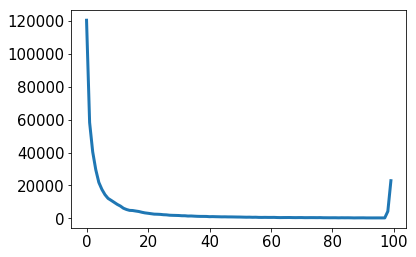

In [336]:
plt.plot(a)

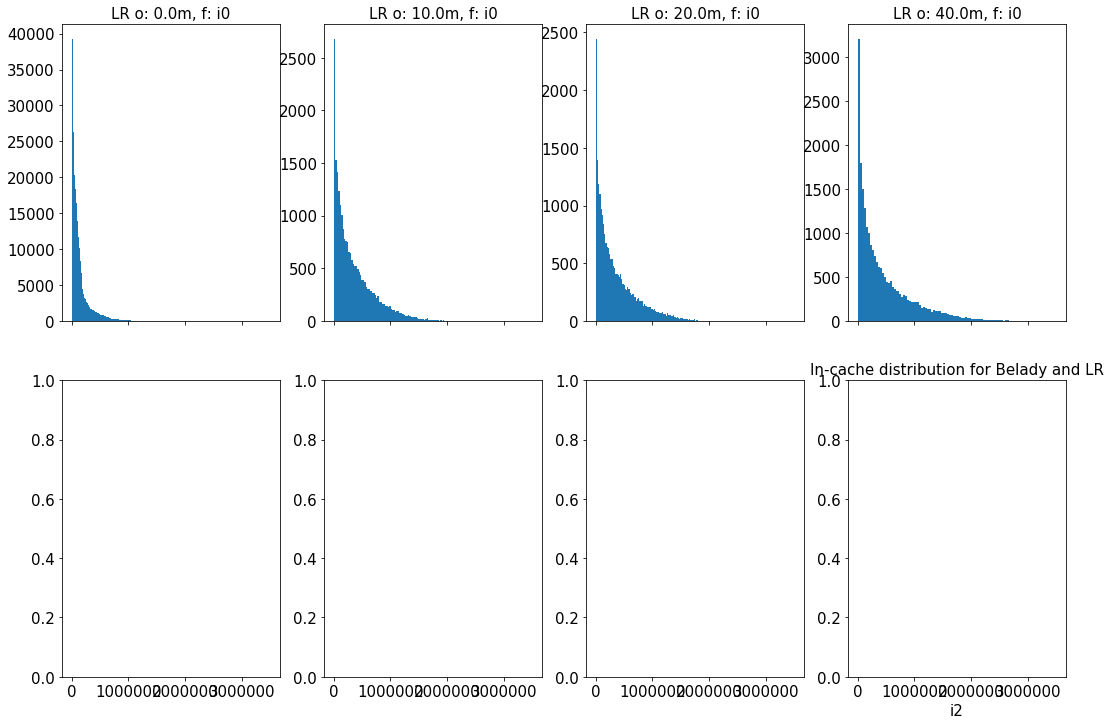

In [264]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [int(10e6)]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=2, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global_lr = pd.read_csv('../intervals_lr.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    df_global_belady = pd.read_csv('../intervals_belady_sample.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
    df_training_lr = df_global_lr[df_global_lr.type == 0]
    df_training_belady = df_global_belady
    axes[0][i].hist(np.exp(df_training_lr['i1'].values), label='lr', bins=100)
#     axes[0][i].set_xlim([0, 17])
    axes[0][i].set_title(f'LR o: {o/1e6}m, f: {l}')
    
#     axes[1][i].hist(np.exp(df_training_belady['i2'].values) - np.exp(df_training_belady['i1'].values), label='belady', bins=100)
# #     axes[1][i].set_xlim([0, 17])
# #         axes[j][i].hist(df_training_lr.values, alpha=0.5, label='lr', bins=100, density=True)
# #         axes[j][i].hist(df_training_belady.values, alpha=0.5, label='belady', bins=100, density=True)
# #     axes[j][i].set_xlim([0, 17])
#     axes[1][i].set_title(f'Belady o: {o/1e6}m, f: {l}')
# plt.legend()
plt.title('In-cache distribution for Belady and LR')
plt.xlabel('i1')
plt.xlabel('i2')
plt.show()

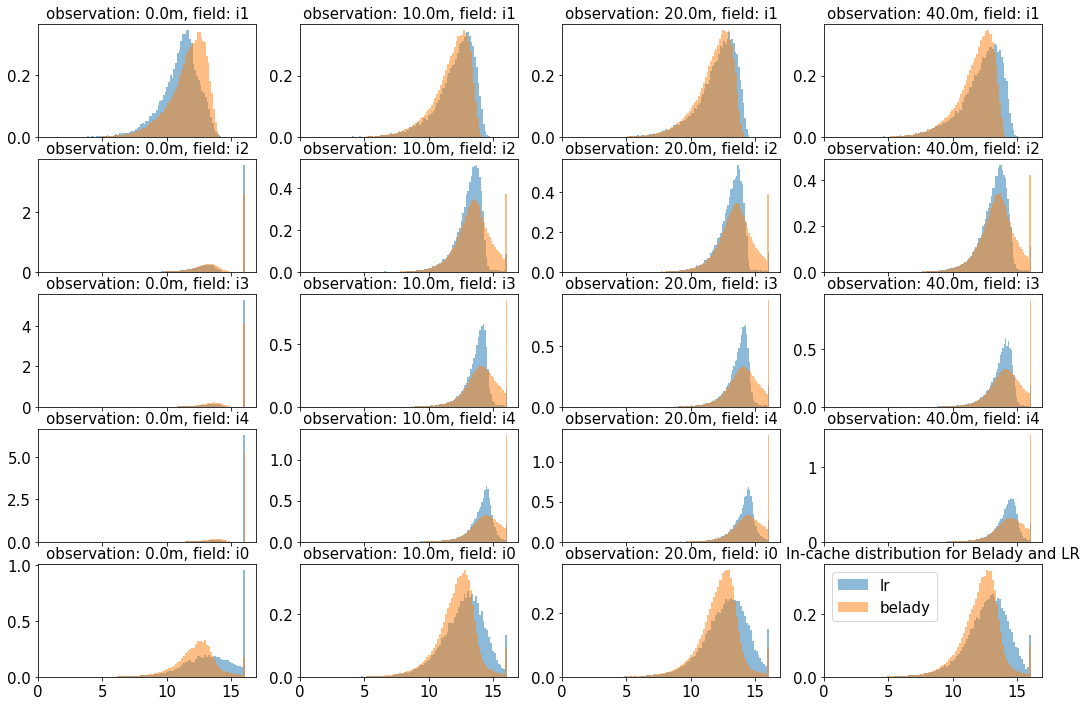

In [243]:

# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global_lr = pd.read_csv('../intervals_lr.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    df_global_belady = pd.read_csv('../intervals_belady_sample.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training_lr = df_global_lr[df_global_lr.type == 0][l]
        df_training_belady = df_global_belady[l]
        axes[j][i].hist(df_training_lr.values, alpha=0.5, label='lr', bins=100, density=True)
        axes[j][i].hist(df_training_belady.values, alpha=0.5, label='belady', bins=100, density=True)
        axes[j][i].set_xlim([0, 17])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.title('In-cache distribution for Belady and LR')
plt.show()

In [244]:
df_training_belady

0         13.69620
1          5.99146
2         13.59420
3         12.37090
4         10.06740
5         12.96810
6         13.74020
7         12.19700
8         11.70200
9         13.43130
10        11.14860
11        13.03530
12        12.64500
13        11.48200
14        12.80540
15        13.09090
16        12.54020
17        13.49190
18        11.84600
19        11.55050
20        11.48960
21        13.95640
22        12.09360
23        12.13890
24        12.09680
25        10.46400
26        12.48870
27         9.66675
28        11.07330
29        12.53220
            ...   
999970    11.73940
999971    11.18980
999972    11.43880
999973    11.39030
999974    12.59470
999975    12.18320
999976    11.80070
999977    13.20710
999978    12.47040
999979    11.20930
999980     6.78106
999981    12.12840
999982    12.14670
999983    11.74310
999984    11.57540
999985    11.36770
999986    11.74600
999987    12.93380
999988    12.58680
999989    12.78780
999990    12.08620
999991    12

### Distribution of single field. 
* i0 is future interval, i1 is the most recent interval, i4 is the most old interval
* Each column is an observation point, point 1 million sample started from x million request

### Distribution of single field (linear scale)
* i0 is future interval, i1 is the most recent interval, i4 is the most old interval
* Each column is an observation point, point 1 million sample started from x million request

In [407]:
!wc -l ../intervals_lr2.log

63917569 ../intervals_lr2.log


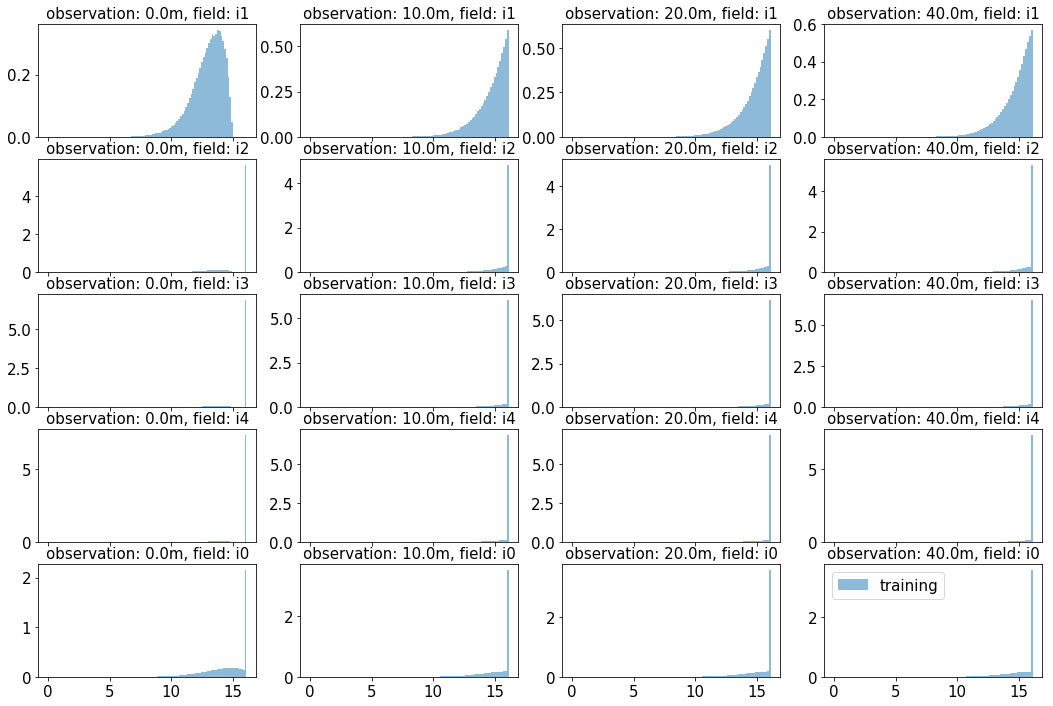

In [408]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals_lr2.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training = df_global[l]
        axes[j][i].hist(df_training.values, alpha=0.5, label='training', bins=100, density=True)
        #         axes[j][i].set_xlim([0, np.exp(17)])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.show()

In [424]:
! wc -l ../intervals_lr_belady.log

42727008 ../intervals_lr_belady.log


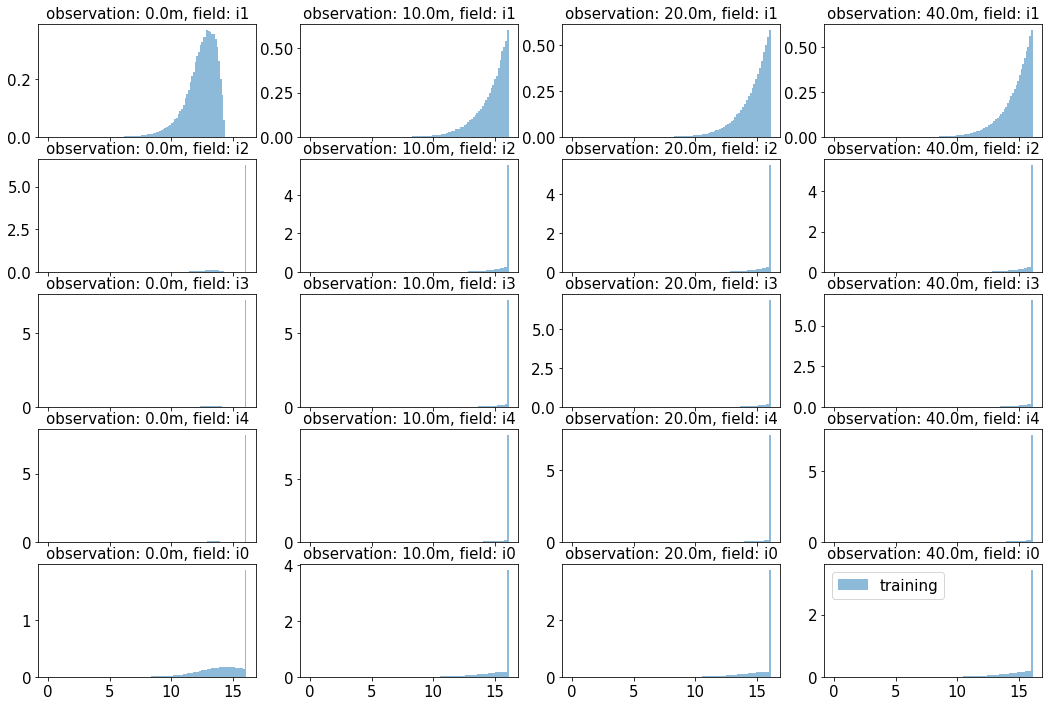

In [425]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals_lr_belady.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training = df_global[df_global.type != 2][l]
        axes[j][i].hist(df_training.values, alpha=0.5, label='training', bins=100, density=True)
        #         axes[j][i].set_xlim([0, np.exp(17)])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.show()

In [422]:
o

40000000

In [420]:
df_global = pd.read_csv('../intervals_lr_belady.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)

In [421]:
df_global

,type,i1,i2,i3,i4,i0


In [ ]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=5, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals_lr.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4', 'i0']):
        df_training = df_global[df_global.type != 2][l]
        df_inference = df_global[df_global.type == 2][l]
        axes[j][i].hist(df_training.values, alpha=0.5, label='training', bins=100, density=True)
        axes[j][i].hist(df_inference.values, alpha=0.5, label='inference', bins=100, density=True)
#         axes[j][i].set_xlim([0, np.exp(17)])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.legend()
plt.show()

### Distribution of single past interval vs future interval. 
* i1 is the most recent interval, i4 is the most old interval
* Each column is an observation point, point 1 million sample started from that point

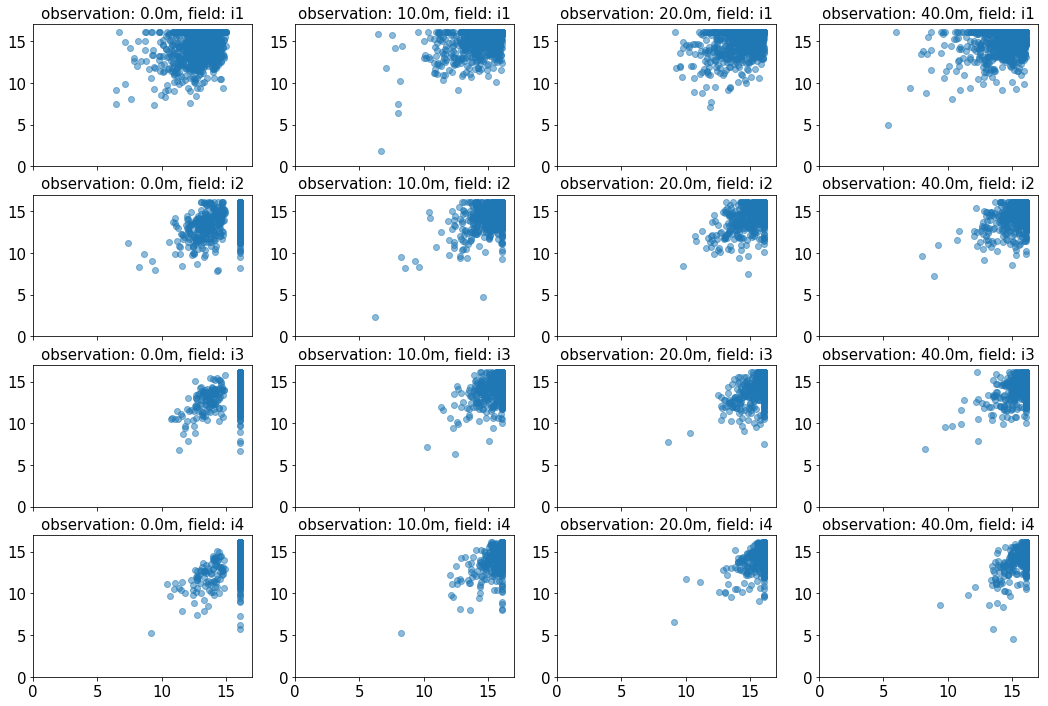

In [426]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6)]
# observations = [0, 100, 300, 400]
n_observations = len(observations)
fig, axes = plt.subplots(nrows=4, ncols=len(observations), sharex=True, figsize=(18,12))

for i, o in enumerate(observations):
    df_global = pd.read_csv('../intervals_lr.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
#     df_global = pd.read_csv('../intervals.log', delimiter=' ', names=fields, nrows=100, skiprows=o)
    for j, l in enumerate(['i1', 'i2', 'i3', 'i4']):
        df = df_global[[l, 'i0']].sample(n=1000, replace=False)
        axes[j][i].scatter(x=df[l], y=df['i0'], alpha = 0.5)
#         axes[j][i].hist([1,2,3,4,5,5,5,5])
        axes[j][i].set_xlim([0, 17])
        axes[j][i].set_ylim([0, 17])
        axes[j][i].set_title(f'observation: {o/1e6}m, field: {l}')
plt.show()